# Importação das bibliotecas, tabela e limpeza dos dados

In [146]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib as mpl
import math

In [147]:
# importar planilha do github
dados_csv = pd.read_csv("https://raw.githubusercontent.com/AmandaAzevedo/tcc/main/bkp18deNov2022.csv", header=0, sep=",")

In [148]:
# exclusão de colunas de data/hora de resposta, se concorda em fazer parte da pesquisa, se é formado em curso superior presencial de computação,
# dados das perguntas abertas e que identificam os participantes.
df = dados_csv.drop(columns=['Carimbo de data/hora',
                             'Considerando o que foi apresentado, você concorda em participar de forma voluntária desta pesquisa?', 
                             'Você se formou em algum curso PRESENCIAL relacionado a computação?',
                             '15. Algum outro fator lhe influenciou a concluir seu curso? Se sim, qual ou quais?',
                             '16. Que ações você acha que poderiam ser realizadas em cursos superiores de computação para estimular mais alunos a concluírem seus cursos?'])

# simplificando nome das colunas
nomeDasColunasAlterado = ["SEXO", 
                        "IDADE", 
                        "RACA", 
                        "AREA_ATUACAO", 
                        "TP_INSTITUICAO", 
                        "TP_CURSO", 
                        "NM_CURSO", 
                        "TURNO_CURSO", 
                        "TEMP_CONCLUSAO", 
                        "AS_INFRAESTRUTURA", 
                        "AS_PROFESSORES", 
                        "AS_CONTEUDO_DISCIPLINAS", 
                        "AS_NETWORK", 
                        "AS_TRABALHOS", 
                        "AUX_FINANCEIRO", 
                        "ATIV_EXTRAS", 
                        "TEMPO_ATE_UNIVERSIDADE", 
                        "IMP_INFRAESTRUTURA",
                        "IMP_MORAR_PROXIMO",
                        "IMP_NETWORK",
                        "IMP_BONS_MENTORES",
                        "IMP_BONS_PROFS",
                        "IMP_TRAB_GRUPO",
                        "IMP_DESEMPENHO",
                        "IMP_PART_PROJETO",
                        "IMP_AUX_FIN",
                        "IMP_DIPLOMA",
                        "IMP_INF_DE_OUTOS_PROFISSIONAIS",
                        "IMP_MORAR_NO_EXTERIOR", 
                        "IMP_MERC_PROMISSOR",
                        "IMP_TRAB_REMOTO",
                        "IMP_APOIO",
                        "UF_UNIV",
                        "CID_UNIV"]



for k in range(len(df.columns.values)):
  df.rename(columns={df.columns.values[k]: nomeDasColunasAlterado[k]}, inplace = True)

In [149]:
df.isnull().sum()

SEXO                              0
IDADE                             0
RACA                              0
AREA_ATUACAO                      0
TP_INSTITUICAO                    0
TP_CURSO                          0
NM_CURSO                          0
TURNO_CURSO                       0
TEMP_CONCLUSAO                    0
AS_INFRAESTRUTURA                 0
AS_PROFESSORES                    0
AS_CONTEUDO_DISCIPLINAS           0
AS_NETWORK                        0
AS_TRABALHOS                      0
AUX_FINANCEIRO                    0
ATIV_EXTRAS                       0
TEMPO_ATE_UNIVERSIDADE            0
IMP_INFRAESTRUTURA                0
IMP_MORAR_PROXIMO                 0
IMP_NETWORK                       0
IMP_BONS_MENTORES                 0
IMP_BONS_PROFS                    0
IMP_TRAB_GRUPO                    0
IMP_DESEMPENHO                    0
IMP_PART_PROJETO                  0
IMP_AUX_FIN                       0
IMP_DIPLOMA                       0
IMP_INF_DE_OUTOS_PROFISSIONA

In [150]:
df['UF_UNIV'].fillna(value='Não respondeu', inplace=True)
df['CID_UNIV'].fillna(value='Não respondeu', inplace=True)

In [151]:
df['TEMPO_ATE_UNIVERSIDADE'].replace('Precisei mudar para a cidade que estudava. Com isso, levava menos de 30 minutos do AP até a universidade ', 'Menos de 30 minutos', inplace=True)

In [152]:
df['TEMPO_ATE_UNIVERSIDADE'].value_counts()

Menos de 30 minutos    46
De 30 minutos a 1h     26
De 1 hora a 2 horas     9
Mais de 2 horas         3
Name: TEMPO_ATE_UNIVERSIDADE, dtype: int64

In [153]:
## Qquestões de classificação com escala de Likert - Questões 10 e 14
def conditionQ14(x):
    if x=='Sem importância':
        return 1
    elif x=='Pouco importante':
        return 2
    elif x=='Importante':
        return 3
    elif x=='Muito importante':
        return 4
    else:
        return 0

def conditionQ10(x):
    if x=='1 - Péssimo':
        return 1
    elif x=='2 - Ruim':
        return 2
    elif x=='3 - Mediano(a)':
        return 3
    elif x=='4 - Bom':
        return 4
    else:
        return 5

for x in range(9,14):
  df.iloc[:,x]=df.iloc[:,x].apply(conditionQ10)


for x in range(17,32):
  df.iloc[:,x]=df.iloc[:,x].apply(conditionQ14)


print(df[['AS_INFRAESTRUTURA', 'AS_PROFESSORES', 'AS_CONTEUDO_DISCIPLINAS', 'AS_NETWORK', 'AS_TRABALHOS', 
          'IMP_INFRAESTRUTURA', 'IMP_MORAR_PROXIMO', 'IMP_NETWORK', 'IMP_BONS_MENTORES', 'IMP_BONS_PROFS', 'IMP_TRAB_GRUPO', 'IMP_DESEMPENHO',
          'IMP_PART_PROJETO', 'IMP_AUX_FIN', 'IMP_DIPLOMA', 'IMP_INF_DE_OUTOS_PROFISSIONAIS', 'IMP_MORAR_NO_EXTERIOR', 'IMP_MERC_PROMISSOR',
          'IMP_TRAB_REMOTO', 'IMP_APOIO']])


    AS_INFRAESTRUTURA  AS_PROFESSORES  AS_CONTEUDO_DISCIPLINAS  AS_NETWORK  \
0                   2               3                        3           1   
1                   4               5                        4           4   
2                   3               4                        4           4   
3                   4               4                        4           3   
4                   3               4                        4           5   
..                ...             ...                      ...         ...   
79                  5               5                        5           5   
80                  3               5                        4           4   
81                  4               5                        5           3   
82                  4               5                        4           4   
83                  3               5                        5           5   

    AS_TRABALHOS  IMP_INFRAESTRUTURA  IMP_MORAR_PROXIMO  IMP_NE

In [154]:
# Separa os cursos de bacharelado e licenciatura em ciência da computação 
for x in range(len(df)):
  if (df['NM_CURSO'].iloc[x] == "Ciência da Computação"):
    if (df['TP_CURSO'].iloc[x] == 'Bacharelado'): 
      df['NM_CURSO'].iloc[x] = 'Bacharelado em Ciência da Computação'
    else: 
      df['NM_CURSO'].iloc[x] = 'Licenciatura em Computação ou Ciência da Computação'
  elif (df['NM_CURSO'].iloc[x] == "Licenciatura em computação"):
    df['NM_CURSO'].iloc[x] = 'Licenciatura em Computação ou Ciência da Computação'

df['NM_CURSO'].value_counts()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


Bacharelado em Ciência da Computação                   33
Sistemas de Informação                                 23
Licenciatura em Computação ou Ciência da Computação    22
Engenharia da Computação                                2
Gestão da Tecnologia da Informação                      1
Análise e Desenvolvimento de Sistemas                   1
Tecnologia da Informação                                1
Sistemas para Internet                                  1
Name: NM_CURSO, dtype: int64

In [155]:
# Estado em que o curso é ofertado - questão 17
df['UF_UNIV'].replace('Acre', 'AC', inplace=True)
df['UF_UNIV'].replace('Alagoas', 'AL', inplace=True)
df['UF_UNIV'].replace('Amapá', 'AP', inplace=True)
df['UF_UNIV'].replace('Amazonas', 'AM', inplace=True)
df['UF_UNIV'].replace('Bahia', 'BA', inplace=True)
df['UF_UNIV'].replace('Ceará', 'CE', inplace=True)
df['UF_UNIV'].replace('Espírito Santo', 'ES', inplace=True)
df['UF_UNIV'].replace('Goiás', 'GO', inplace=True)
df['UF_UNIV'].replace('Maranhão', 'MA', inplace=True)
df['UF_UNIV'].replace('Mato Grosso', 'MT', inplace=True)
df['UF_UNIV'].replace('Mato Grosso do Sul', 'MS', inplace=True)
df['UF_UNIV'].replace('Minas Gerais', 'MG', inplace=True)
df['UF_UNIV'].replace('Pará', 'PA', inplace=True)
df['UF_UNIV'].replace('Paraíba', 'PB', inplace=True)
df['UF_UNIV'].replace('Paraná', 'PR', inplace=True)
df['UF_UNIV'].replace('Pernambuco', 'PE', inplace=True)
df['UF_UNIV'].replace('Piauí', 'PI', inplace=True)
df['UF_UNIV'].replace('Rio de Janeiro', 'RJ', inplace=True)
df['UF_UNIV'].replace('Rio Grande do Norte', 'RN', inplace=True)
df['UF_UNIV'].replace('Rio Grande do Sul', 'RS', inplace=True)
df['UF_UNIV'].replace('Rondônia', 'RO', inplace=True)
df['UF_UNIV'].replace('Roraima', 'RR', inplace=True)
df['UF_UNIV'].replace('Santa Catarina', 'SC', inplace=True)
df['UF_UNIV'].replace('São Paulo', 'SP', inplace=True)
df['UF_UNIV'].replace('Sergipe', 'SE', inplace=True)
df['UF_UNIV'].replace('Tocantins', 'TO', inplace=True)
df['UF_UNIV'].replace('Distrito Federal', 'DF', inplace=True)

print(df[['UF_UNIV']])

   UF_UNIV
0       CE
1       PB
2       PB
3       PB
4       PB
..     ...
79      PB
80      PB
81      PB
82      PB
83      PB

[84 rows x 1 columns]


In [156]:
# Retirando espaços e definindo todas as letras minúsculas na coluna das cidades em que os cursos são ofertados
df['CID_UNIV'] = df['CID_UNIV'].str.strip().str.title()

# Exibindo o nome de todas as cidades
df.CID_UNIV.value_counts()

Rio Tinto               37
Campina Grande          27
Salvador                 4
João Pessoa              3
Não Respondeu            3
Sobral                   1
Rio Tinto - Ufpb         1
Juiz De Fora             1
Uberaba                  1
Porto Alegre             1
Nova Friburgo            1
Cidade Universitária     1
Ponta Porã               1
Patos                    1
Recife                   1
Name: CID_UNIV, dtype: int64

In [157]:
# Respostas para ficar de acordo com o padrão
df['CID_UNIV'].replace('Rio Tinto - Ufpb', 'Rio Tinto', inplace=True)
df['CID_UNIV'].replace('Cidade Universitária', 'Rio de Janeiro', inplace=True)

# Verificando a linha em que o participante colocou o nome da cidade, mas não do estado
df.query("CID_UNIV=='Uberaba'").UF_UNIV

30    Não respondeu
Name: UF_UNIV, dtype: object

In [158]:
df.loc[30, 'UF_UNIV' ]= "MG"

df.iloc[30].UF_UNIV

'MG'

In [159]:
# Exibindo o nome de todas as cidades
df.CID_UNIV.value_counts()

Rio Tinto         38
Campina Grande    27
Salvador           4
João Pessoa        3
Não Respondeu      3
Sobral             1
Juiz De Fora       1
Uberaba            1
Porto Alegre       1
Nova Friburgo      1
Rio de Janeiro     1
Ponta Porã         1
Patos              1
Recife             1
Name: CID_UNIV, dtype: int64

In [160]:
# Exibindo o nome de todaos os estados
df.UF_UNIV.value_counts()

PB               71
BA                4
MG                2
RJ                2
CE                1
RS                1
MS                1
PE                1
Não respondeu     1
Name: UF_UNIV, dtype: int64

In [161]:
# Converte os dados da coluna de string para inteiro
df['IDADE'] = df['IDADE'].astype('int32')

# Função para criar coluna de IDADE_CATEGORIAS
def conditionIdade(x):
  if int(x) <= 25:
      return '20-25'
  elif int(x) <= 30 and int(x)>= 26:
      return '26-30'
  elif int(x) <= 35 and int(x)>=31:
      return '31-35'
  else:
      return '36+'

df['IDADE_CATEGORIAS'] = df.iloc[:,1].apply(conditionIdade)

# Funções

In [237]:
def porcentagem(dataframe):
  dataframe[dataframe.columns[1:]] = dataframe[dataframe.columns[1:]].apply(lambda y: np.round((y * 100) / sum(y), 2), axis=1)

def plot_barh_empilhado(dataframe, eixoX, title, altura, largura, dType):
  porcentagem(dataframe)
  if (dType == "importancia"):
    dataframe_total = dataframe["Sem importância"] + dataframe["Pouco importante"] + dataframe["Importante"] + dataframe["Muito importante"]
    df_rel = dataframe[dataframe.columns[1:]].div(dataframe_total, 0)*100
    cmap = (mpl.colors.ListedColormap(['#00a86b', '#00cc82', '#ff9380', '#ff6347' ]))
  elif (dType == "avaliacao"):
    dataframe_total = dataframe["1 - Péssimo"] + dataframe["2 - Ruim"] + dataframe["3 - Mediano(a)"] + dataframe["4 - Bom"] + dataframe["5 - Excelente"] 
    df_rel = dataframe[dataframe.columns[1:]].div(dataframe_total, 0)*100
    cmap = (mpl.colors.ListedColormap(['#00a86b', '#00cc82', '#f8ff8f', '#ff9380', '#ff6347']))
  elif (dType == "cursos"):
    dataframe_total = dataframe["Sistemas de Informação"] + dataframe["Bacharelado em Ciência da Computação"] + dataframe["Licenciatura em Computação ou Ciência da Computação"] + dataframe["Outos Cursos"]
    df_rel = dataframe[dataframe.columns[1:]].div(dataframe_total, 0)*100
    cmap = (mpl.colors.ListedColormap(['#074FAD', '#166121', '#229433', '#E07116']))
  elif (dType == "tempo"):
    dataframe_total = dataframe["Menos de 30 minutos"] + dataframe["De 30 minutos a 1 hora"] + dataframe["De 1 hora a 2 horas"] + dataframe["Mais de 2 horas"]
    df_rel = dataframe[dataframe.columns[1:]].div(dataframe_total, 0)*100
    cmap = (mpl.colors.ListedColormap(['#803E80', '#237D4A', '#074FAD', '#E07116']))

  dataframe.plot( 
  x = eixoX,  
  kind = 'barh',  
  stacked = True,  
  title = title,  
  mark_right = True,
  figsize=(20, 10),
  colormap=cmap,
  sort_columns=True) 

  for n in df_rel: 
    for i, (cs, ab, pc) in enumerate(zip(dataframe.iloc[:, 1:].cumsum(1)[n], dataframe[n], df_rel[n])): 
      if(pc == 0):
        continue
      else:
        if (dType == "cursos" or dType == "tempo"):
          plt.text(cs - ab / 2, i, str(int(pc)) + '%', va = 'center', ha = 'center', color = 'white')
        else:
          plt.text(cs - ab / 2, i, str(int(pc)) + '%', va = 'center', ha = 'center', color = "black")

In [170]:
def plotGraficoPorcentagemENumero(titulo, altura, largura, cores_das_barras, eixoX, eixoY, numero_de_respostas):

  fig, ax = plt.subplots(figsize=(largura, altura))

  ax.bar(eixoX, eixoY, color=cores_das_barras)

  ax.grid(False)

  for i in range(len(eixoX)):
    ax.text(i, eixoY[i], "{:.2f}%".format(eixoY[i]), ha="center", va="bottom", fontsize=12)
    if (eixoY[i] > 4):
      ax.text(i, eixoY[i]-4, numero_de_respostas[i], ha="center", va="bottom", fontsize=10, color="white")
    else: 
      ax.text(i, eixoY[i]-2, numero_de_respostas[i], ha="center", va="bottom", fontsize=10, color="white")

  ax.set_ylabel('Porcentagem')
  ax.set_title(titulo)

  plt.show()

In [171]:
cores_ranking_medio = {
    "A estrutura do curso": "#b6c3dc",
    "Morar próximo da universidade": "#f8aa79", 
    "Bom relacionamento com os colegas do curso":  "#7cbbcf", 
    "Bons mentores, orientadores ou monitores": "#9b89b3", 
    "Bons professores": "#aec683", 
    "Trabalhos em grupo":"#ca7e7d",
    "Meu desempenho no curso": "#7e9bc8", 
    "Participação em projetos de pesquisa, desenvolvimento, ensino, extensão ou estágios": "#e78c41", 
    "Bolsas ou auxílios": "#46a1b9", 
    "Desejo de possuir um diploma universitário": "#775e97", 
    "Influência/Inspiração de profissionais da área": "#91af53",
    "Possibilidades de morar no exterior": "#b34a47",
    "Mercado de trabalho promissor": "#4978b1",
    "Possibilidade de trabalho remoto": "#c27535",
    "Apoio de familiares, colegas, professores, amigos, comunidades da área de TI, etc":"#39869b"
}

def ordena_cores(array):
  cores_ordenadas = []
  for k in array:
    cores_ordenadas.append(cores_ranking_medio.get(k))
  return cores_ordenadas

In [172]:
def plotGraficoMediaRanking(titulo, altura, largura, eixoX, eixoY, numero_de_respostas):

  fig, ax = plt.subplots(figsize=(largura, altura))
  
  ax.barh(eixoX, eixoY, color=ordena_cores(eixoX))

  ax.grid(False)

  for i in range(len(eixoY)):
    ax.text(eixoY[i]+0.1, i, "{:.2f}".format(eixoY[i]), ha="center", va="center", fontsize=11)

  # ax.set_xlabel('Teste')
  ax.set_title(titulo)

  plt.show()

In [192]:
def plot_grafico_intervalo_de_confianca(dataframe):
  plt.figure(figsize=(10, 10))
  plt.grid(True)
  for upper,lower,mean,y in zip(dataframe['top_confidence_interval'],dataframe['bottom_confidence_interval'],dataframe['mean'],range(len(dataframe))):
      plt.plot((lower,mean,upper),(y,y,y),'ro-',color=cores_ranking_medio.get(dataframe["Descrição"][y]))
      plt.annotate('RM = {:.2f}'.format(mean), xy=(mean, y+0.5), xytext=(mean-0.09, y+0.2))
  plt.yticks(range(len(dataframe)),list(dataframe['Descrição']))

In [174]:
def mediaRanking(lista):
  return round(((lista.count(1)*1) + (lista.count(2)*2) + (lista.count(3)*3) 
          + (lista.count(4)*4))/(lista.count(1) + lista.count(2) + lista.count(3) + lista.count(4)),2)

def variancia(lista):
  mean = mediaRanking(lista)
  valor1 = mean-1
  valor2 = mean-2
  valor3 = mean-3
  valor4 = 4-mean
  return round((((valor1*valor1) * lista.count(1)) + ((valor2*valor2) * lista.count(2)) 
          + ((valor3*valor3) * lista.count(3)) + ((valor4*valor4) * lista.count(4))) / (lista.count(1) + lista.count(2) + lista.count(3) + lista.count(4)),2)

def desvio_padrao(variancia):
  return round(math.pow(variancia, 1/2),2)

def intervalo_de_confianca(lista):
  mean = mediaRanking(lista)
  v = variancia(lista)
  dp = desvio_padrao(v)

  e = 1.96 * dp/(math.pow((lista.count(1) + lista.count(2) + lista.count(3) + lista.count(4)), 1/2))
  upper = mean + e
  bottom = mean - e

  return [round(upper,2), round(bottom, 2)]

In [175]:
def condicao_para_adicionar_simbolo_de_porcentagem(x):
  return "{:.2f}%".format(x)

def add_simbolo_de_porcentagem(dataframe, n_col):
  for x in range(n_col, n_col+1):
    dataframe.iloc[:,x]=dataframe.iloc[:,x].apply(condicao_para_adicionar_simbolo_de_porcentagem)

# Caracterização da Amostra

## Idade

In [176]:
# IMPORTANTEEE
df['IDADE'].describe()

count    84.000000
mean     31.452381
std       6.483352
min      20.000000
25%      26.000000
50%      30.500000
75%      37.250000
max      45.000000
Name: IDADE, dtype: float64

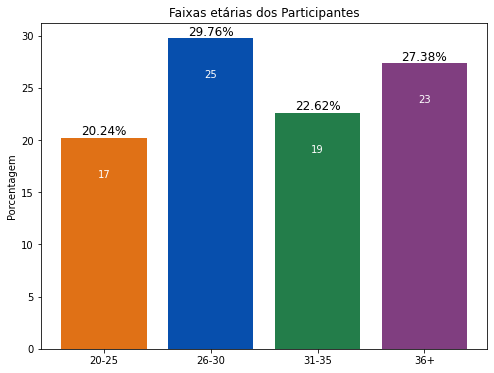

In [177]:
## IMPORTANTE, COLOCAR VALOR ABSOLUTO E PORCENTAGEM
#(21-25)(26-30)(31-35)(mais de 35) 

categorias_idade = df['IDADE_CATEGORIAS'].value_counts().to_frame().reset_index()
categorias_idade.columns = ["Faixa etária", "Número de respostas"]
categorias_idade["Porcentagem"] = (categorias_idade["Número de respostas"] / categorias_idade["Número de respostas"].sum()) * 100
categorias_idade.sort_values(by=['Faixa etária'], ascending=True, inplace=True)

plotGraficoPorcentagemENumero("Faixas etárias dos Participantes", 6, 8, ['#E07116', '#074FAD', '#237D4A', '#803E80'], 
                              categorias_idade['Faixa etária'].values, categorias_idade["Porcentagem"].values, 
                              categorias_idade["Número de respostas"].values)

## Sexo

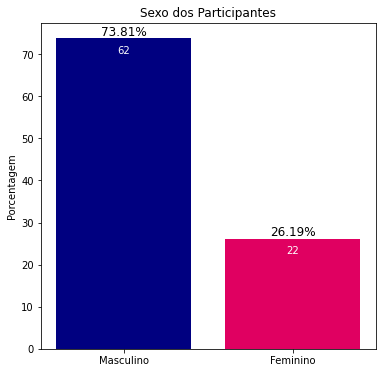

In [178]:
categorias_sexo = df['SEXO'].value_counts().to_frame().reset_index()
categorias_sexo.columns = ["Sexo", "Número de respostas"]
categorias_sexo["Porcentagem"] = (categorias_sexo["Número de respostas"] / categorias_sexo["Número de respostas"].sum()) * 100


plotGraficoPorcentagemENumero("Sexo dos Participantes", 6, 6, ['#000080', '#E00061'], 
                              categorias_sexo['Sexo'].values, categorias_sexo["Porcentagem"].values, 
                              categorias_sexo["Número de respostas"].values)

## Localização

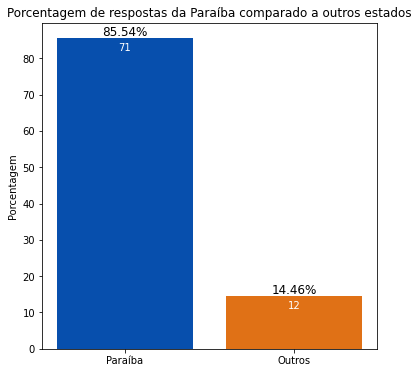

In [179]:
total_estados= df["UF_UNIV"].value_counts()
total_estados_geral = total_estados.sum()
total_nao_respondeu = total_estados.loc["Não respondeu"]
total_paraiba = total_estados.loc["PB"]
total_outros = total_estados_geral - total_paraiba - total_nao_respondeu


resposta_paraiba = pd.DataFrame ({
    'estados': ['Paraíba', 'Outros'],
    'total': [total_paraiba, total_outros]})

resposta_paraiba["Porcentagem"] = (resposta_paraiba["total"] / resposta_paraiba["total"].sum()) * 100


plotGraficoPorcentagemENumero("Porcentagem de respostas da Paraíba comparado a outros estados", 6, 6, ['#074FAD', '#E07116'], 
                              resposta_paraiba['estados'].values, resposta_paraiba["Porcentagem"].values, 
                              resposta_paraiba["total"].values)

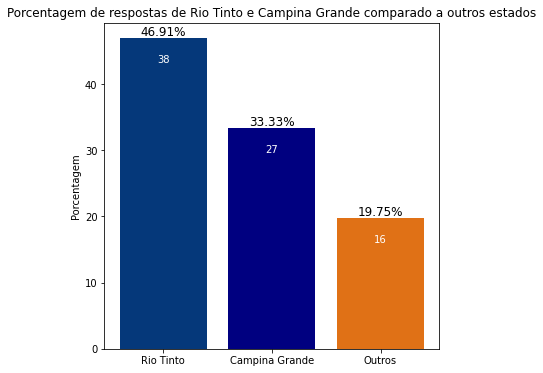

In [180]:
total_cidades= df.query("CID_UNIV not in ['Não Respondeu']")["CID_UNIV"].value_counts()
total_cidade_geral = total_cidades.sum()
total_rio_tinto = total_cidades.loc["Rio Tinto"]
total_campina_grande = total_cidades.loc["Campina Grande"]

total_outros_cidade = total_cidade_geral - total_rio_tinto - total_campina_grande

resposta_cidades = pd.DataFrame ({
    'cidades': ['Rio Tinto', 'Campina Grande', 'Outros'],
    'total': [total_rio_tinto, total_campina_grande, total_outros_cidade]})


resposta_cidades["Porcentagem"] = (resposta_cidades["total"] / resposta_cidades["total"].sum()) * 100


plotGraficoPorcentagemENumero("Porcentagem de respostas de Rio Tinto e Campina Grande comparado a outros estados", 6, 6, ['#05387A', '#000080', '#E07116'], 
                              resposta_cidades['cidades'].values, resposta_cidades["Porcentagem"].values, 
                              resposta_cidades["total"].values)

In [181]:
cidades_da_pb = df.query("UF_UNIV == 'PB'").query("CID_UNIV not in ['Não Respondeu']")["CID_UNIV"].value_counts().to_frame().reset_index()
cidades_da_pb.columns = ["Nomes das Cidades", "Número de Respostas"]

cidades_da_ba = df.query("UF_UNIV == 'BA'").query("CID_UNIV not in ['Não Respondeu']")["CID_UNIV"].value_counts().to_frame().reset_index()
cidades_da_ba.columns = ["Nomes das Cidades", "Número de Respostas"]

cidades_de_mg = df.query("UF_UNIV == 'MG'").query("CID_UNIV not in ['Não Respondeu']")["CID_UNIV"].value_counts().to_frame().reset_index()
cidades_de_mg.columns = ["Nomes das Cidades", "Número de Respostas"]

cidades_do_rj = df.query("UF_UNIV == 'RJ'").query("CID_UNIV not in ['Não Respondeu']")["CID_UNIV"].value_counts().to_frame().reset_index()
cidades_do_rj.columns = ["Nomes das Cidades", "Número de Respostas"]

cidades_do_ce = df.query("UF_UNIV == 'CE'").query("CID_UNIV not in ['Não Respondeu']")["CID_UNIV"].value_counts().to_frame().reset_index()
cidades_do_ce.columns = ["Nomes das Cidades", "Número de Respostas"]

cidades_do_rs = df.query("UF_UNIV == 'RS'").query("CID_UNIV not in ['Não Respondeu']")["CID_UNIV"].value_counts().to_frame().reset_index()
cidades_do_rs.columns = ["Nomes das Cidades", "Número de Respostas"]

cidades_do_ms = df.query("UF_UNIV == 'MS'").query("CID_UNIV not in ['Não Respondeu']")["CID_UNIV"].value_counts().to_frame().reset_index()
cidades_do_ms.columns = ["Nomes das Cidades", "Número de Respostas"]

cidades_de_pe = df.query("UF_UNIV == 'PE'").query("CID_UNIV not in ['Não Respondeu']")["CID_UNIV"].value_counts().to_frame().reset_index()
cidades_de_pe.columns = ["Nomes das Cidades", "Número de Respostas"]

nao_respondeu_cidade = df.query("CID_UNIV == 'Não Respondeu'")["CID_UNIV"].value_counts().to_frame().reset_index()
nao_respondeu_cidade.columns = ["Nomes das Cidades", "Número de Respostas"]

tabela_estados_e_cidades = pd.concat([cidades_da_pb, cidades_da_ba, 
                                      cidades_de_mg, cidades_do_rj, 
                                      cidades_do_ce, cidades_do_rs, 
                                      cidades_do_ms, cidades_de_pe, 
                                      nao_respondeu_cidade],
                                     keys = ["Paraíba", "Bahia", 
                                             "Minas Gerais", "Rio de Janeiro", 
                                             "Ceará", "Rio Grande do Sul", "Mato Grosso", 
                                             "Pernambuco", "Não Respondeu"])
tabela_estados_e_cidades

Nomes das Cidades  Número de Respostas
Paraíba           0         Rio Tinto                   38
                  1    Campina Grande                   27
                  2       João Pessoa                    3
                  3             Patos                    1
Bahia             0          Salvador                    4
Minas Gerais      0      Juiz De Fora                    1
                  1           Uberaba                    1
Rio de Janeiro    0     Nova Friburgo                    1
                  1    Rio de Janeiro                    1
Ceará             0            Sobral                    1
Rio Grande do Sul 0      Porto Alegre                    1
Mato Grosso       0        Ponta Porã                    1
Pernambuco        0            Recife                    1
Não Respondeu     0     Não Respondeu                    3

## Tempo Até a IES

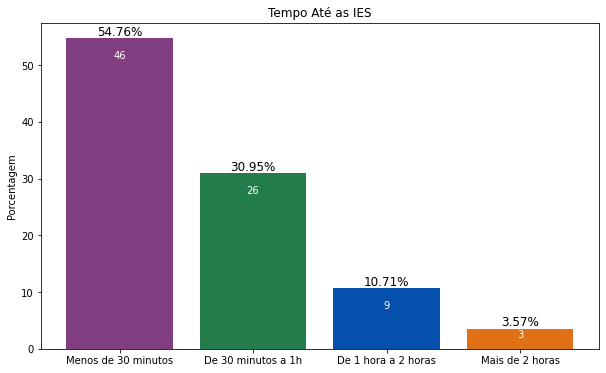

In [182]:
tempo_ate_ies = df['TEMPO_ATE_UNIVERSIDADE'].value_counts().to_frame().reset_index()
tempo_ate_ies.columns = ["Tempo", "Número de respostas"]
tempo_ate_ies["Porcentagem"] = (tempo_ate_ies["Número de respostas"] / tempo_ate_ies["Número de respostas"].sum()) * 100

plotGraficoPorcentagemENumero("Tempo Até as IES", 6, 10, ['#803E80', '#237D4A', '#074FAD', '#E07116'], 
                              tempo_ate_ies['Tempo'].values, tempo_ate_ies["Porcentagem"].values, 
                              tempo_ate_ies["Número de respostas"].values)

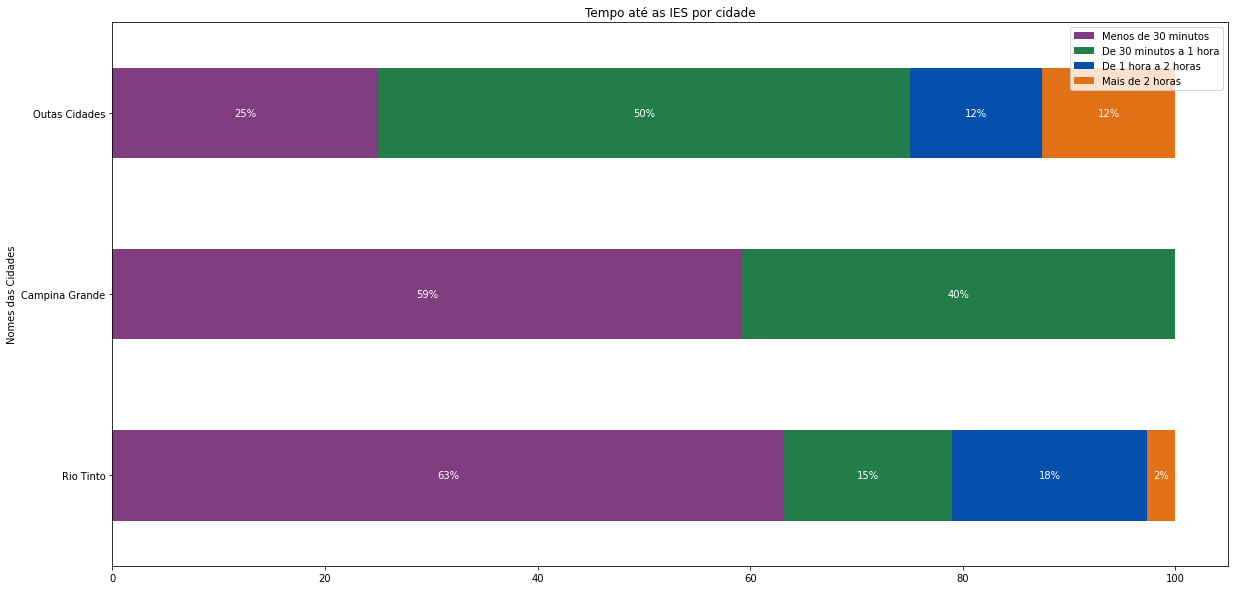

In [238]:
tempo_ate_ies_por_cidade = pd.DataFrame({
    'Nomes das Cidades': ['Rio Tinto', 'Campina Grande', 'Outas Cidades'],
    'Menos de 30 minutos': [df.query("TEMPO_ATE_UNIVERSIDADE == 'Menos de 30 minutos'").query("CID_UNIV == 'Rio Tinto'").shape[0],
                               df.query("TEMPO_ATE_UNIVERSIDADE == 'Menos de 30 minutos'").query("CID_UNIV == 'Campina Grande'").shape[0],
                               df.query("TEMPO_ATE_UNIVERSIDADE == 'Menos de 30 minutos'").query("CID_UNIV not in ['Rio Tinto', 'Campina Grande', 'Não Respondeu']").shape[0]],
    'De 30 minutos a 1 hora': [df.query("TEMPO_ATE_UNIVERSIDADE == 'De 30 minutos a 1h'").query("CID_UNIV == 'Rio Tinto'").shape[0],
                               df.query("TEMPO_ATE_UNIVERSIDADE == 'De 30 minutos a 1h'").query("CID_UNIV == 'Campina Grande'").shape[0],
                               df.query("TEMPO_ATE_UNIVERSIDADE == 'De 30 minutos a 1h'").query("CID_UNIV not in ['Rio Tinto', 'Campina Grande', 'Não Respondeu']").shape[0]],
    'De 1 hora a 2 horas': [df.query("TEMPO_ATE_UNIVERSIDADE == 'De 1 hora a 2 horas'").query("CID_UNIV == 'Rio Tinto'").shape[0],
                               df.query("TEMPO_ATE_UNIVERSIDADE == 'De 1 hora a 2 horas'").query("CID_UNIV == 'Campina Grande'").shape[0],
                               df.query("TEMPO_ATE_UNIVERSIDADE == 'De 1 hora a 2 horas'").query("CID_UNIV not in ['Rio Tinto', 'Campina Grande', 'Não Respondeu']").shape[0]],
    'Mais de 2 horas': [df.query("TEMPO_ATE_UNIVERSIDADE == 'Mais de 2 horas'").query("CID_UNIV == 'Rio Tinto'").shape[0],
                               df.query("TEMPO_ATE_UNIVERSIDADE == 'Mais de 2 horas'").query("CID_UNIV == 'Campina Grande'").shape[0],
                               df.query("TEMPO_ATE_UNIVERSIDADE == 'Mais de 2 horas'").query("CID_UNIV not in ['Rio Tinto', 'Campina Grande', 'Não Respondeu']").shape[0]]
})

plot_barh_empilhado(tempo_ate_ies_por_cidade, 'Nomes das Cidades', 'Tempo até as IES por cidade', 6, 6, 'tempo')

## Raça

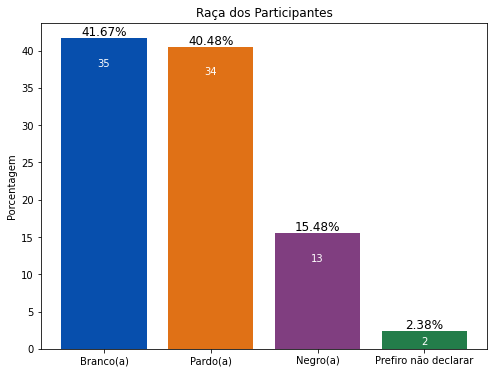

In [183]:
raca = df['RACA'].value_counts().to_frame().reset_index()
raca.columns = ["Raça", "Número de respostas"]
raca["Porcentagem"] = (raca["Número de respostas"] / raca["Número de respostas"].sum()) * 100


plotGraficoPorcentagemENumero("Raça dos Participantes", 6, 8, ['#074FAD', '#E07116', '#803E80', '#237D4A'], 
                              raca['Raça'].values, raca["Porcentagem"].values, 
                              raca["Número de respostas"].values)

## Auxílio Financeiro

Lista de outros: 
[['FIES'], ['Monitoria', 'PET']]


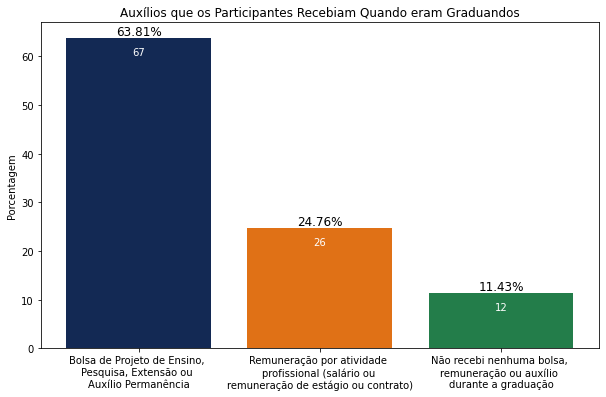

In [184]:
lista = df['AUX_FINANCEIRO'].values.tolist()

lista_de_outros = []

salario = 0
nao_recebeu_auxilio = 0
bolsa_em_projeto_ou_auxilio = 0


for x in range(len(lista)):
  while (len(lista[x].split(",")) > 0):
    if ("Remuneração por atividade profissional (salário ou remuneração de estágio ou contrato)" in lista[x]):
      salario += 1
      lista[x] = lista[x].replace("Remuneração por atividade profissional (salário ou remuneração de estágio ou contrato)", "")
    
    elif ("Não recebi nenhuma bolsa, remuneração ou auxílio durante a graduação" in lista[x]):
      nao_recebeu_auxilio += 1
      lista[x] = lista[x].replace("Não recebi nenhuma bolsa, remuneração ou auxílio durante a graduação", "")

    elif ("Bolsa de Projeto de Ensino, Pesquisa, Extensão ou Auxílio Permanência" in lista[x]):
      bolsa_em_projeto_ou_auxilio +=1
      lista[x] = lista[x].replace("Bolsa de Projeto de Ensino, Pesquisa, Extensão ou Auxílio Permanência", "")
    elif ("Remuneração por atividade profissional (salário ou remuneração de estágio ou contrato)" not in lista[x] and
      "Não recebi nenhuma bolsa, remuneração ou auxílio durante a graduação" not in lista[x] and 
      "Bolsa de Projeto de Ensino, Pesquisa, Extensão ou Auxílio Permanência" not in lista[x]):
      lista_de_outros.append(lista[x])
      break
    else: 
      break
      
  
tempList = [] 

for x in range(len(lista_de_outros)):
  if lista_de_outros[x] != '' and lista_de_outros[x] != ' ' and lista_de_outros[x] != ', ':
    tempList.append(lista_de_outros[x])

lista_de_outros = tempList

array = []
for x in lista_de_outros:
  y = x.split(', ')
  for j in y:
    if j == '':
      y.remove(j)
  array.append(y)

lista_de_outros = array

print("Lista de outros: ")
print(lista_de_outros)

# Foi adicionado +2 em 'bolsa_em_projeto_ou_auxilio' porque foi visto que na lista_de_outros haviam respostas que se encaixavam com essa categoria
auxilio = pd.DataFrame({
    'Tipo de Bolsa': [
        'Bolsa de Projeto de Ensino, \nPesquisa, Extensão ou \nAuxílio Permanência',
        'Remuneração por atividade \nprofissional (salário ou \nremuneração de estágio ou contrato)',
        'Não recebi nenhuma bolsa, \nremuneração ou auxílio \ndurante a graduação'
    ],
    'Número de respostas': [bolsa_em_projeto_ou_auxilio+2, salario, nao_recebeu_auxilio]
})

auxilio["Porcentagem"] = (auxilio["Número de respostas"] / auxilio["Número de respostas"].sum()) * 100

#(titulo, altura, largura, cores_das_barras, eixoX, eixoY, numero_de_respostas)
plotGraficoPorcentagemENumero("Auxílios que os Participantes Recebiam Quando eram Graduandos", 6, 10, ['#132954', '#E07116', '#237D4A'], 
                             auxilio['Tipo de Bolsa'].values, auxilio["Porcentagem"].values,
                              auxilio["Número de respostas"].values)

In [185]:
# IMPORTANTE, COLOCAR DAS DUAS FORMAS 

tabela_auxilio = df['AUX_FINANCEIRO'].value_counts().to_frame().reset_index()
tabela_auxilio.columns = ['Descrição', 'Quantidade de respostas']

tabela_auxilio

,Descrição,Quantidade de respostas
0,"Bolsa de Projeto de Ensino, Pesquisa, Extensão...",46
1,"Bolsa de Projeto de Ensino, Pesquisa, Extensão...",18
2,"Não recebi nenhuma bolsa, remuneração ou auxíl...",11
3,Remuneração por atividade profissional (salári...,6
4,Remuneração por atividade profissional (salári...,1
5,Remuneração por atividade profissional (salári...,1
6,"Bolsa de Projeto de Ensino, Pesquisa, Extensão...",1


## Área de Atuação

In [186]:
#df['AREA_ATUACAO'].value_counts().to_frame()


## O curso

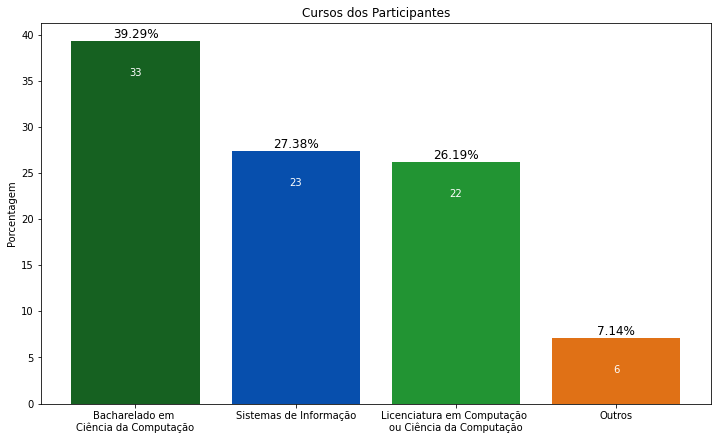

In [187]:
### COLOCAR CONTAGEM E TIRAR POR SEXO

total_cursos= df['NM_CURSO'].value_counts()
total_cursos_geral = total_cursos.sum()
total_ciencia_b = total_cursos.loc["Bacharelado em Ciência da Computação"]
total_ciencia_l = total_cursos.loc["Licenciatura em Computação ou Ciência da Computação"]
total_sistemas = total_cursos.loc["Sistemas de Informação"]

total_outros_cursos = total_cursos_geral - total_ciencia_b - total_ciencia_l - total_sistemas

resposta_cursos = pd.DataFrame ({
    'cursos': ['Bacharelado em \nCiência da Computação', 'Sistemas de Informação', "Licenciatura em Computação \nou Ciência da Computação", 'Outros'],
    'total': [total_ciencia_b, total_sistemas, total_ciencia_l, total_outros_cursos]})


resposta_cursos["Porcentagem"] = (resposta_cursos["total"] / resposta_cursos["total"].sum()) * 100


plotGraficoPorcentagemENumero("Cursos dos Participantes", 7, 12, ['#166121', '#074FAD', '#229433', '#E07116'], 
                              resposta_cursos['cursos'].values, resposta_cursos["Porcentagem"].values, 
                              resposta_cursos["total"].values)

In [188]:
total_cursos = df['NM_CURSO'].value_counts().to_frame().reset_index()
total_cursos.columns = ["Nome do Curso", "Número de Respostas"]

total_cursos["Porcentagem"] = (total_cursos["Número de Respostas"] / total_cursos["Número de Respostas"].sum()) * 100
add_simbolo_de_porcentagem(total_cursos, 2)
total_cursos

,Nome do Curso,Número de Respostas,Porcentagem
0,Bacharelado em Ciência da Computação,33,39.29%
1,Sistemas de Informação,23,27.38%
2,Licenciatura em Computação ou Ciência da Compu...,22,26.19%
3,Engenharia da Computação,2,2.38%
4,Gestão da Tecnologia da Informação,1,1.19%
5,Análise e Desenvolvimento de Sistemas,1,1.19%
6,Tecnologia da Informação,1,1.19%
7,Sistemas para Internet,1,1.19%


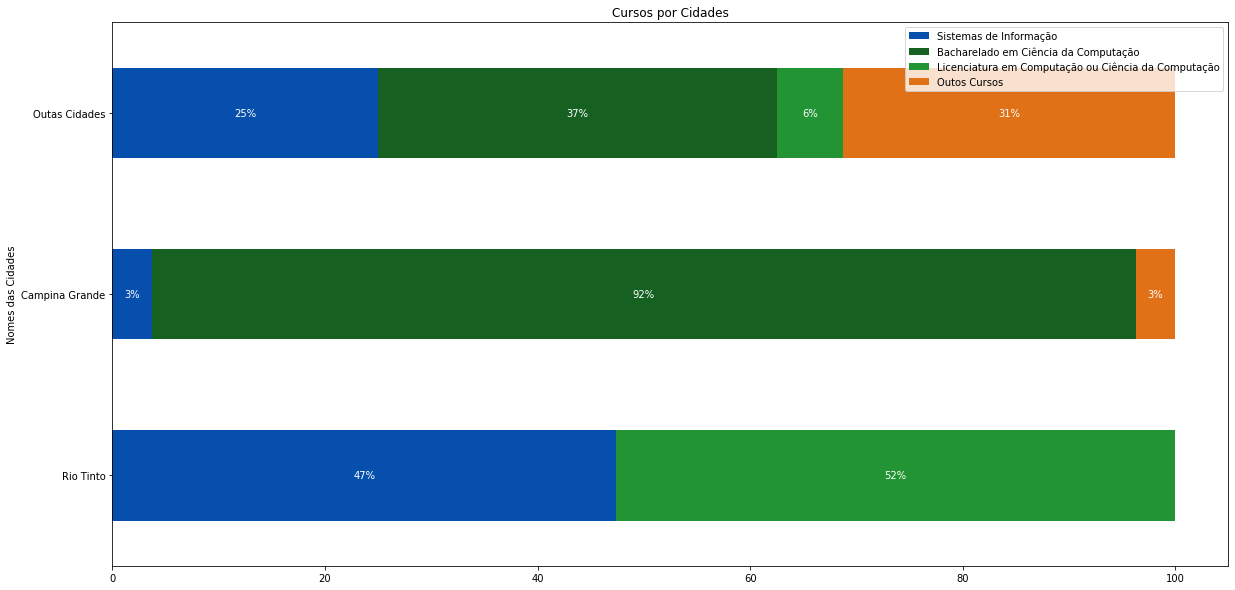

In [239]:
cursos_por_cidade = pd.DataFrame({
    'Nomes das Cidades': ['Rio Tinto', 'Campina Grande', 'Outas Cidades'],
    'Sistemas de Informação': [df.query("NM_CURSO == 'Sistemas de Informação'").query("CID_UNIV == 'Rio Tinto'").shape[0],
                               df.query("NM_CURSO == 'Sistemas de Informação'").query("CID_UNIV == 'Campina Grande'").shape[0],
                               df.query("NM_CURSO == 'Sistemas de Informação'").query("CID_UNIV not in ['Rio Tinto', 'Campina Grande', 'Não Respondeu']").shape[0]],
    'Bacharelado em Ciência da Computação': [df.query("NM_CURSO == 'Bacharelado em Ciência da Computação'").query("CID_UNIV == 'Rio Tinto'").shape[0],
                                             df.query("NM_CURSO == 'Bacharelado em Ciência da Computação'").query("CID_UNIV == 'Campina Grande'").shape[0],
                                             df.query("NM_CURSO == 'Bacharelado em Ciência da Computação'").query("CID_UNIV not in['Rio Tinto', 'Campina Grande', 'Não Respondeu']").shape[0]],
    'Licenciatura em Computação ou Ciência da Computação': [df.query("NM_CURSO == 'Licenciatura em Computação ou Ciência da Computação'").query("CID_UNIV == 'Rio Tinto'").shape[0],
                                             df.query("NM_CURSO == 'Licenciatura em Computação ou Ciência da Computação'").query("CID_UNIV == 'Campina Grande'").shape[0],
                                             df.query("NM_CURSO == 'Licenciatura em Computação ou Ciência da Computação'").query("CID_UNIV not in['Rio Tinto', 'Campina Grande', 'Não Respondeu']").shape[0]],
    'Outos Cursos': [df.query("NM_CURSO not in ['Sistemas de Informação','Bacharelado em Ciência da Computação', 'Licenciatura em Computação ou Ciência da Computação']").query("CID_UNIV == 'Rio Tinto'").shape[0],
                     df.query("NM_CURSO not in ['Sistemas de Informação','Bacharelado em Ciência da Computação', 'Licenciatura em Computação ou Ciência da Computação']").query("CID_UNIV == 'Campina Grande'").shape[0],
                     df.query("NM_CURSO not in ['Sistemas de Informação','Bacharelado em Ciência da Computação', 'Licenciatura em Computação ou Ciência da Computação']").query("CID_UNIV not in['Rio Tinto', 'Campina Grande', 'Não Respondeu']").shape[0]]
})

plot_barh_empilhado(cursos_por_cidade, 'Nomes das Cidades', 'Cursos por Cidades', 6, 6, 'cursos')

# Avaliação de Satisfação

## Geral

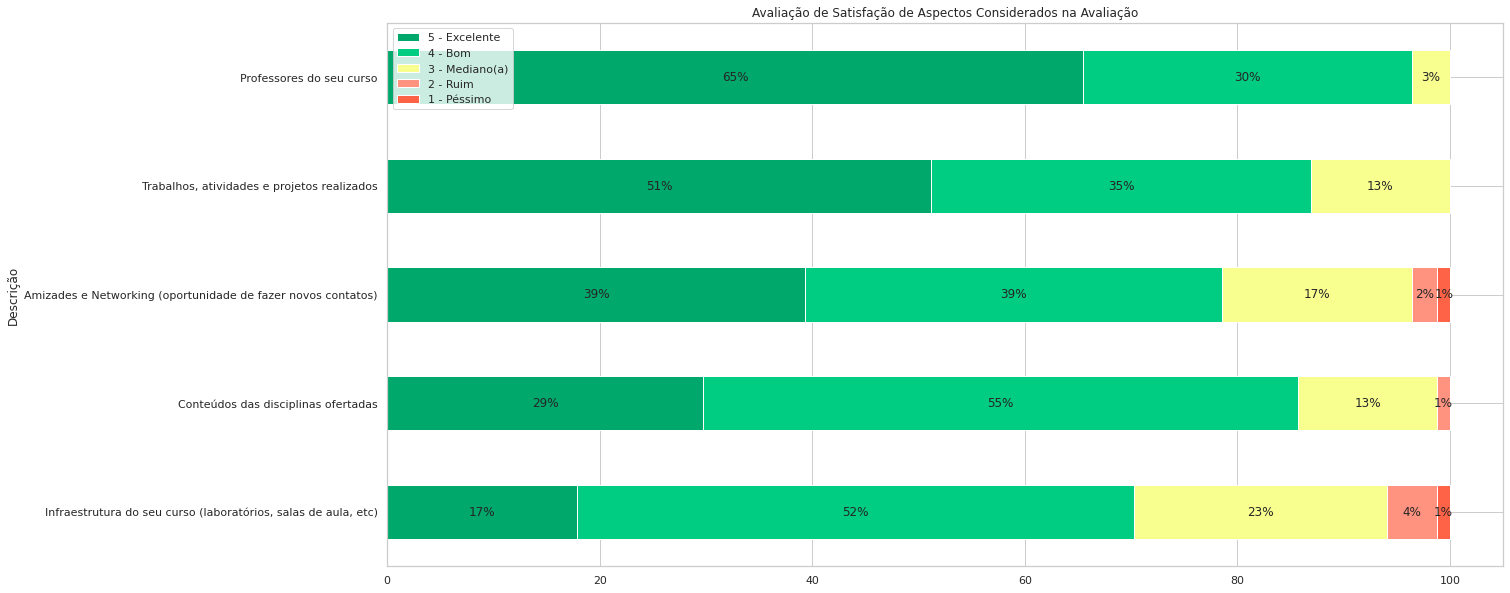

In [ ]:
avaliacao_geral = pd.DataFrame({"Descrição": ["Infraestrutura do seu curso (laboratórios, salas de aula, etc)",
                                "Professores do seu curso", 
                                "Conteúdos das disciplinas ofertadas", 
                                "Amizades e Networking (oportunidade de fazer novos contatos)", 
                                "Trabalhos, atividades e projetos realizados"],
                                "5 - Excelente": [df.query("AS_INFRAESTRUTURA == 5")["AS_INFRAESTRUTURA"].value_counts().to_frame().reset_index().iloc[0].AS_INFRAESTRUTURA, 
                                              df.query("AS_PROFESSORES == 5")["AS_PROFESSORES"].value_counts().to_frame().reset_index().iloc[0].AS_PROFESSORES, 
                                              df.query("AS_CONTEUDO_DISCIPLINAS == 5")["AS_CONTEUDO_DISCIPLINAS"].value_counts().to_frame().reset_index().iloc[0].AS_CONTEUDO_DISCIPLINAS,
                                              df.query("AS_NETWORK == 5")["AS_NETWORK"].value_counts().to_frame().reset_index().iloc[0].AS_NETWORK,
                                              df.query("AS_TRABALHOS == 5")["AS_TRABALHOS"].value_counts().to_frame().reset_index().iloc[0].AS_TRABALHOS],
                                "4 - Bom": [df.query("AS_INFRAESTRUTURA == 4")["AS_INFRAESTRUTURA"].value_counts().to_frame().reset_index().iloc[0].AS_INFRAESTRUTURA, 
                                              df.query("AS_PROFESSORES == 4")["AS_PROFESSORES"].value_counts().to_frame().reset_index().iloc[0].AS_PROFESSORES, 
                                              df.query("AS_CONTEUDO_DISCIPLINAS == 4")["AS_CONTEUDO_DISCIPLINAS"].value_counts().to_frame().reset_index().iloc[0].AS_CONTEUDO_DISCIPLINAS,
                                              df.query("AS_NETWORK == 4")["AS_NETWORK"].value_counts().to_frame().reset_index().iloc[0].AS_NETWORK,
                                              df.query("AS_TRABALHOS == 4")["AS_TRABALHOS"].value_counts().to_frame().reset_index().iloc[0].AS_TRABALHOS],
                                "3 - Mediano(a)": [df.query("AS_INFRAESTRUTURA == 3")["AS_INFRAESTRUTURA"].value_counts().to_frame().reset_index().iloc[0].AS_INFRAESTRUTURA, 
                                              df.query("AS_PROFESSORES == 3")["AS_PROFESSORES"].value_counts().to_frame().reset_index().iloc[0].AS_PROFESSORES, 
                                              df.query("AS_CONTEUDO_DISCIPLINAS == 3")["AS_CONTEUDO_DISCIPLINAS"].value_counts().to_frame().reset_index().iloc[0].AS_CONTEUDO_DISCIPLINAS,
                                              df.query("AS_NETWORK == 3")["AS_NETWORK"].value_counts().to_frame().reset_index().iloc[0].AS_NETWORK,
                                              df.query("AS_TRABALHOS == 3")["AS_TRABALHOS"].value_counts().to_frame().reset_index().iloc[0].AS_TRABALHOS],
                                "2 - Ruim": [df.query("AS_INFRAESTRUTURA == 2")["AS_INFRAESTRUTURA"].value_counts().to_frame().reset_index().iloc[0].AS_INFRAESTRUTURA, 
                                              0, 
                                              df.query("AS_CONTEUDO_DISCIPLINAS == 2")["AS_CONTEUDO_DISCIPLINAS"].value_counts().to_frame().reset_index().iloc[0].AS_CONTEUDO_DISCIPLINAS,
                                              df.query("AS_NETWORK == 2")["AS_NETWORK"].value_counts().to_frame().reset_index().iloc[0].AS_NETWORK,
                                             0],
                                "1 - Péssimo": [df.query("AS_INFRAESTRUTURA == 1")["AS_INFRAESTRUTURA"].value_counts().to_frame().reset_index().iloc[0].AS_INFRAESTRUTURA, 
                                              0, 
                                              0,
                                              df.query("AS_NETWORK == 1")["AS_NETWORK"].value_counts().to_frame().reset_index().iloc[0].AS_NETWORK,
                                             0] 
                                })

plot_barh_empilhado(avaliacao_geral.sort_values(by=['5 - Excelente']), 'Descrição', 'Avaliação de Satisfação de Aspectos Considerados na Avaliação', 20, 10, 'avaliacao')

## Sexo

### Mulheres

In [ ]:
#.query("SEXO == 'Feminino'")

avaliacao_meninas = pd.DataFrame({"Descrição": ["Infraestrutura do seu curso (laboratórios, salas de aula, etc)",
                                "Professores do seu curso", 
                                "Conteúdos das disciplinas ofertadas", 
                                "Amizades e Networking (oportunidade de fazer novos contatos)", 
                                "Trabalhos, atividades e projetos realizados"],
                                "5 - Excelente": [df.query("AS_INFRAESTRUTURA == 5").query("SEXO == 'Feminino'")["AS_INFRAESTRUTURA"].value_counts().to_frame().reset_index().iloc[0].AS_INFRAESTRUTURA, 
                                              df.query("AS_PROFESSORES == 5").query("SEXO == 'Feminino'")["AS_PROFESSORES"].value_counts().to_frame().reset_index().iloc[0].AS_PROFESSORES, 
                                              df.query("AS_CONTEUDO_DISCIPLINAS == 5").query("SEXO == 'Feminino'")["AS_CONTEUDO_DISCIPLINAS"].value_counts().to_frame().reset_index().iloc[0].AS_CONTEUDO_DISCIPLINAS,
                                              df.query("AS_NETWORK == 5").query("SEXO == 'Feminino'")["AS_NETWORK"].value_counts().to_frame().reset_index().iloc[0].AS_NETWORK,
                                              df.query("AS_TRABALHOS == 5")["AS_TRABALHOS"].value_counts().to_frame().reset_index().iloc[0].AS_TRABALHOS],
                                "4 - Bom": [df.query("AS_INFRAESTRUTURA == 4").query("SEXO == 'Feminino'")["AS_INFRAESTRUTURA"].value_counts().to_frame().reset_index().iloc[0].AS_INFRAESTRUTURA, 
                                            df.query("AS_PROFESSORES == 4").query("SEXO == 'Feminino'")["AS_PROFESSORES"].value_counts().to_frame().reset_index().iloc[0].AS_PROFESSORES, 
                                            df.query("AS_CONTEUDO_DISCIPLINAS == 4").query("SEXO == 'Feminino'")["AS_CONTEUDO_DISCIPLINAS"].value_counts().to_frame().reset_index().iloc[0].AS_CONTEUDO_DISCIPLINAS,
                                            df.query("AS_NETWORK == 4").query("SEXO == 'Feminino'")["AS_NETWORK"].value_counts().to_frame().reset_index().iloc[0].AS_NETWORK,
                                            df.query("AS_TRABALHOS == 4").query("SEXO == 'Feminino'")["AS_TRABALHOS"].value_counts().to_frame().reset_index().iloc[0].AS_TRABALHOS],
                                "3 - Mediano(a)": [df.query("AS_INFRAESTRUTURA == 3").query("SEXO == 'Feminino'")["AS_INFRAESTRUTURA"].value_counts().to_frame().reset_index().iloc[0].AS_INFRAESTRUTURA, 
                                            0, 
                                            df.query("AS_CONTEUDO_DISCIPLINAS == 3").query("SEXO == 'Feminino'")["AS_CONTEUDO_DISCIPLINAS"].value_counts().to_frame().reset_index().iloc[0].AS_CONTEUDO_DISCIPLINAS,
                                            df.query("AS_NETWORK == 3").query("SEXO == 'Feminino'")["AS_NETWORK"].value_counts().to_frame().reset_index().iloc[0].AS_NETWORK,
                                            df.query("AS_TRABALHOS == 3").query("SEXO == 'Feminino'")["AS_TRABALHOS"].value_counts().to_frame().reset_index().iloc[0].AS_TRABALHOS],
                                "2 - Ruim": [df.query("AS_INFRAESTRUTURA == 2").query("SEXO == 'Feminino'")["AS_INFRAESTRUTURA"].value_counts().to_frame().reset_index().iloc[0].AS_INFRAESTRUTURA, 
                                            0, 
                                            0,
                                            0,
                                            0],
                                "1 - Péssimo": [0, 
                                              0, 
                                              0,
                                              0,
                                             0]
                                })

avaliacao_meninas

,Descrição,5 - Excelente,4 - Bom,3 - Mediano(a),2 - Ruim,1 - Péssimo
0,"Infraestrutura do seu curso (laboratórios, sal...",5,11,4,2,0
1,Professores do seu curso,14,8,0,0,0
2,Conteúdos das disciplinas ofertadas,4,14,4,0,0
3,Amizades e Networking (oportunidade de fazer n...,8,12,2,0,0
4,"Trabalhos, atividades e projetos realizados",43,10,2,0,0


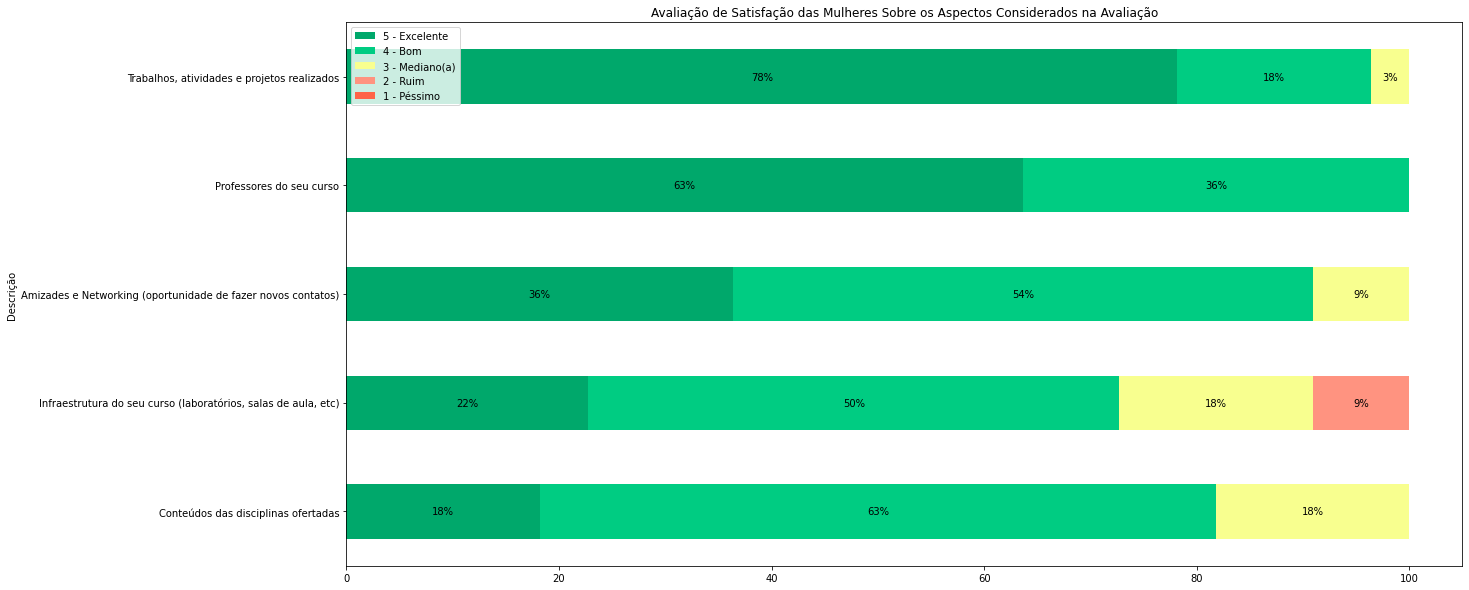

In [ ]:
plot_barh_empilhado(avaliacao_meninas.sort_values(by=['5 - Excelente']), 'Descrição', 'Avaliação de Satisfação das Mulheres Sobre os Aspectos Considerados na Avaliação', 20, 10, 'avaliacao')

### Homens

In [ ]:
#.query("SEXO == 'Masculino'")
avaliacao_meninos = pd.DataFrame({"Descrição": ["Infraestrutura do seu curso (laboratórios, salas de aula, etc)",
                                "Professores do seu curso", 
                                "Conteúdos das disciplinas ofertadas", 
                                "Amizades e Networking (oportunidade de fazer novos contatos)", 
                                "Trabalhos, atividades e projetos realizados"],
                                "5 - Excelente": [df.query("AS_INFRAESTRUTURA == 5").query("SEXO == 'Masculino'")["AS_INFRAESTRUTURA"].value_counts().to_frame().reset_index().iloc[0].AS_INFRAESTRUTURA, 
                                              df.query("AS_PROFESSORES == 5").query("SEXO == 'Masculino'")["AS_PROFESSORES"].value_counts().to_frame().reset_index().iloc[0].AS_PROFESSORES, 
                                              df.query("AS_CONTEUDO_DISCIPLINAS == 5").query("SEXO == 'Masculino'")["AS_CONTEUDO_DISCIPLINAS"].value_counts().to_frame().reset_index().iloc[0].AS_CONTEUDO_DISCIPLINAS,
                                              df.query("AS_NETWORK == 5").query("SEXO == 'Masculino'")["AS_NETWORK"].value_counts().to_frame().reset_index().iloc[0].AS_NETWORK,
                                              df.query("AS_TRABALHOS == 5").query("SEXO == 'Masculino'")["AS_TRABALHOS"].value_counts().to_frame().reset_index().iloc[0].AS_TRABALHOS],
                                "4 - Bom": [df.query("AS_INFRAESTRUTURA == 4").query("SEXO == 'Masculino'")["AS_INFRAESTRUTURA"].value_counts().to_frame().reset_index().iloc[0].AS_INFRAESTRUTURA, 
                                            df.query("AS_PROFESSORES == 4").query("SEXO == 'Masculino'")["AS_PROFESSORES"].value_counts().to_frame().reset_index().iloc[0].AS_PROFESSORES, 
                                            df.query("AS_CONTEUDO_DISCIPLINAS == 4").query("SEXO == 'Masculino'")["AS_CONTEUDO_DISCIPLINAS"].value_counts().to_frame().reset_index().iloc[0].AS_CONTEUDO_DISCIPLINAS,
                                            df.query("AS_NETWORK == 4").query("SEXO == 'Masculino'")["AS_NETWORK"].value_counts().to_frame().reset_index().iloc[0].AS_NETWORK,
                                            df.query("AS_TRABALHOS == 4").query("SEXO == 'Masculino'")["AS_TRABALHOS"].value_counts().to_frame().reset_index().iloc[0].AS_TRABALHOS],
                                "3 - Mediano(a)": [df.query("AS_INFRAESTRUTURA == 3").query("SEXO == 'Masculino'")["AS_INFRAESTRUTURA"].value_counts().to_frame().reset_index().iloc[0].AS_INFRAESTRUTURA, 
                                              df.query("AS_PROFESSORES == 3").query("SEXO == 'Masculino'")["AS_PROFESSORES"].value_counts().to_frame().reset_index().iloc[0].AS_PROFESSORES, 
                                              df.query("AS_CONTEUDO_DISCIPLINAS == 3").query("SEXO == 'Masculino'")["AS_CONTEUDO_DISCIPLINAS"].value_counts().to_frame().reset_index().iloc[0].AS_CONTEUDO_DISCIPLINAS,
                                              df.query("AS_NETWORK == 3").query("SEXO == 'Masculino'")["AS_NETWORK"].value_counts().to_frame().reset_index().iloc[0].AS_NETWORK,
                                              df.query("AS_TRABALHOS == 3").query("SEXO == 'Masculino'")["AS_TRABALHOS"].value_counts().to_frame().reset_index().iloc[0].AS_TRABALHOS],
                                "2 - Ruim": [df.query("AS_INFRAESTRUTURA == 2").query("SEXO == 'Masculino'")["AS_INFRAESTRUTURA"].value_counts().to_frame().reset_index().iloc[0].AS_INFRAESTRUTURA, 
                                              0, 
                                              df.query("AS_CONTEUDO_DISCIPLINAS == 2").query("SEXO == 'Masculino'")["AS_CONTEUDO_DISCIPLINAS"].value_counts().to_frame().reset_index().iloc[0].AS_CONTEUDO_DISCIPLINAS,
                                              df.query("AS_NETWORK == 2").query("SEXO == 'Masculino'")["AS_NETWORK"].value_counts().to_frame().reset_index().iloc[0].AS_NETWORK,
                                             0],
                           "1 - Péssimo": [df.query("AS_INFRAESTRUTURA == 1").query("SEXO == 'Masculino'")["AS_INFRAESTRUTURA"].value_counts().to_frame().reset_index().iloc[0].AS_INFRAESTRUTURA, 
                                              0, 
                                              0,
                                              df.query("AS_NETWORK == 1").query("SEXO == 'Masculino'")["AS_NETWORK"].value_counts().to_frame().reset_index().iloc[0].AS_NETWORK,
                                             0],
                                })

avaliacao_meninos

,Descrição,5 - Excelente,4 - Bom,3 - Mediano(a),2 - Ruim,1 - Péssimo
0,"Infraestrutura do seu curso (laboratórios, sal...",10,33,16,2,1
1,Professores do seu curso,41,18,3,0,0
2,Conteúdos das disciplinas ofertadas,21,33,7,1,0
3,Amizades e Networking (oportunidade de fazer n...,25,21,13,2,1
4,"Trabalhos, atividades e projetos realizados",33,20,9,0,0


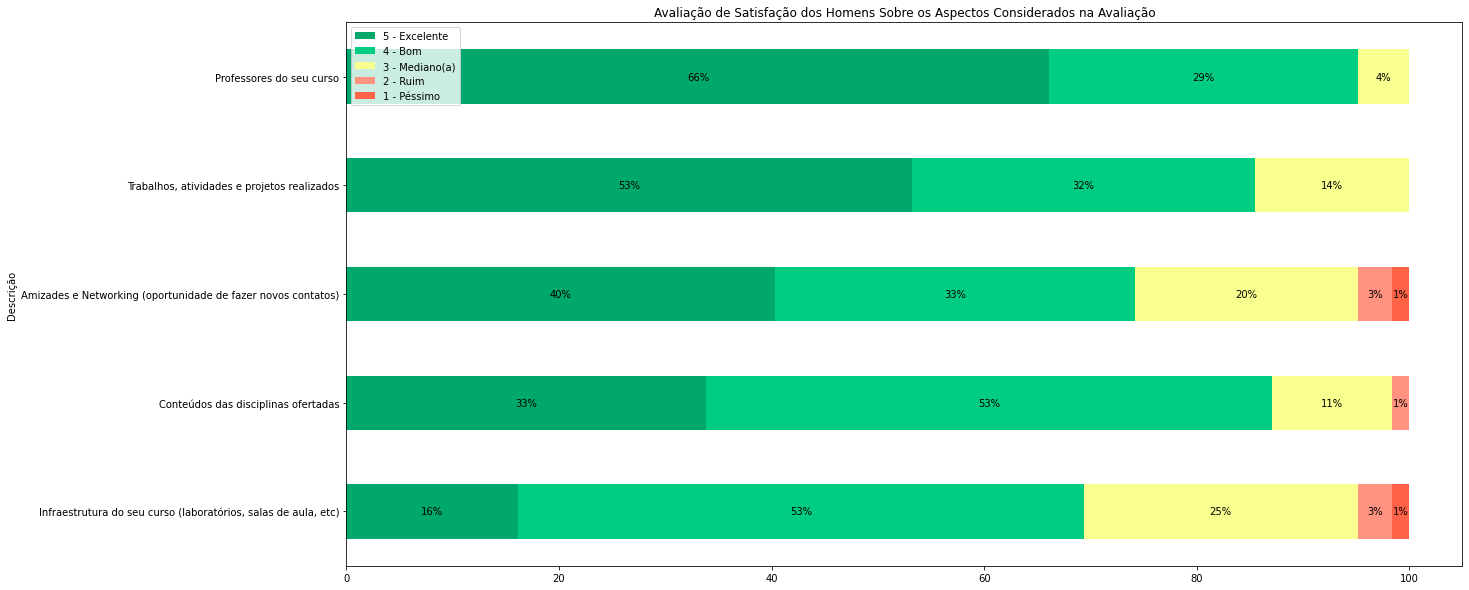

In [ ]:
plot_barh_empilhado(avaliacao_meninos.sort_values(by=['5 - Excelente'], ascending=True), 'Descrição', 'Avaliação de Satisfação dos Homens Sobre os Aspectos Considerados na Avaliação', 20, 10, 'avaliacao')

## Localidade

### Rio Tinto

In [ ]:
avaliacao_rt = pd.DataFrame({"Descrição": ["Infraestrutura do seu curso (laboratórios, salas de aula, etc)",
                                "Professores do seu curso", 
                                "Conteúdos das disciplinas ofertadas", 
                                "Amizades e Networking (oportunidade de fazer novos contatos)", 
                                "Trabalhos, atividades e projetos realizados"],
                             "5 - Excelente": [df.query("AS_INFRAESTRUTURA == 5").query("CID_UNIV == 'Rio Tinto'")["AS_INFRAESTRUTURA"].value_counts().to_frame().reset_index().iloc[0].AS_INFRAESTRUTURA, 
                                              df.query("AS_PROFESSORES == 5").query("CID_UNIV == 'Rio Tinto'")["AS_PROFESSORES"].value_counts().to_frame().reset_index().iloc[0].AS_PROFESSORES, 
                                              df.query("AS_CONTEUDO_DISCIPLINAS == 5").query("CID_UNIV == 'Rio Tinto'")["AS_CONTEUDO_DISCIPLINAS"].value_counts().to_frame().reset_index().iloc[0].AS_CONTEUDO_DISCIPLINAS,
                                              df.query("AS_NETWORK == 5").query("CID_UNIV == 'Rio Tinto'")["AS_NETWORK"].value_counts().to_frame().reset_index().iloc[0].AS_NETWORK,
                                              df.query("AS_TRABALHOS == 5").query("CID_UNIV == 'Rio Tinto'")["AS_TRABALHOS"].value_counts().to_frame().reset_index().iloc[0].AS_TRABALHOS], 
                             "4 - Bom": [df.query("AS_INFRAESTRUTURA == 4").query("CID_UNIV == 'Rio Tinto'")["AS_INFRAESTRUTURA"].value_counts().to_frame().reset_index().iloc[0].AS_INFRAESTRUTURA, 
                                              df.query("AS_PROFESSORES == 4").query("CID_UNIV == 'Rio Tinto'")["AS_PROFESSORES"].value_counts().to_frame().reset_index().iloc[0].AS_PROFESSORES, 
                                              df.query("AS_CONTEUDO_DISCIPLINAS == 4").query("CID_UNIV == 'Rio Tinto'")["AS_CONTEUDO_DISCIPLINAS"].value_counts().to_frame().reset_index().iloc[0].AS_CONTEUDO_DISCIPLINAS,
                                              df.query("AS_NETWORK == 4").query("CID_UNIV == 'Rio Tinto'")["AS_NETWORK"].value_counts().to_frame().reset_index().iloc[0].AS_NETWORK,
                                              df.query("AS_TRABALHOS == 4").query("CID_UNIV == 'Rio Tinto'")["AS_TRABALHOS"].value_counts().to_frame().reset_index().iloc[0].AS_TRABALHOS],
                             "3 - Mediano(a)": [df.query("AS_INFRAESTRUTURA == 3").query("CID_UNIV == 'Rio Tinto'")["AS_INFRAESTRUTURA"].value_counts().to_frame().reset_index().iloc[0].AS_INFRAESTRUTURA, 
                                             0, 
                                              df.query("AS_CONTEUDO_DISCIPLINAS == 3").query("CID_UNIV == 'Rio Tinto'")["AS_CONTEUDO_DISCIPLINAS"].value_counts().to_frame().reset_index().iloc[0].AS_CONTEUDO_DISCIPLINAS,
                                              df.query("AS_NETWORK == 3").query("CID_UNIV == 'Rio Tinto'")["AS_NETWORK"].value_counts().to_frame().reset_index().iloc[0].AS_NETWORK,
                                              df.query("AS_TRABALHOS == 3").query("CID_UNIV == 'Rio Tinto'")["AS_TRABALHOS"].value_counts().to_frame().reset_index().iloc[0].AS_TRABALHOS],
                             "2 - Ruim": [0, 
                                              0, 
                                              df.query("AS_CONTEUDO_DISCIPLINAS == 2").query("CID_UNIV == 'Rio Tinto'")["AS_CONTEUDO_DISCIPLINAS"].value_counts().to_frame().reset_index().iloc[0].AS_CONTEUDO_DISCIPLINAS,
                                             0,
                                             0],
                           "1 - Péssimo": [df.query("AS_INFRAESTRUTURA == 1").query("CID_UNIV == 'Rio Tinto'")["AS_INFRAESTRUTURA"].value_counts().to_frame().reset_index().iloc[0].AS_INFRAESTRUTURA, 
                                              0, 
                                              0,
                                              0,
                                             0]
                                })

avaliacao_rt

,Descrição,5 - Excelente,4 - Bom,3 - Mediano(a),2 - Ruim,1 - Péssimo
0,"Infraestrutura do seu curso (laboratórios, sal...",5,23,9,0,1
1,Professores do seu curso,30,8,0,0,0
2,Conteúdos das disciplinas ofertadas,11,22,4,1,0
3,Amizades e Networking (oportunidade de fazer n...,16,15,7,0,0
4,"Trabalhos, atividades e projetos realizados",21,14,3,0,0


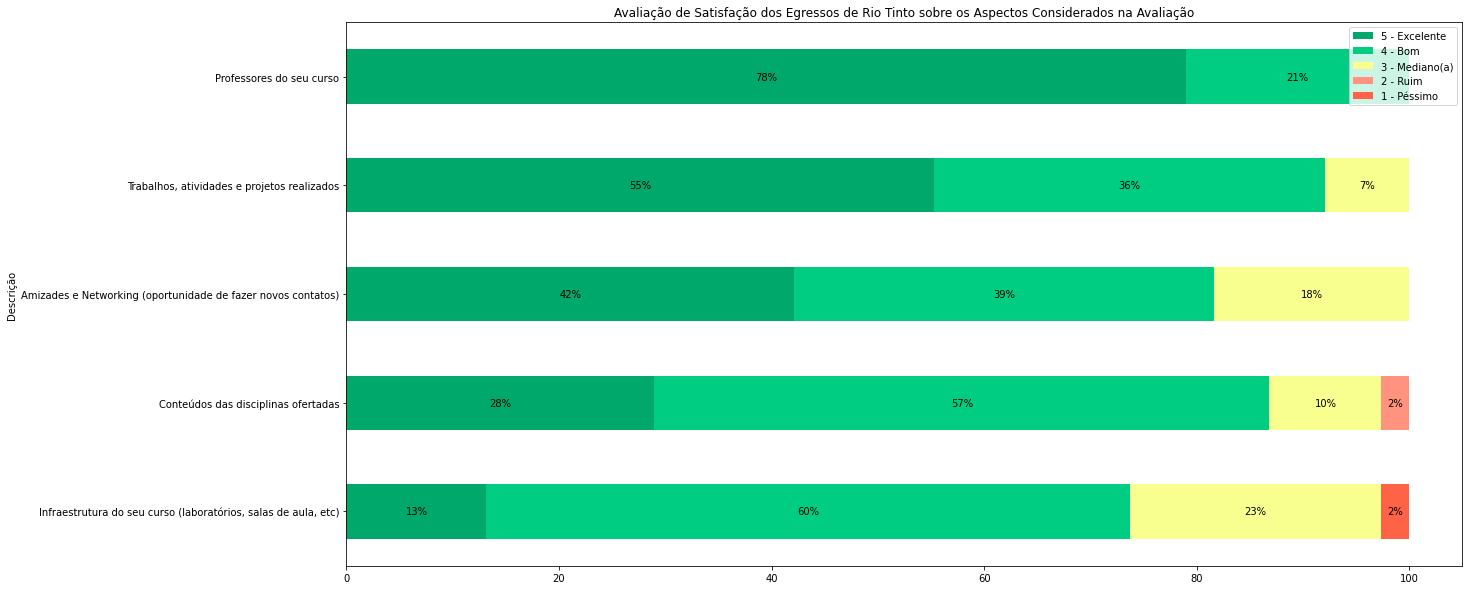

In [ ]:
plot_barh_empilhado(avaliacao_rt.sort_values(by=['5 - Excelente'], ascending=True), 'Descrição', 'Avaliação de Satisfação dos Egressos de Rio Tinto sobre os Aspectos Considerados na Avaliação', 20, 10, 'avaliacao')

### Campina Grande

In [ ]:
avaliacao_cg = pd.DataFrame({"Descrição": ["Infraestrutura do seu curso (laboratórios, salas de aula, etc)",
                                "Professores do seu curso", 
                                "Conteúdos das disciplinas ofertadas", 
                                "Amizades e Networking (oportunidade de fazer novos contatos)", 
                                "Trabalhos, atividades e projetos realizados"],
                             "5 - Excelente": [df.query("AS_INFRAESTRUTURA == 5").query("CID_UNIV == 'Campina Grande'")["AS_INFRAESTRUTURA"].value_counts().to_frame().reset_index().iloc[0].AS_INFRAESTRUTURA, 
                                              df.query("AS_PROFESSORES == 5").query("CID_UNIV == 'Campina Grande'")["AS_PROFESSORES"].value_counts().to_frame().reset_index().iloc[0].AS_PROFESSORES, 
                                              df.query("AS_CONTEUDO_DISCIPLINAS == 5").query("CID_UNIV == 'Campina Grande'")["AS_CONTEUDO_DISCIPLINAS"].value_counts().to_frame().reset_index().iloc[0].AS_CONTEUDO_DISCIPLINAS,
                                              df.query("AS_NETWORK == 5").query("CID_UNIV == 'Campina Grande'")["AS_NETWORK"].value_counts().to_frame().reset_index().iloc[0].AS_NETWORK,
                                              df.query("AS_TRABALHOS == 5").query("CID_UNIV == 'Campina Grande'")["AS_TRABALHOS"].value_counts().to_frame().reset_index().iloc[0].AS_TRABALHOS],
                             "4 - Bom": [df.query("AS_INFRAESTRUTURA == 4").query("CID_UNIV == 'Campina Grande'")["AS_INFRAESTRUTURA"].value_counts().to_frame().reset_index().iloc[0].AS_INFRAESTRUTURA, 
                                              df.query("AS_PROFESSORES == 4").query("CID_UNIV == 'Campina Grande'")["AS_PROFESSORES"].value_counts().to_frame().reset_index().iloc[0].AS_PROFESSORES, 
                                              df.query("AS_CONTEUDO_DISCIPLINAS == 4").query("CID_UNIV == 'Campina Grande'")["AS_CONTEUDO_DISCIPLINAS"].value_counts().to_frame().reset_index().iloc[0].AS_CONTEUDO_DISCIPLINAS,
                                              df.query("AS_NETWORK == 4").query("CID_UNIV == 'Campina Grande'")["AS_NETWORK"].value_counts().to_frame().reset_index().iloc[0].AS_NETWORK,
                                              df.query("AS_TRABALHOS == 4").query("CID_UNIV == 'Campina Grande'")["AS_TRABALHOS"].value_counts().to_frame().reset_index().iloc[0].AS_TRABALHOS],
                             "3 - Mediano(a)": [df.query("AS_INFRAESTRUTURA == 3").query("CID_UNIV == 'Campina Grande'")["AS_INFRAESTRUTURA"].value_counts().to_frame().reset_index().iloc[0].AS_INFRAESTRUTURA, 
                                              df.query("AS_PROFESSORES == 3").query("CID_UNIV == 'Campina Grande'")["AS_PROFESSORES"].value_counts().to_frame().reset_index().iloc[0].AS_PROFESSORES, 
                                              df.query("AS_CONTEUDO_DISCIPLINAS == 3").query("CID_UNIV == 'Campina Grande'")["AS_CONTEUDO_DISCIPLINAS"].value_counts().to_frame().reset_index().iloc[0].AS_CONTEUDO_DISCIPLINAS,
                                              df.query("AS_NETWORK == 3").query("CID_UNIV == 'Campina Grande'")["AS_NETWORK"].value_counts().to_frame().reset_index().iloc[0].AS_NETWORK,
                                              df.query("AS_TRABALHOS == 3").query("CID_UNIV == 'Campina Grande'")["AS_TRABALHOS"].value_counts().to_frame().reset_index().iloc[0].AS_TRABALHOS],
                             "2 - Ruim": [df.query("AS_INFRAESTRUTURA == 2").query("CID_UNIV == 'Campina Grande'")["AS_INFRAESTRUTURA"].value_counts().to_frame().reset_index().iloc[0].AS_INFRAESTRUTURA, 
                                              0, 
                                              0,
                                              0,
                                             0],
                             "1 - Péssimo": [0, 
                                              0, 
                                              0,
                                              0,
                                             0]
                                })

avaliacao_cg

,Descrição,5 - Excelente,4 - Bom,3 - Mediano(a),2 - Ruim,1 - Péssimo
0,"Infraestrutura do seu curso (laboratórios, sal...",5,15,6,1,0
1,Professores do seu curso,17,9,1,0,0
2,Conteúdos das disciplinas ofertadas,8,17,2,0,0
3,Amizades e Networking (oportunidade de fazer n...,11,12,4,0,0
4,"Trabalhos, atividades e projetos realizados",15,9,3,0,0


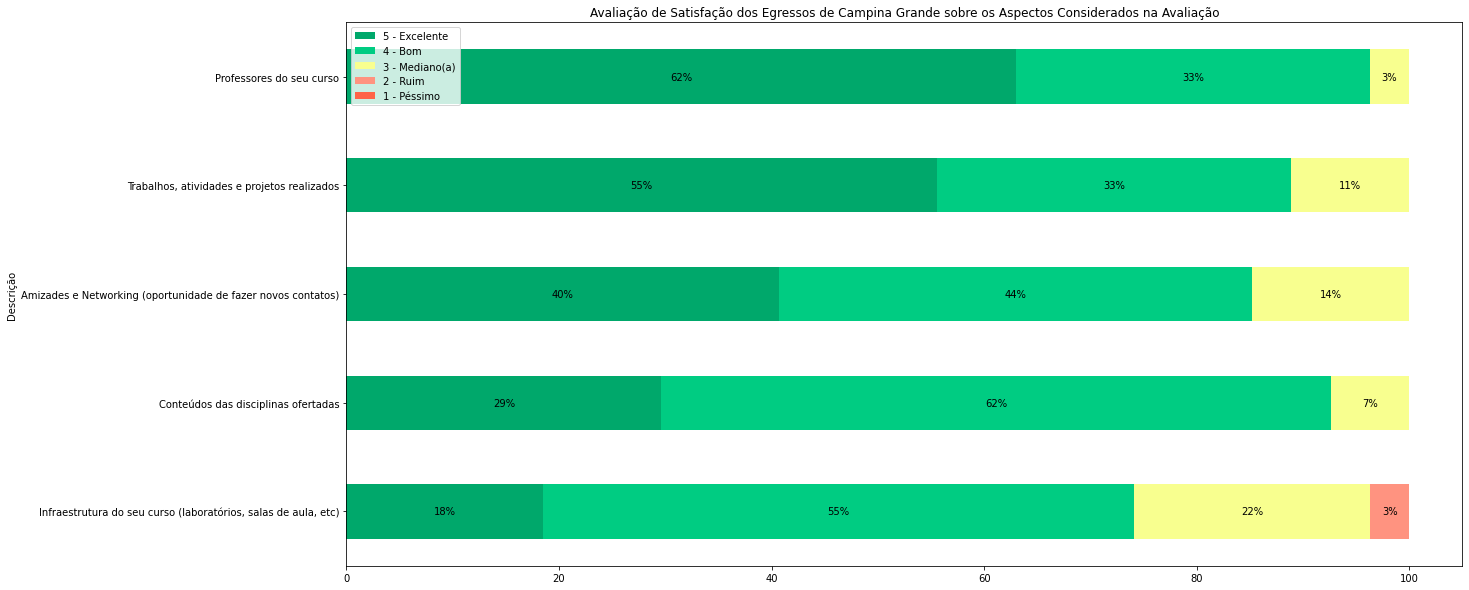

In [ ]:
plot_barh_empilhado(avaliacao_cg.sort_values(by=['5 - Excelente'], ascending=True), 'Descrição', 'Avaliação de Satisfação dos Egressos de Campina Grande sobre os Aspectos Considerados na Avaliação', 20, 10, 'avaliacao')

### Outras localidades

In [ ]:
avaliacao_outras = pd.DataFrame({"Descrição": ["Infraestrutura do seu curso (laboratórios, salas de aula, etc)",
                                "Professores do seu curso", 
                                "Conteúdos das disciplinas ofertadas", 
                                "Amizades e Networking (oportunidade de fazer novos contatos)", 
                                "Trabalhos, atividades e projetos realizados"],
                                 "5 - Excelente": [df.query("AS_INFRAESTRUTURA == 5").query("CID_UNIV not in ['Rio Tinto', 'Campina Grande', 'Não Respondeu']")["AS_INFRAESTRUTURA"].value_counts().to_frame().reset_index().iloc[0].AS_INFRAESTRUTURA, 
                                              df.query("AS_PROFESSORES == 5").query("CID_UNIV not in ['Rio Tinto', 'Campina Grande', 'Não Respondeu']")["AS_PROFESSORES"].value_counts().to_frame().reset_index().iloc[0].AS_PROFESSORES, 
                                              df.query("AS_CONTEUDO_DISCIPLINAS == 5").query("CID_UNIV not in ['Rio Tinto', 'Campina Grande', 'Não Respondeu']")["AS_CONTEUDO_DISCIPLINAS"].value_counts().to_frame().reset_index().iloc[0].AS_CONTEUDO_DISCIPLINAS,
                                              df.query("AS_NETWORK == 5").query("CID_UNIV not in ['Rio Tinto', 'Campina Grande', 'Não Respondeu']")["AS_NETWORK"].value_counts().to_frame().reset_index().iloc[0].AS_NETWORK,
                                              df.query("AS_TRABALHOS == 5").query("CID_UNIV not in ['Rio Tinto', 'Campina Grande', 'Não Respondeu']")["AS_TRABALHOS"].value_counts().to_frame().reset_index().iloc[0].AS_TRABALHOS],
                                 "4 - Bom": [df.query("AS_INFRAESTRUTURA == 4").query("CID_UNIV not in ['Rio Tinto', 'Campina Grande', 'Não Respondeu']")["AS_INFRAESTRUTURA"].value_counts().to_frame().reset_index().iloc[0].AS_INFRAESTRUTURA, 
                                              df.query("AS_PROFESSORES == 4").query("CID_UNIV not in ['Rio Tinto', 'Campina Grande', 'Não Respondeu']")["AS_PROFESSORES"].value_counts().to_frame().reset_index().iloc[0].AS_PROFESSORES, 
                                              df.query("AS_CONTEUDO_DISCIPLINAS == 4").query("CID_UNIV not in ['Rio Tinto', 'Campina Grande', 'Não Respondeu']")["AS_CONTEUDO_DISCIPLINAS"].value_counts().to_frame().reset_index().iloc[0].AS_CONTEUDO_DISCIPLINAS,
                                              df.query("AS_NETWORK == 4").query("CID_UNIV not in ['Rio Tinto', 'Campina Grande', 'Não Respondeu']")["AS_NETWORK"].value_counts().to_frame().reset_index().iloc[0].AS_NETWORK,
                                              df.query("AS_TRABALHOS == 4").query("CID_UNIV not in ['Rio Tinto', 'Campina Grande', 'Não Respondeu']")["AS_TRABALHOS"].value_counts().to_frame().reset_index().iloc[0].AS_TRABALHOS],
                                 "3 - Mediano(a)": [df.query("AS_INFRAESTRUTURA == 3").query("CID_UNIV not in ['Rio Tinto', 'Campina Grande', 'Não Respondeu']")["AS_INFRAESTRUTURA"].value_counts().to_frame().reset_index().iloc[0].AS_INFRAESTRUTURA, 
                                              df.query("AS_PROFESSORES == 3").query("CID_UNIV not in ['Rio Tinto', 'Campina Grande', 'Não Respondeu']")["AS_PROFESSORES"].value_counts().to_frame().reset_index().iloc[0].AS_PROFESSORES, 
                                              df.query("AS_CONTEUDO_DISCIPLINAS == 3").query("CID_UNIV not in ['Rio Tinto', 'Campina Grande', 'Não Respondeu']")["AS_CONTEUDO_DISCIPLINAS"].value_counts().to_frame().reset_index().iloc[0].AS_CONTEUDO_DISCIPLINAS,
                                              df.query("AS_NETWORK == 3").query("CID_UNIV not in ['Rio Tinto', 'Campina Grande', 'Não Respondeu']")["AS_NETWORK"].value_counts().to_frame().reset_index().iloc[0].AS_NETWORK,
                                              df.query("AS_TRABALHOS == 3").query("CID_UNIV not in ['Rio Tinto', 'Campina Grande', 'Não Respondeu']")["AS_TRABALHOS"].value_counts().to_frame().reset_index().iloc[0].AS_TRABALHOS],
                                  "2 - Ruim": [df.query("AS_INFRAESTRUTURA == 2").query("CID_UNIV not in ['Rio Tinto', 'Campina Grande', 'Não Respondeu']")["AS_INFRAESTRUTURA"].value_counts().to_frame().reset_index().iloc[0].AS_INFRAESTRUTURA, 
                                              0, 
                                             0,
                                              df.query("AS_NETWORK == 2").query("CID_UNIV not in ['Rio Tinto', 'Campina Grande', 'Não Respondeu']")["AS_NETWORK"].value_counts().to_frame().reset_index().iloc[0].AS_NETWORK,
                                             0],
                                 "1 - Péssimo": [0, 
                                              0, 
                                              0,
                                              df.query("AS_NETWORK == 1").query("CID_UNIV not in ['Rio Tinto', 'Campina Grande', 'Não Respondeu']")["AS_NETWORK"].value_counts().to_frame().reset_index().iloc[0].AS_NETWORK,
                                             0]
                                })

avaliacao_outras

,Descrição,5 - Excelente,4 - Bom,3 - Mediano(a),2 - Ruim,1 - Péssimo
0,"Infraestrutura do seu curso (laboratórios, sal...",4,5,4,3,0
1,Professores do seu curso,6,8,2,0,0
2,Conteúdos das disciplinas ofertadas,3,8,5,0,0
3,Amizades e Networking (oportunidade de fazer n...,4,5,4,2,1
4,"Trabalhos, atividades e projetos realizados",4,7,5,0,0


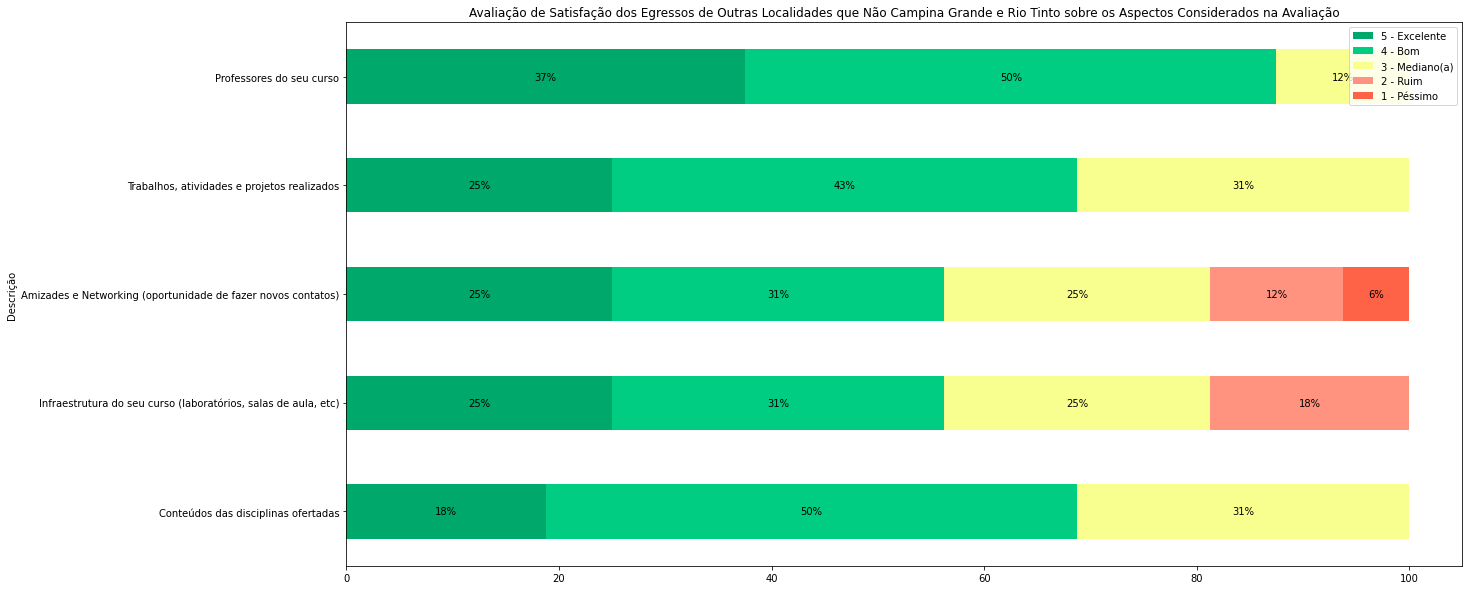

In [ ]:
plot_barh_empilhado(avaliacao_outras.sort_values(by=['5 - Excelente'], ascending=True), 'Descrição', 'Avaliação de Satisfação dos Egressos de Outras Localidades que Não Campina Grande e Rio Tinto sobre os Aspectos Considerados na Avaliação', 20, 10, 'avaliacao')

# Importância de Cada Fator

## Geral

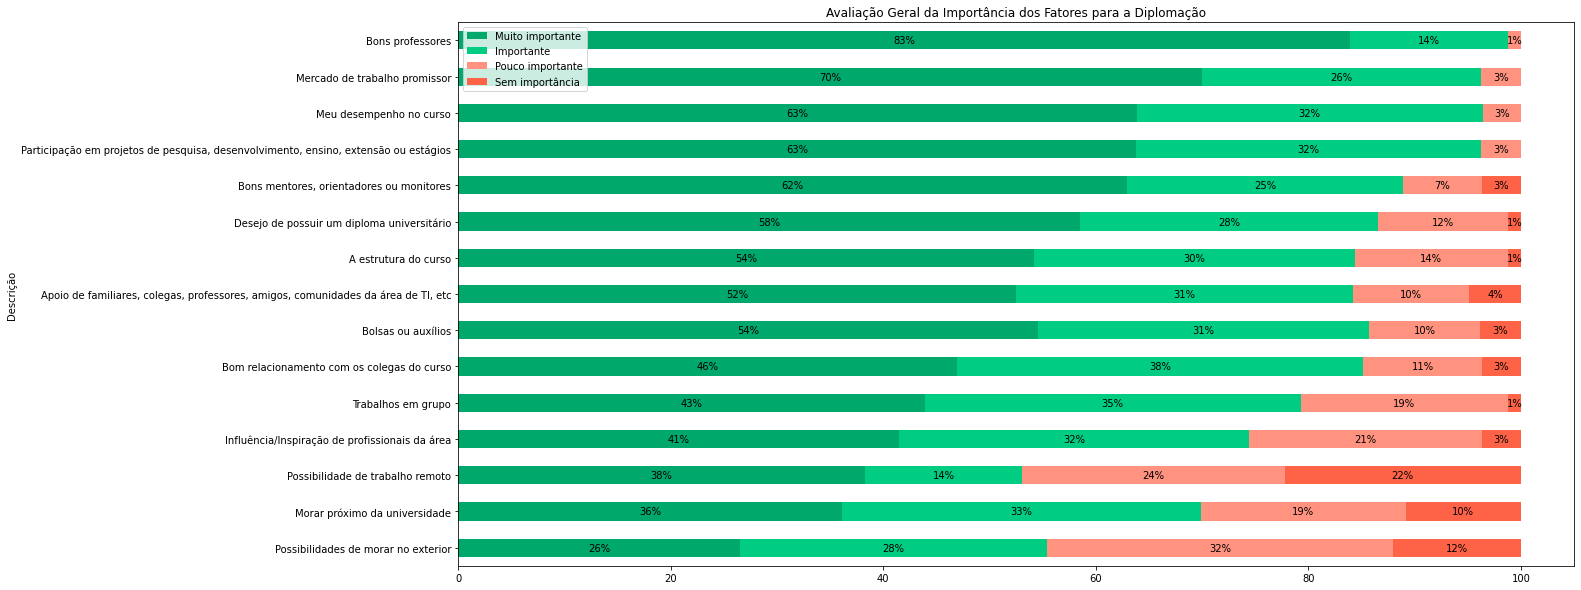

In [194]:
## MUITO IMPORTANTE
importancia_geral = pd.DataFrame({"Descrição": ["A estrutura do curso",
                                "Morar próximo da universidade", 
                                "Bom relacionamento com os colegas do curso", 
                                "Bons mentores, orientadores ou monitores", 
                                "Bons professores", 
                                "Trabalhos em grupo",
                                "Meu desempenho no curso", 
                                "Participação em projetos de pesquisa, desenvolvimento, ensino, extensão ou estágios", 
                                "Bolsas ou auxílios", 
                                "Desejo de possuir um diploma universitário", 
                                "Influência/Inspiração de profissionais da área",
                                "Possibilidades de morar no exterior",
                                "Mercado de trabalho promissor",
                                "Possibilidade de trabalho remoto",
                                "Apoio de familiares, colegas, professores, amigos, comunidades da área de TI, etc"],
                                "Muito importante": [df.query("IMP_INFRAESTRUTURA == 4")["IMP_INFRAESTRUTURA"].value_counts().to_frame().reset_index().iloc[0].IMP_INFRAESTRUTURA, 
                                              df.query("IMP_MORAR_PROXIMO == 4")["IMP_MORAR_PROXIMO"].value_counts().to_frame().reset_index().iloc[0].IMP_MORAR_PROXIMO, 
                                              df.query("IMP_NETWORK == 4")["IMP_NETWORK"].value_counts().to_frame().reset_index().iloc[0].IMP_NETWORK,
                                              df.query("IMP_BONS_MENTORES == 4")["IMP_BONS_MENTORES"].value_counts().to_frame().reset_index().iloc[0].IMP_BONS_MENTORES,
                                              df.query("IMP_BONS_PROFS == 4")["IMP_BONS_PROFS"].value_counts().to_frame().reset_index().iloc[0].IMP_BONS_PROFS,
                                              df.query("IMP_TRAB_GRUPO == 4")["IMP_TRAB_GRUPO"].value_counts().to_frame().reset_index().iloc[0].IMP_TRAB_GRUPO, 
                                              df.query("IMP_DESEMPENHO == 4")["IMP_DESEMPENHO"].value_counts().to_frame().reset_index().iloc[0].IMP_DESEMPENHO,
                                              df.query("IMP_PART_PROJETO == 4")["IMP_PART_PROJETO"].value_counts().to_frame().reset_index().iloc[0].IMP_PART_PROJETO,
                                              df.query("IMP_AUX_FIN == 4")["IMP_AUX_FIN"].value_counts().to_frame().reset_index().iloc[0].IMP_AUX_FIN,
                                              df.query("IMP_DIPLOMA == 4")["IMP_DIPLOMA"].value_counts().to_frame().reset_index().iloc[0].IMP_DIPLOMA, 
                                              df.query("IMP_INF_DE_OUTOS_PROFISSIONAIS == 4")["IMP_INF_DE_OUTOS_PROFISSIONAIS"].value_counts().to_frame().reset_index().iloc[0].IMP_INF_DE_OUTOS_PROFISSIONAIS,
                                              df.query("IMP_MORAR_NO_EXTERIOR == 4")["IMP_MORAR_NO_EXTERIOR"].value_counts().to_frame().reset_index().iloc[0].IMP_MORAR_NO_EXTERIOR,
                                              df.query("IMP_MERC_PROMISSOR == 4")["IMP_MERC_PROMISSOR"].value_counts().to_frame().reset_index().iloc[0].IMP_MERC_PROMISSOR,
                                              df.query("IMP_TRAB_REMOTO == 4")["IMP_TRAB_REMOTO"].value_counts().to_frame().reset_index().iloc[0].IMP_TRAB_REMOTO,
                                              df.query("IMP_APOIO == 4")["IMP_APOIO"].value_counts().to_frame().reset_index().iloc[0].IMP_APOIO],
                                  "Importante": [df.query("IMP_INFRAESTRUTURA == 3")["IMP_INFRAESTRUTURA"].value_counts().to_frame().reset_index().iloc[0].IMP_INFRAESTRUTURA, 
                                              df.query("IMP_MORAR_PROXIMO == 3")["IMP_MORAR_PROXIMO"].value_counts().to_frame().reset_index().iloc[0].IMP_MORAR_PROXIMO, 
                                              df.query("IMP_NETWORK == 3")["IMP_NETWORK"].value_counts().to_frame().reset_index().iloc[0].IMP_NETWORK,
                                              df.query("IMP_BONS_MENTORES == 3")["IMP_BONS_MENTORES"].value_counts().to_frame().reset_index().iloc[0].IMP_BONS_MENTORES,
                                              df.query("IMP_BONS_PROFS == 3")["IMP_BONS_PROFS"].value_counts().to_frame().reset_index().iloc[0].IMP_BONS_PROFS,
                                              df.query("IMP_TRAB_GRUPO == 3")["IMP_TRAB_GRUPO"].value_counts().to_frame().reset_index().iloc[0].IMP_TRAB_GRUPO, 
                                              df.query("IMP_DESEMPENHO == 3")["IMP_DESEMPENHO"].value_counts().to_frame().reset_index().iloc[0].IMP_DESEMPENHO,
                                              df.query("IMP_PART_PROJETO == 3")["IMP_PART_PROJETO"].value_counts().to_frame().reset_index().iloc[0].IMP_PART_PROJETO,
                                              df.query("IMP_AUX_FIN == 3")["IMP_AUX_FIN"].value_counts().to_frame().reset_index().iloc[0].IMP_AUX_FIN,
                                              df.query("IMP_DIPLOMA == 3")["IMP_DIPLOMA"].value_counts().to_frame().reset_index().iloc[0].IMP_DIPLOMA, 
                                              df.query("IMP_INF_DE_OUTOS_PROFISSIONAIS == 3")["IMP_INF_DE_OUTOS_PROFISSIONAIS"].value_counts().to_frame().reset_index().iloc[0].IMP_INF_DE_OUTOS_PROFISSIONAIS,
                                              df.query("IMP_MORAR_NO_EXTERIOR == 3")["IMP_MORAR_NO_EXTERIOR"].value_counts().to_frame().reset_index().iloc[0].IMP_MORAR_NO_EXTERIOR,
                                              df.query("IMP_MERC_PROMISSOR == 3")["IMP_MERC_PROMISSOR"].value_counts().to_frame().reset_index().iloc[0].IMP_MERC_PROMISSOR,
                                              df.query("IMP_TRAB_REMOTO == 3")["IMP_TRAB_REMOTO"].value_counts().to_frame().reset_index().iloc[0].IMP_TRAB_REMOTO,
                                              df.query("IMP_APOIO == 3")["IMP_APOIO"].value_counts().to_frame().reset_index().iloc[0].IMP_APOIO], 
                                 "Pouco importante": [df.query("IMP_INFRAESTRUTURA == 2")["IMP_INFRAESTRUTURA"].value_counts().to_frame().reset_index().iloc[0].IMP_INFRAESTRUTURA, 
                                              df.query("IMP_MORAR_PROXIMO == 2")["IMP_MORAR_PROXIMO"].value_counts().to_frame().reset_index().iloc[0].IMP_MORAR_PROXIMO, 
                                              df.query("IMP_NETWORK == 2")["IMP_NETWORK"].value_counts().to_frame().reset_index().iloc[0].IMP_NETWORK,
                                              df.query("IMP_BONS_MENTORES == 2")["IMP_BONS_MENTORES"].value_counts().to_frame().reset_index().iloc[0].IMP_BONS_MENTORES,
                                              df.query("IMP_BONS_PROFS == 2")["IMP_BONS_PROFS"].value_counts().to_frame().reset_index().iloc[0].IMP_BONS_PROFS,
                                              df.query("IMP_TRAB_GRUPO == 2")["IMP_TRAB_GRUPO"].value_counts().to_frame().reset_index().iloc[0].IMP_TRAB_GRUPO, 
                                              df.query("IMP_DESEMPENHO == 2")["IMP_DESEMPENHO"].value_counts().to_frame().reset_index().iloc[0].IMP_DESEMPENHO,
                                              df.query("IMP_PART_PROJETO == 2")["IMP_PART_PROJETO"].value_counts().to_frame().reset_index().iloc[0].IMP_PART_PROJETO,
                                              df.query("IMP_AUX_FIN == 2")["IMP_AUX_FIN"].value_counts().to_frame().reset_index().iloc[0].IMP_AUX_FIN,
                                              df.query("IMP_DIPLOMA == 2")["IMP_DIPLOMA"].value_counts().to_frame().reset_index().iloc[0].IMP_DIPLOMA, 
                                              df.query("IMP_INF_DE_OUTOS_PROFISSIONAIS == 2")["IMP_INF_DE_OUTOS_PROFISSIONAIS"].value_counts().to_frame().reset_index().iloc[0].IMP_INF_DE_OUTOS_PROFISSIONAIS,
                                              df.query("IMP_MORAR_NO_EXTERIOR == 2")["IMP_MORAR_NO_EXTERIOR"].value_counts().to_frame().reset_index().iloc[0].IMP_MORAR_NO_EXTERIOR,
                                              df.query("IMP_MERC_PROMISSOR == 2")["IMP_MERC_PROMISSOR"].value_counts().to_frame().reset_index().iloc[0].IMP_MERC_PROMISSOR,
                                              df.query("IMP_TRAB_REMOTO == 2")["IMP_TRAB_REMOTO"].value_counts().to_frame().reset_index().iloc[0].IMP_TRAB_REMOTO,
                                              df.query("IMP_APOIO == 2")["IMP_APOIO"].value_counts().to_frame().reset_index().iloc[0].IMP_APOIO],   
                                "Sem importância": [df.query("IMP_INFRAESTRUTURA == 1")["IMP_INFRAESTRUTURA"].value_counts().to_frame().reset_index().iloc[0].IMP_INFRAESTRUTURA, 
                                              df.query("IMP_MORAR_PROXIMO == 1")["IMP_MORAR_PROXIMO"].value_counts().to_frame().reset_index().iloc[0].IMP_MORAR_PROXIMO, 
                                              df.query("IMP_NETWORK == 1")["IMP_NETWORK"].value_counts().to_frame().reset_index().iloc[0].IMP_NETWORK,
                                              df.query("IMP_BONS_MENTORES == 1")["IMP_BONS_MENTORES"].value_counts().to_frame().reset_index().iloc[0].IMP_BONS_MENTORES,
                                              0,
                                              df.query("IMP_TRAB_GRUPO == 1")["IMP_TRAB_GRUPO"].value_counts().to_frame().reset_index().iloc[0].IMP_TRAB_GRUPO, 
                                              0,
                                              0,
                                              df.query("IMP_AUX_FIN == 1")["IMP_AUX_FIN"].value_counts().to_frame().reset_index().iloc[0].IMP_AUX_FIN,
                                              df.query("IMP_DIPLOMA == 1")["IMP_DIPLOMA"].value_counts().to_frame().reset_index().iloc[0].IMP_DIPLOMA, 
                                              df.query("IMP_INF_DE_OUTOS_PROFISSIONAIS == 1")["IMP_INF_DE_OUTOS_PROFISSIONAIS"].value_counts().to_frame().reset_index().iloc[0].IMP_INF_DE_OUTOS_PROFISSIONAIS, 
                                              df.query("IMP_MORAR_NO_EXTERIOR == 1")["IMP_MORAR_NO_EXTERIOR"].value_counts().to_frame().reset_index().iloc[0].IMP_MORAR_NO_EXTERIOR,
                                              0,
                                              df.query("IMP_TRAB_REMOTO == 1")["IMP_TRAB_REMOTO"].value_counts().to_frame().reset_index().iloc[0].IMP_TRAB_REMOTO,
                                              df.query("IMP_APOIO == 1")["IMP_APOIO"].value_counts().to_frame().reset_index().iloc[0].IMP_APOIO]
                                  })

plot_barh_empilhado(importancia_geral.sort_values(by=['Muito importante'], ascending=True), 'Descrição', 'Avaliação Geral da Importância dos Fatores para a Diplomação', 20, 10, 'importancia')

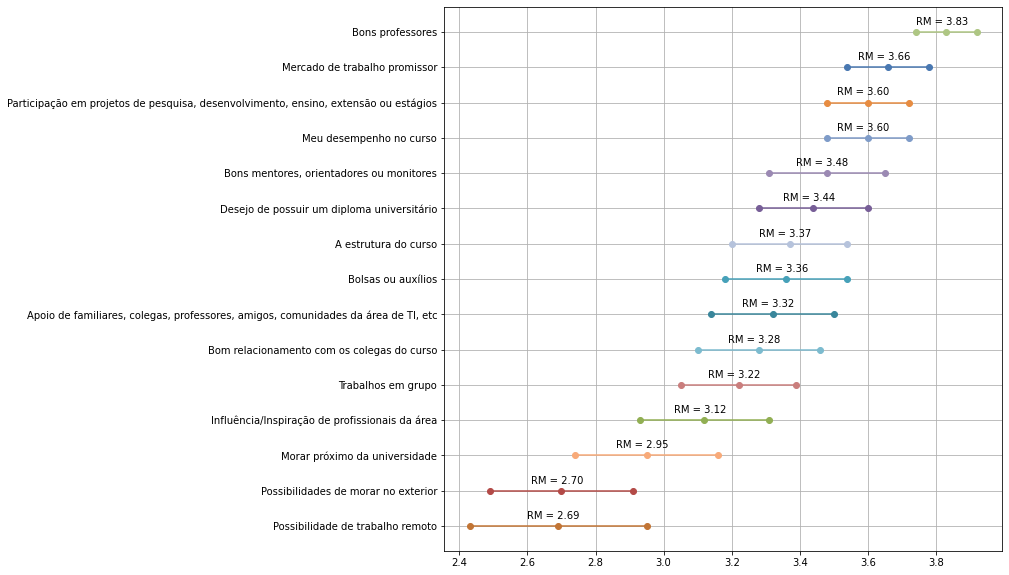

In [195]:
importancia_geral_intervalo_de_confianca = pd.DataFrame({
    'Descrição': importancia_geral['Descrição'],
    'mean': [
        mediaRanking(df.query("IMP_INFRAESTRUTURA != 0")['IMP_INFRAESTRUTURA'].values.tolist()),
        mediaRanking(df.query("IMP_MORAR_PROXIMO != 0")['IMP_MORAR_PROXIMO'].values.tolist()),
        mediaRanking(df.query("IMP_NETWORK != 0")['IMP_NETWORK'].values.tolist()),
        mediaRanking(df.query("IMP_BONS_MENTORES != 0")['IMP_BONS_MENTORES'].values.tolist()),
        mediaRanking(df.query("IMP_BONS_PROFS != 0")['IMP_BONS_PROFS'].values.tolist()),
        mediaRanking(df.query("IMP_TRAB_GRUPO != 0")['IMP_TRAB_GRUPO'].values.tolist()),
        mediaRanking(df.query("IMP_DESEMPENHO != 0")['IMP_DESEMPENHO'].values.tolist()),
        mediaRanking(df.query("IMP_PART_PROJETO != 0")['IMP_PART_PROJETO'].values.tolist()),
        mediaRanking(df.query("IMP_AUX_FIN != 0")['IMP_AUX_FIN'].values.tolist()),
        mediaRanking(df.query("IMP_DIPLOMA != 0")['IMP_DIPLOMA'].values.tolist()),
        mediaRanking(df.query("IMP_INF_DE_OUTOS_PROFISSIONAIS != 0")['IMP_INF_DE_OUTOS_PROFISSIONAIS'].values.tolist()),
        mediaRanking(df.query("IMP_MORAR_NO_EXTERIOR != 0")['IMP_MORAR_NO_EXTERIOR'].values.tolist()),
        mediaRanking(df.query("IMP_MERC_PROMISSOR != 0")['IMP_MERC_PROMISSOR'].values.tolist()),
        mediaRanking(df.query("IMP_TRAB_REMOTO != 0")['IMP_TRAB_REMOTO'].values.tolist()),
        mediaRanking(df.query("IMP_APOIO != 0")['IMP_APOIO'].values.tolist())
        ],
    'top_confidence_interval': [
        intervalo_de_confianca(df.query("IMP_INFRAESTRUTURA != 0")['IMP_INFRAESTRUTURA'].values.tolist())[0],
        intervalo_de_confianca(df.query("IMP_MORAR_PROXIMO != 0")['IMP_MORAR_PROXIMO'].values.tolist())[0],
        intervalo_de_confianca(df.query("IMP_NETWORK != 0")['IMP_NETWORK'].values.tolist())[0],
        intervalo_de_confianca(df.query("IMP_BONS_MENTORES != 0")['IMP_BONS_MENTORES'].values.tolist())[0],
        intervalo_de_confianca(df.query("IMP_BONS_PROFS != 0")['IMP_BONS_PROFS'].values.tolist())[0],
        intervalo_de_confianca(df.query("IMP_TRAB_GRUPO != 0")['IMP_TRAB_GRUPO'].values.tolist())[0],
        intervalo_de_confianca(df.query("IMP_DESEMPENHO != 0")['IMP_DESEMPENHO'].values.tolist())[0],
        intervalo_de_confianca(df.query("IMP_PART_PROJETO != 0")['IMP_PART_PROJETO'].values.tolist())[0],
        intervalo_de_confianca(df.query("IMP_AUX_FIN != 0")['IMP_AUX_FIN'].values.tolist())[0],
        intervalo_de_confianca(df.query("IMP_DIPLOMA != 0")['IMP_DIPLOMA'].values.tolist())[0],
        intervalo_de_confianca(df.query("IMP_INF_DE_OUTOS_PROFISSIONAIS != 0")['IMP_INF_DE_OUTOS_PROFISSIONAIS'].values.tolist())[0],
        intervalo_de_confianca(df.query("IMP_MORAR_NO_EXTERIOR != 0")['IMP_MORAR_NO_EXTERIOR'].values.tolist())[0],
        intervalo_de_confianca(df.query("IMP_MERC_PROMISSOR != 0")['IMP_MERC_PROMISSOR'].values.tolist())[0],
        intervalo_de_confianca(df.query("IMP_TRAB_REMOTO != 0")['IMP_TRAB_REMOTO'].values.tolist())[0],
        intervalo_de_confianca(df.query("IMP_APOIO != 0")['IMP_APOIO'].values.tolist())[0]
    ],
    'bottom_confidence_interval': [
        intervalo_de_confianca(df.query("IMP_INFRAESTRUTURA != 0")['IMP_INFRAESTRUTURA'].values.tolist())[1],
        intervalo_de_confianca(df.query("IMP_MORAR_PROXIMO != 0")['IMP_MORAR_PROXIMO'].values.tolist())[1],
        intervalo_de_confianca(df.query("IMP_NETWORK != 0")['IMP_NETWORK'].values.tolist())[1],
        intervalo_de_confianca(df.query("IMP_BONS_MENTORES != 0")['IMP_BONS_MENTORES'].values.tolist())[1],
        intervalo_de_confianca(df.query("IMP_BONS_PROFS != 0")['IMP_BONS_PROFS'].values.tolist())[1],
        intervalo_de_confianca(df.query("IMP_TRAB_GRUPO != 0")['IMP_TRAB_GRUPO'].values.tolist())[1],
        intervalo_de_confianca(df.query("IMP_DESEMPENHO != 0")['IMP_DESEMPENHO'].values.tolist())[1],
        intervalo_de_confianca(df.query("IMP_PART_PROJETO != 0")['IMP_PART_PROJETO'].values.tolist())[1],
        intervalo_de_confianca(df.query("IMP_AUX_FIN != 0")['IMP_AUX_FIN'].values.tolist())[1],
        intervalo_de_confianca(df.query("IMP_DIPLOMA != 0")['IMP_DIPLOMA'].values.tolist())[1],
        intervalo_de_confianca(df.query("IMP_INF_DE_OUTOS_PROFISSIONAIS != 0")['IMP_INF_DE_OUTOS_PROFISSIONAIS'].values.tolist())[1],
        intervalo_de_confianca(df.query("IMP_MORAR_NO_EXTERIOR != 0")['IMP_MORAR_NO_EXTERIOR'].values.tolist())[1],
        intervalo_de_confianca(df.query("IMP_MERC_PROMISSOR != 0")['IMP_MERC_PROMISSOR'].values.tolist())[1],
        intervalo_de_confianca(df.query("IMP_TRAB_REMOTO != 0")['IMP_TRAB_REMOTO'].values.tolist())[1],
        intervalo_de_confianca(df.query("IMP_APOIO != 0")['IMP_APOIO'].values.tolist())[1]
    ]
})

importancia_geral_intervalo_de_confianca.sort_values(by=['mean'], ascending=True, ignore_index=True, inplace=True)

#https://stackoverflow.com/questions/59747313/how-can-i-plot-a-confidence-interval-in-python
plot_grafico_intervalo_de_confianca(importancia_geral_intervalo_de_confianca)

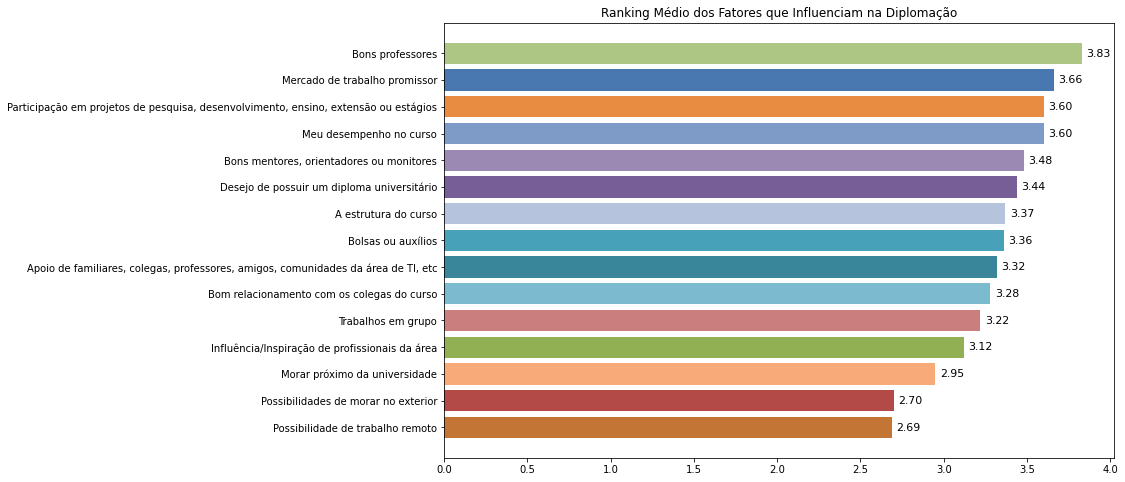

In [196]:


plotGraficoMediaRanking("Ranking Médio dos Fatores que Influenciam na Diplomação", 8, 12, 
                        importancia_geral_intervalo_de_confianca['Descrição'].values, importancia_geral_intervalo_de_confianca['mean'].values, 
                        importancia_geral_intervalo_de_confianca['mean'].values)

## Meninas x Meninos

### Meninas

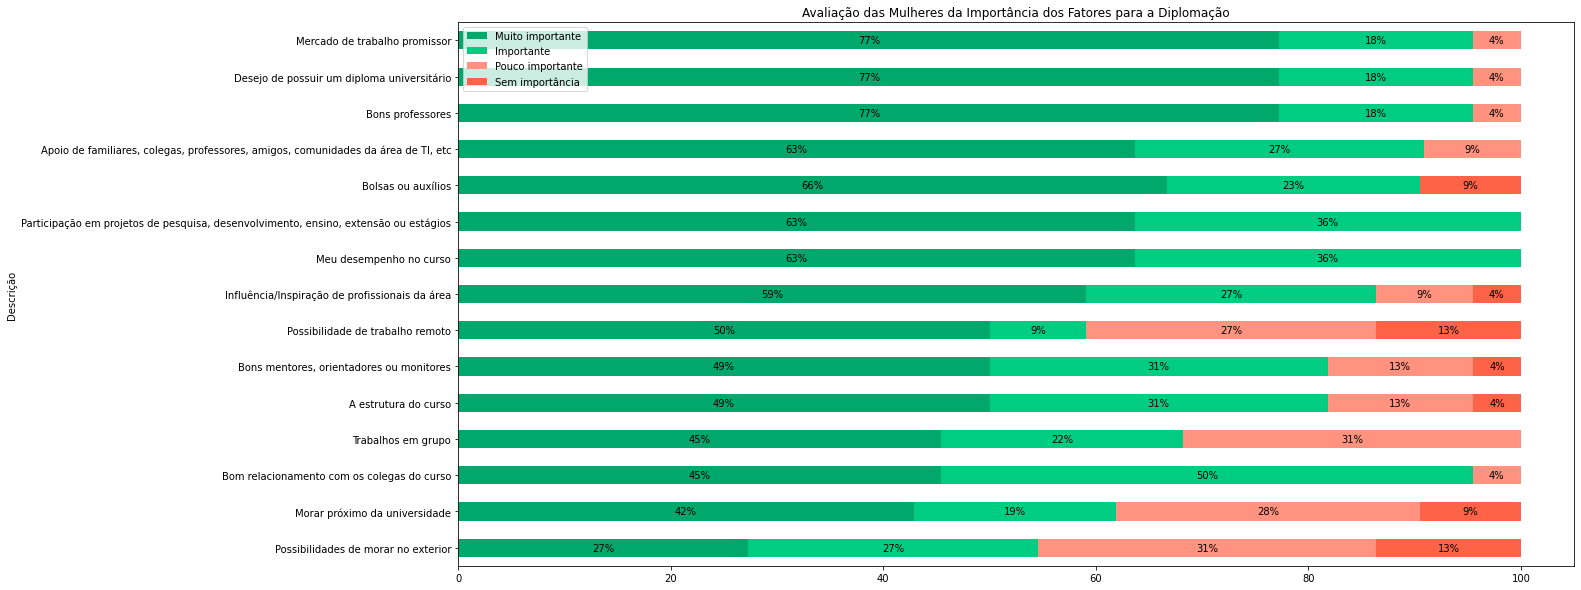

In [197]:
## MUITO IMPORTANTE
importancia_meninas = pd.DataFrame({"Descrição": ["A estrutura do curso",
                                "Morar próximo da universidade", 
                                "Bom relacionamento com os colegas do curso", 
                                "Bons mentores, orientadores ou monitores", 
                                "Bons professores", 
                                "Trabalhos em grupo",
                                "Meu desempenho no curso", 
                                "Participação em projetos de pesquisa, desenvolvimento, ensino, extensão ou estágios", 
                                "Bolsas ou auxílios", 
                                "Desejo de possuir um diploma universitário", 
                                "Influência/Inspiração de profissionais da área",
                                "Possibilidades de morar no exterior",
                                "Mercado de trabalho promissor",
                                "Possibilidade de trabalho remoto",
                                "Apoio de familiares, colegas, professores, amigos, comunidades da área de TI, etc"],
                                "Muito importante": [df.query("IMP_INFRAESTRUTURA == 4").query("SEXO == 'Feminino'")["IMP_INFRAESTRUTURA"].value_counts().to_frame().reset_index().iloc[0].IMP_INFRAESTRUTURA, 
                                              df.query("IMP_MORAR_PROXIMO == 4").query("SEXO == 'Feminino'")["IMP_MORAR_PROXIMO"].value_counts().to_frame().reset_index().iloc[0].IMP_MORAR_PROXIMO, 
                                              df.query("IMP_NETWORK == 4").query("SEXO == 'Feminino'")["IMP_NETWORK"].value_counts().to_frame().reset_index().iloc[0].IMP_NETWORK,
                                              df.query("IMP_BONS_MENTORES == 4").query("SEXO == 'Feminino'")["IMP_BONS_MENTORES"].value_counts().to_frame().reset_index().iloc[0].IMP_BONS_MENTORES,
                                              df.query("IMP_BONS_PROFS == 4").query("SEXO == 'Feminino'")["IMP_BONS_PROFS"].value_counts().to_frame().reset_index().iloc[0].IMP_BONS_PROFS,
                                              df.query("IMP_TRAB_GRUPO == 4").query("SEXO == 'Feminino'")["IMP_TRAB_GRUPO"].value_counts().to_frame().reset_index().iloc[0].IMP_TRAB_GRUPO, 
                                              df.query("IMP_DESEMPENHO == 4").query("SEXO == 'Feminino'")["IMP_DESEMPENHO"].value_counts().to_frame().reset_index().iloc[0].IMP_DESEMPENHO,
                                              df.query("IMP_PART_PROJETO == 4").query("SEXO == 'Feminino'")["IMP_PART_PROJETO"].value_counts().to_frame().reset_index().iloc[0].IMP_PART_PROJETO,
                                              df.query("IMP_AUX_FIN == 4").query("SEXO == 'Feminino'")["IMP_AUX_FIN"].value_counts().to_frame().reset_index().iloc[0].IMP_AUX_FIN,
                                              df.query("IMP_DIPLOMA == 4").query("SEXO == 'Feminino'")["IMP_DIPLOMA"].value_counts().to_frame().reset_index().iloc[0].IMP_DIPLOMA, 
                                              df.query("IMP_INF_DE_OUTOS_PROFISSIONAIS == 4").query("SEXO == 'Feminino'")["IMP_INF_DE_OUTOS_PROFISSIONAIS"].value_counts().to_frame().reset_index().iloc[0].IMP_INF_DE_OUTOS_PROFISSIONAIS,
                                              df.query("IMP_MORAR_NO_EXTERIOR == 4").query("SEXO == 'Feminino'")["IMP_MORAR_NO_EXTERIOR"].value_counts().to_frame().reset_index().iloc[0].IMP_MORAR_NO_EXTERIOR,
                                              df.query("IMP_MERC_PROMISSOR == 4").query("SEXO == 'Feminino'")["IMP_MERC_PROMISSOR"].value_counts().to_frame().reset_index().iloc[0].IMP_MERC_PROMISSOR,
                                              df.query("IMP_TRAB_REMOTO == 4").query("SEXO == 'Feminino'")["IMP_TRAB_REMOTO"].value_counts().to_frame().reset_index().iloc[0].IMP_TRAB_REMOTO,
                                              df.query("IMP_APOIO == 4").query("SEXO == 'Feminino'")["IMP_APOIO"].value_counts().to_frame().reset_index().iloc[0].IMP_APOIO],
                                "Importante": [df.query("IMP_INFRAESTRUTURA == 3").query("SEXO == 'Feminino'")["IMP_INFRAESTRUTURA"].value_counts().to_frame().reset_index().iloc[0].IMP_INFRAESTRUTURA, 
                                              df.query("IMP_MORAR_PROXIMO == 3").query("SEXO == 'Feminino'")["IMP_MORAR_PROXIMO"].value_counts().to_frame().reset_index().iloc[0].IMP_MORAR_PROXIMO, 
                                              df.query("IMP_NETWORK == 3").query("SEXO == 'Feminino'")["IMP_NETWORK"].value_counts().to_frame().reset_index().iloc[0].IMP_NETWORK,
                                              df.query("IMP_BONS_MENTORES == 3").query("SEXO == 'Feminino'")["IMP_BONS_MENTORES"].value_counts().to_frame().reset_index().iloc[0].IMP_BONS_MENTORES,
                                              df.query("IMP_BONS_PROFS == 3").query("SEXO == 'Feminino'")["IMP_BONS_PROFS"].value_counts().to_frame().reset_index().iloc[0].IMP_BONS_PROFS,
                                              df.query("IMP_TRAB_GRUPO == 3").query("SEXO == 'Feminino'")["IMP_TRAB_GRUPO"].value_counts().to_frame().reset_index().iloc[0].IMP_TRAB_GRUPO, 
                                              df.query("IMP_DESEMPENHO == 3").query("SEXO == 'Feminino'")["IMP_DESEMPENHO"].value_counts().to_frame().reset_index().iloc[0].IMP_DESEMPENHO,
                                              df.query("IMP_PART_PROJETO == 3").query("SEXO == 'Feminino'")["IMP_PART_PROJETO"].value_counts().to_frame().reset_index().iloc[0].IMP_PART_PROJETO,
                                              df.query("IMP_AUX_FIN == 3").query("SEXO == 'Feminino'")["IMP_AUX_FIN"].value_counts().to_frame().reset_index().iloc[0].IMP_AUX_FIN,
                                              df.query("IMP_DIPLOMA == 3").query("SEXO == 'Feminino'")["IMP_DIPLOMA"].value_counts().to_frame().reset_index().iloc[0].IMP_DIPLOMA, 
                                              df.query("IMP_INF_DE_OUTOS_PROFISSIONAIS == 3").query("SEXO == 'Feminino'")["IMP_INF_DE_OUTOS_PROFISSIONAIS"].value_counts().to_frame().reset_index().iloc[0].IMP_INF_DE_OUTOS_PROFISSIONAIS,
                                              df.query("IMP_MORAR_NO_EXTERIOR == 3").query("SEXO == 'Feminino'")["IMP_MORAR_NO_EXTERIOR"].value_counts().to_frame().reset_index().iloc[0].IMP_MORAR_NO_EXTERIOR,
                                              df.query("IMP_MERC_PROMISSOR == 3").query("SEXO == 'Feminino'")["IMP_MERC_PROMISSOR"].value_counts().to_frame().reset_index().iloc[0].IMP_MERC_PROMISSOR,
                                              df.query("IMP_TRAB_REMOTO == 3").query("SEXO == 'Feminino'")["IMP_TRAB_REMOTO"].value_counts().to_frame().reset_index().iloc[0].IMP_TRAB_REMOTO,
                                              df.query("IMP_APOIO == 3").query("SEXO == 'Feminino'")["IMP_APOIO"].value_counts().to_frame().reset_index().iloc[0].IMP_APOIO], 
                                 "Pouco importante": [df.query("IMP_INFRAESTRUTURA == 2").query("SEXO == 'Feminino'")["IMP_INFRAESTRUTURA"].value_counts().to_frame().reset_index().iloc[0].IMP_INFRAESTRUTURA, 
                                              df.query("IMP_MORAR_PROXIMO == 2").query("SEXO == 'Feminino'")["IMP_MORAR_PROXIMO"].value_counts().to_frame().reset_index().iloc[0].IMP_MORAR_PROXIMO, 
                                              df.query("IMP_NETWORK == 2").query("SEXO == 'Feminino'")["IMP_NETWORK"].value_counts().to_frame().reset_index().iloc[0].IMP_NETWORK,
                                              df.query("IMP_BONS_MENTORES == 2").query("SEXO == 'Feminino'")["IMP_BONS_MENTORES"].value_counts().to_frame().reset_index().iloc[0].IMP_BONS_MENTORES,
                                              df.query("IMP_BONS_PROFS == 2").query("SEXO == 'Feminino'")["IMP_BONS_PROFS"].value_counts().to_frame().reset_index().iloc[0].IMP_BONS_PROFS,
                                              df.query("IMP_TRAB_GRUPO == 2").query("SEXO == 'Feminino'")["IMP_TRAB_GRUPO"].value_counts().to_frame().reset_index().iloc[0].IMP_TRAB_GRUPO, 
                                              0,
                                              0,
                                              0,
                                              df.query("IMP_DIPLOMA == 2").query("SEXO == 'Feminino'")["IMP_DIPLOMA"].value_counts().to_frame().reset_index().iloc[0].IMP_DIPLOMA, 
                                              df.query("IMP_INF_DE_OUTOS_PROFISSIONAIS == 2").query("SEXO == 'Feminino'")["IMP_INF_DE_OUTOS_PROFISSIONAIS"].value_counts().to_frame().reset_index().iloc[0].IMP_INF_DE_OUTOS_PROFISSIONAIS,
                                              df.query("IMP_MORAR_NO_EXTERIOR == 2").query("SEXO == 'Feminino'")["IMP_MORAR_NO_EXTERIOR"].value_counts().to_frame().reset_index().iloc[0].IMP_MORAR_NO_EXTERIOR,
                                              df.query("IMP_MERC_PROMISSOR == 2").query("SEXO == 'Feminino'")["IMP_MERC_PROMISSOR"].value_counts().to_frame().reset_index().iloc[0].IMP_MERC_PROMISSOR,
                                              df.query("IMP_TRAB_REMOTO == 2").query("SEXO == 'Feminino'")["IMP_TRAB_REMOTO"].value_counts().to_frame().reset_index().iloc[0].IMP_TRAB_REMOTO,
                                              df.query("IMP_APOIO == 2").query("SEXO == 'Feminino'")["IMP_APOIO"].value_counts().to_frame().reset_index().iloc[0].IMP_APOIO],     
                                "Sem importância": [df.query("IMP_INFRAESTRUTURA == 1").query("SEXO == 'Feminino'")["IMP_INFRAESTRUTURA"].value_counts().to_frame().reset_index().iloc[0].IMP_INFRAESTRUTURA, 
                                              df.query("IMP_MORAR_PROXIMO == 1").query("SEXO == 'Feminino'")["IMP_MORAR_PROXIMO"].value_counts().to_frame().reset_index().iloc[0].IMP_MORAR_PROXIMO, 
                                              
                                              0,

                                              df.query("IMP_BONS_MENTORES == 1").query("SEXO == 'Feminino'")["IMP_BONS_MENTORES"].value_counts().to_frame().reset_index().iloc[0].IMP_BONS_MENTORES,

                                              0,
                                              0, 
                                              0,
                                              0,
                                              
                                              df.query("IMP_AUX_FIN == 1").query("SEXO == 'Feminino'")["IMP_AUX_FIN"].value_counts().to_frame().reset_index().iloc[0].IMP_AUX_FIN,
                                              
                                              0, 

                                              df.query("IMP_INF_DE_OUTOS_PROFISSIONAIS == 1").query("SEXO == 'Feminino'")["IMP_INF_DE_OUTOS_PROFISSIONAIS"].value_counts().to_frame().reset_index().iloc[0].IMP_INF_DE_OUTOS_PROFISSIONAIS,
                                              df.query("IMP_MORAR_NO_EXTERIOR == 1").query("SEXO == 'Feminino'")["IMP_MORAR_NO_EXTERIOR"].value_counts().to_frame().reset_index().iloc[0].IMP_MORAR_NO_EXTERIOR,
                                              
                                              0,

                                              df.query("IMP_TRAB_REMOTO == 1").query("SEXO == 'Feminino'")["IMP_TRAB_REMOTO"].value_counts().to_frame().reset_index().iloc[0].IMP_TRAB_REMOTO,
                                              
                                              0]
                                  })
plot_barh_empilhado(importancia_meninas.sort_values(by=['Muito importante'], ascending=True), 'Descrição', 'Avaliação das Mulheres da Importância dos Fatores para a Diplomação', 20, 10, 'importancia')


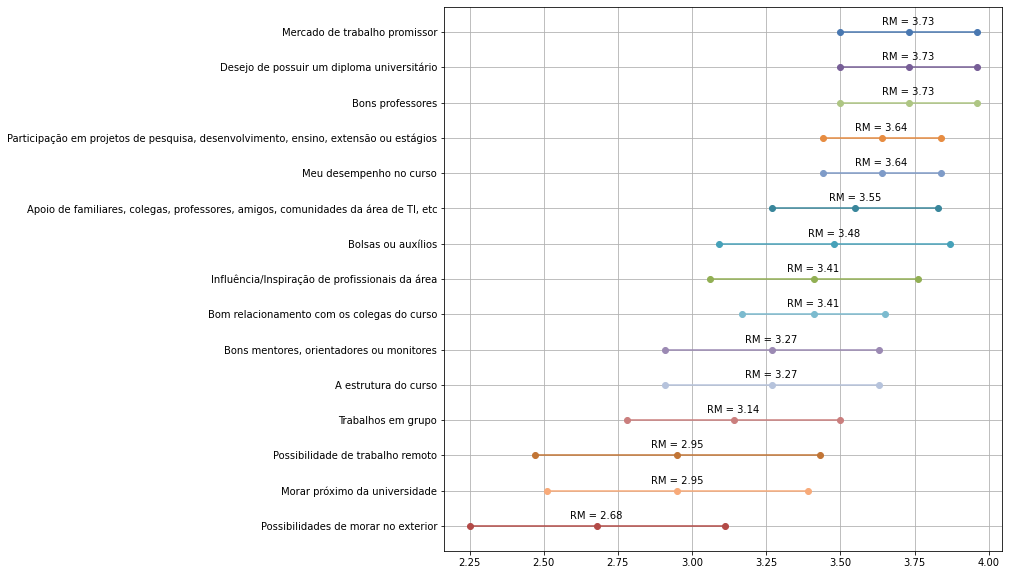

In [198]:
df_mulheres = df.query("SEXO == 'Feminino'")

df_importancia_mulheres = pd.DataFrame({
    'Descrição': importancia_meninas['Descrição'],
    'mean': [
        mediaRanking(df_mulheres.query("IMP_INFRAESTRUTURA != 0")['IMP_INFRAESTRUTURA'].values.tolist()),
        mediaRanking(df_mulheres.query("IMP_MORAR_PROXIMO != 0")['IMP_MORAR_PROXIMO'].values.tolist()),
        mediaRanking(df_mulheres.query("IMP_NETWORK != 0")['IMP_NETWORK'].values.tolist()),
        mediaRanking(df_mulheres.query("IMP_BONS_MENTORES != 0")['IMP_BONS_MENTORES'].values.tolist()),
        mediaRanking(df_mulheres.query("IMP_BONS_PROFS != 0")['IMP_BONS_PROFS'].values.tolist()),
        mediaRanking(df_mulheres.query("IMP_TRAB_GRUPO != 0")['IMP_TRAB_GRUPO'].values.tolist()),
        mediaRanking(df_mulheres.query("IMP_DESEMPENHO != 0")['IMP_DESEMPENHO'].values.tolist()),
        mediaRanking(df_mulheres.query("IMP_PART_PROJETO != 0")['IMP_PART_PROJETO'].values.tolist()),
        mediaRanking(df_mulheres.query("IMP_AUX_FIN != 0")['IMP_AUX_FIN'].values.tolist()),
        mediaRanking(df_mulheres.query("IMP_DIPLOMA != 0")['IMP_DIPLOMA'].values.tolist()),
        mediaRanking(df_mulheres.query("IMP_INF_DE_OUTOS_PROFISSIONAIS != 0")['IMP_INF_DE_OUTOS_PROFISSIONAIS'].values.tolist()),
        mediaRanking(df_mulheres.query("IMP_MORAR_NO_EXTERIOR != 0")['IMP_MORAR_NO_EXTERIOR'].values.tolist()),
        mediaRanking(df_mulheres.query("IMP_MERC_PROMISSOR != 0")['IMP_MERC_PROMISSOR'].values.tolist()),
        mediaRanking(df_mulheres.query("IMP_TRAB_REMOTO != 0")['IMP_TRAB_REMOTO'].values.tolist()),
        mediaRanking(df_mulheres.query("IMP_APOIO != 0")['IMP_APOIO'].values.tolist())
        ],
    'top_confidence_interval': [
        intervalo_de_confianca(df_mulheres.query("IMP_INFRAESTRUTURA != 0")['IMP_INFRAESTRUTURA'].values.tolist())[0],
        intervalo_de_confianca(df_mulheres.query("IMP_MORAR_PROXIMO != 0")['IMP_MORAR_PROXIMO'].values.tolist())[0],
        intervalo_de_confianca(df_mulheres.query("IMP_NETWORK != 0")['IMP_NETWORK'].values.tolist())[0],
        intervalo_de_confianca(df_mulheres.query("IMP_BONS_MENTORES != 0")['IMP_BONS_MENTORES'].values.tolist())[0],
        intervalo_de_confianca(df_mulheres.query("IMP_BONS_PROFS != 0")['IMP_BONS_PROFS'].values.tolist())[0],
        intervalo_de_confianca(df_mulheres.query("IMP_TRAB_GRUPO != 0")['IMP_TRAB_GRUPO'].values.tolist())[0],
        intervalo_de_confianca(df_mulheres.query("IMP_DESEMPENHO != 0")['IMP_DESEMPENHO'].values.tolist())[0],
        intervalo_de_confianca(df_mulheres.query("IMP_PART_PROJETO != 0")['IMP_PART_PROJETO'].values.tolist())[0],
        intervalo_de_confianca(df_mulheres.query("IMP_AUX_FIN != 0")['IMP_AUX_FIN'].values.tolist())[0],
        intervalo_de_confianca(df_mulheres.query("IMP_DIPLOMA != 0")['IMP_DIPLOMA'].values.tolist())[0],
        intervalo_de_confianca(df_mulheres.query("IMP_INF_DE_OUTOS_PROFISSIONAIS != 0")['IMP_INF_DE_OUTOS_PROFISSIONAIS'].values.tolist())[0],
        intervalo_de_confianca(df_mulheres.query("IMP_MORAR_NO_EXTERIOR != 0")['IMP_MORAR_NO_EXTERIOR'].values.tolist())[0],
        intervalo_de_confianca(df_mulheres.query("IMP_MERC_PROMISSOR != 0")['IMP_MERC_PROMISSOR'].values.tolist())[0],
        intervalo_de_confianca(df_mulheres.query("IMP_TRAB_REMOTO != 0")['IMP_TRAB_REMOTO'].values.tolist())[0],
        intervalo_de_confianca(df_mulheres.query("IMP_APOIO != 0")['IMP_APOIO'].values.tolist())[0]
    ],
    'bottom_confidence_interval': [
        intervalo_de_confianca(df_mulheres.query("IMP_INFRAESTRUTURA != 0")['IMP_INFRAESTRUTURA'].values.tolist())[1],
        intervalo_de_confianca(df_mulheres.query("IMP_MORAR_PROXIMO != 0")['IMP_MORAR_PROXIMO'].values.tolist())[1],
        intervalo_de_confianca(df_mulheres.query("IMP_NETWORK != 0")['IMP_NETWORK'].values.tolist())[1],
        intervalo_de_confianca(df_mulheres.query("IMP_BONS_MENTORES != 0")['IMP_BONS_MENTORES'].values.tolist())[1],
        intervalo_de_confianca(df_mulheres.query("IMP_BONS_PROFS != 0")['IMP_BONS_PROFS'].values.tolist())[1],
        intervalo_de_confianca(df_mulheres.query("IMP_TRAB_GRUPO != 0")['IMP_TRAB_GRUPO'].values.tolist())[1],
        intervalo_de_confianca(df_mulheres.query("IMP_DESEMPENHO != 0")['IMP_DESEMPENHO'].values.tolist())[1],
        intervalo_de_confianca(df_mulheres.query("IMP_PART_PROJETO != 0")['IMP_PART_PROJETO'].values.tolist())[1],
        intervalo_de_confianca(df_mulheres.query("IMP_AUX_FIN != 0")['IMP_AUX_FIN'].values.tolist())[1],
        intervalo_de_confianca(df_mulheres.query("IMP_DIPLOMA != 0")['IMP_DIPLOMA'].values.tolist())[1],
        intervalo_de_confianca(df_mulheres.query("IMP_INF_DE_OUTOS_PROFISSIONAIS != 0")['IMP_INF_DE_OUTOS_PROFISSIONAIS'].values.tolist())[1],
        intervalo_de_confianca(df_mulheres.query("IMP_MORAR_NO_EXTERIOR != 0")['IMP_MORAR_NO_EXTERIOR'].values.tolist())[1],
        intervalo_de_confianca(df_mulheres.query("IMP_MERC_PROMISSOR != 0")['IMP_MERC_PROMISSOR'].values.tolist())[1],
        intervalo_de_confianca(df_mulheres.query("IMP_TRAB_REMOTO != 0")['IMP_TRAB_REMOTO'].values.tolist())[1],
        intervalo_de_confianca(df_mulheres.query("IMP_APOIO != 0")['IMP_APOIO'].values.tolist())[1]
    ]
})

df_importancia_mulheres.sort_values(by=['mean'], ascending=True, ignore_index=True, inplace=True)


#https://stackoverflow.com/questions/59747313/how-can-i-plot-a-confidence-interval-in-python
plot_grafico_intervalo_de_confianca(df_importancia_mulheres)

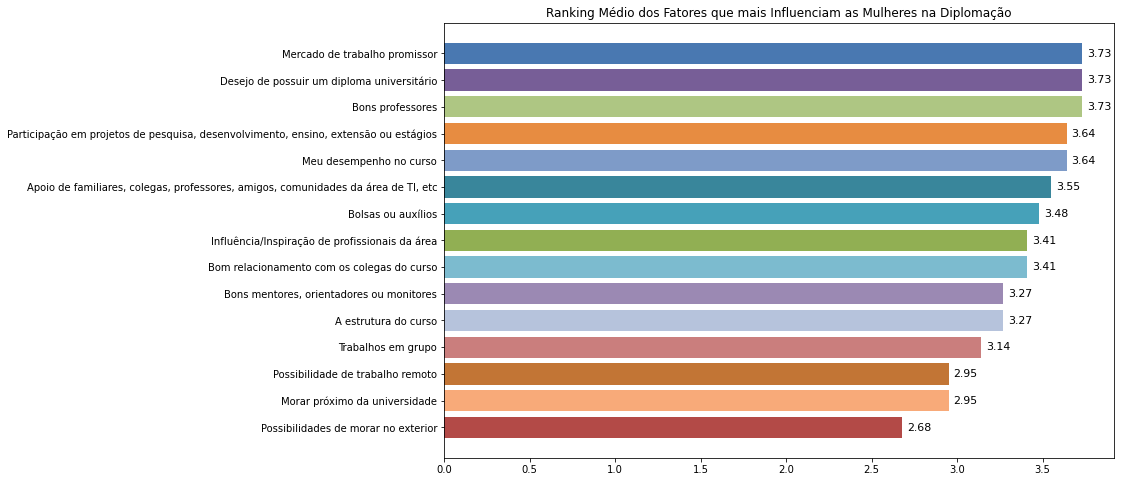

In [199]:
plotGraficoMediaRanking("Ranking Médio dos Fatores que mais Influenciam as Mulheres na Diplomação", 8, 12,
                        df_importancia_mulheres['Descrição'].values, df_importancia_mulheres['mean'].values, 
                        df_importancia_mulheres['mean'].values)

### Meninos

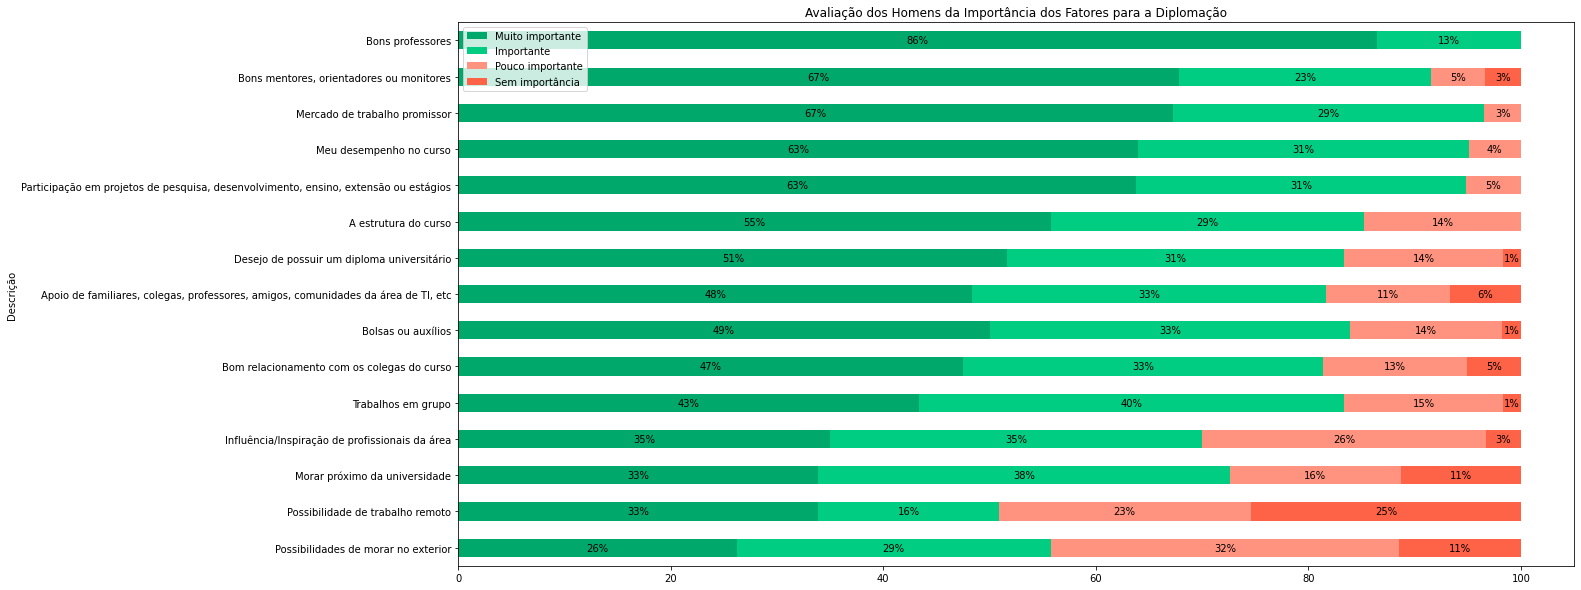

In [200]:
## MUITO IMPORTANTE
importancia_meninos = pd.DataFrame({"Descrição": ["A estrutura do curso",
                                "Morar próximo da universidade", 
                                "Bom relacionamento com os colegas do curso", 
                                "Bons mentores, orientadores ou monitores", 
                                "Bons professores", 
                                "Trabalhos em grupo",
                                "Meu desempenho no curso", 
                                "Participação em projetos de pesquisa, desenvolvimento, ensino, extensão ou estágios", 
                                "Bolsas ou auxílios", 
                                "Desejo de possuir um diploma universitário", 
                                "Influência/Inspiração de profissionais da área",
                                "Possibilidades de morar no exterior",
                                "Mercado de trabalho promissor",
                                "Possibilidade de trabalho remoto",
                                "Apoio de familiares, colegas, professores, amigos, comunidades da área de TI, etc"],
                                "Muito importante": [df.query("IMP_INFRAESTRUTURA == 4").query("SEXO == 'Masculino'")["IMP_INFRAESTRUTURA"].value_counts().to_frame().reset_index().iloc[0].IMP_INFRAESTRUTURA, 
                                              df.query("IMP_MORAR_PROXIMO == 4").query("SEXO == 'Masculino'")["IMP_MORAR_PROXIMO"].value_counts().to_frame().reset_index().iloc[0].IMP_MORAR_PROXIMO, 
                                              df.query("IMP_NETWORK == 4").query("SEXO == 'Masculino'")["IMP_NETWORK"].value_counts().to_frame().reset_index().iloc[0].IMP_NETWORK,
                                              df.query("IMP_BONS_MENTORES == 4").query("SEXO == 'Masculino'")["IMP_BONS_MENTORES"].value_counts().to_frame().reset_index().iloc[0].IMP_BONS_MENTORES,
                                              df.query("IMP_BONS_PROFS == 4").query("SEXO == 'Masculino'")["IMP_BONS_PROFS"].value_counts().to_frame().reset_index().iloc[0].IMP_BONS_PROFS,
                                              df.query("IMP_TRAB_GRUPO == 4").query("SEXO == 'Masculino'")["IMP_TRAB_GRUPO"].value_counts().to_frame().reset_index().iloc[0].IMP_TRAB_GRUPO, 
                                              df.query("IMP_DESEMPENHO == 4").query("SEXO == 'Masculino'")["IMP_DESEMPENHO"].value_counts().to_frame().reset_index().iloc[0].IMP_DESEMPENHO,
                                              df.query("IMP_PART_PROJETO == 4").query("SEXO == 'Masculino'")["IMP_PART_PROJETO"].value_counts().to_frame().reset_index().iloc[0].IMP_PART_PROJETO,
                                              df.query("IMP_AUX_FIN == 4").query("SEXO == 'Masculino'")["IMP_AUX_FIN"].value_counts().to_frame().reset_index().iloc[0].IMP_AUX_FIN,
                                              df.query("IMP_DIPLOMA == 4").query("SEXO == 'Masculino'")["IMP_DIPLOMA"].value_counts().to_frame().reset_index().iloc[0].IMP_DIPLOMA, 
                                              df.query("IMP_INF_DE_OUTOS_PROFISSIONAIS == 4").query("SEXO == 'Masculino'")["IMP_INF_DE_OUTOS_PROFISSIONAIS"].value_counts().to_frame().reset_index().iloc[0].IMP_INF_DE_OUTOS_PROFISSIONAIS,
                                              df.query("IMP_MORAR_NO_EXTERIOR == 4").query("SEXO == 'Masculino'")["IMP_MORAR_NO_EXTERIOR"].value_counts().to_frame().reset_index().iloc[0].IMP_MORAR_NO_EXTERIOR,
                                              df.query("IMP_MERC_PROMISSOR == 4").query("SEXO == 'Masculino'")["IMP_MERC_PROMISSOR"].value_counts().to_frame().reset_index().iloc[0].IMP_MERC_PROMISSOR,
                                              df.query("IMP_TRAB_REMOTO == 4").query("SEXO == 'Masculino'")["IMP_TRAB_REMOTO"].value_counts().to_frame().reset_index().iloc[0].IMP_TRAB_REMOTO,
                                              df.query("IMP_APOIO == 4").query("SEXO == 'Masculino'")["IMP_APOIO"].value_counts().to_frame().reset_index().iloc[0].IMP_APOIO],
                                "Importante": [df.query("IMP_INFRAESTRUTURA == 3").query("SEXO == 'Masculino'")["IMP_INFRAESTRUTURA"].value_counts().to_frame().reset_index().iloc[0].IMP_INFRAESTRUTURA, 
                                              df.query("IMP_MORAR_PROXIMO == 3").query("SEXO == 'Masculino'")["IMP_MORAR_PROXIMO"].value_counts().to_frame().reset_index().iloc[0].IMP_MORAR_PROXIMO, 
                                              df.query("IMP_NETWORK == 3").query("SEXO == 'Masculino'")["IMP_NETWORK"].value_counts().to_frame().reset_index().iloc[0].IMP_NETWORK,
                                              df.query("IMP_BONS_MENTORES == 3").query("SEXO == 'Masculino'")["IMP_BONS_MENTORES"].value_counts().to_frame().reset_index().iloc[0].IMP_BONS_MENTORES,
                                              df.query("IMP_BONS_PROFS == 3").query("SEXO == 'Masculino'")["IMP_BONS_PROFS"].value_counts().to_frame().reset_index().iloc[0].IMP_BONS_PROFS,
                                              df.query("IMP_TRAB_GRUPO == 3").query("SEXO == 'Masculino'")["IMP_TRAB_GRUPO"].value_counts().to_frame().reset_index().iloc[0].IMP_TRAB_GRUPO, 
                                              df.query("IMP_DESEMPENHO == 3").query("SEXO == 'Masculino'")["IMP_DESEMPENHO"].value_counts().to_frame().reset_index().iloc[0].IMP_DESEMPENHO,
                                              df.query("IMP_PART_PROJETO == 3").query("SEXO == 'Masculino'")["IMP_PART_PROJETO"].value_counts().to_frame().reset_index().iloc[0].IMP_PART_PROJETO,
                                              df.query("IMP_AUX_FIN == 3").query("SEXO == 'Masculino'")["IMP_AUX_FIN"].value_counts().to_frame().reset_index().iloc[0].IMP_AUX_FIN,
                                              df.query("IMP_DIPLOMA == 3").query("SEXO == 'Masculino'")["IMP_DIPLOMA"].value_counts().to_frame().reset_index().iloc[0].IMP_DIPLOMA, 
                                              df.query("IMP_INF_DE_OUTOS_PROFISSIONAIS == 3").query("SEXO == 'Masculino'")["IMP_INF_DE_OUTOS_PROFISSIONAIS"].value_counts().to_frame().reset_index().iloc[0].IMP_INF_DE_OUTOS_PROFISSIONAIS,
                                              df.query("IMP_MORAR_NO_EXTERIOR == 3").query("SEXO == 'Masculino'")["IMP_MORAR_NO_EXTERIOR"].value_counts().to_frame().reset_index().iloc[0].IMP_MORAR_NO_EXTERIOR,
                                              df.query("IMP_MERC_PROMISSOR == 3").query("SEXO == 'Masculino'")["IMP_MERC_PROMISSOR"].value_counts().to_frame().reset_index().iloc[0].IMP_MERC_PROMISSOR,
                                              df.query("IMP_TRAB_REMOTO == 3").query("SEXO == 'Masculino'")["IMP_TRAB_REMOTO"].value_counts().to_frame().reset_index().iloc[0].IMP_TRAB_REMOTO,
                                              df.query("IMP_APOIO == 3").query("SEXO == 'Masculino'")["IMP_APOIO"].value_counts().to_frame().reset_index().iloc[0].IMP_APOIO], 
                                "Pouco importante": [df.query("IMP_INFRAESTRUTURA == 2").query("SEXO == 'Masculino'")["IMP_INFRAESTRUTURA"].value_counts().to_frame().reset_index().iloc[0].IMP_INFRAESTRUTURA, 
                                              df.query("IMP_MORAR_PROXIMO == 2").query("SEXO == 'Masculino'")["IMP_MORAR_PROXIMO"].value_counts().to_frame().reset_index().iloc[0].IMP_MORAR_PROXIMO, 
                                              df.query("IMP_NETWORK == 2").query("SEXO == 'Masculino'")["IMP_NETWORK"].value_counts().to_frame().reset_index().iloc[0].IMP_NETWORK,
                                              df.query("IMP_BONS_MENTORES == 2").query("SEXO == 'Masculino'")["IMP_BONS_MENTORES"].value_counts().to_frame().reset_index().iloc[0].IMP_BONS_MENTORES,
                                              0,
                                              df.query("IMP_TRAB_GRUPO == 2").query("SEXO == 'Masculino'")["IMP_TRAB_GRUPO"].value_counts().to_frame().reset_index().iloc[0].IMP_TRAB_GRUPO, 
                                              df.query("IMP_DESEMPENHO == 2").query("SEXO == 'Masculino'")["IMP_DESEMPENHO"].value_counts().to_frame().reset_index().iloc[0].IMP_DESEMPENHO,
                                              df.query("IMP_PART_PROJETO == 2").query("SEXO == 'Masculino'")["IMP_PART_PROJETO"].value_counts().to_frame().reset_index().iloc[0].IMP_PART_PROJETO,
                                              df.query("IMP_AUX_FIN == 2").query("SEXO == 'Masculino'")["IMP_AUX_FIN"].value_counts().to_frame().reset_index().iloc[0].IMP_AUX_FIN,
                                              df.query("IMP_DIPLOMA == 2").query("SEXO == 'Masculino'")["IMP_DIPLOMA"].value_counts().to_frame().reset_index().iloc[0].IMP_DIPLOMA, 
                                              df.query("IMP_INF_DE_OUTOS_PROFISSIONAIS == 2").query("SEXO == 'Masculino'")["IMP_INF_DE_OUTOS_PROFISSIONAIS"].value_counts().to_frame().reset_index().iloc[0].IMP_INF_DE_OUTOS_PROFISSIONAIS,
                                              df.query("IMP_MORAR_NO_EXTERIOR == 2").query("SEXO == 'Masculino'")["IMP_MORAR_NO_EXTERIOR"].value_counts().to_frame().reset_index().iloc[0].IMP_MORAR_NO_EXTERIOR,
                                              df.query("IMP_MERC_PROMISSOR == 2").query("SEXO == 'Masculino'")["IMP_MERC_PROMISSOR"].value_counts().to_frame().reset_index().iloc[0].IMP_MERC_PROMISSOR,
                                              df.query("IMP_TRAB_REMOTO == 2").query("SEXO == 'Masculino'")["IMP_TRAB_REMOTO"].value_counts().to_frame().reset_index().iloc[0].IMP_TRAB_REMOTO,
                                              df.query("IMP_APOIO == 2").query("SEXO == 'Masculino'")["IMP_APOIO"].value_counts().to_frame().reset_index().iloc[0].IMP_APOIO],
                                "Sem importância": [0, 
                                              df.query("IMP_MORAR_PROXIMO == 1").query("SEXO == 'Masculino'")["IMP_MORAR_PROXIMO"].value_counts().to_frame().reset_index().iloc[0].IMP_MORAR_PROXIMO, 
                                              df.query("IMP_NETWORK == 1").query("SEXO == 'Masculino'")["IMP_NETWORK"].value_counts().to_frame().reset_index().iloc[0].IMP_NETWORK,
                                              df.query("IMP_BONS_MENTORES == 1").query("SEXO == 'Masculino'")["IMP_BONS_MENTORES"].value_counts().to_frame().reset_index().iloc[0].IMP_BONS_MENTORES,
                                              0,
                                              df.query("IMP_TRAB_GRUPO == 1").query("SEXO == 'Masculino'")["IMP_TRAB_GRUPO"].value_counts().to_frame().reset_index().iloc[0].IMP_TRAB_GRUPO, 
                                              0,
                                              0,
                                              df.query("IMP_AUX_FIN == 1").query("SEXO == 'Masculino'")["IMP_AUX_FIN"].value_counts().to_frame().reset_index().iloc[0].IMP_AUX_FIN,
                                              df.query("IMP_DIPLOMA == 1").query("SEXO == 'Masculino'")["IMP_DIPLOMA"].value_counts().to_frame().reset_index().iloc[0].IMP_DIPLOMA, 
                                              df.query("IMP_INF_DE_OUTOS_PROFISSIONAIS == 1").query("SEXO == 'Masculino'")["IMP_INF_DE_OUTOS_PROFISSIONAIS"].value_counts().to_frame().reset_index().iloc[0].IMP_INF_DE_OUTOS_PROFISSIONAIS,
                                              df.query("IMP_MORAR_NO_EXTERIOR == 1").query("SEXO == 'Masculino'")["IMP_MORAR_NO_EXTERIOR"].value_counts().to_frame().reset_index().iloc[0].IMP_MORAR_NO_EXTERIOR,
                                              0,
                                              df.query("IMP_TRAB_REMOTO == 1").query("SEXO == 'Masculino'")["IMP_TRAB_REMOTO"].value_counts().to_frame().reset_index().iloc[0].IMP_TRAB_REMOTO,
                                              df.query("IMP_APOIO == 1").query("SEXO == 'Masculino'")["IMP_APOIO"].value_counts().to_frame().reset_index().iloc[0].IMP_APOIO]
                                  })

#importancia_geral["Soma_Mais"] = (importancia_geral["Importante"] + importancia_geral["Muito importante"])

plot_barh_empilhado(importancia_meninos.sort_values(by=['Muito importante'], ascending=True), 'Descrição', 'Avaliação dos Homens da Importância dos Fatores para a Diplomação', 20, 10, 'importancia')

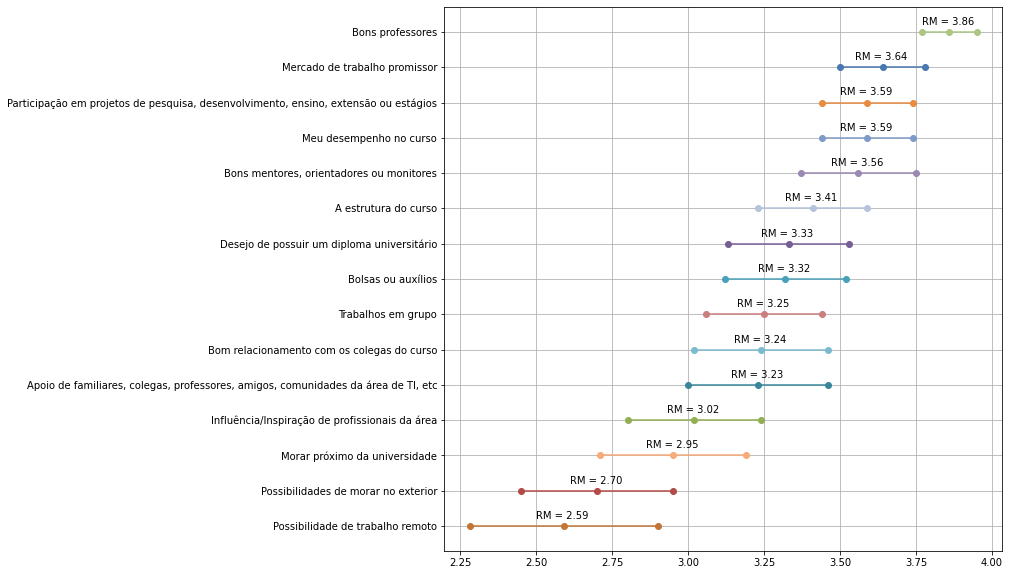

In [201]:
df_homens = df.query("SEXO == 'Masculino'")

df_importancia_homens = pd.DataFrame({
    'Descrição': importancia_meninos['Descrição'],
    'mean': [
        mediaRanking(df_homens.query("IMP_INFRAESTRUTURA != 0")['IMP_INFRAESTRUTURA'].values.tolist()),
        mediaRanking(df_homens.query("IMP_MORAR_PROXIMO != 0")['IMP_MORAR_PROXIMO'].values.tolist()),
        mediaRanking(df_homens.query("IMP_NETWORK != 0")['IMP_NETWORK'].values.tolist()),
        mediaRanking(df_homens.query("IMP_BONS_MENTORES != 0")['IMP_BONS_MENTORES'].values.tolist()),
        mediaRanking(df_homens.query("IMP_BONS_PROFS != 0")['IMP_BONS_PROFS'].values.tolist()),
        mediaRanking(df_homens.query("IMP_TRAB_GRUPO != 0")['IMP_TRAB_GRUPO'].values.tolist()),
        mediaRanking(df_homens.query("IMP_DESEMPENHO != 0")['IMP_DESEMPENHO'].values.tolist()),
        mediaRanking(df_homens.query("IMP_PART_PROJETO != 0")['IMP_PART_PROJETO'].values.tolist()),
        mediaRanking(df_homens.query("IMP_AUX_FIN != 0")['IMP_AUX_FIN'].values.tolist()),
        mediaRanking(df_homens.query("IMP_DIPLOMA != 0")['IMP_DIPLOMA'].values.tolist()),
        mediaRanking(df_homens.query("IMP_INF_DE_OUTOS_PROFISSIONAIS != 0")['IMP_INF_DE_OUTOS_PROFISSIONAIS'].values.tolist()),
        mediaRanking(df_homens.query("IMP_MORAR_NO_EXTERIOR != 0")['IMP_MORAR_NO_EXTERIOR'].values.tolist()),
        mediaRanking(df_homens.query("IMP_MERC_PROMISSOR != 0")['IMP_MERC_PROMISSOR'].values.tolist()),
        mediaRanking(df_homens.query("IMP_TRAB_REMOTO != 0")['IMP_TRAB_REMOTO'].values.tolist()),
        mediaRanking(df_homens.query("IMP_APOIO != 0")['IMP_APOIO'].values.tolist())
        ],
    'top_confidence_interval': [
        intervalo_de_confianca(df_homens.query("IMP_INFRAESTRUTURA != 0")['IMP_INFRAESTRUTURA'].values.tolist())[0],
        intervalo_de_confianca(df_homens.query("IMP_MORAR_PROXIMO != 0")['IMP_MORAR_PROXIMO'].values.tolist())[0],
        intervalo_de_confianca(df_homens.query("IMP_NETWORK != 0")['IMP_NETWORK'].values.tolist())[0],
        intervalo_de_confianca(df_homens.query("IMP_BONS_MENTORES != 0")['IMP_BONS_MENTORES'].values.tolist())[0],
        intervalo_de_confianca(df_homens.query("IMP_BONS_PROFS != 0")['IMP_BONS_PROFS'].values.tolist())[0],
        intervalo_de_confianca(df_homens.query("IMP_TRAB_GRUPO != 0")['IMP_TRAB_GRUPO'].values.tolist())[0],
        intervalo_de_confianca(df_homens.query("IMP_DESEMPENHO != 0")['IMP_DESEMPENHO'].values.tolist())[0],
        intervalo_de_confianca(df_homens.query("IMP_PART_PROJETO != 0")['IMP_PART_PROJETO'].values.tolist())[0],
        intervalo_de_confianca(df_homens.query("IMP_AUX_FIN != 0")['IMP_AUX_FIN'].values.tolist())[0],
        intervalo_de_confianca(df_homens.query("IMP_DIPLOMA != 0")['IMP_DIPLOMA'].values.tolist())[0],
        intervalo_de_confianca(df_homens.query("IMP_INF_DE_OUTOS_PROFISSIONAIS != 0")['IMP_INF_DE_OUTOS_PROFISSIONAIS'].values.tolist())[0],
        intervalo_de_confianca(df_homens.query("IMP_MORAR_NO_EXTERIOR != 0")['IMP_MORAR_NO_EXTERIOR'].values.tolist())[0],
        intervalo_de_confianca(df_homens.query("IMP_MERC_PROMISSOR != 0")['IMP_MERC_PROMISSOR'].values.tolist())[0],
        intervalo_de_confianca(df_homens.query("IMP_TRAB_REMOTO != 0")['IMP_TRAB_REMOTO'].values.tolist())[0],
        intervalo_de_confianca(df_homens.query("IMP_APOIO != 0")['IMP_APOIO'].values.tolist())[0]
    ],
    'bottom_confidence_interval': [
        intervalo_de_confianca(df_homens.query("IMP_INFRAESTRUTURA != 0")['IMP_INFRAESTRUTURA'].values.tolist())[1],
        intervalo_de_confianca(df_homens.query("IMP_MORAR_PROXIMO != 0")['IMP_MORAR_PROXIMO'].values.tolist())[1],
        intervalo_de_confianca(df_homens.query("IMP_NETWORK != 0")['IMP_NETWORK'].values.tolist())[1],
        intervalo_de_confianca(df_homens.query("IMP_BONS_MENTORES != 0")['IMP_BONS_MENTORES'].values.tolist())[1],
        intervalo_de_confianca(df_homens.query("IMP_BONS_PROFS != 0")['IMP_BONS_PROFS'].values.tolist())[1],
        intervalo_de_confianca(df_homens.query("IMP_TRAB_GRUPO != 0")['IMP_TRAB_GRUPO'].values.tolist())[1],
        intervalo_de_confianca(df_homens.query("IMP_DESEMPENHO != 0")['IMP_DESEMPENHO'].values.tolist())[1],
        intervalo_de_confianca(df_homens.query("IMP_PART_PROJETO != 0")['IMP_PART_PROJETO'].values.tolist())[1],
        intervalo_de_confianca(df_homens.query("IMP_AUX_FIN != 0")['IMP_AUX_FIN'].values.tolist())[1],
        intervalo_de_confianca(df_homens.query("IMP_DIPLOMA != 0")['IMP_DIPLOMA'].values.tolist())[1],
        intervalo_de_confianca(df_homens.query("IMP_INF_DE_OUTOS_PROFISSIONAIS != 0")['IMP_INF_DE_OUTOS_PROFISSIONAIS'].values.tolist())[1],
        intervalo_de_confianca(df_homens.query("IMP_MORAR_NO_EXTERIOR != 0")['IMP_MORAR_NO_EXTERIOR'].values.tolist())[1],
        intervalo_de_confianca(df_homens.query("IMP_MERC_PROMISSOR != 0")['IMP_MERC_PROMISSOR'].values.tolist())[1],
        intervalo_de_confianca(df_homens.query("IMP_TRAB_REMOTO != 0")['IMP_TRAB_REMOTO'].values.tolist())[1],
        intervalo_de_confianca(df_homens.query("IMP_APOIO != 0")['IMP_APOIO'].values.tolist())[1]
    ]
})

df_importancia_homens.sort_values(by=['mean'], ascending=True, ignore_index=True, inplace=True)

#https://stackoverflow.com/questions/59747313/how-can-i-plot-a-confidence-interval-in-python
plot_grafico_intervalo_de_confianca(df_importancia_homens)

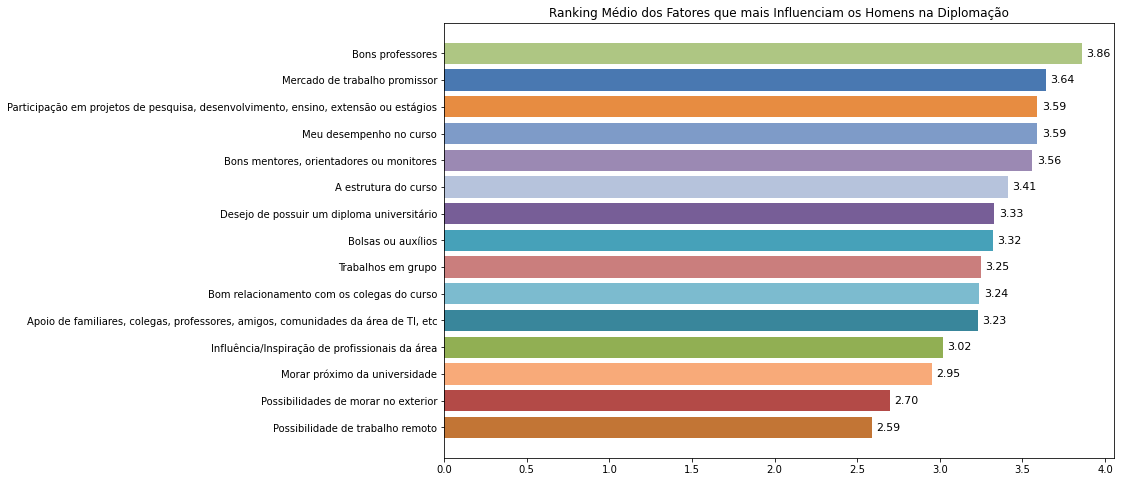

In [202]:
plotGraficoMediaRanking("Ranking Médio dos Fatores que mais Influenciam os Homens na Diplomação", 8, 12,
                        df_importancia_homens['Descrição'].values, df_importancia_homens['mean'].values, 
                        df_importancia_homens['mean'].values)

## RT x CG x outras

### Rio Tinto

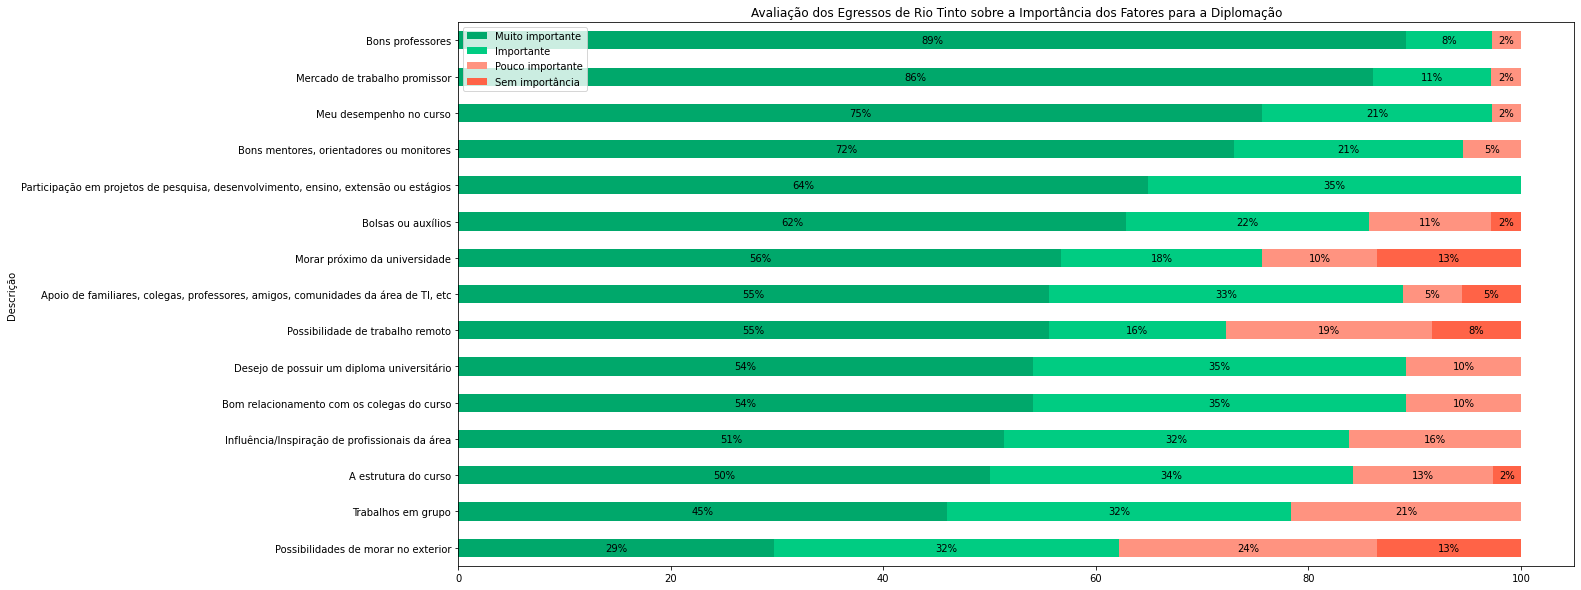

In [203]:
## MUITO IMPORTANTE
importancia_rt = pd.DataFrame({"Descrição": ["A estrutura do curso",
                                "Morar próximo da universidade", 
                                "Bom relacionamento com os colegas do curso", 
                                "Bons mentores, orientadores ou monitores", 
                                "Bons professores", 
                                "Trabalhos em grupo",
                                "Meu desempenho no curso", 
                                "Participação em projetos de pesquisa, desenvolvimento, ensino, extensão ou estágios", 
                                "Bolsas ou auxílios", 
                                "Desejo de possuir um diploma universitário", 
                                "Influência/Inspiração de profissionais da área",
                                "Possibilidades de morar no exterior",
                                "Mercado de trabalho promissor",
                                "Possibilidade de trabalho remoto",
                                "Apoio de familiares, colegas, professores, amigos, comunidades da área de TI, etc"],
                               "Muito importante": [df.query("IMP_INFRAESTRUTURA == 4").query("CID_UNIV == 'Rio Tinto'")["IMP_INFRAESTRUTURA"].value_counts().to_frame().reset_index().iloc[0].IMP_INFRAESTRUTURA, 
                                              df.query("IMP_MORAR_PROXIMO == 4").query("CID_UNIV == 'Rio Tinto'")["IMP_MORAR_PROXIMO"].value_counts().to_frame().reset_index().iloc[0].IMP_MORAR_PROXIMO, 
                                              df.query("IMP_NETWORK == 4").query("CID_UNIV == 'Rio Tinto'")["IMP_NETWORK"].value_counts().to_frame().reset_index().iloc[0].IMP_NETWORK,
                                              df.query("IMP_BONS_MENTORES == 4").query("CID_UNIV == 'Rio Tinto'")["IMP_BONS_MENTORES"].value_counts().to_frame().reset_index().iloc[0].IMP_BONS_MENTORES,
                                              df.query("IMP_BONS_PROFS == 4").query("CID_UNIV == 'Rio Tinto'")["IMP_BONS_PROFS"].value_counts().to_frame().reset_index().iloc[0].IMP_BONS_PROFS,
                                              df.query("IMP_TRAB_GRUPO == 4").query("CID_UNIV == 'Rio Tinto'")["IMP_TRAB_GRUPO"].value_counts().to_frame().reset_index().iloc[0].IMP_TRAB_GRUPO, 
                                              df.query("IMP_DESEMPENHO == 4").query("CID_UNIV == 'Rio Tinto'")["IMP_DESEMPENHO"].value_counts().to_frame().reset_index().iloc[0].IMP_DESEMPENHO,
                                              df.query("IMP_PART_PROJETO == 4").query("CID_UNIV == 'Rio Tinto'")["IMP_PART_PROJETO"].value_counts().to_frame().reset_index().iloc[0].IMP_PART_PROJETO,
                                              df.query("IMP_AUX_FIN == 4").query("CID_UNIV == 'Rio Tinto'")["IMP_AUX_FIN"].value_counts().to_frame().reset_index().iloc[0].IMP_AUX_FIN,
                                              df.query("IMP_DIPLOMA == 4").query("CID_UNIV == 'Rio Tinto'")["IMP_DIPLOMA"].value_counts().to_frame().reset_index().iloc[0].IMP_DIPLOMA, 
                                              df.query("IMP_INF_DE_OUTOS_PROFISSIONAIS == 4").query("CID_UNIV == 'Rio Tinto'")["IMP_INF_DE_OUTOS_PROFISSIONAIS"].value_counts().to_frame().reset_index().iloc[0].IMP_INF_DE_OUTOS_PROFISSIONAIS,
                                              df.query("IMP_MORAR_NO_EXTERIOR == 4").query("CID_UNIV == 'Rio Tinto'")["IMP_MORAR_NO_EXTERIOR"].value_counts().to_frame().reset_index().iloc[0].IMP_MORAR_NO_EXTERIOR,
                                              df.query("IMP_MERC_PROMISSOR == 4").query("CID_UNIV == 'Rio Tinto'")["IMP_MERC_PROMISSOR"].value_counts().to_frame().reset_index().iloc[0].IMP_MERC_PROMISSOR,
                                              df.query("IMP_TRAB_REMOTO == 4").query("CID_UNIV == 'Rio Tinto'")["IMP_TRAB_REMOTO"].value_counts().to_frame().reset_index().iloc[0].IMP_TRAB_REMOTO,
                                              df.query("IMP_APOIO == 4").query("CID_UNIV == 'Rio Tinto'")["IMP_APOIO"].value_counts().to_frame().reset_index().iloc[0].IMP_APOIO],
                               "Importante": [df.query("IMP_INFRAESTRUTURA == 3").query("CID_UNIV == 'Rio Tinto'")["IMP_INFRAESTRUTURA"].value_counts().to_frame().reset_index().iloc[0].IMP_INFRAESTRUTURA, 
                                              df.query("IMP_MORAR_PROXIMO == 3").query("CID_UNIV == 'Rio Tinto'")["IMP_MORAR_PROXIMO"].value_counts().to_frame().reset_index().iloc[0].IMP_MORAR_PROXIMO, 
                                              df.query("IMP_NETWORK == 3").query("CID_UNIV == 'Rio Tinto'")["IMP_NETWORK"].value_counts().to_frame().reset_index().iloc[0].IMP_NETWORK,
                                              df.query("IMP_BONS_MENTORES == 3").query("CID_UNIV == 'Rio Tinto'")["IMP_BONS_MENTORES"].value_counts().to_frame().reset_index().iloc[0].IMP_BONS_MENTORES,
                                              df.query("IMP_BONS_PROFS == 3").query("CID_UNIV == 'Rio Tinto'")["IMP_BONS_PROFS"].value_counts().to_frame().reset_index().iloc[0].IMP_BONS_PROFS,
                                              df.query("IMP_TRAB_GRUPO == 3").query("CID_UNIV == 'Rio Tinto'")["IMP_TRAB_GRUPO"].value_counts().to_frame().reset_index().iloc[0].IMP_TRAB_GRUPO, 
                                              df.query("IMP_DESEMPENHO == 3").query("CID_UNIV == 'Rio Tinto'")["IMP_DESEMPENHO"].value_counts().to_frame().reset_index().iloc[0].IMP_DESEMPENHO,
                                              df.query("IMP_PART_PROJETO == 3").query("CID_UNIV == 'Rio Tinto'")["IMP_PART_PROJETO"].value_counts().to_frame().reset_index().iloc[0].IMP_PART_PROJETO,
                                              df.query("IMP_AUX_FIN == 3").query("CID_UNIV == 'Rio Tinto'")["IMP_AUX_FIN"].value_counts().to_frame().reset_index().iloc[0].IMP_AUX_FIN,
                                              df.query("IMP_DIPLOMA == 3").query("CID_UNIV == 'Rio Tinto'")["IMP_DIPLOMA"].value_counts().to_frame().reset_index().iloc[0].IMP_DIPLOMA, 
                                              df.query("IMP_INF_DE_OUTOS_PROFISSIONAIS == 3").query("CID_UNIV == 'Rio Tinto'")["IMP_INF_DE_OUTOS_PROFISSIONAIS"].value_counts().to_frame().reset_index().iloc[0].IMP_INF_DE_OUTOS_PROFISSIONAIS,
                                              df.query("IMP_MORAR_NO_EXTERIOR == 3").query("CID_UNIV == 'Rio Tinto'")["IMP_MORAR_NO_EXTERIOR"].value_counts().to_frame().reset_index().iloc[0].IMP_MORAR_NO_EXTERIOR,
                                              df.query("IMP_MERC_PROMISSOR == 3").query("CID_UNIV == 'Rio Tinto'")["IMP_MERC_PROMISSOR"].value_counts().to_frame().reset_index().iloc[0].IMP_MERC_PROMISSOR,
                                              df.query("IMP_TRAB_REMOTO == 3").query("CID_UNIV == 'Rio Tinto'")["IMP_TRAB_REMOTO"].value_counts().to_frame().reset_index().iloc[0].IMP_TRAB_REMOTO,
                                              df.query("IMP_APOIO == 3").query("CID_UNIV == 'Rio Tinto'")["IMP_APOIO"].value_counts().to_frame().reset_index().iloc[0].IMP_APOIO], 
                               "Pouco importante": [df.query("IMP_INFRAESTRUTURA == 2").query("CID_UNIV == 'Rio Tinto'")["IMP_INFRAESTRUTURA"].value_counts().to_frame().reset_index().iloc[0].IMP_INFRAESTRUTURA, 
                                              df.query("IMP_MORAR_PROXIMO == 2").query("CID_UNIV == 'Rio Tinto'")["IMP_MORAR_PROXIMO"].value_counts().to_frame().reset_index().iloc[0].IMP_MORAR_PROXIMO, 
                                              df.query("IMP_NETWORK == 2").query("CID_UNIV == 'Rio Tinto'")["IMP_NETWORK"].value_counts().to_frame().reset_index().iloc[0].IMP_NETWORK,
                                              df.query("IMP_BONS_MENTORES == 2").query("CID_UNIV == 'Rio Tinto'")["IMP_BONS_MENTORES"].value_counts().to_frame().reset_index().iloc[0].IMP_BONS_MENTORES,
                                              df.query("IMP_BONS_PROFS == 2").query("CID_UNIV == 'Rio Tinto'")["IMP_BONS_PROFS"].value_counts().to_frame().reset_index().iloc[0].IMP_BONS_PROFS,
                                              df.query("IMP_TRAB_GRUPO == 2").query("CID_UNIV == 'Rio Tinto'")["IMP_TRAB_GRUPO"].value_counts().to_frame().reset_index().iloc[0].IMP_TRAB_GRUPO, 
                                              df.query("IMP_DESEMPENHO == 2").query("CID_UNIV == 'Rio Tinto'")["IMP_DESEMPENHO"].value_counts().to_frame().reset_index().iloc[0].IMP_DESEMPENHO,
                                              
                                              0,

                                              df.query("IMP_AUX_FIN == 2").query("CID_UNIV == 'Rio Tinto'")["IMP_AUX_FIN"].value_counts().to_frame().reset_index().iloc[0].IMP_AUX_FIN,
                                              df.query("IMP_DIPLOMA == 2").query("CID_UNIV == 'Rio Tinto'")["IMP_DIPLOMA"].value_counts().to_frame().reset_index().iloc[0].IMP_DIPLOMA, 
                                              df.query("IMP_INF_DE_OUTOS_PROFISSIONAIS == 2").query("CID_UNIV == 'Rio Tinto'")["IMP_INF_DE_OUTOS_PROFISSIONAIS"].value_counts().to_frame().reset_index().iloc[0].IMP_INF_DE_OUTOS_PROFISSIONAIS,
                                              df.query("IMP_MORAR_NO_EXTERIOR == 2").query("CID_UNIV == 'Rio Tinto'")["IMP_MORAR_NO_EXTERIOR"].value_counts().to_frame().reset_index().iloc[0].IMP_MORAR_NO_EXTERIOR,
                                              df.query("IMP_MERC_PROMISSOR == 2").query("CID_UNIV == 'Rio Tinto'")["IMP_MERC_PROMISSOR"].value_counts().to_frame().reset_index().iloc[0].IMP_MERC_PROMISSOR,
                                              df.query("IMP_TRAB_REMOTO == 2").query("CID_UNIV == 'Rio Tinto'")["IMP_TRAB_REMOTO"].value_counts().to_frame().reset_index().iloc[0].IMP_TRAB_REMOTO,
                                              df.query("IMP_APOIO == 2").query("CID_UNIV == 'Rio Tinto'")["IMP_APOIO"].value_counts().to_frame().reset_index().iloc[0].IMP_APOIO], 
                                "Sem importância": [df.query("IMP_INFRAESTRUTURA == 1").query("CID_UNIV == 'Rio Tinto'")["IMP_INFRAESTRUTURA"].value_counts().to_frame().reset_index().iloc[0].IMP_INFRAESTRUTURA, 
                                              df.query("IMP_MORAR_PROXIMO == 1").query("CID_UNIV == 'Rio Tinto'")["IMP_MORAR_PROXIMO"].value_counts().to_frame().reset_index().iloc[0].IMP_MORAR_PROXIMO, 
                                              
                                              0,
                                              0,
                                              0,
                                              0, 
                                              0,
                                              0,
                                              
                                              df.query("IMP_AUX_FIN == 1").query("CID_UNIV == 'Rio Tinto'")["IMP_AUX_FIN"].value_counts().to_frame().reset_index().iloc[0].IMP_AUX_FIN,
                                              
                                              0, 
                                              0,

                                              df.query("IMP_MORAR_NO_EXTERIOR == 1").query("CID_UNIV == 'Rio Tinto'")["IMP_MORAR_NO_EXTERIOR"].value_counts().to_frame().reset_index().iloc[0].IMP_MORAR_NO_EXTERIOR,

                                              0,

                                              df.query("IMP_TRAB_REMOTO == 1").query("CID_UNIV == 'Rio Tinto'")["IMP_TRAB_REMOTO"].value_counts().to_frame().reset_index().iloc[0].IMP_TRAB_REMOTO,
                                              df.query("IMP_APOIO == 1").query("CID_UNIV == 'Rio Tinto'")["IMP_APOIO"].value_counts().to_frame().reset_index().iloc[0].IMP_APOIO]
                               })

#importancia_geral["Soma_Mais"] = (importancia_geral["Importante"] + importancia_geral["Muito importante"])

plot_barh_empilhado(importancia_rt.sort_values(by=['Muito importante'], ascending=True), 'Descrição', 'Avaliação dos Egressos de Rio Tinto sobre a Importância dos Fatores para a Diplomação', 20, 10, 'importancia')

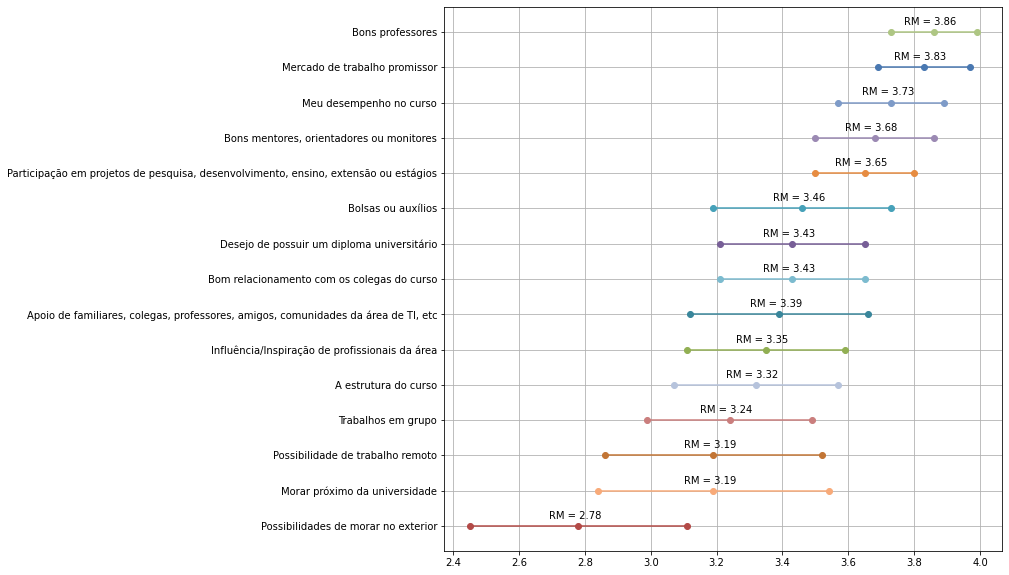

In [204]:
df_rt = df.query("CID_UNIV == 'Rio Tinto'")

df_importancia_rt = pd.DataFrame({
    'Descrição': importancia_rt['Descrição'],
    'mean': [
        mediaRanking(df_rt.query("IMP_INFRAESTRUTURA != 0")['IMP_INFRAESTRUTURA'].values.tolist()),
        mediaRanking(df_rt.query("IMP_MORAR_PROXIMO != 0")['IMP_MORAR_PROXIMO'].values.tolist()),
        mediaRanking(df_rt.query("IMP_NETWORK != 0")['IMP_NETWORK'].values.tolist()),
        mediaRanking(df_rt.query("IMP_BONS_MENTORES != 0")['IMP_BONS_MENTORES'].values.tolist()),
        mediaRanking(df_rt.query("IMP_BONS_PROFS != 0")['IMP_BONS_PROFS'].values.tolist()),
        mediaRanking(df_rt.query("IMP_TRAB_GRUPO != 0")['IMP_TRAB_GRUPO'].values.tolist()),
        mediaRanking(df_rt.query("IMP_DESEMPENHO != 0")['IMP_DESEMPENHO'].values.tolist()),
        mediaRanking(df_rt.query("IMP_PART_PROJETO != 0")['IMP_PART_PROJETO'].values.tolist()),
        mediaRanking(df_rt.query("IMP_AUX_FIN != 0")['IMP_AUX_FIN'].values.tolist()),
        mediaRanking(df_rt.query("IMP_DIPLOMA != 0")['IMP_DIPLOMA'].values.tolist()),
        mediaRanking(df_rt.query("IMP_INF_DE_OUTOS_PROFISSIONAIS != 0")['IMP_INF_DE_OUTOS_PROFISSIONAIS'].values.tolist()),
        mediaRanking(df_rt.query("IMP_MORAR_NO_EXTERIOR != 0")['IMP_MORAR_NO_EXTERIOR'].values.tolist()),
        mediaRanking(df_rt.query("IMP_MERC_PROMISSOR != 0")['IMP_MERC_PROMISSOR'].values.tolist()),
        mediaRanking(df_rt.query("IMP_TRAB_REMOTO != 0")['IMP_TRAB_REMOTO'].values.tolist()),
        mediaRanking(df_rt.query("IMP_APOIO != 0")['IMP_APOIO'].values.tolist())
        ],
    'top_confidence_interval': [
        intervalo_de_confianca(df_rt.query("IMP_INFRAESTRUTURA != 0")['IMP_INFRAESTRUTURA'].values.tolist())[0],
        intervalo_de_confianca(df_rt.query("IMP_MORAR_PROXIMO != 0")['IMP_MORAR_PROXIMO'].values.tolist())[0],
        intervalo_de_confianca(df_rt.query("IMP_NETWORK != 0")['IMP_NETWORK'].values.tolist())[0],
        intervalo_de_confianca(df_rt.query("IMP_BONS_MENTORES != 0")['IMP_BONS_MENTORES'].values.tolist())[0],
        intervalo_de_confianca(df_rt.query("IMP_BONS_PROFS != 0")['IMP_BONS_PROFS'].values.tolist())[0],
        intervalo_de_confianca(df_rt.query("IMP_TRAB_GRUPO != 0")['IMP_TRAB_GRUPO'].values.tolist())[0],
        intervalo_de_confianca(df_rt.query("IMP_DESEMPENHO != 0")['IMP_DESEMPENHO'].values.tolist())[0],
        intervalo_de_confianca(df_rt.query("IMP_PART_PROJETO != 0")['IMP_PART_PROJETO'].values.tolist())[0],
        intervalo_de_confianca(df_rt.query("IMP_AUX_FIN != 0")['IMP_AUX_FIN'].values.tolist())[0],
        intervalo_de_confianca(df_rt.query("IMP_DIPLOMA != 0")['IMP_DIPLOMA'].values.tolist())[0],
        intervalo_de_confianca(df_rt.query("IMP_INF_DE_OUTOS_PROFISSIONAIS != 0")['IMP_INF_DE_OUTOS_PROFISSIONAIS'].values.tolist())[0],
        intervalo_de_confianca(df_rt.query("IMP_MORAR_NO_EXTERIOR != 0")['IMP_MORAR_NO_EXTERIOR'].values.tolist())[0],
        intervalo_de_confianca(df_rt.query("IMP_MERC_PROMISSOR != 0")['IMP_MERC_PROMISSOR'].values.tolist())[0],
        intervalo_de_confianca(df_rt.query("IMP_TRAB_REMOTO != 0")['IMP_TRAB_REMOTO'].values.tolist())[0],
        intervalo_de_confianca(df_rt.query("IMP_APOIO != 0")['IMP_APOIO'].values.tolist())[0]
    ],
    'bottom_confidence_interval': [
        intervalo_de_confianca(df_rt.query("IMP_INFRAESTRUTURA != 0")['IMP_INFRAESTRUTURA'].values.tolist())[1],
        intervalo_de_confianca(df_rt.query("IMP_MORAR_PROXIMO != 0")['IMP_MORAR_PROXIMO'].values.tolist())[1],
        intervalo_de_confianca(df_rt.query("IMP_NETWORK != 0")['IMP_NETWORK'].values.tolist())[1],
        intervalo_de_confianca(df_rt.query("IMP_BONS_MENTORES != 0")['IMP_BONS_MENTORES'].values.tolist())[1],
        intervalo_de_confianca(df_rt.query("IMP_BONS_PROFS != 0")['IMP_BONS_PROFS'].values.tolist())[1],
        intervalo_de_confianca(df_rt.query("IMP_TRAB_GRUPO != 0")['IMP_TRAB_GRUPO'].values.tolist())[1],
        intervalo_de_confianca(df_rt.query("IMP_DESEMPENHO != 0")['IMP_DESEMPENHO'].values.tolist())[1],
        intervalo_de_confianca(df_rt.query("IMP_PART_PROJETO != 0")['IMP_PART_PROJETO'].values.tolist())[1],
        intervalo_de_confianca(df_rt.query("IMP_AUX_FIN != 0")['IMP_AUX_FIN'].values.tolist())[1],
        intervalo_de_confianca(df_rt.query("IMP_DIPLOMA != 0")['IMP_DIPLOMA'].values.tolist())[1],
        intervalo_de_confianca(df_rt.query("IMP_INF_DE_OUTOS_PROFISSIONAIS != 0")['IMP_INF_DE_OUTOS_PROFISSIONAIS'].values.tolist())[1],
        intervalo_de_confianca(df_rt.query("IMP_MORAR_NO_EXTERIOR != 0")['IMP_MORAR_NO_EXTERIOR'].values.tolist())[1],
        intervalo_de_confianca(df_rt.query("IMP_MERC_PROMISSOR != 0")['IMP_MERC_PROMISSOR'].values.tolist())[1],
        intervalo_de_confianca(df_rt.query("IMP_TRAB_REMOTO != 0")['IMP_TRAB_REMOTO'].values.tolist())[1],
        intervalo_de_confianca(df_rt.query("IMP_APOIO != 0")['IMP_APOIO'].values.tolist())[1]
    ]
})

df_importancia_rt.sort_values(by=['mean'], ascending=True, ignore_index=True, inplace=True)

#https://stackoverflow.com/questions/59747313/how-can-i-plot-a-confidence-interval-in-python
plot_grafico_intervalo_de_confianca(df_importancia_rt)

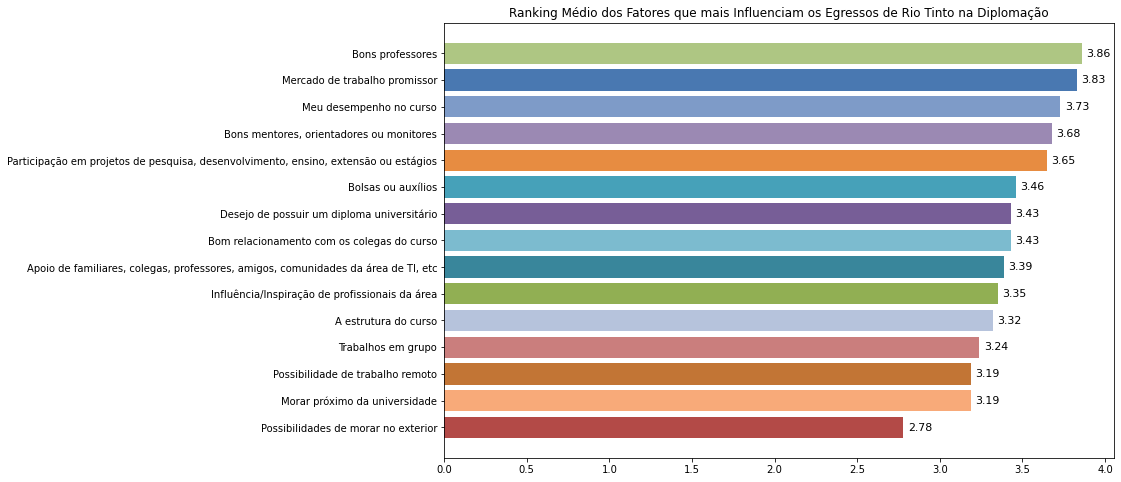

In [205]:
plotGraficoMediaRanking("Ranking Médio dos Fatores que mais Influenciam os Egressos de Rio Tinto na Diplomação", 8, 12, 
                        df_importancia_rt['Descrição'].values, df_importancia_rt['mean'].values, 
                        df_importancia_rt['mean'].values)

### Campina Grande

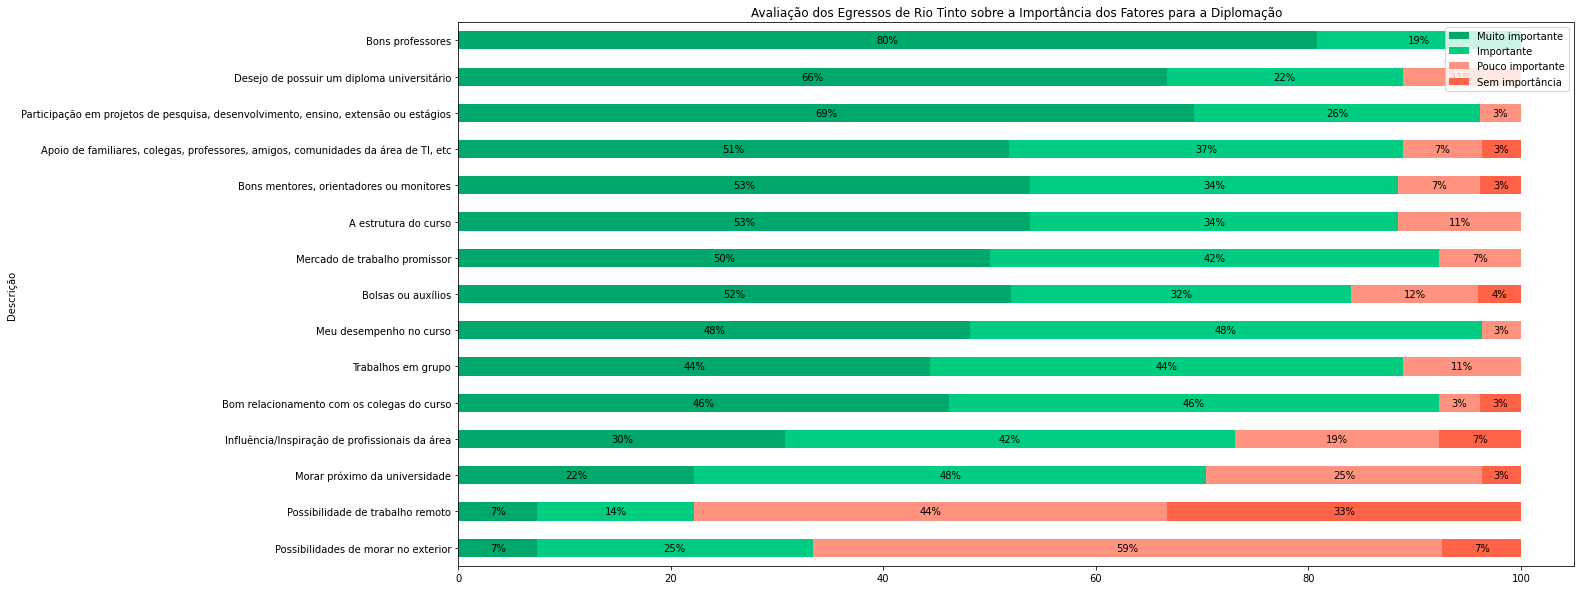

In [206]:
## MUITO IMPORTANTE
importancia_cg = pd.DataFrame({"Descrição": ["A estrutura do curso",
                                "Morar próximo da universidade", 
                                "Bom relacionamento com os colegas do curso", 
                                "Bons mentores, orientadores ou monitores", 
                                "Bons professores", 
                                "Trabalhos em grupo",
                                "Meu desempenho no curso", 
                                "Participação em projetos de pesquisa, desenvolvimento, ensino, extensão ou estágios", 
                                "Bolsas ou auxílios", 
                                "Desejo de possuir um diploma universitário", 
                                "Influência/Inspiração de profissionais da área",
                                "Possibilidades de morar no exterior",
                                "Mercado de trabalho promissor",
                                "Possibilidade de trabalho remoto",
                                "Apoio de familiares, colegas, professores, amigos, comunidades da área de TI, etc"],
                               "Muito importante": [df.query("IMP_INFRAESTRUTURA == 4").query("CID_UNIV == 'Campina Grande'")["IMP_INFRAESTRUTURA"].value_counts().to_frame().reset_index().iloc[0].IMP_INFRAESTRUTURA, 
                                              df.query("IMP_MORAR_PROXIMO == 4").query("CID_UNIV == 'Campina Grande'")["IMP_MORAR_PROXIMO"].value_counts().to_frame().reset_index().iloc[0].IMP_MORAR_PROXIMO, 
                                              df.query("IMP_NETWORK == 4").query("CID_UNIV == 'Campina Grande'")["IMP_NETWORK"].value_counts().to_frame().reset_index().iloc[0].IMP_NETWORK,
                                              df.query("IMP_BONS_MENTORES == 4").query("CID_UNIV == 'Campina Grande'")["IMP_BONS_MENTORES"].value_counts().to_frame().reset_index().iloc[0].IMP_BONS_MENTORES,
                                              df.query("IMP_BONS_PROFS == 4").query("CID_UNIV == 'Campina Grande'")["IMP_BONS_PROFS"].value_counts().to_frame().reset_index().iloc[0].IMP_BONS_PROFS,
                                              df.query("IMP_TRAB_GRUPO == 4").query("CID_UNIV == 'Campina Grande'")["IMP_TRAB_GRUPO"].value_counts().to_frame().reset_index().iloc[0].IMP_TRAB_GRUPO, 
                                              df.query("IMP_DESEMPENHO == 4").query("CID_UNIV == 'Campina Grande'")["IMP_DESEMPENHO"].value_counts().to_frame().reset_index().iloc[0].IMP_DESEMPENHO,
                                              df.query("IMP_PART_PROJETO == 4").query("CID_UNIV == 'Campina Grande'")["IMP_PART_PROJETO"].value_counts().to_frame().reset_index().iloc[0].IMP_PART_PROJETO,
                                              df.query("IMP_AUX_FIN == 4").query("CID_UNIV == 'Campina Grande'")["IMP_AUX_FIN"].value_counts().to_frame().reset_index().iloc[0].IMP_AUX_FIN,
                                              df.query("IMP_DIPLOMA == 4").query("CID_UNIV == 'Campina Grande'")["IMP_DIPLOMA"].value_counts().to_frame().reset_index().iloc[0].IMP_DIPLOMA, 
                                              df.query("IMP_INF_DE_OUTOS_PROFISSIONAIS == 4").query("CID_UNIV == 'Campina Grande'")["IMP_INF_DE_OUTOS_PROFISSIONAIS"].value_counts().to_frame().reset_index().iloc[0].IMP_INF_DE_OUTOS_PROFISSIONAIS,
                                              df.query("IMP_MORAR_NO_EXTERIOR == 4").query("CID_UNIV == 'Campina Grande'")["IMP_MORAR_NO_EXTERIOR"].value_counts().to_frame().reset_index().iloc[0].IMP_MORAR_NO_EXTERIOR,
                                              df.query("IMP_MERC_PROMISSOR == 4").query("CID_UNIV == 'Campina Grande'")["IMP_MERC_PROMISSOR"].value_counts().to_frame().reset_index().iloc[0].IMP_MERC_PROMISSOR,
                                              df.query("IMP_TRAB_REMOTO == 4").query("CID_UNIV == 'Campina Grande'")["IMP_TRAB_REMOTO"].value_counts().to_frame().reset_index().iloc[0].IMP_TRAB_REMOTO,
                                              df.query("IMP_APOIO == 4").query("CID_UNIV == 'Campina Grande'")["IMP_APOIO"].value_counts().to_frame().reset_index().iloc[0].IMP_APOIO],
                                "Importante": [df.query("IMP_INFRAESTRUTURA == 3").query("CID_UNIV == 'Campina Grande'")["IMP_INFRAESTRUTURA"].value_counts().to_frame().reset_index().iloc[0].IMP_INFRAESTRUTURA, 
                                              df.query("IMP_MORAR_PROXIMO == 3").query("CID_UNIV == 'Campina Grande'")["IMP_MORAR_PROXIMO"].value_counts().to_frame().reset_index().iloc[0].IMP_MORAR_PROXIMO, 
                                              df.query("IMP_NETWORK == 3").query("CID_UNIV == 'Campina Grande'")["IMP_NETWORK"].value_counts().to_frame().reset_index().iloc[0].IMP_NETWORK,
                                              df.query("IMP_BONS_MENTORES == 3").query("CID_UNIV == 'Campina Grande'")["IMP_BONS_MENTORES"].value_counts().to_frame().reset_index().iloc[0].IMP_BONS_MENTORES,
                                              df.query("IMP_BONS_PROFS == 3").query("CID_UNIV == 'Campina Grande'")["IMP_BONS_PROFS"].value_counts().to_frame().reset_index().iloc[0].IMP_BONS_PROFS,
                                              df.query("IMP_TRAB_GRUPO == 3").query("CID_UNIV == 'Campina Grande'")["IMP_TRAB_GRUPO"].value_counts().to_frame().reset_index().iloc[0].IMP_TRAB_GRUPO, 
                                              df.query("IMP_DESEMPENHO == 3").query("CID_UNIV == 'Campina Grande'")["IMP_DESEMPENHO"].value_counts().to_frame().reset_index().iloc[0].IMP_DESEMPENHO,
                                              df.query("IMP_PART_PROJETO == 3").query("CID_UNIV == 'Campina Grande'")["IMP_PART_PROJETO"].value_counts().to_frame().reset_index().iloc[0].IMP_PART_PROJETO,
                                              df.query("IMP_AUX_FIN == 3").query("CID_UNIV == 'Campina Grande'")["IMP_AUX_FIN"].value_counts().to_frame().reset_index().iloc[0].IMP_AUX_FIN,
                                              df.query("IMP_DIPLOMA == 3").query("CID_UNIV == 'Campina Grande'")["IMP_DIPLOMA"].value_counts().to_frame().reset_index().iloc[0].IMP_DIPLOMA, 
                                              df.query("IMP_INF_DE_OUTOS_PROFISSIONAIS == 3").query("CID_UNIV == 'Campina Grande'")["IMP_INF_DE_OUTOS_PROFISSIONAIS"].value_counts().to_frame().reset_index().iloc[0].IMP_INF_DE_OUTOS_PROFISSIONAIS,
                                              df.query("IMP_MORAR_NO_EXTERIOR == 3").query("CID_UNIV == 'Campina Grande'")["IMP_MORAR_NO_EXTERIOR"].value_counts().to_frame().reset_index().iloc[0].IMP_MORAR_NO_EXTERIOR,
                                              df.query("IMP_MERC_PROMISSOR == 3").query("CID_UNIV == 'Campina Grande'")["IMP_MERC_PROMISSOR"].value_counts().to_frame().reset_index().iloc[0].IMP_MERC_PROMISSOR,
                                              df.query("IMP_TRAB_REMOTO == 3").query("CID_UNIV == 'Campina Grande'")["IMP_TRAB_REMOTO"].value_counts().to_frame().reset_index().iloc[0].IMP_TRAB_REMOTO,
                                              df.query("IMP_APOIO == 3").query("CID_UNIV == 'Campina Grande'")["IMP_APOIO"].value_counts().to_frame().reset_index().iloc[0].IMP_APOIO], 
                               "Pouco importante": [df.query("IMP_INFRAESTRUTURA == 2").query("CID_UNIV == 'Campina Grande'")["IMP_INFRAESTRUTURA"].value_counts().to_frame().reset_index().iloc[0].IMP_INFRAESTRUTURA, 
                                              df.query("IMP_MORAR_PROXIMO == 2").query("CID_UNIV == 'Campina Grande'")["IMP_MORAR_PROXIMO"].value_counts().to_frame().reset_index().iloc[0].IMP_MORAR_PROXIMO, 
                                              df.query("IMP_NETWORK == 2").query("CID_UNIV == 'Campina Grande'")["IMP_NETWORK"].value_counts().to_frame().reset_index().iloc[0].IMP_NETWORK,
                                              df.query("IMP_BONS_MENTORES == 2").query("CID_UNIV == 'Campina Grande'")["IMP_BONS_MENTORES"].value_counts().to_frame().reset_index().iloc[0].IMP_BONS_MENTORES,

                                              0,

                                              df.query("IMP_TRAB_GRUPO == 2").query("CID_UNIV == 'Campina Grande'")["IMP_TRAB_GRUPO"].value_counts().to_frame().reset_index().iloc[0].IMP_TRAB_GRUPO, 
                                              df.query("IMP_DESEMPENHO == 2").query("CID_UNIV == 'Campina Grande'")["IMP_DESEMPENHO"].value_counts().to_frame().reset_index().iloc[0].IMP_DESEMPENHO,
                                              df.query("IMP_PART_PROJETO == 2").query("CID_UNIV == 'Campina Grande'")["IMP_PART_PROJETO"].value_counts().to_frame().reset_index().iloc[0].IMP_PART_PROJETO,
                                              df.query("IMP_AUX_FIN == 2").query("CID_UNIV == 'Campina Grande'")["IMP_AUX_FIN"].value_counts().to_frame().reset_index().iloc[0].IMP_AUX_FIN,
                                              df.query("IMP_DIPLOMA == 2").query("CID_UNIV == 'Campina Grande'")["IMP_DIPLOMA"].value_counts().to_frame().reset_index().iloc[0].IMP_DIPLOMA, 
                                              df.query("IMP_INF_DE_OUTOS_PROFISSIONAIS == 2").query("CID_UNIV == 'Campina Grande'")["IMP_INF_DE_OUTOS_PROFISSIONAIS"].value_counts().to_frame().reset_index().iloc[0].IMP_INF_DE_OUTOS_PROFISSIONAIS,
                                              df.query("IMP_MORAR_NO_EXTERIOR == 2").query("CID_UNIV == 'Campina Grande'")["IMP_MORAR_NO_EXTERIOR"].value_counts().to_frame().reset_index().iloc[0].IMP_MORAR_NO_EXTERIOR,
                                              df.query("IMP_MERC_PROMISSOR == 2").query("CID_UNIV == 'Campina Grande'")["IMP_MERC_PROMISSOR"].value_counts().to_frame().reset_index().iloc[0].IMP_MERC_PROMISSOR,
                                              df.query("IMP_TRAB_REMOTO == 2").query("CID_UNIV == 'Campina Grande'")["IMP_TRAB_REMOTO"].value_counts().to_frame().reset_index().iloc[0].IMP_TRAB_REMOTO,
                                              df.query("IMP_APOIO == 2").query("CID_UNIV == 'Campina Grande'")["IMP_APOIO"].value_counts().to_frame().reset_index().iloc[0].IMP_APOIO], 
                                "Sem importância": [0,
                                                     
                                              df.query("IMP_MORAR_PROXIMO == 1").query("CID_UNIV == 'Campina Grande'")["IMP_MORAR_PROXIMO"].value_counts().to_frame().reset_index().iloc[0].IMP_MORAR_PROXIMO, 
                                              df.query("IMP_NETWORK == 1").query("CID_UNIV == 'Campina Grande'")["IMP_NETWORK"].value_counts().to_frame().reset_index().iloc[0].IMP_NETWORK,
                                              df.query("IMP_BONS_MENTORES == 1").query("CID_UNIV == 'Campina Grande'")["IMP_BONS_MENTORES"].value_counts().to_frame().reset_index().iloc[0].IMP_BONS_MENTORES,
                                              
                                              0,
                                              0, 
                                              0,
                                              0,
                                              

                                              df.query("IMP_AUX_FIN == 1").query("CID_UNIV == 'Campina Grande'")["IMP_AUX_FIN"].value_counts().to_frame().reset_index().iloc[0].IMP_AUX_FIN,
                                              
                                              0, 
                                              df.query("IMP_INF_DE_OUTOS_PROFISSIONAIS == 1").query("CID_UNIV == 'Campina Grande'")["IMP_INF_DE_OUTOS_PROFISSIONAIS"].value_counts().to_frame().reset_index().iloc[0].IMP_INF_DE_OUTOS_PROFISSIONAIS,
                                              

                                              df.query("IMP_MORAR_NO_EXTERIOR == 1").query("CID_UNIV == 'Campina Grande'")["IMP_MORAR_NO_EXTERIOR"].value_counts().to_frame().reset_index().iloc[0].IMP_MORAR_NO_EXTERIOR,
                                              
                                              0,
                                              
                                              df.query("IMP_TRAB_REMOTO == 1").query("CID_UNIV == 'Campina Grande'")["IMP_TRAB_REMOTO"].value_counts().to_frame().reset_index().iloc[0].IMP_TRAB_REMOTO,
                                              df.query("IMP_APOIO == 1").query("CID_UNIV == 'Campina Grande'")["IMP_APOIO"].value_counts().to_frame().reset_index().iloc[0].IMP_APOIO]
                                  })

#importancia_geral["Soma_Mais"] = (importancia_geral["Importante"] + importancia_geral["Muito importante"])

plot_barh_empilhado(importancia_cg.sort_values(by=['Muito importante'], ascending=True), 'Descrição', 'Avaliação dos Egressos de Rio Tinto sobre a Importância dos Fatores para a Diplomação', 20, 10, 'importancia')

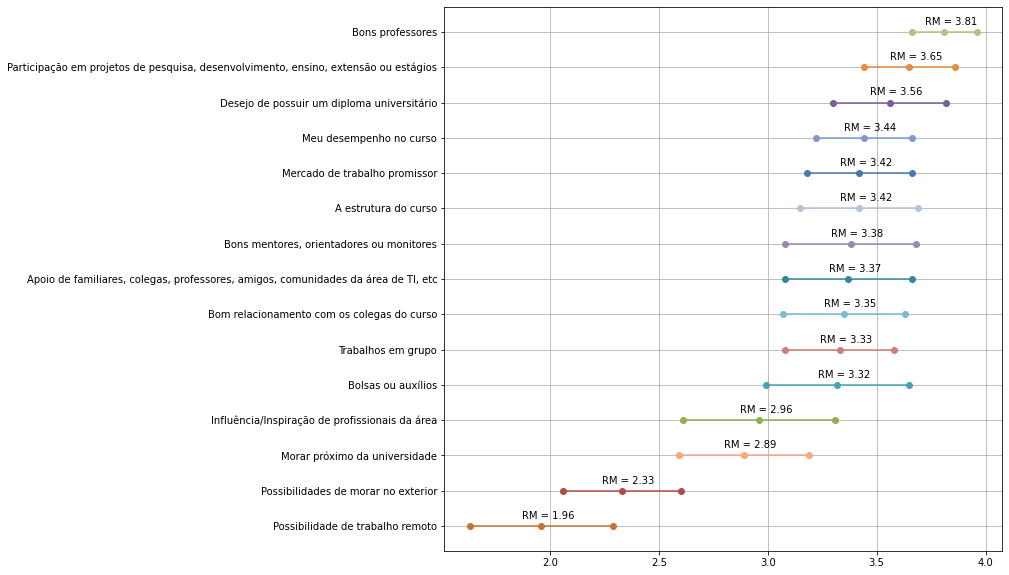

In [207]:
df_cg = df.query("CID_UNIV == 'Campina Grande'")

df_importancia_cg = pd.DataFrame({
    'Descrição': importancia_cg['Descrição'],
    'mean': [
        mediaRanking(df_cg.query("IMP_INFRAESTRUTURA != 0")['IMP_INFRAESTRUTURA'].values.tolist()),
        mediaRanking(df_cg.query("IMP_MORAR_PROXIMO != 0")['IMP_MORAR_PROXIMO'].values.tolist()),
        mediaRanking(df_cg.query("IMP_NETWORK != 0")['IMP_NETWORK'].values.tolist()),
        mediaRanking(df_cg.query("IMP_BONS_MENTORES != 0")['IMP_BONS_MENTORES'].values.tolist()),
        mediaRanking(df_cg.query("IMP_BONS_PROFS != 0")['IMP_BONS_PROFS'].values.tolist()),
        mediaRanking(df_cg.query("IMP_TRAB_GRUPO != 0")['IMP_TRAB_GRUPO'].values.tolist()),
        mediaRanking(df_cg.query("IMP_DESEMPENHO != 0")['IMP_DESEMPENHO'].values.tolist()),
        mediaRanking(df_cg.query("IMP_PART_PROJETO != 0")['IMP_PART_PROJETO'].values.tolist()),
        mediaRanking(df_cg.query("IMP_AUX_FIN != 0")['IMP_AUX_FIN'].values.tolist()),
        mediaRanking(df_cg.query("IMP_DIPLOMA != 0")['IMP_DIPLOMA'].values.tolist()),
        mediaRanking(df_cg.query("IMP_INF_DE_OUTOS_PROFISSIONAIS != 0")['IMP_INF_DE_OUTOS_PROFISSIONAIS'].values.tolist()),
        mediaRanking(df_cg.query("IMP_MORAR_NO_EXTERIOR != 0")['IMP_MORAR_NO_EXTERIOR'].values.tolist()),
        mediaRanking(df_cg.query("IMP_MERC_PROMISSOR != 0")['IMP_MERC_PROMISSOR'].values.tolist()),
        mediaRanking(df_cg.query("IMP_TRAB_REMOTO != 0")['IMP_TRAB_REMOTO'].values.tolist()),
        mediaRanking(df_cg.query("IMP_APOIO != 0")['IMP_APOIO'].values.tolist())
        ],
    'top_confidence_interval': [
        intervalo_de_confianca(df_cg.query("IMP_INFRAESTRUTURA != 0")['IMP_INFRAESTRUTURA'].values.tolist())[0],
        intervalo_de_confianca(df_cg.query("IMP_MORAR_PROXIMO != 0")['IMP_MORAR_PROXIMO'].values.tolist())[0],
        intervalo_de_confianca(df_cg.query("IMP_NETWORK != 0")['IMP_NETWORK'].values.tolist())[0],
        intervalo_de_confianca(df_cg.query("IMP_BONS_MENTORES != 0")['IMP_BONS_MENTORES'].values.tolist())[0],
        intervalo_de_confianca(df_cg.query("IMP_BONS_PROFS != 0")['IMP_BONS_PROFS'].values.tolist())[0],
        intervalo_de_confianca(df_cg.query("IMP_TRAB_GRUPO != 0")['IMP_TRAB_GRUPO'].values.tolist())[0],
        intervalo_de_confianca(df_cg.query("IMP_DESEMPENHO != 0")['IMP_DESEMPENHO'].values.tolist())[0],
        intervalo_de_confianca(df_cg.query("IMP_PART_PROJETO != 0")['IMP_PART_PROJETO'].values.tolist())[0],
        intervalo_de_confianca(df_cg.query("IMP_AUX_FIN != 0")['IMP_AUX_FIN'].values.tolist())[0],
        intervalo_de_confianca(df_cg.query("IMP_DIPLOMA != 0")['IMP_DIPLOMA'].values.tolist())[0],
        intervalo_de_confianca(df_cg.query("IMP_INF_DE_OUTOS_PROFISSIONAIS != 0")['IMP_INF_DE_OUTOS_PROFISSIONAIS'].values.tolist())[0],
        intervalo_de_confianca(df_cg.query("IMP_MORAR_NO_EXTERIOR != 0")['IMP_MORAR_NO_EXTERIOR'].values.tolist())[0],
        intervalo_de_confianca(df_cg.query("IMP_MERC_PROMISSOR != 0")['IMP_MERC_PROMISSOR'].values.tolist())[0],
        intervalo_de_confianca(df_cg.query("IMP_TRAB_REMOTO != 0")['IMP_TRAB_REMOTO'].values.tolist())[0],
        intervalo_de_confianca(df_cg.query("IMP_APOIO != 0")['IMP_APOIO'].values.tolist())[0]
    ],
    'bottom_confidence_interval': [
        intervalo_de_confianca(df_cg.query("IMP_INFRAESTRUTURA != 0")['IMP_INFRAESTRUTURA'].values.tolist())[1],
        intervalo_de_confianca(df_cg.query("IMP_MORAR_PROXIMO != 0")['IMP_MORAR_PROXIMO'].values.tolist())[1],
        intervalo_de_confianca(df_cg.query("IMP_NETWORK != 0")['IMP_NETWORK'].values.tolist())[1],
        intervalo_de_confianca(df_cg.query("IMP_BONS_MENTORES != 0")['IMP_BONS_MENTORES'].values.tolist())[1],
        intervalo_de_confianca(df_cg.query("IMP_BONS_PROFS != 0")['IMP_BONS_PROFS'].values.tolist())[1],
        intervalo_de_confianca(df_cg.query("IMP_TRAB_GRUPO != 0")['IMP_TRAB_GRUPO'].values.tolist())[1],
        intervalo_de_confianca(df_cg.query("IMP_DESEMPENHO != 0")['IMP_DESEMPENHO'].values.tolist())[1],
        intervalo_de_confianca(df_cg.query("IMP_PART_PROJETO != 0")['IMP_PART_PROJETO'].values.tolist())[1],
        intervalo_de_confianca(df_cg.query("IMP_AUX_FIN != 0")['IMP_AUX_FIN'].values.tolist())[1],
        intervalo_de_confianca(df_cg.query("IMP_DIPLOMA != 0")['IMP_DIPLOMA'].values.tolist())[1],
        intervalo_de_confianca(df_cg.query("IMP_INF_DE_OUTOS_PROFISSIONAIS != 0")['IMP_INF_DE_OUTOS_PROFISSIONAIS'].values.tolist())[1],
        intervalo_de_confianca(df_cg.query("IMP_MORAR_NO_EXTERIOR != 0")['IMP_MORAR_NO_EXTERIOR'].values.tolist())[1],
        intervalo_de_confianca(df_cg.query("IMP_MERC_PROMISSOR != 0")['IMP_MERC_PROMISSOR'].values.tolist())[1],
        intervalo_de_confianca(df_cg.query("IMP_TRAB_REMOTO != 0")['IMP_TRAB_REMOTO'].values.tolist())[1],
        intervalo_de_confianca(df_cg.query("IMP_APOIO != 0")['IMP_APOIO'].values.tolist())[1]
    ]
})

df_importancia_cg.sort_values(by=['mean'], ascending=True, ignore_index=True, inplace=True)

#https://stackoverflow.com/questions/59747313/how-can-i-plot-a-confidence-interval-in-python
plot_grafico_intervalo_de_confianca(df_importancia_cg)

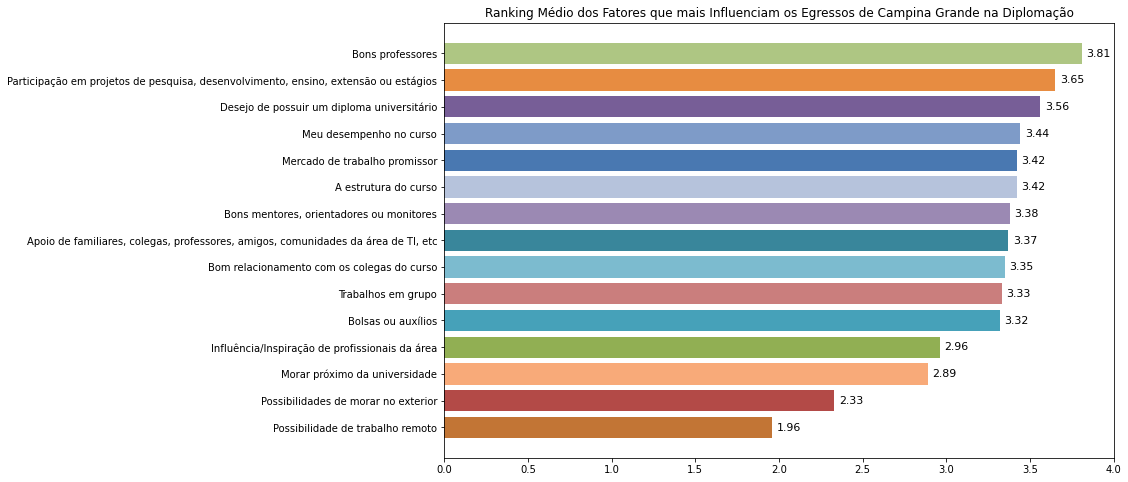

In [208]:
plotGraficoMediaRanking("Ranking Médio dos Fatores que mais Influenciam os Egressos de Campina Grande na Diplomação", 8, 12, 
                        df_importancia_cg['Descrição'].values, df_importancia_cg['mean'].values, 
                        df_importancia_cg['mean'].values)

### Outras localidades

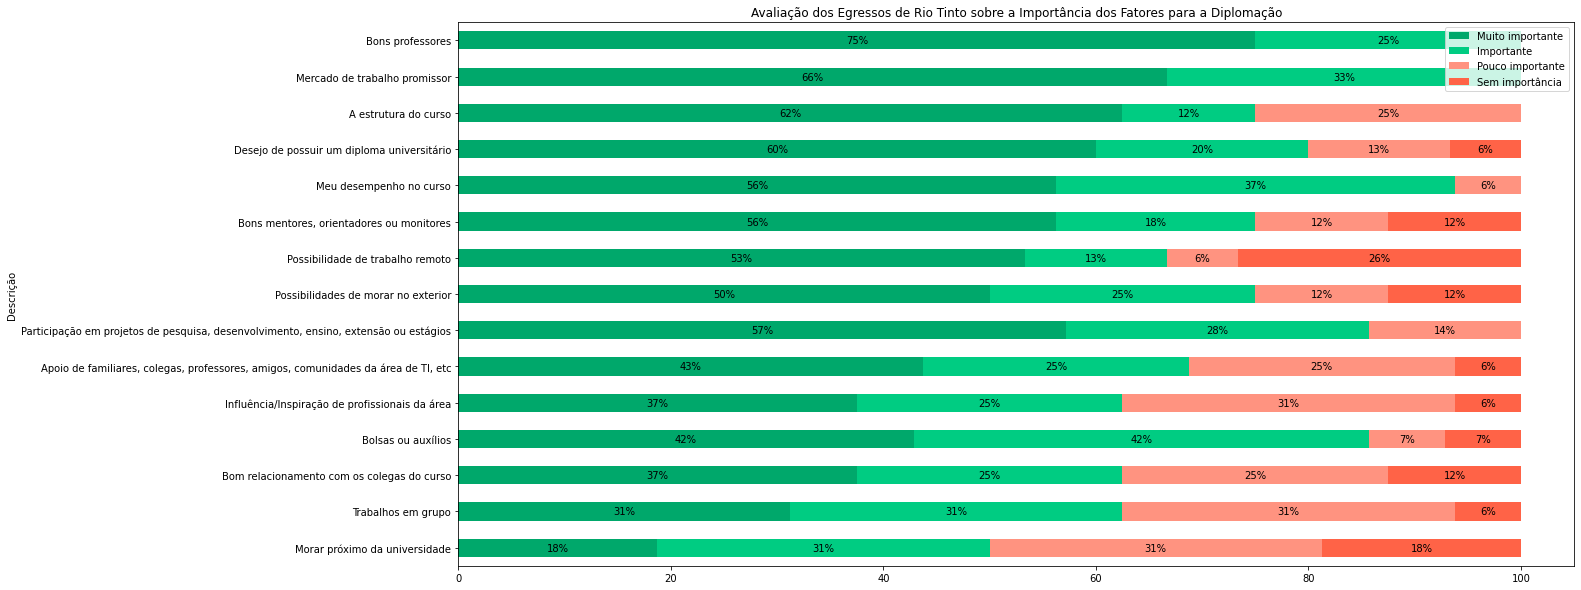

In [209]:
## MUITO IMPORTANTE
importancia_outros = pd.DataFrame({"Descrição": ["A estrutura do curso",
                                "Morar próximo da universidade", 
                                "Bom relacionamento com os colegas do curso", 
                                "Bons mentores, orientadores ou monitores", 
                                "Bons professores", 
                                "Trabalhos em grupo",
                                "Meu desempenho no curso", 
                                "Participação em projetos de pesquisa, desenvolvimento, ensino, extensão ou estágios", 
                                "Bolsas ou auxílios", 
                                "Desejo de possuir um diploma universitário", 
                                "Influência/Inspiração de profissionais da área",
                                "Possibilidades de morar no exterior",
                                "Mercado de trabalho promissor",
                                "Possibilidade de trabalho remoto",
                                "Apoio de familiares, colegas, professores, amigos, comunidades da área de TI, etc"],
                                "Muito importante": [df.query("IMP_INFRAESTRUTURA == 4").query("CID_UNIV not in ['Rio Tinto', 'Campina Grande', 'Não Respondeu']")["IMP_INFRAESTRUTURA"].value_counts().to_frame().reset_index().iloc[0].IMP_INFRAESTRUTURA, 
                                              df.query("IMP_MORAR_PROXIMO == 4").query("CID_UNIV not in ['Rio Tinto', 'Campina Grande', 'Não Respondeu']")["IMP_MORAR_PROXIMO"].value_counts().to_frame().reset_index().iloc[0].IMP_MORAR_PROXIMO, 
                                              df.query("IMP_NETWORK == 4").query("CID_UNIV not in ['Rio Tinto', 'Campina Grande', 'Não Respondeu']")["IMP_NETWORK"].value_counts().to_frame().reset_index().iloc[0].IMP_NETWORK,
                                              df.query("IMP_BONS_MENTORES == 4").query("CID_UNIV not in ['Rio Tinto', 'Campina Grande', 'Não Respondeu']")["IMP_BONS_MENTORES"].value_counts().to_frame().reset_index().iloc[0].IMP_BONS_MENTORES,
                                              df.query("IMP_BONS_PROFS == 4").query("CID_UNIV not in ['Rio Tinto', 'Campina Grande', 'Não Respondeu']")["IMP_BONS_PROFS"].value_counts().to_frame().reset_index().iloc[0].IMP_BONS_PROFS,
                                              df.query("IMP_TRAB_GRUPO == 4").query("CID_UNIV not in ['Rio Tinto', 'Campina Grande', 'Não Respondeu']")["IMP_TRAB_GRUPO"].value_counts().to_frame().reset_index().iloc[0].IMP_TRAB_GRUPO, 
                                              df.query("IMP_DESEMPENHO == 4").query("CID_UNIV not in ['Rio Tinto', 'Campina Grande', 'Não Respondeu']")["IMP_DESEMPENHO"].value_counts().to_frame().reset_index().iloc[0].IMP_DESEMPENHO,
                                              df.query("IMP_PART_PROJETO == 4").query("CID_UNIV not in ['Rio Tinto', 'Campina Grande', 'Não Respondeu']")["IMP_PART_PROJETO"].value_counts().to_frame().reset_index().iloc[0].IMP_PART_PROJETO,
                                              df.query("IMP_AUX_FIN == 4").query("CID_UNIV not in ['Rio Tinto', 'Campina Grande', 'Não Respondeu']")["IMP_AUX_FIN"].value_counts().to_frame().reset_index().iloc[0].IMP_AUX_FIN,
                                              df.query("IMP_DIPLOMA == 4").query("CID_UNIV not in ['Rio Tinto', 'Campina Grande', 'Não Respondeu']")["IMP_DIPLOMA"].value_counts().to_frame().reset_index().iloc[0].IMP_DIPLOMA, 
                                              df.query("IMP_INF_DE_OUTOS_PROFISSIONAIS == 4").query("CID_UNIV not in ['Rio Tinto', 'Campina Grande', 'Não Respondeu']")["IMP_INF_DE_OUTOS_PROFISSIONAIS"].value_counts().to_frame().reset_index().iloc[0].IMP_INF_DE_OUTOS_PROFISSIONAIS,
                                              df.query("IMP_MORAR_NO_EXTERIOR == 4").query("CID_UNIV not in ['Rio Tinto', 'Campina Grande', 'Não Respondeu']")["IMP_MORAR_NO_EXTERIOR"].value_counts().to_frame().reset_index().iloc[0].IMP_MORAR_NO_EXTERIOR,
                                              df.query("IMP_MERC_PROMISSOR == 4").query("CID_UNIV not in ['Rio Tinto', 'Campina Grande', 'Não Respondeu']")["IMP_MERC_PROMISSOR"].value_counts().to_frame().reset_index().iloc[0].IMP_MERC_PROMISSOR,
                                              df.query("IMP_TRAB_REMOTO == 4").query("CID_UNIV not in ['Rio Tinto', 'Campina Grande', 'Não Respondeu']")["IMP_TRAB_REMOTO"].value_counts().to_frame().reset_index().iloc[0].IMP_TRAB_REMOTO,
                                              df.query("IMP_APOIO == 4").query("CID_UNIV not in ['Rio Tinto', 'Campina Grande', 'Não Respondeu']")["IMP_APOIO"].value_counts().to_frame().reset_index().iloc[0].IMP_APOIO],
                                "Importante": [df.query("IMP_INFRAESTRUTURA == 3").query("CID_UNIV not in ['Rio Tinto', 'Campina Grande', 'Não Respondeu']")["IMP_INFRAESTRUTURA"].value_counts().to_frame().reset_index().iloc[0].IMP_INFRAESTRUTURA, 
                                              df.query("IMP_MORAR_PROXIMO == 3").query("CID_UNIV not in ['Rio Tinto', 'Campina Grande', 'Não Respondeu']")["IMP_MORAR_PROXIMO"].value_counts().to_frame().reset_index().iloc[0].IMP_MORAR_PROXIMO, 
                                              df.query("IMP_NETWORK == 3").query("CID_UNIV not in ['Rio Tinto', 'Campina Grande', 'Não Respondeu']")["IMP_NETWORK"].value_counts().to_frame().reset_index().iloc[0].IMP_NETWORK,
                                              df.query("IMP_BONS_MENTORES == 3").query("CID_UNIV not in ['Rio Tinto', 'Campina Grande', 'Não Respondeu']")["IMP_BONS_MENTORES"].value_counts().to_frame().reset_index().iloc[0].IMP_BONS_MENTORES,
                                              df.query("IMP_BONS_PROFS == 3").query("CID_UNIV not in ['Rio Tinto', 'Campina Grande', 'Não Respondeu']")["IMP_BONS_PROFS"].value_counts().to_frame().reset_index().iloc[0].IMP_BONS_PROFS,
                                              df.query("IMP_TRAB_GRUPO == 3").query("CID_UNIV not in ['Rio Tinto', 'Campina Grande', 'Não Respondeu']")["IMP_TRAB_GRUPO"].value_counts().to_frame().reset_index().iloc[0].IMP_TRAB_GRUPO, 
                                              df.query("IMP_DESEMPENHO == 3").query("CID_UNIV not in ['Rio Tinto', 'Campina Grande', 'Não Respondeu']")["IMP_DESEMPENHO"].value_counts().to_frame().reset_index().iloc[0].IMP_DESEMPENHO,
                                              df.query("IMP_PART_PROJETO == 3").query("CID_UNIV not in ['Rio Tinto', 'Campina Grande', 'Não Respondeu']")["IMP_PART_PROJETO"].value_counts().to_frame().reset_index().iloc[0].IMP_PART_PROJETO,
                                              df.query("IMP_AUX_FIN == 3").query("CID_UNIV not in ['Rio Tinto', 'Campina Grande', 'Não Respondeu']")["IMP_AUX_FIN"].value_counts().to_frame().reset_index().iloc[0].IMP_AUX_FIN,
                                              df.query("IMP_DIPLOMA == 3").query("CID_UNIV not in ['Rio Tinto', 'Campina Grande', 'Não Respondeu']")["IMP_DIPLOMA"].value_counts().to_frame().reset_index().iloc[0].IMP_DIPLOMA, 
                                              df.query("IMP_INF_DE_OUTOS_PROFISSIONAIS == 3").query("CID_UNIV not in ['Rio Tinto', 'Campina Grande', 'Não Respondeu']")["IMP_INF_DE_OUTOS_PROFISSIONAIS"].value_counts().to_frame().reset_index().iloc[0].IMP_INF_DE_OUTOS_PROFISSIONAIS,
                                              df.query("IMP_MORAR_NO_EXTERIOR == 3").query("CID_UNIV not in ['Rio Tinto', 'Campina Grande', 'Não Respondeu']")["IMP_MORAR_NO_EXTERIOR"].value_counts().to_frame().reset_index().iloc[0].IMP_MORAR_NO_EXTERIOR,
                                              df.query("IMP_MERC_PROMISSOR == 3").query("CID_UNIV not in ['Rio Tinto', 'Campina Grande', 'Não Respondeu']")["IMP_MERC_PROMISSOR"].value_counts().to_frame().reset_index().iloc[0].IMP_MERC_PROMISSOR,
                                              df.query("IMP_TRAB_REMOTO == 3").query("CID_UNIV not in ['Rio Tinto', 'Campina Grande', 'Não Respondeu']")["IMP_TRAB_REMOTO"].value_counts().to_frame().reset_index().iloc[0].IMP_TRAB_REMOTO,
                                              df.query("IMP_APOIO == 3").query("CID_UNIV not in ['Rio Tinto', 'Campina Grande', 'Não Respondeu']")["IMP_APOIO"].value_counts().to_frame().reset_index().iloc[0].IMP_APOIO], 
                                "Pouco importante": [df.query("IMP_INFRAESTRUTURA == 2").query("CID_UNIV not in ['Rio Tinto', 'Campina Grande', 'Não Respondeu']")["IMP_INFRAESTRUTURA"].value_counts().to_frame().reset_index().iloc[0].IMP_INFRAESTRUTURA, 
                                              df.query("IMP_MORAR_PROXIMO == 2").query("CID_UNIV not in ['Rio Tinto', 'Campina Grande', 'Não Respondeu']")["IMP_MORAR_PROXIMO"].value_counts().to_frame().reset_index().iloc[0].IMP_MORAR_PROXIMO, 
                                              df.query("IMP_NETWORK == 2").query("CID_UNIV not in ['Rio Tinto', 'Campina Grande', 'Não Respondeu']")["IMP_NETWORK"].value_counts().to_frame().reset_index().iloc[0].IMP_NETWORK,
                                              df.query("IMP_BONS_MENTORES == 2").query("CID_UNIV not in ['Rio Tinto', 'Campina Grande', 'Não Respondeu']")["IMP_BONS_MENTORES"].value_counts().to_frame().reset_index().iloc[0].IMP_BONS_MENTORES,

                                              0,

                                              df.query("IMP_TRAB_GRUPO == 2").query("CID_UNIV not in ['Rio Tinto', 'Campina Grande', 'Não Respondeu']")["IMP_TRAB_GRUPO"].value_counts().to_frame().reset_index().iloc[0].IMP_TRAB_GRUPO, 
                                              df.query("IMP_DESEMPENHO == 2").query("CID_UNIV not in ['Rio Tinto', 'Campina Grande', 'Não Respondeu']")["IMP_DESEMPENHO"].value_counts().to_frame().reset_index().iloc[0].IMP_DESEMPENHO,
                                              df.query("IMP_PART_PROJETO == 2").query("CID_UNIV not in ['Rio Tinto', 'Campina Grande', 'Não Respondeu']")["IMP_PART_PROJETO"].value_counts().to_frame().reset_index().iloc[0].IMP_PART_PROJETO,
                                              df.query("IMP_AUX_FIN == 2").query("CID_UNIV not in ['Rio Tinto', 'Campina Grande', 'Não Respondeu']")["IMP_AUX_FIN"].value_counts().to_frame().reset_index().iloc[0].IMP_AUX_FIN,
                                              df.query("IMP_DIPLOMA == 2").query("CID_UNIV not in ['Rio Tinto', 'Campina Grande', 'Não Respondeu']")["IMP_DIPLOMA"].value_counts().to_frame().reset_index().iloc[0].IMP_DIPLOMA, 
                                              df.query("IMP_INF_DE_OUTOS_PROFISSIONAIS == 2").query("CID_UNIV not in ['Rio Tinto', 'Campina Grande', 'Não Respondeu']")["IMP_INF_DE_OUTOS_PROFISSIONAIS"].value_counts().to_frame().reset_index().iloc[0].IMP_INF_DE_OUTOS_PROFISSIONAIS,
                                              df.query("IMP_MORAR_NO_EXTERIOR == 2").query("CID_UNIV not in ['Rio Tinto', 'Campina Grande', 'Não Respondeu']")["IMP_MORAR_NO_EXTERIOR"].value_counts().to_frame().reset_index().iloc[0].IMP_MORAR_NO_EXTERIOR,

                                              0,

                                              df.query("IMP_TRAB_REMOTO == 2").query("CID_UNIV not in ['Rio Tinto', 'Campina Grande', 'Não Respondeu']")["IMP_TRAB_REMOTO"].value_counts().to_frame().reset_index().iloc[0].IMP_TRAB_REMOTO,
                                              df.query("IMP_APOIO == 2").query("CID_UNIV not in ['Rio Tinto', 'Campina Grande', 'Não Respondeu']")["IMP_APOIO"].value_counts().to_frame().reset_index().iloc[0].IMP_APOIO],       
                                "Sem importância": [0, 
                                                      
                                              df.query("IMP_MORAR_PROXIMO == 1").query("CID_UNIV not in ['Rio Tinto', 'Campina Grande', 'Não Respondeu']")["IMP_MORAR_PROXIMO"].value_counts().to_frame().reset_index().iloc[0].IMP_MORAR_PROXIMO, 
                                              df.query("IMP_NETWORK == 1").query("CID_UNIV not in ['Rio Tinto', 'Campina Grande', 'Não Respondeu']")["IMP_NETWORK"].value_counts().to_frame().reset_index().iloc[0].IMP_NETWORK,
                                              df.query("IMP_BONS_MENTORES == 1").query("CID_UNIV not in ['Rio Tinto', 'Campina Grande', 'Não Respondeu']")["IMP_BONS_MENTORES"].value_counts().to_frame().reset_index().iloc[0].IMP_BONS_MENTORES,

                                             0,

                                             df.query("IMP_TRAB_GRUPO == 1").query("CID_UNIV not in ['Rio Tinto', 'Campina Grande', 'Não Respondeu']")["IMP_TRAB_GRUPO"].value_counts().to_frame().reset_index().iloc[0].IMP_TRAB_GRUPO, 
                                              
                                             0,
                                             0,
                                              
                                              df.query("IMP_AUX_FIN == 1").query("CID_UNIV not in ['Rio Tinto', 'Campina Grande', 'Não Respondeu']")["IMP_AUX_FIN"].value_counts().to_frame().reset_index().iloc[0].IMP_AUX_FIN,
                                              df.query("IMP_DIPLOMA == 1").query("CID_UNIV not in ['Rio Tinto', 'Campina Grande', 'Não Respondeu']")["IMP_DIPLOMA"].value_counts().to_frame().reset_index().iloc[0].IMP_DIPLOMA, 

                                              df.query("IMP_INF_DE_OUTOS_PROFISSIONAIS == 1").query("CID_UNIV not in ['Rio Tinto', 'Campina Grande', 'Não Respondeu']")["IMP_INF_DE_OUTOS_PROFISSIONAIS"].value_counts().to_frame().reset_index().iloc[0].IMP_INF_DE_OUTOS_PROFISSIONAIS,

                                              df.query("IMP_MORAR_NO_EXTERIOR == 1").query("CID_UNIV not in ['Rio Tinto', 'Campina Grande', 'Não Respondeu']")["IMP_MORAR_NO_EXTERIOR"].value_counts().to_frame().reset_index().iloc[0].IMP_MORAR_NO_EXTERIOR,

                                              0,

                                              df.query("IMP_TRAB_REMOTO == 1").query("CID_UNIV not in ['Rio Tinto', 'Campina Grande', 'Não Respondeu']")["IMP_TRAB_REMOTO"].value_counts().to_frame().reset_index().iloc[0].IMP_TRAB_REMOTO,
                                              df.query("IMP_APOIO == 1").query("CID_UNIV not in ['Rio Tinto', 'Campina Grande', 'Não Respondeu']")["IMP_APOIO"].value_counts().to_frame().reset_index().iloc[0].IMP_APOIO]                              
                                  })

#importancia_geral["Soma_Mais"] = (importancia_geral["Importante"] + importancia_geral["Muito importante"])

plot_barh_empilhado(importancia_outros.sort_values(by=['Muito importante'], ascending=True), 'Descrição', 'Avaliação dos Egressos de Rio Tinto sobre a Importância dos Fatores para a Diplomação', 20, 10, 'importancia')

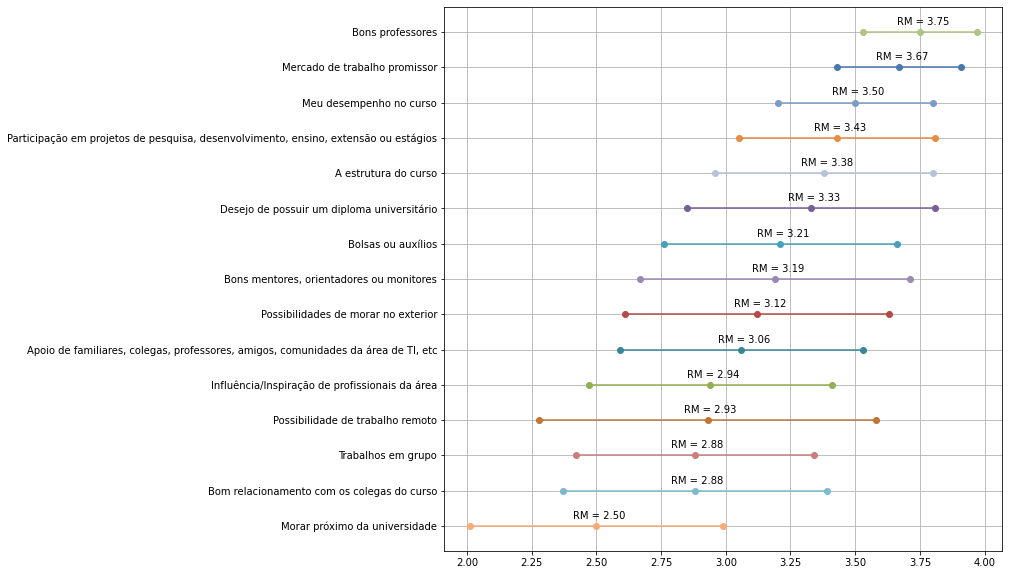

In [210]:
df_outros = df.query("CID_UNIV not in ['Rio Tinto', 'Campina Grande', 'Não Respondeu']")

df_importancia_outros = pd.DataFrame({
    'Descrição': importancia_outros['Descrição'],
    'mean': [
        mediaRanking(df_outros.query("IMP_INFRAESTRUTURA != 0")['IMP_INFRAESTRUTURA'].values.tolist()),
        mediaRanking(df_outros.query("IMP_MORAR_PROXIMO != 0")['IMP_MORAR_PROXIMO'].values.tolist()),
        mediaRanking(df_outros.query("IMP_NETWORK != 0")['IMP_NETWORK'].values.tolist()),
        mediaRanking(df_outros.query("IMP_BONS_MENTORES != 0")['IMP_BONS_MENTORES'].values.tolist()),
        mediaRanking(df_outros.query("IMP_BONS_PROFS != 0")['IMP_BONS_PROFS'].values.tolist()),
        mediaRanking(df_outros.query("IMP_TRAB_GRUPO != 0")['IMP_TRAB_GRUPO'].values.tolist()),
        mediaRanking(df_outros.query("IMP_DESEMPENHO != 0")['IMP_DESEMPENHO'].values.tolist()),
        mediaRanking(df_outros.query("IMP_PART_PROJETO != 0")['IMP_PART_PROJETO'].values.tolist()),
        mediaRanking(df_outros.query("IMP_AUX_FIN != 0")['IMP_AUX_FIN'].values.tolist()),
        mediaRanking(df_outros.query("IMP_DIPLOMA != 0")['IMP_DIPLOMA'].values.tolist()),
        mediaRanking(df_outros.query("IMP_INF_DE_OUTOS_PROFISSIONAIS != 0")['IMP_INF_DE_OUTOS_PROFISSIONAIS'].values.tolist()),
        mediaRanking(df_outros.query("IMP_MORAR_NO_EXTERIOR != 0")['IMP_MORAR_NO_EXTERIOR'].values.tolist()),
        mediaRanking(df_outros.query("IMP_MERC_PROMISSOR != 0")['IMP_MERC_PROMISSOR'].values.tolist()),
        mediaRanking(df_outros.query("IMP_TRAB_REMOTO != 0")['IMP_TRAB_REMOTO'].values.tolist()),
        mediaRanking(df_outros.query("IMP_APOIO != 0")['IMP_APOIO'].values.tolist())
        ],
    'top_confidence_interval': [
        intervalo_de_confianca(df_outros.query("IMP_INFRAESTRUTURA != 0")['IMP_INFRAESTRUTURA'].values.tolist())[0],
        intervalo_de_confianca(df_outros.query("IMP_MORAR_PROXIMO != 0")['IMP_MORAR_PROXIMO'].values.tolist())[0],
        intervalo_de_confianca(df_outros.query("IMP_NETWORK != 0")['IMP_NETWORK'].values.tolist())[0],
        intervalo_de_confianca(df_outros.query("IMP_BONS_MENTORES != 0")['IMP_BONS_MENTORES'].values.tolist())[0],
        intervalo_de_confianca(df_outros.query("IMP_BONS_PROFS != 0")['IMP_BONS_PROFS'].values.tolist())[0],
        intervalo_de_confianca(df_outros.query("IMP_TRAB_GRUPO != 0")['IMP_TRAB_GRUPO'].values.tolist())[0],
        intervalo_de_confianca(df_outros.query("IMP_DESEMPENHO != 0")['IMP_DESEMPENHO'].values.tolist())[0],
        intervalo_de_confianca(df_outros.query("IMP_PART_PROJETO != 0")['IMP_PART_PROJETO'].values.tolist())[0],
        intervalo_de_confianca(df_outros.query("IMP_AUX_FIN != 0")['IMP_AUX_FIN'].values.tolist())[0],
        intervalo_de_confianca(df_outros.query("IMP_DIPLOMA != 0")['IMP_DIPLOMA'].values.tolist())[0],
        intervalo_de_confianca(df_outros.query("IMP_INF_DE_OUTOS_PROFISSIONAIS != 0")['IMP_INF_DE_OUTOS_PROFISSIONAIS'].values.tolist())[0],
        intervalo_de_confianca(df_outros.query("IMP_MORAR_NO_EXTERIOR != 0")['IMP_MORAR_NO_EXTERIOR'].values.tolist())[0],
        intervalo_de_confianca(df_outros.query("IMP_MERC_PROMISSOR != 0")['IMP_MERC_PROMISSOR'].values.tolist())[0],
        intervalo_de_confianca(df_outros.query("IMP_TRAB_REMOTO != 0")['IMP_TRAB_REMOTO'].values.tolist())[0],
        intervalo_de_confianca(df_outros.query("IMP_APOIO != 0")['IMP_APOIO'].values.tolist())[0]
    ],
    'bottom_confidence_interval': [
        intervalo_de_confianca(df_outros.query("IMP_INFRAESTRUTURA != 0")['IMP_INFRAESTRUTURA'].values.tolist())[1],
        intervalo_de_confianca(df_outros.query("IMP_MORAR_PROXIMO != 0")['IMP_MORAR_PROXIMO'].values.tolist())[1],
        intervalo_de_confianca(df_outros.query("IMP_NETWORK != 0")['IMP_NETWORK'].values.tolist())[1],
        intervalo_de_confianca(df_outros.query("IMP_BONS_MENTORES != 0")['IMP_BONS_MENTORES'].values.tolist())[1],
        intervalo_de_confianca(df_outros.query("IMP_BONS_PROFS != 0")['IMP_BONS_PROFS'].values.tolist())[1],
        intervalo_de_confianca(df_outros.query("IMP_TRAB_GRUPO != 0")['IMP_TRAB_GRUPO'].values.tolist())[1],
        intervalo_de_confianca(df_outros.query("IMP_DESEMPENHO != 0")['IMP_DESEMPENHO'].values.tolist())[1],
        intervalo_de_confianca(df_outros.query("IMP_PART_PROJETO != 0")['IMP_PART_PROJETO'].values.tolist())[1],
        intervalo_de_confianca(df_outros.query("IMP_AUX_FIN != 0")['IMP_AUX_FIN'].values.tolist())[1],
        intervalo_de_confianca(df_outros.query("IMP_DIPLOMA != 0")['IMP_DIPLOMA'].values.tolist())[1],
        intervalo_de_confianca(df_outros.query("IMP_INF_DE_OUTOS_PROFISSIONAIS != 0")['IMP_INF_DE_OUTOS_PROFISSIONAIS'].values.tolist())[1],
        intervalo_de_confianca(df_outros.query("IMP_MORAR_NO_EXTERIOR != 0")['IMP_MORAR_NO_EXTERIOR'].values.tolist())[1],
        intervalo_de_confianca(df_outros.query("IMP_MERC_PROMISSOR != 0")['IMP_MERC_PROMISSOR'].values.tolist())[1],
        intervalo_de_confianca(df_outros.query("IMP_TRAB_REMOTO != 0")['IMP_TRAB_REMOTO'].values.tolist())[1],
        intervalo_de_confianca(df_outros.query("IMP_APOIO != 0")['IMP_APOIO'].values.tolist())[1]
    ]
})

df_importancia_outros.sort_values(by=['mean'], ascending=True, ignore_index=True, inplace=True)

#https://stackoverflow.com/questions/59747313/how-can-i-plot-a-confidence-interval-in-python
plot_grafico_intervalo_de_confianca(df_importancia_outros)

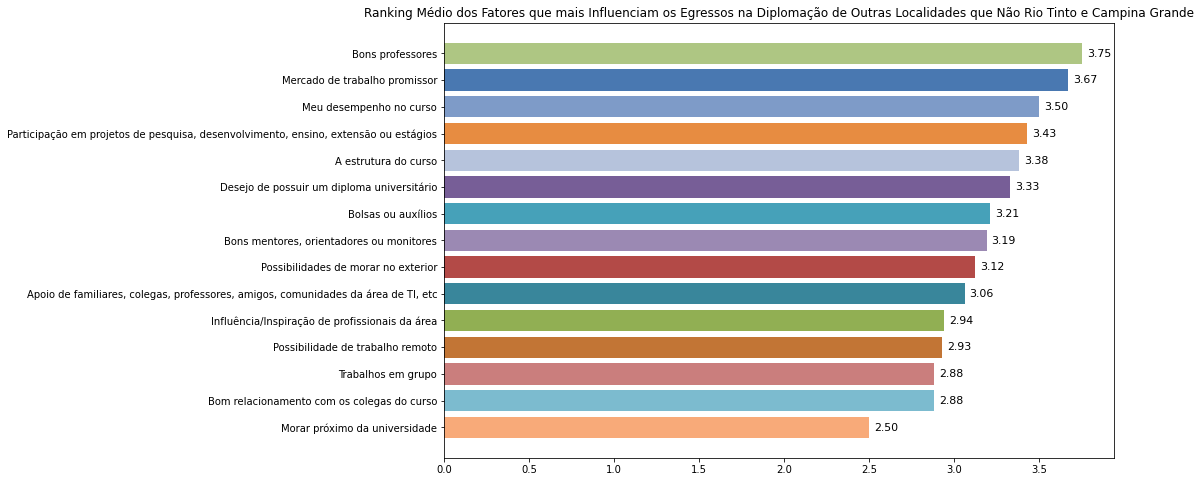

In [211]:
plotGraficoMediaRanking("Ranking Médio dos Fatores que mais Influenciam os Egressos na Diplomação de Outras Localidades que Não Rio Tinto e Campina Grande", 8, 12, 
                        df_importancia_outros['Descrição'].values, df_importancia_outros['mean'].values, 
                        df_importancia_outros['mean'].values)

## Idades

### 20-25

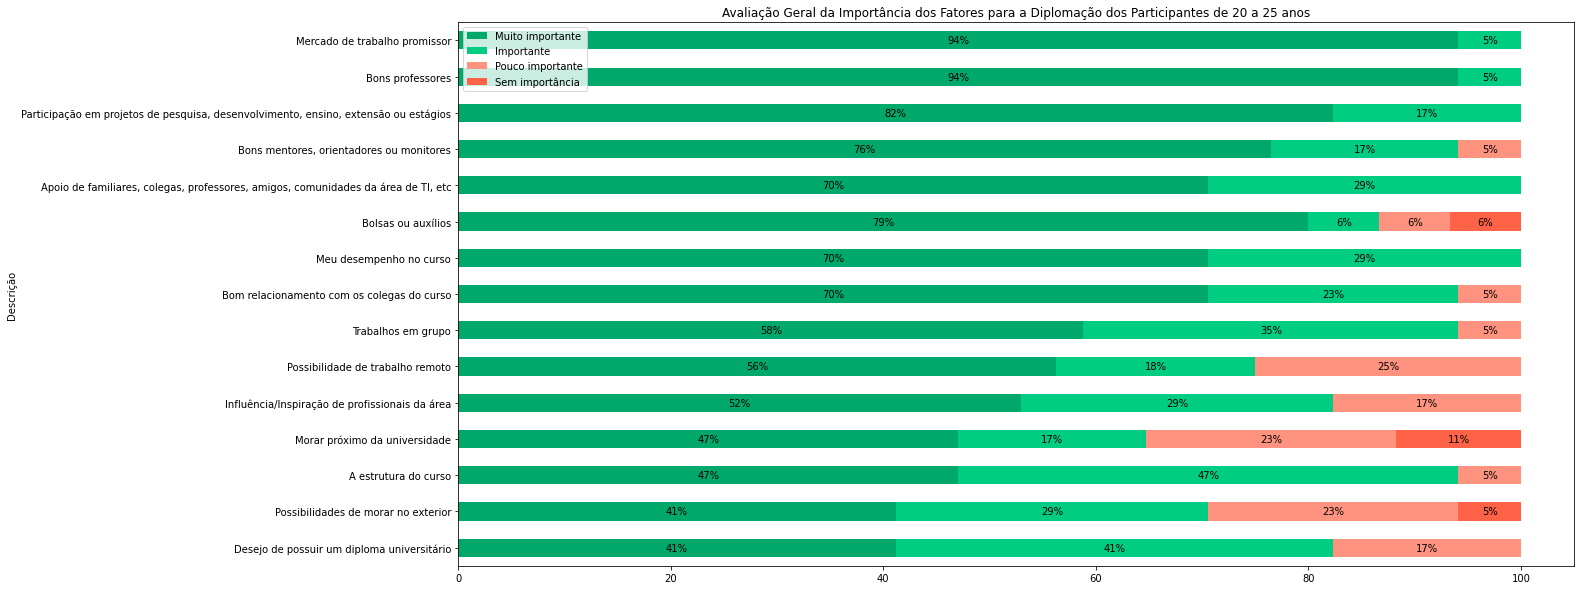

In [212]:
## MUITO IMPORTANTE
importancia_20_25 = pd.DataFrame({"Descrição": ["A estrutura do curso",
                                "Morar próximo da universidade", 
                                "Bom relacionamento com os colegas do curso", 
                                "Bons mentores, orientadores ou monitores", 
                                "Bons professores", 
                                "Trabalhos em grupo",
                                "Meu desempenho no curso", 
                                "Participação em projetos de pesquisa, desenvolvimento, ensino, extensão ou estágios", 
                                "Bolsas ou auxílios", 
                                "Desejo de possuir um diploma universitário", 
                                "Influência/Inspiração de profissionais da área",
                                "Possibilidades de morar no exterior",
                                "Mercado de trabalho promissor",
                                "Possibilidade de trabalho remoto",
                                "Apoio de familiares, colegas, professores, amigos, comunidades da área de TI, etc"],
                                "Muito importante": [df.query("IMP_INFRAESTRUTURA == 4").query("IDADE_CATEGORIAS == '20-25'")["IMP_INFRAESTRUTURA"].value_counts().to_frame().reset_index().iloc[0].IMP_INFRAESTRUTURA, 
                                              df.query("IMP_MORAR_PROXIMO == 4").query("IDADE_CATEGORIAS == '20-25'")["IMP_MORAR_PROXIMO"].value_counts().to_frame().reset_index().iloc[0].IMP_MORAR_PROXIMO, 
                                              df.query("IMP_NETWORK == 4").query("IDADE_CATEGORIAS == '20-25'")["IMP_NETWORK"].value_counts().to_frame().reset_index().iloc[0].IMP_NETWORK,
                                              df.query("IMP_BONS_MENTORES == 4").query("IDADE_CATEGORIAS == '20-25'")["IMP_BONS_MENTORES"].value_counts().to_frame().reset_index().iloc[0].IMP_BONS_MENTORES,
                                              df.query("IMP_BONS_PROFS == 4").query("IDADE_CATEGORIAS == '20-25'")["IMP_BONS_PROFS"].value_counts().to_frame().reset_index().iloc[0].IMP_BONS_PROFS,
                                              df.query("IMP_TRAB_GRUPO == 4").query("IDADE_CATEGORIAS == '20-25'")["IMP_TRAB_GRUPO"].value_counts().to_frame().reset_index().iloc[0].IMP_TRAB_GRUPO, 
                                              df.query("IMP_DESEMPENHO == 4").query("IDADE_CATEGORIAS == '20-25'")["IMP_DESEMPENHO"].value_counts().to_frame().reset_index().iloc[0].IMP_DESEMPENHO,
                                              df.query("IMP_PART_PROJETO == 4").query("IDADE_CATEGORIAS == '20-25'")["IMP_PART_PROJETO"].value_counts().to_frame().reset_index().iloc[0].IMP_PART_PROJETO,
                                              df.query("IMP_AUX_FIN == 4").query("IDADE_CATEGORIAS == '20-25'")["IMP_AUX_FIN"].value_counts().to_frame().reset_index().iloc[0].IMP_AUX_FIN,
                                              df.query("IMP_DIPLOMA == 4").query("IDADE_CATEGORIAS == '20-25'")["IMP_DIPLOMA"].value_counts().to_frame().reset_index().iloc[0].IMP_DIPLOMA, 
                                              df.query("IMP_INF_DE_OUTOS_PROFISSIONAIS == 4").query("IDADE_CATEGORIAS == '20-25'")["IMP_INF_DE_OUTOS_PROFISSIONAIS"].value_counts().to_frame().reset_index().iloc[0].IMP_INF_DE_OUTOS_PROFISSIONAIS,
                                              df.query("IMP_MORAR_NO_EXTERIOR == 4").query("IDADE_CATEGORIAS == '20-25'")["IMP_MORAR_NO_EXTERIOR"].value_counts().to_frame().reset_index().iloc[0].IMP_MORAR_NO_EXTERIOR,
                                              df.query("IMP_MERC_PROMISSOR == 4").query("IDADE_CATEGORIAS == '20-25'")["IMP_MERC_PROMISSOR"].value_counts().to_frame().reset_index().iloc[0].IMP_MERC_PROMISSOR,
                                              df.query("IMP_TRAB_REMOTO == 4").query("IDADE_CATEGORIAS == '20-25'")["IMP_TRAB_REMOTO"].value_counts().to_frame().reset_index().iloc[0].IMP_TRAB_REMOTO,
                                              df.query("IMP_APOIO == 4").query("IDADE_CATEGORIAS == '20-25'")["IMP_APOIO"].value_counts().to_frame().reset_index().iloc[0].IMP_APOIO],
                                  "Importante": [df.query("IMP_INFRAESTRUTURA == 3").query("IDADE_CATEGORIAS == '20-25'")["IMP_INFRAESTRUTURA"].value_counts().to_frame().reset_index().iloc[0].IMP_INFRAESTRUTURA, 
                                              df.query("IMP_MORAR_PROXIMO == 3").query("IDADE_CATEGORIAS == '20-25'")["IMP_MORAR_PROXIMO"].value_counts().to_frame().reset_index().iloc[0].IMP_MORAR_PROXIMO, 
                                              df.query("IMP_NETWORK == 3").query("IDADE_CATEGORIAS == '20-25'")["IMP_NETWORK"].value_counts().to_frame().reset_index().iloc[0].IMP_NETWORK,
                                              df.query("IMP_BONS_MENTORES == 3").query("IDADE_CATEGORIAS == '20-25'")["IMP_BONS_MENTORES"].value_counts().to_frame().reset_index().iloc[0].IMP_BONS_MENTORES,
                                              df.query("IMP_BONS_PROFS == 3").query("IDADE_CATEGORIAS == '20-25'")["IMP_BONS_PROFS"].value_counts().to_frame().reset_index().iloc[0].IMP_BONS_PROFS,
                                              df.query("IMP_TRAB_GRUPO == 3").query("IDADE_CATEGORIAS == '20-25'")["IMP_TRAB_GRUPO"].value_counts().to_frame().reset_index().iloc[0].IMP_TRAB_GRUPO, 
                                              df.query("IMP_DESEMPENHO == 3").query("IDADE_CATEGORIAS == '20-25'")["IMP_DESEMPENHO"].value_counts().to_frame().reset_index().iloc[0].IMP_DESEMPENHO,
                                              df.query("IMP_PART_PROJETO == 3").query("IDADE_CATEGORIAS == '20-25'")["IMP_PART_PROJETO"].value_counts().to_frame().reset_index().iloc[0].IMP_PART_PROJETO,
                                              df.query("IMP_AUX_FIN == 3").query("IDADE_CATEGORIAS == '20-25'")["IMP_AUX_FIN"].value_counts().to_frame().reset_index().iloc[0].IMP_AUX_FIN,
                                              df.query("IMP_DIPLOMA == 3").query("IDADE_CATEGORIAS == '20-25'")["IMP_DIPLOMA"].value_counts().to_frame().reset_index().iloc[0].IMP_DIPLOMA, 
                                              df.query("IMP_INF_DE_OUTOS_PROFISSIONAIS == 3").query("IDADE_CATEGORIAS == '20-25'")["IMP_INF_DE_OUTOS_PROFISSIONAIS"].value_counts().to_frame().reset_index().iloc[0].IMP_INF_DE_OUTOS_PROFISSIONAIS,
                                              df.query("IMP_MORAR_NO_EXTERIOR == 3").query("IDADE_CATEGORIAS == '20-25'")["IMP_MORAR_NO_EXTERIOR"].value_counts().to_frame().reset_index().iloc[0].IMP_MORAR_NO_EXTERIOR,
                                              df.query("IMP_MERC_PROMISSOR == 3").query("IDADE_CATEGORIAS == '20-25'")["IMP_MERC_PROMISSOR"].value_counts().to_frame().reset_index().iloc[0].IMP_MERC_PROMISSOR,
                                              df.query("IMP_TRAB_REMOTO == 3").query("IDADE_CATEGORIAS == '20-25'")["IMP_TRAB_REMOTO"].value_counts().to_frame().reset_index().iloc[0].IMP_TRAB_REMOTO,
                                              df.query("IMP_APOIO == 3").query("IDADE_CATEGORIAS == '20-25'")["IMP_APOIO"].value_counts().to_frame().reset_index().iloc[0].IMP_APOIO], 
                                 "Pouco importante": [df.query("IMP_INFRAESTRUTURA == 2").query("IDADE_CATEGORIAS == '20-25'")["IMP_INFRAESTRUTURA"].value_counts().to_frame().reset_index().iloc[0].IMP_INFRAESTRUTURA, 
                                              df.query("IMP_MORAR_PROXIMO == 2").query("IDADE_CATEGORIAS == '20-25'")["IMP_MORAR_PROXIMO"].value_counts().to_frame().reset_index().iloc[0].IMP_MORAR_PROXIMO, 
                                              df.query("IMP_NETWORK == 2").query("IDADE_CATEGORIAS == '20-25'")["IMP_NETWORK"].value_counts().to_frame().reset_index().iloc[0].IMP_NETWORK,
                                              df.query("IMP_BONS_MENTORES == 2").query("IDADE_CATEGORIAS == '20-25'")["IMP_BONS_MENTORES"].value_counts().to_frame().reset_index().iloc[0].IMP_BONS_MENTORES,
                                              
                                              0,


                                              df.query("IMP_TRAB_GRUPO == 2").query("IDADE_CATEGORIAS == '20-25'")["IMP_TRAB_GRUPO"].value_counts().to_frame().reset_index().iloc[0].IMP_TRAB_GRUPO, 

                                              0,
                                              0,
                                              
                                              df.query("IMP_AUX_FIN == 2").query("IDADE_CATEGORIAS == '20-25'")["IMP_AUX_FIN"].value_counts().to_frame().reset_index().iloc[0].IMP_AUX_FIN,
                                              df.query("IMP_DIPLOMA == 2").query("IDADE_CATEGORIAS == '20-25'")["IMP_DIPLOMA"].value_counts().to_frame().reset_index().iloc[0].IMP_DIPLOMA, 
                                              df.query("IMP_INF_DE_OUTOS_PROFISSIONAIS == 2").query("IDADE_CATEGORIAS == '20-25'")["IMP_INF_DE_OUTOS_PROFISSIONAIS"].value_counts().to_frame().reset_index().iloc[0].IMP_INF_DE_OUTOS_PROFISSIONAIS,
                                              df.query("IMP_MORAR_NO_EXTERIOR == 2").query("IDADE_CATEGORIAS == '20-25'")["IMP_MORAR_NO_EXTERIOR"].value_counts().to_frame().reset_index().iloc[0].IMP_MORAR_NO_EXTERIOR,
                                              
                                              0,

                                              df.query("IMP_TRAB_REMOTO == 2").query("IDADE_CATEGORIAS == '20-25'")["IMP_TRAB_REMOTO"].value_counts().to_frame().reset_index().iloc[0].IMP_TRAB_REMOTO,
                                             
                                              0],   
                                "Sem importância": [0, 
                                                    
                                              df.query("IMP_MORAR_PROXIMO == 1").query("IDADE_CATEGORIAS == '20-25'")["IMP_MORAR_PROXIMO"].value_counts().to_frame().reset_index().iloc[0].IMP_MORAR_PROXIMO, 

                                              0,
                                              0,
                                              0,
                                              0, 
                                              0,
                                              0,

                                              df.query("IMP_AUX_FIN == 1").query("IDADE_CATEGORIAS == '20-25'")["IMP_AUX_FIN"].value_counts().to_frame().reset_index().iloc[0].IMP_AUX_FIN,

                                              0, 
                                              0,

                                              df.query("IMP_MORAR_NO_EXTERIOR == 1").query("IDADE_CATEGORIAS == '20-25'")["IMP_MORAR_NO_EXTERIOR"].value_counts().to_frame().reset_index().iloc[0].IMP_MORAR_NO_EXTERIOR,
                                              
                                              0,
                                              0,
                                              0]
                                  })

plot_barh_empilhado(importancia_20_25.sort_values(by=['Muito importante'], ascending=True), 'Descrição', 'Avaliação Geral da Importância dos Fatores para a Diplomação dos Participantes de 20 a 25 anos', 20, 10, 'importancia')

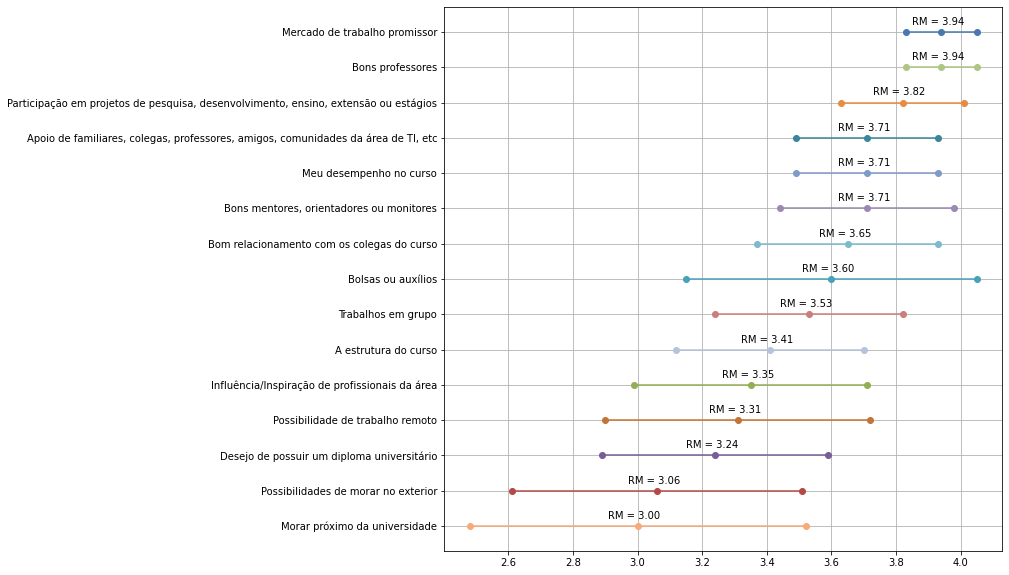

In [213]:
df_20_25 = df.query("IDADE_CATEGORIAS == '20-25'")

df_importancia_20_25 = pd.DataFrame({
    'Descrição': importancia_outros['Descrição'],
    'mean': [
        mediaRanking(df_20_25.query("IMP_INFRAESTRUTURA != 0")['IMP_INFRAESTRUTURA'].values.tolist()),
        mediaRanking(df_20_25.query("IMP_MORAR_PROXIMO != 0")['IMP_MORAR_PROXIMO'].values.tolist()),
        mediaRanking(df_20_25.query("IMP_NETWORK != 0")['IMP_NETWORK'].values.tolist()),
        mediaRanking(df_20_25.query("IMP_BONS_MENTORES != 0")['IMP_BONS_MENTORES'].values.tolist()),
        mediaRanking(df_20_25.query("IMP_BONS_PROFS != 0")['IMP_BONS_PROFS'].values.tolist()),
        mediaRanking(df_20_25.query("IMP_TRAB_GRUPO != 0")['IMP_TRAB_GRUPO'].values.tolist()),
        mediaRanking(df_20_25.query("IMP_DESEMPENHO != 0")['IMP_DESEMPENHO'].values.tolist()),
        mediaRanking(df_20_25.query("IMP_PART_PROJETO != 0")['IMP_PART_PROJETO'].values.tolist()),
        mediaRanking(df_20_25.query("IMP_AUX_FIN != 0")['IMP_AUX_FIN'].values.tolist()),
        mediaRanking(df_20_25.query("IMP_DIPLOMA != 0")['IMP_DIPLOMA'].values.tolist()),
        mediaRanking(df_20_25.query("IMP_INF_DE_OUTOS_PROFISSIONAIS != 0")['IMP_INF_DE_OUTOS_PROFISSIONAIS'].values.tolist()),
        mediaRanking(df_20_25.query("IMP_MORAR_NO_EXTERIOR != 0")['IMP_MORAR_NO_EXTERIOR'].values.tolist()),
        mediaRanking(df_20_25.query("IMP_MERC_PROMISSOR != 0")['IMP_MERC_PROMISSOR'].values.tolist()),
        mediaRanking(df_20_25.query("IMP_TRAB_REMOTO != 0")['IMP_TRAB_REMOTO'].values.tolist()),
        mediaRanking(df_20_25.query("IMP_APOIO != 0")['IMP_APOIO'].values.tolist())
        ],
    'top_confidence_interval': [
        intervalo_de_confianca(df_20_25.query("IMP_INFRAESTRUTURA != 0")['IMP_INFRAESTRUTURA'].values.tolist())[0],
        intervalo_de_confianca(df_20_25.query("IMP_MORAR_PROXIMO != 0")['IMP_MORAR_PROXIMO'].values.tolist())[0],
        intervalo_de_confianca(df_20_25.query("IMP_NETWORK != 0")['IMP_NETWORK'].values.tolist())[0],
        intervalo_de_confianca(df_20_25.query("IMP_BONS_MENTORES != 0")['IMP_BONS_MENTORES'].values.tolist())[0],
        intervalo_de_confianca(df_20_25.query("IMP_BONS_PROFS != 0")['IMP_BONS_PROFS'].values.tolist())[0],
        intervalo_de_confianca(df_20_25.query("IMP_TRAB_GRUPO != 0")['IMP_TRAB_GRUPO'].values.tolist())[0],
        intervalo_de_confianca(df_20_25.query("IMP_DESEMPENHO != 0")['IMP_DESEMPENHO'].values.tolist())[0],
        intervalo_de_confianca(df_20_25.query("IMP_PART_PROJETO != 0")['IMP_PART_PROJETO'].values.tolist())[0],
        intervalo_de_confianca(df_20_25.query("IMP_AUX_FIN != 0")['IMP_AUX_FIN'].values.tolist())[0],
        intervalo_de_confianca(df_20_25.query("IMP_DIPLOMA != 0")['IMP_DIPLOMA'].values.tolist())[0],
        intervalo_de_confianca(df_20_25.query("IMP_INF_DE_OUTOS_PROFISSIONAIS != 0")['IMP_INF_DE_OUTOS_PROFISSIONAIS'].values.tolist())[0],
        intervalo_de_confianca(df_20_25.query("IMP_MORAR_NO_EXTERIOR != 0")['IMP_MORAR_NO_EXTERIOR'].values.tolist())[0],
        intervalo_de_confianca(df_20_25.query("IMP_MERC_PROMISSOR != 0")['IMP_MERC_PROMISSOR'].values.tolist())[0],
        intervalo_de_confianca(df_20_25.query("IMP_TRAB_REMOTO != 0")['IMP_TRAB_REMOTO'].values.tolist())[0],
        intervalo_de_confianca(df_20_25.query("IMP_APOIO != 0")['IMP_APOIO'].values.tolist())[0]
    ],
    'bottom_confidence_interval': [
        intervalo_de_confianca(df_20_25.query("IMP_INFRAESTRUTURA != 0")['IMP_INFRAESTRUTURA'].values.tolist())[1],
        intervalo_de_confianca(df_20_25.query("IMP_MORAR_PROXIMO != 0")['IMP_MORAR_PROXIMO'].values.tolist())[1],
        intervalo_de_confianca(df_20_25.query("IMP_NETWORK != 0")['IMP_NETWORK'].values.tolist())[1],
        intervalo_de_confianca(df_20_25.query("IMP_BONS_MENTORES != 0")['IMP_BONS_MENTORES'].values.tolist())[1],
        intervalo_de_confianca(df_20_25.query("IMP_BONS_PROFS != 0")['IMP_BONS_PROFS'].values.tolist())[1],
        intervalo_de_confianca(df_20_25.query("IMP_TRAB_GRUPO != 0")['IMP_TRAB_GRUPO'].values.tolist())[1],
        intervalo_de_confianca(df_20_25.query("IMP_DESEMPENHO != 0")['IMP_DESEMPENHO'].values.tolist())[1],
        intervalo_de_confianca(df_20_25.query("IMP_PART_PROJETO != 0")['IMP_PART_PROJETO'].values.tolist())[1],
        intervalo_de_confianca(df_20_25.query("IMP_AUX_FIN != 0")['IMP_AUX_FIN'].values.tolist())[1],
        intervalo_de_confianca(df_20_25.query("IMP_DIPLOMA != 0")['IMP_DIPLOMA'].values.tolist())[1],
        intervalo_de_confianca(df_20_25.query("IMP_INF_DE_OUTOS_PROFISSIONAIS != 0")['IMP_INF_DE_OUTOS_PROFISSIONAIS'].values.tolist())[1],
        intervalo_de_confianca(df_20_25.query("IMP_MORAR_NO_EXTERIOR != 0")['IMP_MORAR_NO_EXTERIOR'].values.tolist())[1],
        intervalo_de_confianca(df_20_25.query("IMP_MERC_PROMISSOR != 0")['IMP_MERC_PROMISSOR'].values.tolist())[1],
        intervalo_de_confianca(df_20_25.query("IMP_TRAB_REMOTO != 0")['IMP_TRAB_REMOTO'].values.tolist())[1],
        intervalo_de_confianca(df_20_25.query("IMP_APOIO != 0")['IMP_APOIO'].values.tolist())[1]
    ]
})

df_importancia_20_25.sort_values(by=['mean'], ascending=True, ignore_index=True, inplace=True)

#https://stackoverflow.com/questions/59747313/how-can-i-plot-a-confidence-interval-in-python
plot_grafico_intervalo_de_confianca(df_importancia_20_25)

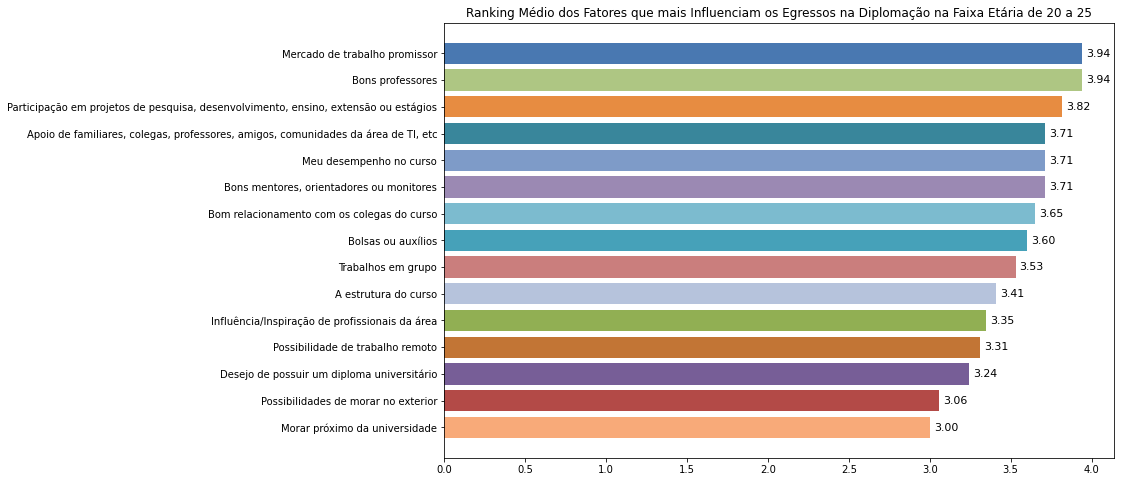

In [214]:
plotGraficoMediaRanking("Ranking Médio dos Fatores que mais Influenciam os Egressos na Diplomação na Faixa Etária de 20 a 25", 8, 12, 
                        df_importancia_20_25['Descrição'].values, df_importancia_20_25['mean'].values, 
                        df_importancia_20_25['mean'].values)

### 26-30

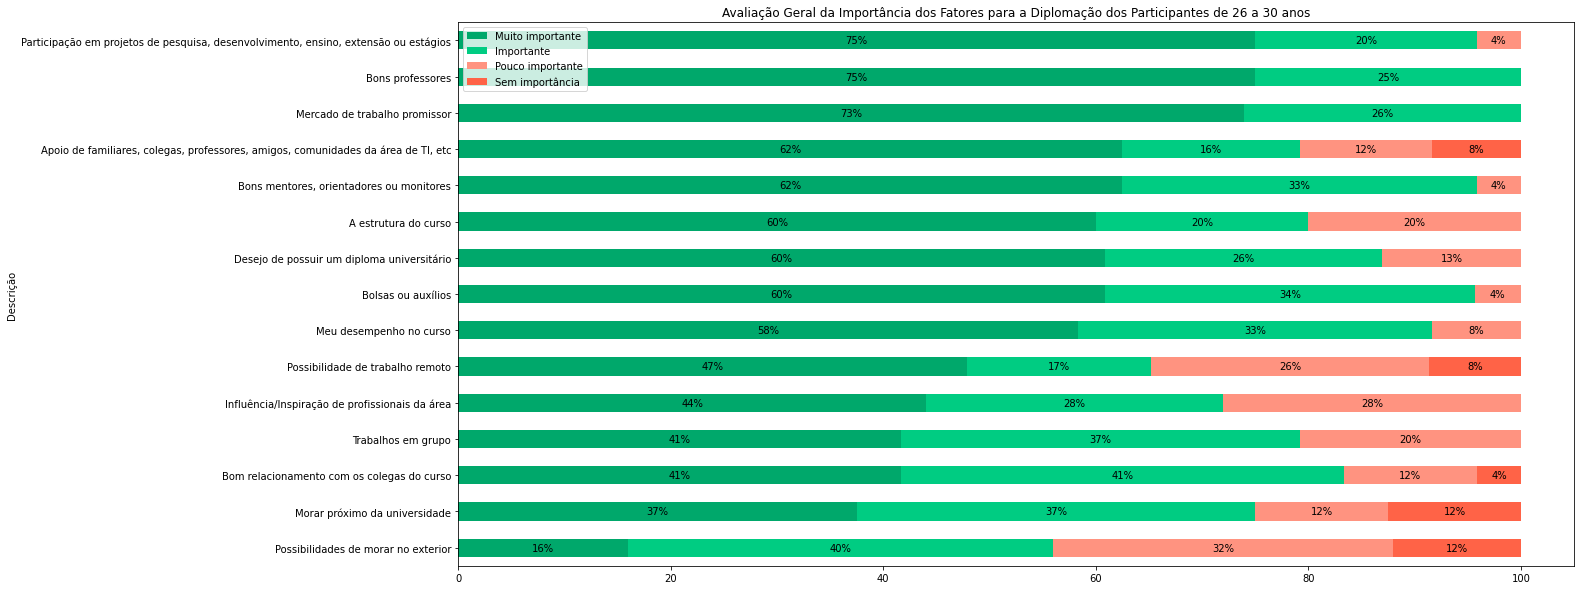

In [215]:
## MUITO IMPORTANTE
importancia_26_30 = pd.DataFrame({"Descrição": ["A estrutura do curso",
                                "Morar próximo da universidade", 
                                "Bom relacionamento com os colegas do curso", 
                                "Bons mentores, orientadores ou monitores", 
                                "Bons professores", 
                                "Trabalhos em grupo",
                                "Meu desempenho no curso", 
                                "Participação em projetos de pesquisa, desenvolvimento, ensino, extensão ou estágios", 
                                "Bolsas ou auxílios", 
                                "Desejo de possuir um diploma universitário", 
                                "Influência/Inspiração de profissionais da área",
                                "Possibilidades de morar no exterior",
                                "Mercado de trabalho promissor",
                                "Possibilidade de trabalho remoto",
                                "Apoio de familiares, colegas, professores, amigos, comunidades da área de TI, etc"],
                                "Muito importante": [df.query("IMP_INFRAESTRUTURA == 4").query("IDADE_CATEGORIAS == '26-30'")["IMP_INFRAESTRUTURA"].value_counts().to_frame().reset_index().iloc[0].IMP_INFRAESTRUTURA, 
                                              df.query("IMP_MORAR_PROXIMO == 4").query("IDADE_CATEGORIAS == '26-30'")["IMP_MORAR_PROXIMO"].value_counts().to_frame().reset_index().iloc[0].IMP_MORAR_PROXIMO, 
                                              df.query("IMP_NETWORK == 4").query("IDADE_CATEGORIAS == '26-30'")["IMP_NETWORK"].value_counts().to_frame().reset_index().iloc[0].IMP_NETWORK,
                                              df.query("IMP_BONS_MENTORES == 4").query("IDADE_CATEGORIAS == '26-30'")["IMP_BONS_MENTORES"].value_counts().to_frame().reset_index().iloc[0].IMP_BONS_MENTORES,
                                              df.query("IMP_BONS_PROFS == 4").query("IDADE_CATEGORIAS == '26-30'")["IMP_BONS_PROFS"].value_counts().to_frame().reset_index().iloc[0].IMP_BONS_PROFS,
                                              df.query("IMP_TRAB_GRUPO == 4").query("IDADE_CATEGORIAS == '26-30'")["IMP_TRAB_GRUPO"].value_counts().to_frame().reset_index().iloc[0].IMP_TRAB_GRUPO, 
                                              df.query("IMP_DESEMPENHO == 4").query("IDADE_CATEGORIAS == '26-30'")["IMP_DESEMPENHO"].value_counts().to_frame().reset_index().iloc[0].IMP_DESEMPENHO,
                                              df.query("IMP_PART_PROJETO == 4").query("IDADE_CATEGORIAS == '26-30'")["IMP_PART_PROJETO"].value_counts().to_frame().reset_index().iloc[0].IMP_PART_PROJETO,
                                              df.query("IMP_AUX_FIN == 4").query("IDADE_CATEGORIAS == '26-30'")["IMP_AUX_FIN"].value_counts().to_frame().reset_index().iloc[0].IMP_AUX_FIN,
                                              df.query("IMP_DIPLOMA == 4").query("IDADE_CATEGORIAS == '26-30'")["IMP_DIPLOMA"].value_counts().to_frame().reset_index().iloc[0].IMP_DIPLOMA, 
                                              df.query("IMP_INF_DE_OUTOS_PROFISSIONAIS == 4").query("IDADE_CATEGORIAS == '26-30'")["IMP_INF_DE_OUTOS_PROFISSIONAIS"].value_counts().to_frame().reset_index().iloc[0].IMP_INF_DE_OUTOS_PROFISSIONAIS,
                                              df.query("IMP_MORAR_NO_EXTERIOR == 4").query("IDADE_CATEGORIAS == '26-30'")["IMP_MORAR_NO_EXTERIOR"].value_counts().to_frame().reset_index().iloc[0].IMP_MORAR_NO_EXTERIOR,
                                              df.query("IMP_MERC_PROMISSOR == 4").query("IDADE_CATEGORIAS == '26-30'")["IMP_MERC_PROMISSOR"].value_counts().to_frame().reset_index().iloc[0].IMP_MERC_PROMISSOR,
                                              df.query("IMP_TRAB_REMOTO == 4").query("IDADE_CATEGORIAS == '26-30'")["IMP_TRAB_REMOTO"].value_counts().to_frame().reset_index().iloc[0].IMP_TRAB_REMOTO,
                                              df.query("IMP_APOIO == 4").query("IDADE_CATEGORIAS == '26-30'")["IMP_APOIO"].value_counts().to_frame().reset_index().iloc[0].IMP_APOIO],
                                  "Importante": [df.query("IMP_INFRAESTRUTURA == 3").query("IDADE_CATEGORIAS == '26-30'")["IMP_INFRAESTRUTURA"].value_counts().to_frame().reset_index().iloc[0].IMP_INFRAESTRUTURA, 
                                              df.query("IMP_MORAR_PROXIMO == 3").query("IDADE_CATEGORIAS == '26-30'")["IMP_MORAR_PROXIMO"].value_counts().to_frame().reset_index().iloc[0].IMP_MORAR_PROXIMO, 
                                              df.query("IMP_NETWORK == 3").query("IDADE_CATEGORIAS == '26-30'")["IMP_NETWORK"].value_counts().to_frame().reset_index().iloc[0].IMP_NETWORK,
                                              df.query("IMP_BONS_MENTORES == 3").query("IDADE_CATEGORIAS == '26-30'")["IMP_BONS_MENTORES"].value_counts().to_frame().reset_index().iloc[0].IMP_BONS_MENTORES,
                                              df.query("IMP_BONS_PROFS == 3").query("IDADE_CATEGORIAS == '26-30'")["IMP_BONS_PROFS"].value_counts().to_frame().reset_index().iloc[0].IMP_BONS_PROFS,
                                              df.query("IMP_TRAB_GRUPO == 3").query("IDADE_CATEGORIAS == '26-30'")["IMP_TRAB_GRUPO"].value_counts().to_frame().reset_index().iloc[0].IMP_TRAB_GRUPO, 
                                              df.query("IMP_DESEMPENHO == 3").query("IDADE_CATEGORIAS == '26-30'")["IMP_DESEMPENHO"].value_counts().to_frame().reset_index().iloc[0].IMP_DESEMPENHO,
                                              df.query("IMP_PART_PROJETO == 3").query("IDADE_CATEGORIAS == '26-30'")["IMP_PART_PROJETO"].value_counts().to_frame().reset_index().iloc[0].IMP_PART_PROJETO,
                                              df.query("IMP_AUX_FIN == 3").query("IDADE_CATEGORIAS == '26-30'")["IMP_AUX_FIN"].value_counts().to_frame().reset_index().iloc[0].IMP_AUX_FIN,
                                              df.query("IMP_DIPLOMA == 3").query("IDADE_CATEGORIAS == '26-30'")["IMP_DIPLOMA"].value_counts().to_frame().reset_index().iloc[0].IMP_DIPLOMA, 
                                              df.query("IMP_INF_DE_OUTOS_PROFISSIONAIS == 3").query("IDADE_CATEGORIAS == '26-30'")["IMP_INF_DE_OUTOS_PROFISSIONAIS"].value_counts().to_frame().reset_index().iloc[0].IMP_INF_DE_OUTOS_PROFISSIONAIS,
                                              df.query("IMP_MORAR_NO_EXTERIOR == 3").query("IDADE_CATEGORIAS == '26-30'")["IMP_MORAR_NO_EXTERIOR"].value_counts().to_frame().reset_index().iloc[0].IMP_MORAR_NO_EXTERIOR,
                                              df.query("IMP_MERC_PROMISSOR == 3").query("IDADE_CATEGORIAS == '26-30'")["IMP_MERC_PROMISSOR"].value_counts().to_frame().reset_index().iloc[0].IMP_MERC_PROMISSOR,
                                              df.query("IMP_TRAB_REMOTO == 3").query("IDADE_CATEGORIAS == '26-30'")["IMP_TRAB_REMOTO"].value_counts().to_frame().reset_index().iloc[0].IMP_TRAB_REMOTO,
                                              df.query("IMP_APOIO == 3").query("IDADE_CATEGORIAS == '26-30'")["IMP_APOIO"].value_counts().to_frame().reset_index().iloc[0].IMP_APOIO], 
                                 "Pouco importante": [df.query("IMP_INFRAESTRUTURA == 2").query("IDADE_CATEGORIAS == '26-30'")["IMP_INFRAESTRUTURA"].value_counts().to_frame().reset_index().iloc[0].IMP_INFRAESTRUTURA, 
                                              df.query("IMP_MORAR_PROXIMO == 2").query("IDADE_CATEGORIAS == '26-30'")["IMP_MORAR_PROXIMO"].value_counts().to_frame().reset_index().iloc[0].IMP_MORAR_PROXIMO, 
                                              df.query("IMP_NETWORK == 2").query("IDADE_CATEGORIAS == '26-30'")["IMP_NETWORK"].value_counts().to_frame().reset_index().iloc[0].IMP_NETWORK,
                                              df.query("IMP_BONS_MENTORES == 2").query("IDADE_CATEGORIAS == '26-30'")["IMP_BONS_MENTORES"].value_counts().to_frame().reset_index().iloc[0].IMP_BONS_MENTORES,
                                              0,
                                              df.query("IMP_TRAB_GRUPO == 2").query("IDADE_CATEGORIAS == '26-30'")["IMP_TRAB_GRUPO"].value_counts().to_frame().reset_index().iloc[0].IMP_TRAB_GRUPO, 
                                              df.query("IMP_DESEMPENHO == 2").query("IDADE_CATEGORIAS == '26-30'")["IMP_DESEMPENHO"].value_counts().to_frame().reset_index().iloc[0].IMP_DESEMPENHO,
                                              df.query("IMP_PART_PROJETO == 2").query("IDADE_CATEGORIAS == '26-30'")["IMP_PART_PROJETO"].value_counts().to_frame().reset_index().iloc[0].IMP_PART_PROJETO,
                                              df.query("IMP_AUX_FIN == 2").query("IDADE_CATEGORIAS == '26-30'")["IMP_AUX_FIN"].value_counts().to_frame().reset_index().iloc[0].IMP_AUX_FIN,
                                              df.query("IMP_DIPLOMA == 2").query("IDADE_CATEGORIAS == '26-30'")["IMP_DIPLOMA"].value_counts().to_frame().reset_index().iloc[0].IMP_DIPLOMA, 
                                              df.query("IMP_INF_DE_OUTOS_PROFISSIONAIS == 2").query("IDADE_CATEGORIAS == '26-30'")["IMP_INF_DE_OUTOS_PROFISSIONAIS"].value_counts().to_frame().reset_index().iloc[0].IMP_INF_DE_OUTOS_PROFISSIONAIS,
                                              df.query("IMP_MORAR_NO_EXTERIOR == 2").query("IDADE_CATEGORIAS == '26-30'")["IMP_MORAR_NO_EXTERIOR"].value_counts().to_frame().reset_index().iloc[0].IMP_MORAR_NO_EXTERIOR,
                                              0,
                                              df.query("IMP_TRAB_REMOTO == 2").query("IDADE_CATEGORIAS == '26-30'")["IMP_TRAB_REMOTO"].value_counts().to_frame().reset_index().iloc[0].IMP_TRAB_REMOTO,
                                              df.query("IMP_APOIO == 2").query("IDADE_CATEGORIAS == '26-30'")["IMP_APOIO"].value_counts().to_frame().reset_index().iloc[0].IMP_APOIO],   
                                "Sem importância": [0, 
                                              df.query("IMP_MORAR_PROXIMO == 1").query("IDADE_CATEGORIAS == '26-30'")["IMP_MORAR_PROXIMO"].value_counts().to_frame().reset_index().iloc[0].IMP_MORAR_PROXIMO, 
                                              df.query("IMP_NETWORK == 1").query("IDADE_CATEGORIAS == '26-30'")["IMP_NETWORK"].value_counts().to_frame().reset_index().iloc[0].IMP_NETWORK,
                                              0,
                                              0,
                                              0, 
                                              0,
                                              0,
                                              0,
                                              0, 
                                              0, 
                                              df.query("IMP_MORAR_NO_EXTERIOR == 1").query("IDADE_CATEGORIAS == '26-30'")["IMP_MORAR_NO_EXTERIOR"].value_counts().to_frame().reset_index().iloc[0].IMP_MORAR_NO_EXTERIOR,
                                              0,
                                              df.query("IMP_TRAB_REMOTO == 1").query("IDADE_CATEGORIAS == '26-30'")["IMP_TRAB_REMOTO"].value_counts().to_frame().reset_index().iloc[0].IMP_TRAB_REMOTO,
                                              df.query("IMP_APOIO == 1").query("IDADE_CATEGORIAS == '26-30'")["IMP_APOIO"].value_counts().to_frame().reset_index().iloc[0].IMP_APOIO]
                                  })

plot_barh_empilhado(importancia_26_30.sort_values(by=['Muito importante'], ascending=True), 'Descrição', 'Avaliação Geral da Importância dos Fatores para a Diplomação dos Participantes de 26 a 30 anos', 20, 10, 'importancia')

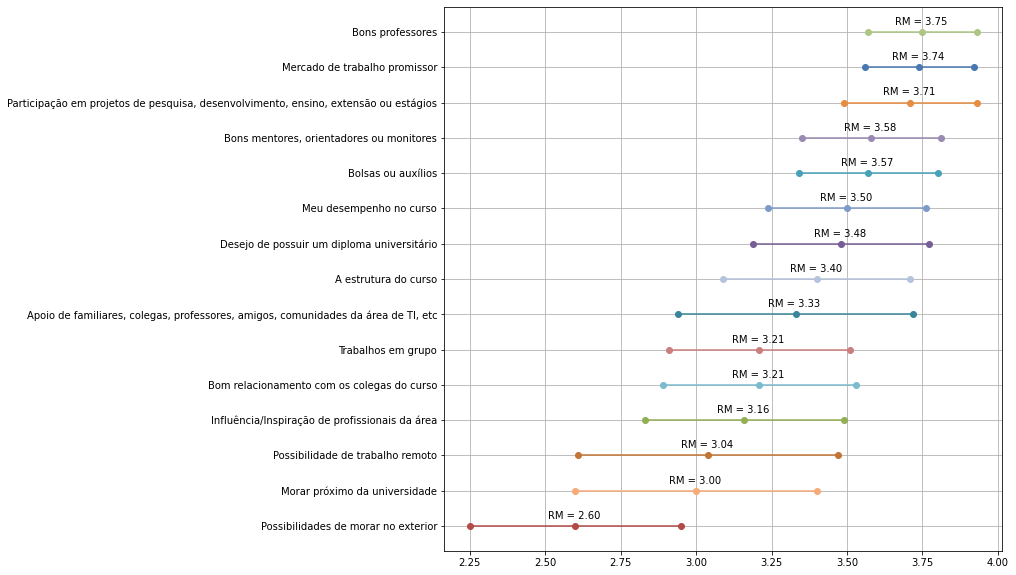

In [216]:
df_26_30 = df.query("IDADE_CATEGORIAS == '26-30'")

df_importancia_26_30 = pd.DataFrame({
    'Descrição': importancia_outros['Descrição'],
    'mean': [
        mediaRanking(df_26_30.query("IMP_INFRAESTRUTURA != 0")['IMP_INFRAESTRUTURA'].values.tolist()),
        mediaRanking(df_26_30.query("IMP_MORAR_PROXIMO != 0")['IMP_MORAR_PROXIMO'].values.tolist()),
        mediaRanking(df_26_30.query("IMP_NETWORK != 0")['IMP_NETWORK'].values.tolist()),
        mediaRanking(df_26_30.query("IMP_BONS_MENTORES != 0")['IMP_BONS_MENTORES'].values.tolist()),
        mediaRanking(df_26_30.query("IMP_BONS_PROFS != 0")['IMP_BONS_PROFS'].values.tolist()),
        mediaRanking(df_26_30.query("IMP_TRAB_GRUPO != 0")['IMP_TRAB_GRUPO'].values.tolist()),
        mediaRanking(df_26_30.query("IMP_DESEMPENHO != 0")['IMP_DESEMPENHO'].values.tolist()),
        mediaRanking(df_26_30.query("IMP_PART_PROJETO != 0")['IMP_PART_PROJETO'].values.tolist()),
        mediaRanking(df_26_30.query("IMP_AUX_FIN != 0")['IMP_AUX_FIN'].values.tolist()),
        mediaRanking(df_26_30.query("IMP_DIPLOMA != 0")['IMP_DIPLOMA'].values.tolist()),
        mediaRanking(df_26_30.query("IMP_INF_DE_OUTOS_PROFISSIONAIS != 0")['IMP_INF_DE_OUTOS_PROFISSIONAIS'].values.tolist()),
        mediaRanking(df_26_30.query("IMP_MORAR_NO_EXTERIOR != 0")['IMP_MORAR_NO_EXTERIOR'].values.tolist()),
        mediaRanking(df_26_30.query("IMP_MERC_PROMISSOR != 0")['IMP_MERC_PROMISSOR'].values.tolist()),
        mediaRanking(df_26_30.query("IMP_TRAB_REMOTO != 0")['IMP_TRAB_REMOTO'].values.tolist()),
        mediaRanking(df_26_30.query("IMP_APOIO != 0")['IMP_APOIO'].values.tolist())
        ],
    'top_confidence_interval': [
        intervalo_de_confianca(df_26_30.query("IMP_INFRAESTRUTURA != 0")['IMP_INFRAESTRUTURA'].values.tolist())[0],
        intervalo_de_confianca(df_26_30.query("IMP_MORAR_PROXIMO != 0")['IMP_MORAR_PROXIMO'].values.tolist())[0],
        intervalo_de_confianca(df_26_30.query("IMP_NETWORK != 0")['IMP_NETWORK'].values.tolist())[0],
        intervalo_de_confianca(df_26_30.query("IMP_BONS_MENTORES != 0")['IMP_BONS_MENTORES'].values.tolist())[0],
        intervalo_de_confianca(df_26_30.query("IMP_BONS_PROFS != 0")['IMP_BONS_PROFS'].values.tolist())[0],
        intervalo_de_confianca(df_26_30.query("IMP_TRAB_GRUPO != 0")['IMP_TRAB_GRUPO'].values.tolist())[0],
        intervalo_de_confianca(df_26_30.query("IMP_DESEMPENHO != 0")['IMP_DESEMPENHO'].values.tolist())[0],
        intervalo_de_confianca(df_26_30.query("IMP_PART_PROJETO != 0")['IMP_PART_PROJETO'].values.tolist())[0],
        intervalo_de_confianca(df_26_30.query("IMP_AUX_FIN != 0")['IMP_AUX_FIN'].values.tolist())[0],
        intervalo_de_confianca(df_26_30.query("IMP_DIPLOMA != 0")['IMP_DIPLOMA'].values.tolist())[0],
        intervalo_de_confianca(df_26_30.query("IMP_INF_DE_OUTOS_PROFISSIONAIS != 0")['IMP_INF_DE_OUTOS_PROFISSIONAIS'].values.tolist())[0],
        intervalo_de_confianca(df_26_30.query("IMP_MORAR_NO_EXTERIOR != 0")['IMP_MORAR_NO_EXTERIOR'].values.tolist())[0],
        intervalo_de_confianca(df_26_30.query("IMP_MERC_PROMISSOR != 0")['IMP_MERC_PROMISSOR'].values.tolist())[0],
        intervalo_de_confianca(df_26_30.query("IMP_TRAB_REMOTO != 0")['IMP_TRAB_REMOTO'].values.tolist())[0],
        intervalo_de_confianca(df_26_30.query("IMP_APOIO != 0")['IMP_APOIO'].values.tolist())[0]
    ],
    'bottom_confidence_interval': [
        intervalo_de_confianca(df_26_30.query("IMP_INFRAESTRUTURA != 0")['IMP_INFRAESTRUTURA'].values.tolist())[1],
        intervalo_de_confianca(df_26_30.query("IMP_MORAR_PROXIMO != 0")['IMP_MORAR_PROXIMO'].values.tolist())[1],
        intervalo_de_confianca(df_26_30.query("IMP_NETWORK != 0")['IMP_NETWORK'].values.tolist())[1],
        intervalo_de_confianca(df_26_30.query("IMP_BONS_MENTORES != 0")['IMP_BONS_MENTORES'].values.tolist())[1],
        intervalo_de_confianca(df_26_30.query("IMP_BONS_PROFS != 0")['IMP_BONS_PROFS'].values.tolist())[1],
        intervalo_de_confianca(df_26_30.query("IMP_TRAB_GRUPO != 0")['IMP_TRAB_GRUPO'].values.tolist())[1],
        intervalo_de_confianca(df_26_30.query("IMP_DESEMPENHO != 0")['IMP_DESEMPENHO'].values.tolist())[1],
        intervalo_de_confianca(df_26_30.query("IMP_PART_PROJETO != 0")['IMP_PART_PROJETO'].values.tolist())[1],
        intervalo_de_confianca(df_26_30.query("IMP_AUX_FIN != 0")['IMP_AUX_FIN'].values.tolist())[1],
        intervalo_de_confianca(df_26_30.query("IMP_DIPLOMA != 0")['IMP_DIPLOMA'].values.tolist())[1],
        intervalo_de_confianca(df_26_30.query("IMP_INF_DE_OUTOS_PROFISSIONAIS != 0")['IMP_INF_DE_OUTOS_PROFISSIONAIS'].values.tolist())[1],
        intervalo_de_confianca(df_26_30.query("IMP_MORAR_NO_EXTERIOR != 0")['IMP_MORAR_NO_EXTERIOR'].values.tolist())[1],
        intervalo_de_confianca(df_26_30.query("IMP_MERC_PROMISSOR != 0")['IMP_MERC_PROMISSOR'].values.tolist())[1],
        intervalo_de_confianca(df_26_30.query("IMP_TRAB_REMOTO != 0")['IMP_TRAB_REMOTO'].values.tolist())[1],
        intervalo_de_confianca(df_26_30.query("IMP_APOIO != 0")['IMP_APOIO'].values.tolist())[1]
    ]
})

df_importancia_26_30.sort_values(by=['mean'], ascending=True, ignore_index=True, inplace=True)

#https://stackoverflow.com/questions/59747313/how-can-i-plot-a-confidence-interval-in-python
plot_grafico_intervalo_de_confianca(df_importancia_26_30)

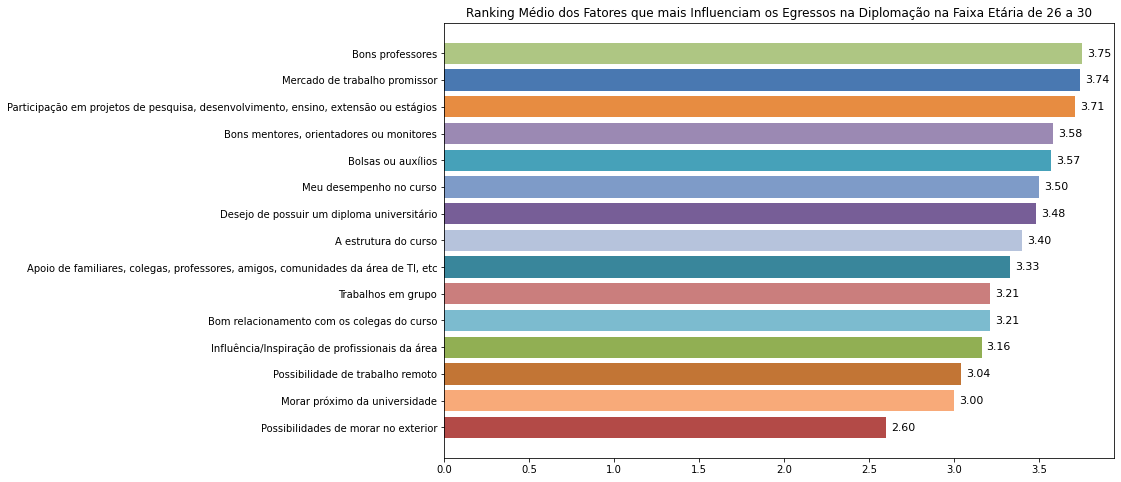

In [217]:
plotGraficoMediaRanking("Ranking Médio dos Fatores que mais Influenciam os Egressos na Diplomação na Faixa Etária de 26 a 30", 8, 12, 
                        df_importancia_26_30['Descrição'].values, df_importancia_26_30['mean'].values, 
                        df_importancia_26_30['mean'].values)

### 31-35

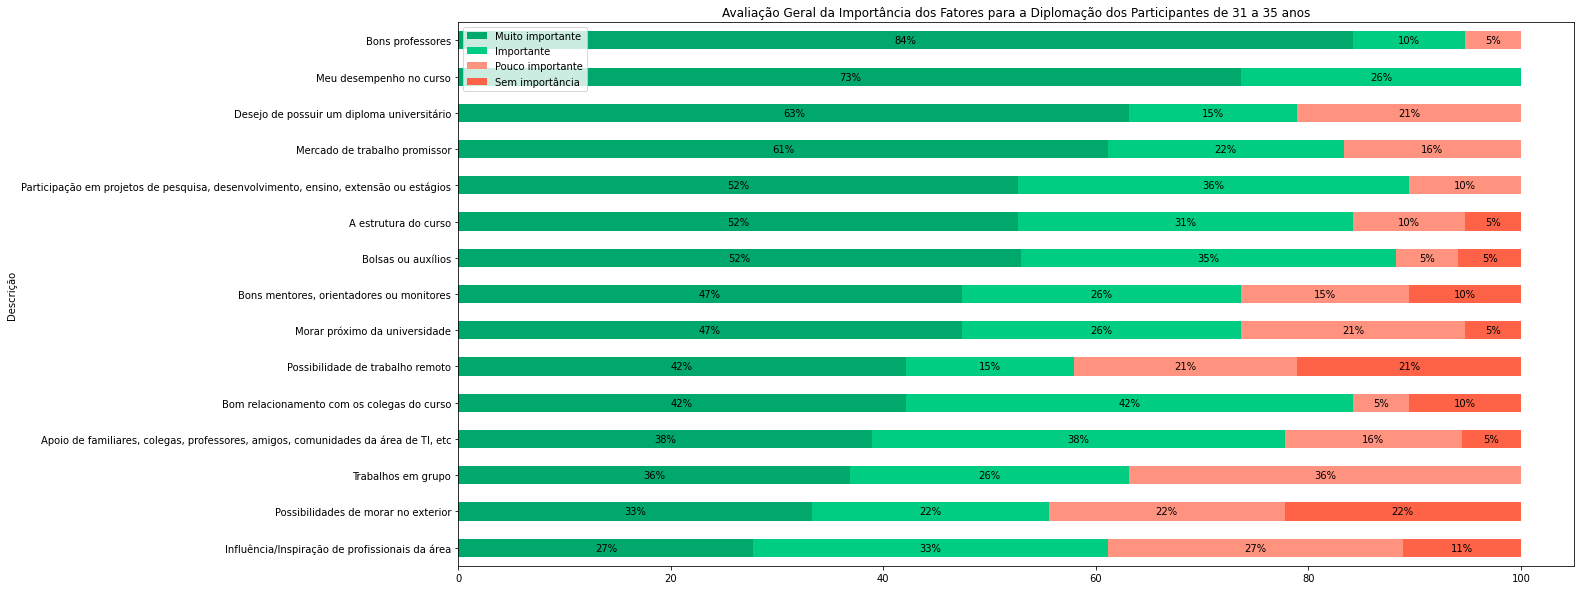

In [218]:
## MUITO IMPORTANTE
importancia_31_35 = pd.DataFrame({"Descrição": ["A estrutura do curso",
                                "Morar próximo da universidade", 
                                "Bom relacionamento com os colegas do curso", 
                                "Bons mentores, orientadores ou monitores", 
                                "Bons professores", 
                                "Trabalhos em grupo",
                                "Meu desempenho no curso", 
                                "Participação em projetos de pesquisa, desenvolvimento, ensino, extensão ou estágios", 
                                "Bolsas ou auxílios", 
                                "Desejo de possuir um diploma universitário", 
                                "Influência/Inspiração de profissionais da área",
                                "Possibilidades de morar no exterior",
                                "Mercado de trabalho promissor",
                                "Possibilidade de trabalho remoto",
                                "Apoio de familiares, colegas, professores, amigos, comunidades da área de TI, etc"],
                                "Muito importante": [df.query("IMP_INFRAESTRUTURA == 4").query("IDADE_CATEGORIAS == '31-35'")["IMP_INFRAESTRUTURA"].value_counts().to_frame().reset_index().iloc[0].IMP_INFRAESTRUTURA, 
                                              df.query("IMP_MORAR_PROXIMO == 4").query("IDADE_CATEGORIAS == '31-35'")["IMP_MORAR_PROXIMO"].value_counts().to_frame().reset_index().iloc[0].IMP_MORAR_PROXIMO, 
                                              df.query("IMP_NETWORK == 4").query("IDADE_CATEGORIAS == '31-35'")["IMP_NETWORK"].value_counts().to_frame().reset_index().iloc[0].IMP_NETWORK,
                                              df.query("IMP_BONS_MENTORES == 4").query("IDADE_CATEGORIAS == '31-35'")["IMP_BONS_MENTORES"].value_counts().to_frame().reset_index().iloc[0].IMP_BONS_MENTORES,
                                              df.query("IMP_BONS_PROFS == 4").query("IDADE_CATEGORIAS == '31-35'")["IMP_BONS_PROFS"].value_counts().to_frame().reset_index().iloc[0].IMP_BONS_PROFS,
                                              df.query("IMP_TRAB_GRUPO == 4").query("IDADE_CATEGORIAS == '31-35'")["IMP_TRAB_GRUPO"].value_counts().to_frame().reset_index().iloc[0].IMP_TRAB_GRUPO, 
                                              df.query("IMP_DESEMPENHO == 4").query("IDADE_CATEGORIAS == '31-35'")["IMP_DESEMPENHO"].value_counts().to_frame().reset_index().iloc[0].IMP_DESEMPENHO,
                                              df.query("IMP_PART_PROJETO == 4").query("IDADE_CATEGORIAS == '31-35'")["IMP_PART_PROJETO"].value_counts().to_frame().reset_index().iloc[0].IMP_PART_PROJETO,
                                              df.query("IMP_AUX_FIN == 4").query("IDADE_CATEGORIAS == '31-35'")["IMP_AUX_FIN"].value_counts().to_frame().reset_index().iloc[0].IMP_AUX_FIN,
                                              df.query("IMP_DIPLOMA == 4").query("IDADE_CATEGORIAS == '31-35'")["IMP_DIPLOMA"].value_counts().to_frame().reset_index().iloc[0].IMP_DIPLOMA, 
                                              df.query("IMP_INF_DE_OUTOS_PROFISSIONAIS == 4").query("IDADE_CATEGORIAS == '31-35'")["IMP_INF_DE_OUTOS_PROFISSIONAIS"].value_counts().to_frame().reset_index().iloc[0].IMP_INF_DE_OUTOS_PROFISSIONAIS,
                                              df.query("IMP_MORAR_NO_EXTERIOR == 4").query("IDADE_CATEGORIAS == '31-35'")["IMP_MORAR_NO_EXTERIOR"].value_counts().to_frame().reset_index().iloc[0].IMP_MORAR_NO_EXTERIOR,
                                              df.query("IMP_MERC_PROMISSOR == 4").query("IDADE_CATEGORIAS == '31-35'")["IMP_MERC_PROMISSOR"].value_counts().to_frame().reset_index().iloc[0].IMP_MERC_PROMISSOR,
                                              df.query("IMP_TRAB_REMOTO == 4").query("IDADE_CATEGORIAS == '31-35'")["IMP_TRAB_REMOTO"].value_counts().to_frame().reset_index().iloc[0].IMP_TRAB_REMOTO,
                                              df.query("IMP_APOIO == 4").query("IDADE_CATEGORIAS == '31-35'")["IMP_APOIO"].value_counts().to_frame().reset_index().iloc[0].IMP_APOIO],
                                  "Importante": [df.query("IMP_INFRAESTRUTURA == 3").query("IDADE_CATEGORIAS == '31-35'")["IMP_INFRAESTRUTURA"].value_counts().to_frame().reset_index().iloc[0].IMP_INFRAESTRUTURA, 
                                              df.query("IMP_MORAR_PROXIMO == 3").query("IDADE_CATEGORIAS == '31-35'")["IMP_MORAR_PROXIMO"].value_counts().to_frame().reset_index().iloc[0].IMP_MORAR_PROXIMO, 
                                              df.query("IMP_NETWORK == 3").query("IDADE_CATEGORIAS == '31-35'")["IMP_NETWORK"].value_counts().to_frame().reset_index().iloc[0].IMP_NETWORK,
                                              df.query("IMP_BONS_MENTORES == 3").query("IDADE_CATEGORIAS == '31-35'")["IMP_BONS_MENTORES"].value_counts().to_frame().reset_index().iloc[0].IMP_BONS_MENTORES,
                                              df.query("IMP_BONS_PROFS == 3").query("IDADE_CATEGORIAS == '31-35'")["IMP_BONS_PROFS"].value_counts().to_frame().reset_index().iloc[0].IMP_BONS_PROFS,
                                              df.query("IMP_TRAB_GRUPO == 3").query("IDADE_CATEGORIAS == '31-35'")["IMP_TRAB_GRUPO"].value_counts().to_frame().reset_index().iloc[0].IMP_TRAB_GRUPO,
                                              df.query("IMP_DESEMPENHO == 3").query("IDADE_CATEGORIAS == '31-35'")["IMP_DESEMPENHO"].value_counts().to_frame().reset_index().iloc[0].IMP_DESEMPENHO,
                                              df.query("IMP_PART_PROJETO == 3").query("IDADE_CATEGORIAS == '31-35'")["IMP_PART_PROJETO"].value_counts().to_frame().reset_index().iloc[0].IMP_PART_PROJETO,
                                              df.query("IMP_AUX_FIN == 3").query("IDADE_CATEGORIAS == '31-35'")["IMP_AUX_FIN"].value_counts().to_frame().reset_index().iloc[0].IMP_AUX_FIN,
                                              df.query("IMP_DIPLOMA == 3").query("IDADE_CATEGORIAS == '31-35'")["IMP_DIPLOMA"].value_counts().to_frame().reset_index().iloc[0].IMP_DIPLOMA, 
                                              df.query("IMP_INF_DE_OUTOS_PROFISSIONAIS == 3").query("IDADE_CATEGORIAS == '31-35'")["IMP_INF_DE_OUTOS_PROFISSIONAIS"].value_counts().to_frame().reset_index().iloc[0].IMP_INF_DE_OUTOS_PROFISSIONAIS,
                                              df.query("IMP_MORAR_NO_EXTERIOR == 3").query("IDADE_CATEGORIAS == '31-35'")["IMP_MORAR_NO_EXTERIOR"].value_counts().to_frame().reset_index().iloc[0].IMP_MORAR_NO_EXTERIOR,
                                              df.query("IMP_MERC_PROMISSOR == 3").query("IDADE_CATEGORIAS == '31-35'")["IMP_MERC_PROMISSOR"].value_counts().to_frame().reset_index().iloc[0].IMP_MERC_PROMISSOR,
                                              df.query("IMP_TRAB_REMOTO == 3").query("IDADE_CATEGORIAS == '31-35'")["IMP_TRAB_REMOTO"].value_counts().to_frame().reset_index().iloc[0].IMP_TRAB_REMOTO,
                                              df.query("IMP_APOIO == 3").query("IDADE_CATEGORIAS == '31-35'")["IMP_APOIO"].value_counts().to_frame().reset_index().iloc[0].IMP_APOIO], 
                                 "Pouco importante": [df.query("IMP_INFRAESTRUTURA == 2").query("IDADE_CATEGORIAS == '31-35'")["IMP_INFRAESTRUTURA"].value_counts().to_frame().reset_index().iloc[0].IMP_INFRAESTRUTURA, 
                                              df.query("IMP_MORAR_PROXIMO == 2").query("IDADE_CATEGORIAS == '31-35'")["IMP_MORAR_PROXIMO"].value_counts().to_frame().reset_index().iloc[0].IMP_MORAR_PROXIMO, 
                                              df.query("IMP_NETWORK == 2").query("IDADE_CATEGORIAS == '31-35'")["IMP_NETWORK"].value_counts().to_frame().reset_index().iloc[0].IMP_NETWORK,
                                              df.query("IMP_BONS_MENTORES == 2").query("IDADE_CATEGORIAS == '31-35'")["IMP_BONS_MENTORES"].value_counts().to_frame().reset_index().iloc[0].IMP_BONS_MENTORES,
                                              df.query("IMP_BONS_PROFS == 2").query("IDADE_CATEGORIAS == '31-35'")["IMP_BONS_PROFS"].value_counts().to_frame().reset_index().iloc[0].IMP_BONS_PROFS,
                                              df.query("IMP_TRAB_GRUPO == 2").query("IDADE_CATEGORIAS == '31-35'")["IMP_TRAB_GRUPO"].value_counts().to_frame().reset_index().iloc[0].IMP_TRAB_GRUPO, 
                                              0,
                                              df.query("IMP_PART_PROJETO == 2").query("IDADE_CATEGORIAS == '31-35'")["IMP_PART_PROJETO"].value_counts().to_frame().reset_index().iloc[0].IMP_PART_PROJETO,
                                              df.query("IMP_AUX_FIN == 2").query("IDADE_CATEGORIAS == '31-35'")["IMP_AUX_FIN"].value_counts().to_frame().reset_index().iloc[0].IMP_AUX_FIN,
                                              df.query("IMP_DIPLOMA == 2").query("IDADE_CATEGORIAS == '31-35'")["IMP_DIPLOMA"].value_counts().to_frame().reset_index().iloc[0].IMP_DIPLOMA, 
                                              df.query("IMP_INF_DE_OUTOS_PROFISSIONAIS == 2").query("IDADE_CATEGORIAS == '31-35'")["IMP_INF_DE_OUTOS_PROFISSIONAIS"].value_counts().to_frame().reset_index().iloc[0].IMP_INF_DE_OUTOS_PROFISSIONAIS,
                                              df.query("IMP_MORAR_NO_EXTERIOR == 2").query("IDADE_CATEGORIAS == '31-35'")["IMP_MORAR_NO_EXTERIOR"].value_counts().to_frame().reset_index().iloc[0].IMP_MORAR_NO_EXTERIOR,
                                              df.query("IMP_MERC_PROMISSOR == 2").query("IDADE_CATEGORIAS == '31-35'")["IMP_MERC_PROMISSOR"].value_counts().to_frame().reset_index().iloc[0].IMP_MERC_PROMISSOR,
                                              df.query("IMP_TRAB_REMOTO == 2").query("IDADE_CATEGORIAS == '31-35'")["IMP_TRAB_REMOTO"].value_counts().to_frame().reset_index().iloc[0].IMP_TRAB_REMOTO,
                                              df.query("IMP_APOIO == 2").query("IDADE_CATEGORIAS == '31-35'")["IMP_APOIO"].value_counts().to_frame().reset_index().iloc[0].IMP_APOIO],   
                                "Sem importância": [df.query("IMP_INFRAESTRUTURA == 1").query("IDADE_CATEGORIAS == '31-35'")["IMP_INFRAESTRUTURA"].value_counts().to_frame().reset_index().iloc[0].IMP_INFRAESTRUTURA, 
                                              df.query("IMP_MORAR_PROXIMO == 1").query("IDADE_CATEGORIAS == '31-35'")["IMP_MORAR_PROXIMO"].value_counts().to_frame().reset_index().iloc[0].IMP_MORAR_PROXIMO, 
                                              df.query("IMP_NETWORK == 1").query("IDADE_CATEGORIAS == '31-35'")["IMP_NETWORK"].value_counts().to_frame().reset_index().iloc[0].IMP_NETWORK,
                                              df.query("IMP_BONS_MENTORES == 1").query("IDADE_CATEGORIAS == '31-35'")["IMP_BONS_MENTORES"].value_counts().to_frame().reset_index().iloc[0].IMP_BONS_MENTORES,
                                              0,
                                              0, 
                                              0,
                                              0,
                                              df.query("IMP_AUX_FIN == 1").query("IDADE_CATEGORIAS == '31-35'")["IMP_AUX_FIN"].value_counts().to_frame().reset_index().iloc[0].IMP_AUX_FIN,
                                              0, 
                                              df.query("IMP_INF_DE_OUTOS_PROFISSIONAIS == 1").query("IDADE_CATEGORIAS == '31-35'")["IMP_INF_DE_OUTOS_PROFISSIONAIS"].value_counts().to_frame().reset_index().iloc[0].IMP_INF_DE_OUTOS_PROFISSIONAIS, 
                                              df.query("IMP_MORAR_NO_EXTERIOR == 1").query("IDADE_CATEGORIAS == '31-35'")["IMP_MORAR_NO_EXTERIOR"].value_counts().to_frame().reset_index().iloc[0].IMP_MORAR_NO_EXTERIOR,
                                              0,
                                              df.query("IMP_TRAB_REMOTO == 1").query("IDADE_CATEGORIAS == '31-35'")["IMP_TRAB_REMOTO"].value_counts().to_frame().reset_index().iloc[0].IMP_TRAB_REMOTO,
                                              df.query("IMP_APOIO == 1").query("IDADE_CATEGORIAS == '31-35'")["IMP_APOIO"].value_counts().to_frame().reset_index().iloc[0].IMP_APOIO
                                              ],
                                  })

plot_barh_empilhado(importancia_31_35.sort_values(by=['Muito importante'], ascending=True), 'Descrição', 'Avaliação Geral da Importância dos Fatores para a Diplomação dos Participantes de 31 a 35 anos', 20, 10, 'importancia')

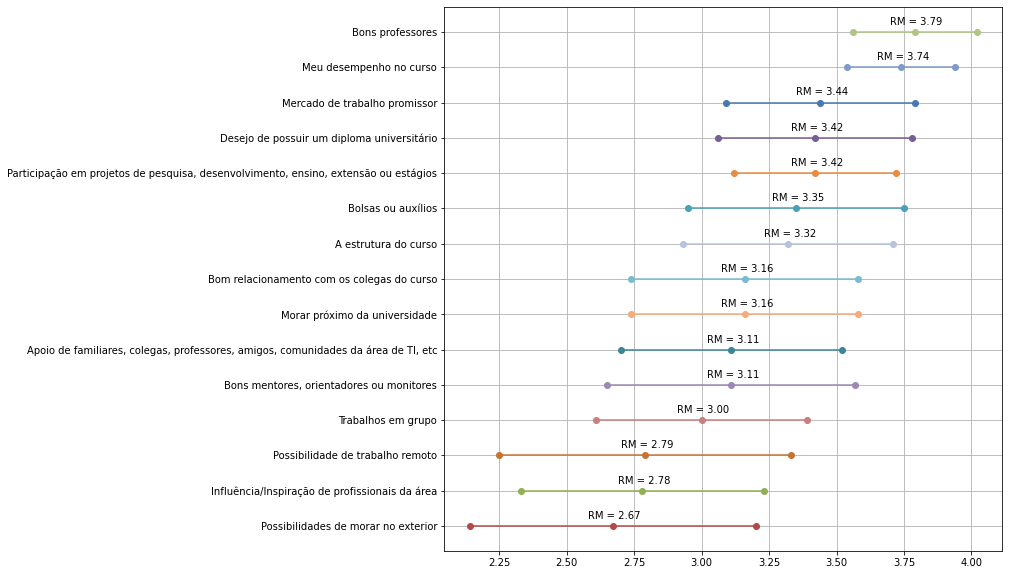

In [219]:
df_31_35 = df.query("IDADE_CATEGORIAS == '31-35'")

df_importancia_31_35 = pd.DataFrame({
    'Descrição': importancia_outros['Descrição'],
    'mean': [
        mediaRanking(df_31_35.query("IMP_INFRAESTRUTURA != 0")['IMP_INFRAESTRUTURA'].values.tolist()),
        mediaRanking(df_31_35.query("IMP_MORAR_PROXIMO != 0")['IMP_MORAR_PROXIMO'].values.tolist()),
        mediaRanking(df_31_35.query("IMP_NETWORK != 0")['IMP_NETWORK'].values.tolist()),
        mediaRanking(df_31_35.query("IMP_BONS_MENTORES != 0")['IMP_BONS_MENTORES'].values.tolist()),
        mediaRanking(df_31_35.query("IMP_BONS_PROFS != 0")['IMP_BONS_PROFS'].values.tolist()),
        mediaRanking(df_31_35.query("IMP_TRAB_GRUPO != 0")['IMP_TRAB_GRUPO'].values.tolist()),
        mediaRanking(df_31_35.query("IMP_DESEMPENHO != 0")['IMP_DESEMPENHO'].values.tolist()),
        mediaRanking(df_31_35.query("IMP_PART_PROJETO != 0")['IMP_PART_PROJETO'].values.tolist()),
        mediaRanking(df_31_35.query("IMP_AUX_FIN != 0")['IMP_AUX_FIN'].values.tolist()),
        mediaRanking(df_31_35.query("IMP_DIPLOMA != 0")['IMP_DIPLOMA'].values.tolist()),
        mediaRanking(df_31_35.query("IMP_INF_DE_OUTOS_PROFISSIONAIS != 0")['IMP_INF_DE_OUTOS_PROFISSIONAIS'].values.tolist()),
        mediaRanking(df_31_35.query("IMP_MORAR_NO_EXTERIOR != 0")['IMP_MORAR_NO_EXTERIOR'].values.tolist()),
        mediaRanking(df_31_35.query("IMP_MERC_PROMISSOR != 0")['IMP_MERC_PROMISSOR'].values.tolist()),
        mediaRanking(df_31_35.query("IMP_TRAB_REMOTO != 0")['IMP_TRAB_REMOTO'].values.tolist()),
        mediaRanking(df_31_35.query("IMP_APOIO != 0")['IMP_APOIO'].values.tolist())
        ],
    'top_confidence_interval': [
        intervalo_de_confianca(df_31_35.query("IMP_INFRAESTRUTURA != 0")['IMP_INFRAESTRUTURA'].values.tolist())[0],
        intervalo_de_confianca(df_31_35.query("IMP_MORAR_PROXIMO != 0")['IMP_MORAR_PROXIMO'].values.tolist())[0],
        intervalo_de_confianca(df_31_35.query("IMP_NETWORK != 0")['IMP_NETWORK'].values.tolist())[0],
        intervalo_de_confianca(df_31_35.query("IMP_BONS_MENTORES != 0")['IMP_BONS_MENTORES'].values.tolist())[0],
        intervalo_de_confianca(df_31_35.query("IMP_BONS_PROFS != 0")['IMP_BONS_PROFS'].values.tolist())[0],
        intervalo_de_confianca(df_31_35.query("IMP_TRAB_GRUPO != 0")['IMP_TRAB_GRUPO'].values.tolist())[0],
        intervalo_de_confianca(df_31_35.query("IMP_DESEMPENHO != 0")['IMP_DESEMPENHO'].values.tolist())[0],
        intervalo_de_confianca(df_31_35.query("IMP_PART_PROJETO != 0")['IMP_PART_PROJETO'].values.tolist())[0],
        intervalo_de_confianca(df_31_35.query("IMP_AUX_FIN != 0")['IMP_AUX_FIN'].values.tolist())[0],
        intervalo_de_confianca(df_31_35.query("IMP_DIPLOMA != 0")['IMP_DIPLOMA'].values.tolist())[0],
        intervalo_de_confianca(df_31_35.query("IMP_INF_DE_OUTOS_PROFISSIONAIS != 0")['IMP_INF_DE_OUTOS_PROFISSIONAIS'].values.tolist())[0],
        intervalo_de_confianca(df_31_35.query("IMP_MORAR_NO_EXTERIOR != 0")['IMP_MORAR_NO_EXTERIOR'].values.tolist())[0],
        intervalo_de_confianca(df_31_35.query("IMP_MERC_PROMISSOR != 0")['IMP_MERC_PROMISSOR'].values.tolist())[0],
        intervalo_de_confianca(df_31_35.query("IMP_TRAB_REMOTO != 0")['IMP_TRAB_REMOTO'].values.tolist())[0],
        intervalo_de_confianca(df_31_35.query("IMP_APOIO != 0")['IMP_APOIO'].values.tolist())[0]
    ],
    'bottom_confidence_interval': [
        intervalo_de_confianca(df_31_35.query("IMP_INFRAESTRUTURA != 0")['IMP_INFRAESTRUTURA'].values.tolist())[1],
        intervalo_de_confianca(df_31_35.query("IMP_MORAR_PROXIMO != 0")['IMP_MORAR_PROXIMO'].values.tolist())[1],
        intervalo_de_confianca(df_31_35.query("IMP_NETWORK != 0")['IMP_NETWORK'].values.tolist())[1],
        intervalo_de_confianca(df_31_35.query("IMP_BONS_MENTORES != 0")['IMP_BONS_MENTORES'].values.tolist())[1],
        intervalo_de_confianca(df_31_35.query("IMP_BONS_PROFS != 0")['IMP_BONS_PROFS'].values.tolist())[1],
        intervalo_de_confianca(df_31_35.query("IMP_TRAB_GRUPO != 0")['IMP_TRAB_GRUPO'].values.tolist())[1],
        intervalo_de_confianca(df_31_35.query("IMP_DESEMPENHO != 0")['IMP_DESEMPENHO'].values.tolist())[1],
        intervalo_de_confianca(df_31_35.query("IMP_PART_PROJETO != 0")['IMP_PART_PROJETO'].values.tolist())[1],
        intervalo_de_confianca(df_31_35.query("IMP_AUX_FIN != 0")['IMP_AUX_FIN'].values.tolist())[1],
        intervalo_de_confianca(df_31_35.query("IMP_DIPLOMA != 0")['IMP_DIPLOMA'].values.tolist())[1],
        intervalo_de_confianca(df_31_35.query("IMP_INF_DE_OUTOS_PROFISSIONAIS != 0")['IMP_INF_DE_OUTOS_PROFISSIONAIS'].values.tolist())[1],
        intervalo_de_confianca(df_31_35.query("IMP_MORAR_NO_EXTERIOR != 0")['IMP_MORAR_NO_EXTERIOR'].values.tolist())[1],
        intervalo_de_confianca(df_31_35.query("IMP_MERC_PROMISSOR != 0")['IMP_MERC_PROMISSOR'].values.tolist())[1],
        intervalo_de_confianca(df_31_35.query("IMP_TRAB_REMOTO != 0")['IMP_TRAB_REMOTO'].values.tolist())[1],
        intervalo_de_confianca(df_31_35.query("IMP_APOIO != 0")['IMP_APOIO'].values.tolist())[1]
    ]
})

df_importancia_31_35.sort_values(by=['mean'], ascending=True, ignore_index=True, inplace=True)

#https://stackoverflow.com/questions/59747313/how-can-i-plot-a-confidence-interval-in-python
plot_grafico_intervalo_de_confianca(df_importancia_31_35)

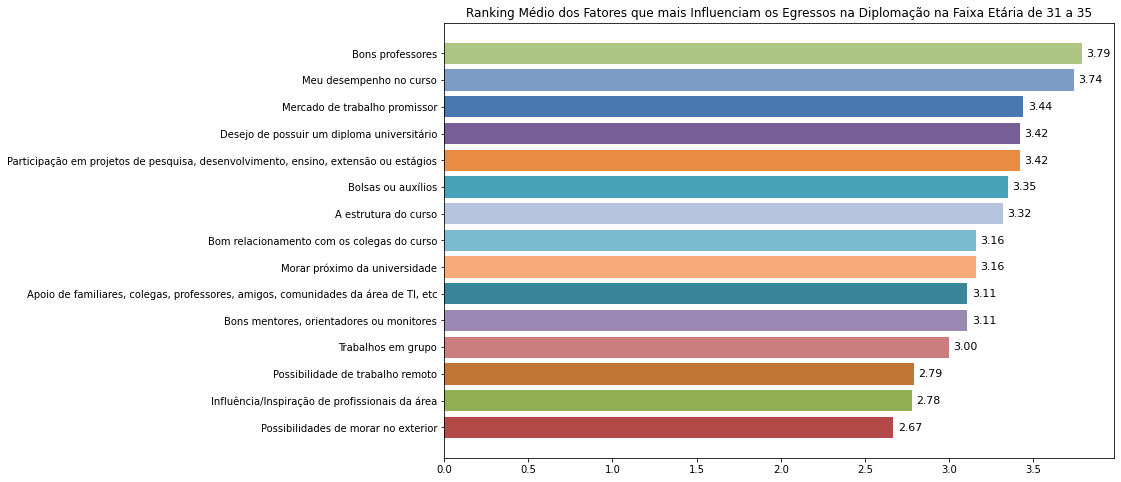

In [220]:
plotGraficoMediaRanking("Ranking Médio dos Fatores que mais Influenciam os Egressos na Diplomação na Faixa Etária de 31 a 35", 8, 12, 
                        df_importancia_31_35['Descrição'].values, df_importancia_31_35['mean'].values, 
                        df_importancia_31_35['mean'].values)

### 36+

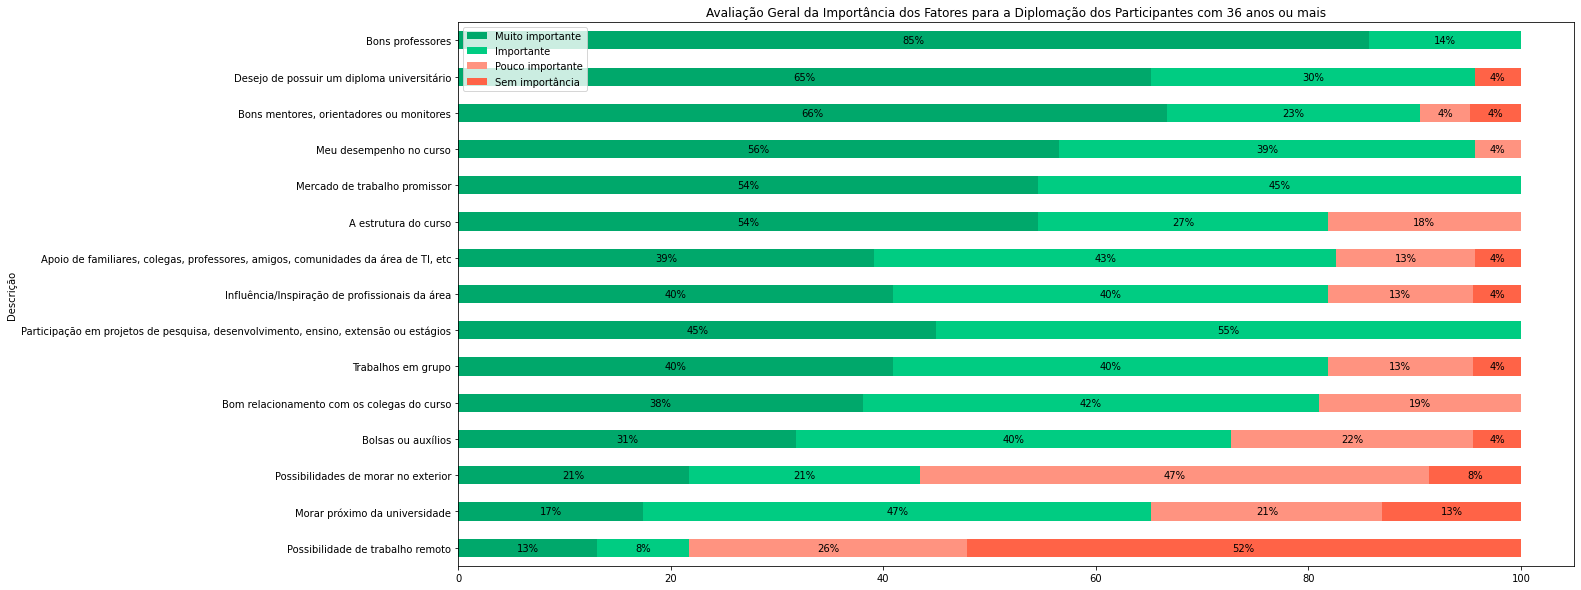

In [221]:
## MUITO IMPORTANTE
importancia_36_Mais = pd.DataFrame({"Descrição": ["A estrutura do curso",
                                "Morar próximo da universidade", 
                                "Bom relacionamento com os colegas do curso", 
                                "Bons mentores, orientadores ou monitores", 
                                "Bons professores", 
                                "Trabalhos em grupo",
                                "Meu desempenho no curso", 
                                "Participação em projetos de pesquisa, desenvolvimento, ensino, extensão ou estágios", 
                                "Bolsas ou auxílios", 
                                "Desejo de possuir um diploma universitário", 
                                "Influência/Inspiração de profissionais da área",
                                "Possibilidades de morar no exterior",
                                "Mercado de trabalho promissor",
                                "Possibilidade de trabalho remoto",
                                "Apoio de familiares, colegas, professores, amigos, comunidades da área de TI, etc"],
                                "Muito importante": [df.query("IMP_INFRAESTRUTURA == 4").query("IDADE_CATEGORIAS == '36+'")["IMP_INFRAESTRUTURA"].value_counts().to_frame().reset_index().iloc[0].IMP_INFRAESTRUTURA, 
                                              df.query("IMP_MORAR_PROXIMO == 4").query("IDADE_CATEGORIAS == '36+'")["IMP_MORAR_PROXIMO"].value_counts().to_frame().reset_index().iloc[0].IMP_MORAR_PROXIMO, 
                                              df.query("IMP_NETWORK == 4").query("IDADE_CATEGORIAS == '36+'")["IMP_NETWORK"].value_counts().to_frame().reset_index().iloc[0].IMP_NETWORK,
                                              df.query("IMP_BONS_MENTORES == 4").query("IDADE_CATEGORIAS == '36+'")["IMP_BONS_MENTORES"].value_counts().to_frame().reset_index().iloc[0].IMP_BONS_MENTORES,
                                              df.query("IMP_BONS_PROFS == 4").query("IDADE_CATEGORIAS == '36+'")["IMP_BONS_PROFS"].value_counts().to_frame().reset_index().iloc[0].IMP_BONS_PROFS,
                                              df.query("IMP_TRAB_GRUPO == 4").query("IDADE_CATEGORIAS == '36+'")["IMP_TRAB_GRUPO"].value_counts().to_frame().reset_index().iloc[0].IMP_TRAB_GRUPO, 
                                              df.query("IMP_DESEMPENHO == 4").query("IDADE_CATEGORIAS == '36+'")["IMP_DESEMPENHO"].value_counts().to_frame().reset_index().iloc[0].IMP_DESEMPENHO,
                                              df.query("IMP_PART_PROJETO == 4").query("IDADE_CATEGORIAS == '36+'")["IMP_PART_PROJETO"].value_counts().to_frame().reset_index().iloc[0].IMP_PART_PROJETO,
                                              df.query("IMP_AUX_FIN == 4").query("IDADE_CATEGORIAS == '36+'")["IMP_AUX_FIN"].value_counts().to_frame().reset_index().iloc[0].IMP_AUX_FIN,
                                              df.query("IMP_DIPLOMA == 4").query("IDADE_CATEGORIAS == '36+'")["IMP_DIPLOMA"].value_counts().to_frame().reset_index().iloc[0].IMP_DIPLOMA, 
                                              df.query("IMP_INF_DE_OUTOS_PROFISSIONAIS == 4").query("IDADE_CATEGORIAS == '36+'")["IMP_INF_DE_OUTOS_PROFISSIONAIS"].value_counts().to_frame().reset_index().iloc[0].IMP_INF_DE_OUTOS_PROFISSIONAIS,
                                              df.query("IMP_MORAR_NO_EXTERIOR == 4").query("IDADE_CATEGORIAS == '36+'")["IMP_MORAR_NO_EXTERIOR"].value_counts().to_frame().reset_index().iloc[0].IMP_MORAR_NO_EXTERIOR,
                                              df.query("IMP_MERC_PROMISSOR == 4").query("IDADE_CATEGORIAS == '36+'")["IMP_MERC_PROMISSOR"].value_counts().to_frame().reset_index().iloc[0].IMP_MERC_PROMISSOR,
                                              df.query("IMP_TRAB_REMOTO == 4").query("IDADE_CATEGORIAS == '36+'")["IMP_TRAB_REMOTO"].value_counts().to_frame().reset_index().iloc[0].IMP_TRAB_REMOTO,
                                              df.query("IMP_APOIO == 4").query("IDADE_CATEGORIAS == '36+'")["IMP_APOIO"].value_counts().to_frame().reset_index().iloc[0].IMP_APOIO],
                                  "Importante": [df.query("IMP_INFRAESTRUTURA == 3").query("IDADE_CATEGORIAS == '36+'")["IMP_INFRAESTRUTURA"].value_counts().to_frame().reset_index().iloc[0].IMP_INFRAESTRUTURA, 
                                              df.query("IMP_MORAR_PROXIMO == 3").query("IDADE_CATEGORIAS == '36+'")["IMP_MORAR_PROXIMO"].value_counts().to_frame().reset_index().iloc[0].IMP_MORAR_PROXIMO, 
                                              df.query("IMP_NETWORK == 3").query("IDADE_CATEGORIAS == '36+'")["IMP_NETWORK"].value_counts().to_frame().reset_index().iloc[0].IMP_NETWORK,
                                              df.query("IMP_BONS_MENTORES == 3").query("IDADE_CATEGORIAS == '36+'")["IMP_BONS_MENTORES"].value_counts().to_frame().reset_index().iloc[0].IMP_BONS_MENTORES,
                                              df.query("IMP_BONS_PROFS == 3").query("IDADE_CATEGORIAS == '36+'")["IMP_BONS_PROFS"].value_counts().to_frame().reset_index().iloc[0].IMP_BONS_PROFS,
                                              df.query("IMP_TRAB_GRUPO == 3").query("IDADE_CATEGORIAS == '36+'")["IMP_TRAB_GRUPO"].value_counts().to_frame().reset_index().iloc[0].IMP_TRAB_GRUPO,
                                              df.query("IMP_DESEMPENHO == 3").query("IDADE_CATEGORIAS == '36+'")["IMP_DESEMPENHO"].value_counts().to_frame().reset_index().iloc[0].IMP_DESEMPENHO,
                                              df.query("IMP_PART_PROJETO == 3").query("IDADE_CATEGORIAS == '36+'")["IMP_PART_PROJETO"].value_counts().to_frame().reset_index().iloc[0].IMP_PART_PROJETO,
                                              df.query("IMP_AUX_FIN == 3").query("IDADE_CATEGORIAS == '36+'")["IMP_AUX_FIN"].value_counts().to_frame().reset_index().iloc[0].IMP_AUX_FIN,
                                              df.query("IMP_DIPLOMA == 3").query("IDADE_CATEGORIAS == '36+'")["IMP_DIPLOMA"].value_counts().to_frame().reset_index().iloc[0].IMP_DIPLOMA, 
                                              df.query("IMP_INF_DE_OUTOS_PROFISSIONAIS == 3").query("IDADE_CATEGORIAS == '36+'")["IMP_INF_DE_OUTOS_PROFISSIONAIS"].value_counts().to_frame().reset_index().iloc[0].IMP_INF_DE_OUTOS_PROFISSIONAIS,
                                              df.query("IMP_MORAR_NO_EXTERIOR == 3").query("IDADE_CATEGORIAS == '36+'")["IMP_MORAR_NO_EXTERIOR"].value_counts().to_frame().reset_index().iloc[0].IMP_MORAR_NO_EXTERIOR,
                                              df.query("IMP_MERC_PROMISSOR == 3").query("IDADE_CATEGORIAS == '36+'")["IMP_MERC_PROMISSOR"].value_counts().to_frame().reset_index().iloc[0].IMP_MERC_PROMISSOR,
                                              df.query("IMP_TRAB_REMOTO == 3").query("IDADE_CATEGORIAS == '36+'")["IMP_TRAB_REMOTO"].value_counts().to_frame().reset_index().iloc[0].IMP_TRAB_REMOTO,
                                              df.query("IMP_APOIO == 3").query("IDADE_CATEGORIAS == '36+'")["IMP_APOIO"].value_counts().to_frame().reset_index().iloc[0].IMP_APOIO], 
                                 "Pouco importante": [df.query("IMP_INFRAESTRUTURA == 2").query("IDADE_CATEGORIAS == '36+'")["IMP_INFRAESTRUTURA"].value_counts().to_frame().reset_index().iloc[0].IMP_INFRAESTRUTURA, 
                                              df.query("IMP_MORAR_PROXIMO == 2").query("IDADE_CATEGORIAS == '36+'")["IMP_MORAR_PROXIMO"].value_counts().to_frame().reset_index().iloc[0].IMP_MORAR_PROXIMO, 
                                              df.query("IMP_NETWORK == 2").query("IDADE_CATEGORIAS == '36+'")["IMP_NETWORK"].value_counts().to_frame().reset_index().iloc[0].IMP_NETWORK,
                                              df.query("IMP_BONS_MENTORES == 2").query("IDADE_CATEGORIAS == '36+'")["IMP_BONS_MENTORES"].value_counts().to_frame().reset_index().iloc[0].IMP_BONS_MENTORES,
                                              0,
                                              df.query("IMP_TRAB_GRUPO == 2").query("IDADE_CATEGORIAS == '36+'")["IMP_TRAB_GRUPO"].value_counts().to_frame().reset_index().iloc[0].IMP_TRAB_GRUPO, 
                                              df.query("IMP_DESEMPENHO == 2").query("IDADE_CATEGORIAS == '36+'")["IMP_DESEMPENHO"].value_counts().to_frame().reset_index().iloc[0].IMP_DESEMPENHO,
                                              0,
                                              df.query("IMP_AUX_FIN == 2").query("IDADE_CATEGORIAS == '36+'")["IMP_AUX_FIN"].value_counts().to_frame().reset_index().iloc[0].IMP_AUX_FIN,
                                              0, 
                                              df.query("IMP_INF_DE_OUTOS_PROFISSIONAIS == 2").query("IDADE_CATEGORIAS == '36+'")["IMP_INF_DE_OUTOS_PROFISSIONAIS"].value_counts().to_frame().reset_index().iloc[0].IMP_INF_DE_OUTOS_PROFISSIONAIS,
                                              df.query("IMP_MORAR_NO_EXTERIOR == 2").query("IDADE_CATEGORIAS == '36+'")["IMP_MORAR_NO_EXTERIOR"].value_counts().to_frame().reset_index().iloc[0].IMP_MORAR_NO_EXTERIOR,
                                              0,
                                              df.query("IMP_TRAB_REMOTO == 2").query("IDADE_CATEGORIAS == '36+'")["IMP_TRAB_REMOTO"].value_counts().to_frame().reset_index().iloc[0].IMP_TRAB_REMOTO,
                                              df.query("IMP_APOIO == 2").query("IDADE_CATEGORIAS == '36+'")["IMP_APOIO"].value_counts().to_frame().reset_index().iloc[0].IMP_APOIO],   
                                "Sem importância": [0, 
                                              df.query("IMP_MORAR_PROXIMO == 1").query("IDADE_CATEGORIAS == '36+'")["IMP_MORAR_PROXIMO"].value_counts().to_frame().reset_index().iloc[0].IMP_MORAR_PROXIMO, 
                                              0,
                                              df.query("IMP_BONS_MENTORES == 1").query("IDADE_CATEGORIAS == '36+'")["IMP_BONS_MENTORES"].value_counts().to_frame().reset_index().iloc[0].IMP_BONS_MENTORES,
                                              0,
                                              df.query("IMP_TRAB_GRUPO == 1").query("IDADE_CATEGORIAS == '36+'")["IMP_TRAB_GRUPO"].value_counts().to_frame().reset_index().iloc[0].IMP_TRAB_GRUPO, 
                                              0,
                                              0,
                                              df.query("IMP_AUX_FIN == 1").query("IDADE_CATEGORIAS == '36+'")["IMP_AUX_FIN"].value_counts().to_frame().reset_index().iloc[0].IMP_AUX_FIN,
                                              df.query("IMP_DIPLOMA == 1").query("IDADE_CATEGORIAS == '36+'")["IMP_DIPLOMA"].value_counts().to_frame().reset_index().iloc[0].IMP_DIPLOMA, 
                                              df.query("IMP_INF_DE_OUTOS_PROFISSIONAIS == 1").query("IDADE_CATEGORIAS == '36+'")["IMP_INF_DE_OUTOS_PROFISSIONAIS"].value_counts().to_frame().reset_index().iloc[0].IMP_INF_DE_OUTOS_PROFISSIONAIS, 
                                              df.query("IMP_MORAR_NO_EXTERIOR == 1").query("IDADE_CATEGORIAS == '36+'")["IMP_MORAR_NO_EXTERIOR"].value_counts().to_frame().reset_index().iloc[0].IMP_MORAR_NO_EXTERIOR,
                                              0,
                                              df.query("IMP_TRAB_REMOTO == 1").query("IDADE_CATEGORIAS == '36+'")["IMP_TRAB_REMOTO"].value_counts().to_frame().reset_index().iloc[0].IMP_TRAB_REMOTO,
                                              df.query("IMP_APOIO == 1").query("IDADE_CATEGORIAS == '36+'")["IMP_APOIO"].value_counts().to_frame().reset_index().iloc[0].IMP_APOIO]
                                  })

plot_barh_empilhado(importancia_36_Mais.sort_values(by=['Muito importante'], ascending=True), 'Descrição', 'Avaliação Geral da Importância dos Fatores para a Diplomação dos Participantes com 36 anos ou mais', 20, 10, 'importancia')

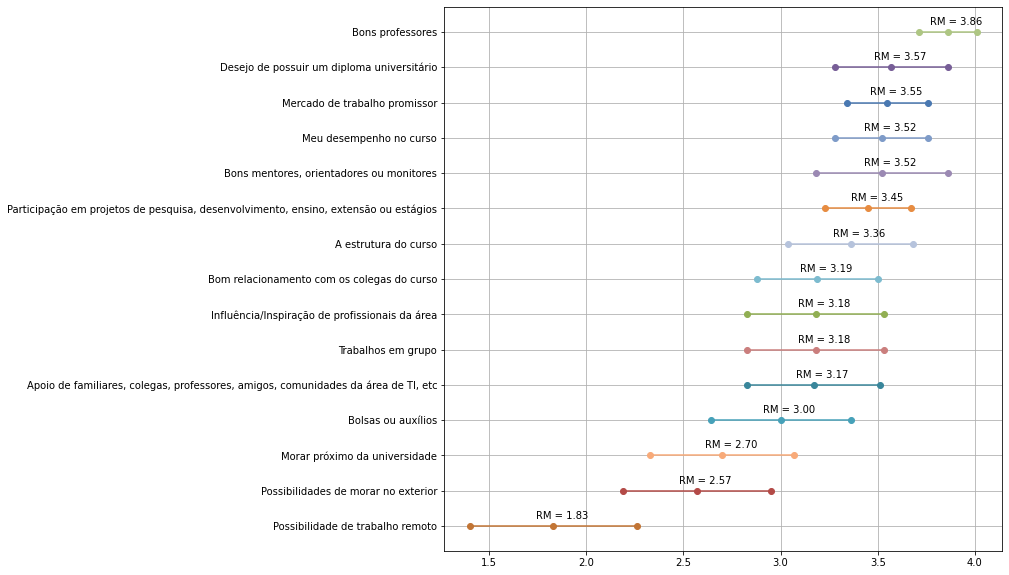

In [222]:
df_36_Mais = df.query("IDADE_CATEGORIAS == '36+'")

df_importancia_36_Mais = pd.DataFrame({
    'Descrição': importancia_36_Mais['Descrição'],
    'mean': [
        mediaRanking(df_36_Mais.query("IMP_INFRAESTRUTURA != 0")['IMP_INFRAESTRUTURA'].values.tolist()),
        mediaRanking(df_36_Mais.query("IMP_MORAR_PROXIMO != 0")['IMP_MORAR_PROXIMO'].values.tolist()),
        mediaRanking(df_36_Mais.query("IMP_NETWORK != 0")['IMP_NETWORK'].values.tolist()),
        mediaRanking(df_36_Mais.query("IMP_BONS_MENTORES != 0")['IMP_BONS_MENTORES'].values.tolist()),
        mediaRanking(df_36_Mais.query("IMP_BONS_PROFS != 0")['IMP_BONS_PROFS'].values.tolist()),
        mediaRanking(df_36_Mais.query("IMP_TRAB_GRUPO != 0")['IMP_TRAB_GRUPO'].values.tolist()),
        mediaRanking(df_36_Mais.query("IMP_DESEMPENHO != 0")['IMP_DESEMPENHO'].values.tolist()),
        mediaRanking(df_36_Mais.query("IMP_PART_PROJETO != 0")['IMP_PART_PROJETO'].values.tolist()),
        mediaRanking(df_36_Mais.query("IMP_AUX_FIN != 0")['IMP_AUX_FIN'].values.tolist()),
        mediaRanking(df_36_Mais.query("IMP_DIPLOMA != 0")['IMP_DIPLOMA'].values.tolist()),
        mediaRanking(df_36_Mais.query("IMP_INF_DE_OUTOS_PROFISSIONAIS != 0")['IMP_INF_DE_OUTOS_PROFISSIONAIS'].values.tolist()),
        mediaRanking(df_36_Mais.query("IMP_MORAR_NO_EXTERIOR != 0")['IMP_MORAR_NO_EXTERIOR'].values.tolist()),
        mediaRanking(df_36_Mais.query("IMP_MERC_PROMISSOR != 0")['IMP_MERC_PROMISSOR'].values.tolist()),
        mediaRanking(df_36_Mais.query("IMP_TRAB_REMOTO != 0")['IMP_TRAB_REMOTO'].values.tolist()),
        mediaRanking(df_36_Mais.query("IMP_APOIO != 0")['IMP_APOIO'].values.tolist())
        ],
    'top_confidence_interval': [
        intervalo_de_confianca(df_36_Mais.query("IMP_INFRAESTRUTURA != 0")['IMP_INFRAESTRUTURA'].values.tolist())[0],
        intervalo_de_confianca(df_36_Mais.query("IMP_MORAR_PROXIMO != 0")['IMP_MORAR_PROXIMO'].values.tolist())[0],
        intervalo_de_confianca(df_36_Mais.query("IMP_NETWORK != 0")['IMP_NETWORK'].values.tolist())[0],
        intervalo_de_confianca(df_36_Mais.query("IMP_BONS_MENTORES != 0")['IMP_BONS_MENTORES'].values.tolist())[0],
        intervalo_de_confianca(df_36_Mais.query("IMP_BONS_PROFS != 0")['IMP_BONS_PROFS'].values.tolist())[0],
        intervalo_de_confianca(df_36_Mais.query("IMP_TRAB_GRUPO != 0")['IMP_TRAB_GRUPO'].values.tolist())[0],
        intervalo_de_confianca(df_36_Mais.query("IMP_DESEMPENHO != 0")['IMP_DESEMPENHO'].values.tolist())[0],
        intervalo_de_confianca(df_36_Mais.query("IMP_PART_PROJETO != 0")['IMP_PART_PROJETO'].values.tolist())[0],
        intervalo_de_confianca(df_36_Mais.query("IMP_AUX_FIN != 0")['IMP_AUX_FIN'].values.tolist())[0],
        intervalo_de_confianca(df_36_Mais.query("IMP_DIPLOMA != 0")['IMP_DIPLOMA'].values.tolist())[0],
        intervalo_de_confianca(df_36_Mais.query("IMP_INF_DE_OUTOS_PROFISSIONAIS != 0")['IMP_INF_DE_OUTOS_PROFISSIONAIS'].values.tolist())[0],
        intervalo_de_confianca(df_36_Mais.query("IMP_MORAR_NO_EXTERIOR != 0")['IMP_MORAR_NO_EXTERIOR'].values.tolist())[0],
        intervalo_de_confianca(df_36_Mais.query("IMP_MERC_PROMISSOR != 0")['IMP_MERC_PROMISSOR'].values.tolist())[0],
        intervalo_de_confianca(df_36_Mais.query("IMP_TRAB_REMOTO != 0")['IMP_TRAB_REMOTO'].values.tolist())[0],
        intervalo_de_confianca(df_36_Mais.query("IMP_APOIO != 0")['IMP_APOIO'].values.tolist())[0]
    ],
    'bottom_confidence_interval': [
        intervalo_de_confianca(df_36_Mais.query("IMP_INFRAESTRUTURA != 0")['IMP_INFRAESTRUTURA'].values.tolist())[1],
        intervalo_de_confianca(df_36_Mais.query("IMP_MORAR_PROXIMO != 0")['IMP_MORAR_PROXIMO'].values.tolist())[1],
        intervalo_de_confianca(df_36_Mais.query("IMP_NETWORK != 0")['IMP_NETWORK'].values.tolist())[1],
        intervalo_de_confianca(df_36_Mais.query("IMP_BONS_MENTORES != 0")['IMP_BONS_MENTORES'].values.tolist())[1],
        intervalo_de_confianca(df_36_Mais.query("IMP_BONS_PROFS != 0")['IMP_BONS_PROFS'].values.tolist())[1],
        intervalo_de_confianca(df_36_Mais.query("IMP_TRAB_GRUPO != 0")['IMP_TRAB_GRUPO'].values.tolist())[1],
        intervalo_de_confianca(df_36_Mais.query("IMP_DESEMPENHO != 0")['IMP_DESEMPENHO'].values.tolist())[1],
        intervalo_de_confianca(df_36_Mais.query("IMP_PART_PROJETO != 0")['IMP_PART_PROJETO'].values.tolist())[1],
        intervalo_de_confianca(df_36_Mais.query("IMP_AUX_FIN != 0")['IMP_AUX_FIN'].values.tolist())[1],
        intervalo_de_confianca(df_36_Mais.query("IMP_DIPLOMA != 0")['IMP_DIPLOMA'].values.tolist())[1],
        intervalo_de_confianca(df_36_Mais.query("IMP_INF_DE_OUTOS_PROFISSIONAIS != 0")['IMP_INF_DE_OUTOS_PROFISSIONAIS'].values.tolist())[1],
        intervalo_de_confianca(df_36_Mais.query("IMP_MORAR_NO_EXTERIOR != 0")['IMP_MORAR_NO_EXTERIOR'].values.tolist())[1],
        intervalo_de_confianca(df_36_Mais.query("IMP_MERC_PROMISSOR != 0")['IMP_MERC_PROMISSOR'].values.tolist())[1],
        intervalo_de_confianca(df_36_Mais.query("IMP_TRAB_REMOTO != 0")['IMP_TRAB_REMOTO'].values.tolist())[1],
        intervalo_de_confianca(df_36_Mais.query("IMP_APOIO != 0")['IMP_APOIO'].values.tolist())[1]
    ]
})

df_importancia_36_Mais.sort_values(by=['mean'], ascending=True, ignore_index=True, inplace=True)

#https://stackoverflow.com/questions/59747313/how-can-i-plot-a-confidence-interval-in-python
plot_grafico_intervalo_de_confianca(df_importancia_36_Mais)

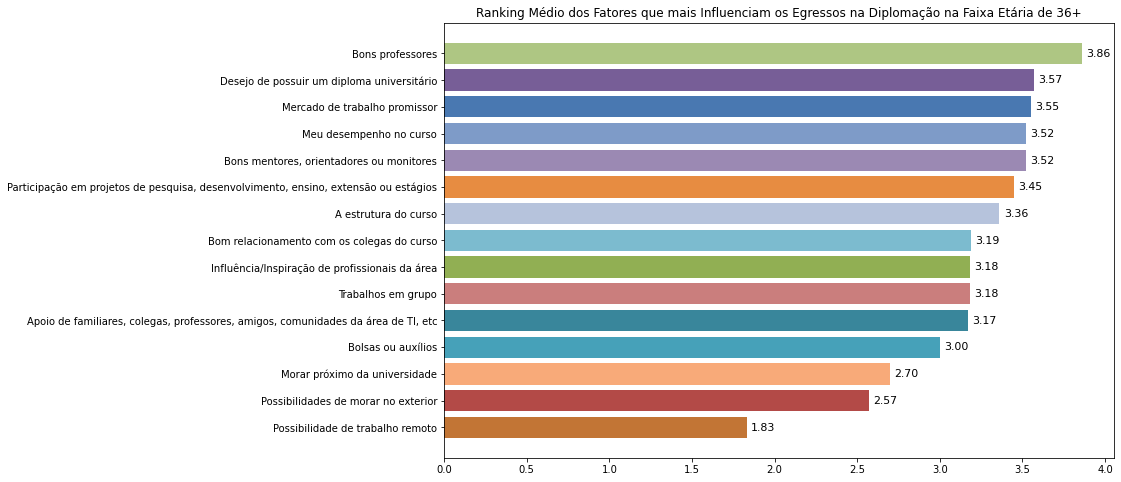

In [223]:
plotGraficoMediaRanking("Ranking Médio dos Fatores que mais Influenciam os Egressos na Diplomação na Faixa Etária de 36+", 8, 12, 
                        df_importancia_36_Mais['Descrição'].values, df_importancia_36_Mais['mean'].values, 
                        df_importancia_36_Mais['mean'].values)

## Tabela com todas as médias

In [230]:
todas_as_medias_homens_mulheres = pd.DataFrame({
    'Nome do Fator': [
        "A estrutura do curso",
        "Morar próximo da universidade", 
        "Bom relacionamento com os colegas do curso", 
        "Bons mentores, orientadores ou monitores", 
        "Bons professores", 
        "Trabalhos em grupo",
        "Meu desempenho no curso", 
        "Participação em projetos de pesquisa, desenvolvimento, ensino, extensão ou estágios", 
        "Bolsas ou auxílios", 
        "Desejo de possuir um diploma universitário", 
        "Influência/Inspiração de profissionais da área",
        "Possibilidades de morar no exterior",
        "Mercado de trabalho promissor",
        "Possibilidade de trabalho remoto",
        "Apoio de familiares, colegas, professores, amigos, comunidades da área de TI, etc"
    ],
    'RM Geral': [
        mediaRanking(df.query("IMP_INFRAESTRUTURA != 0")['IMP_INFRAESTRUTURA'].values.tolist()),
        mediaRanking(df.query("IMP_MORAR_PROXIMO != 0")['IMP_MORAR_PROXIMO'].values.tolist()),
        mediaRanking(df.query("IMP_NETWORK != 0")['IMP_NETWORK'].values.tolist()),
        mediaRanking(df.query("IMP_BONS_MENTORES != 0")['IMP_BONS_MENTORES'].values.tolist()),
        mediaRanking(df.query("IMP_BONS_PROFS != 0")['IMP_BONS_PROFS'].values.tolist()),
        mediaRanking(df.query("IMP_TRAB_GRUPO != 0")['IMP_TRAB_GRUPO'].values.tolist()),
        mediaRanking(df.query("IMP_DESEMPENHO != 0")['IMP_DESEMPENHO'].values.tolist()),
        mediaRanking(df.query("IMP_PART_PROJETO != 0")['IMP_PART_PROJETO'].values.tolist()),
        mediaRanking(df.query("IMP_AUX_FIN != 0")['IMP_AUX_FIN'].values.tolist()),
        mediaRanking(df.query("IMP_DIPLOMA != 0")['IMP_DIPLOMA'].values.tolist()),
        mediaRanking(df.query("IMP_INF_DE_OUTOS_PROFISSIONAIS != 0")['IMP_INF_DE_OUTOS_PROFISSIONAIS'].values.tolist()),
        mediaRanking(df.query("IMP_MORAR_NO_EXTERIOR != 0")['IMP_MORAR_NO_EXTERIOR'].values.tolist()),
        mediaRanking(df.query("IMP_MERC_PROMISSOR != 0")['IMP_MERC_PROMISSOR'].values.tolist()),
        mediaRanking(df.query("IMP_TRAB_REMOTO != 0")['IMP_TRAB_REMOTO'].values.tolist()),
        mediaRanking(df.query("IMP_APOIO != 0")['IMP_APOIO'].values.tolist())
    ],
    'RM Mulheres': [
        mediaRanking(df_mulheres.query("IMP_INFRAESTRUTURA != 0")['IMP_INFRAESTRUTURA'].values.tolist()),
        mediaRanking(df_mulheres.query("IMP_MORAR_PROXIMO != 0")['IMP_MORAR_PROXIMO'].values.tolist()),
        mediaRanking(df_mulheres.query("IMP_NETWORK != 0")['IMP_NETWORK'].values.tolist()),
        mediaRanking(df_mulheres.query("IMP_BONS_MENTORES != 0")['IMP_BONS_MENTORES'].values.tolist()),
        mediaRanking(df_mulheres.query("IMP_BONS_PROFS != 0")['IMP_BONS_PROFS'].values.tolist()),
        mediaRanking(df_mulheres.query("IMP_TRAB_GRUPO != 0")['IMP_TRAB_GRUPO'].values.tolist()),
        mediaRanking(df_mulheres.query("IMP_DESEMPENHO != 0")['IMP_DESEMPENHO'].values.tolist()),
        mediaRanking(df_mulheres.query("IMP_PART_PROJETO != 0")['IMP_PART_PROJETO'].values.tolist()),
        mediaRanking(df_mulheres.query("IMP_AUX_FIN != 0")['IMP_AUX_FIN'].values.tolist()),
        mediaRanking(df_mulheres.query("IMP_DIPLOMA != 0")['IMP_DIPLOMA'].values.tolist()),
        mediaRanking(df_mulheres.query("IMP_INF_DE_OUTOS_PROFISSIONAIS != 0")['IMP_INF_DE_OUTOS_PROFISSIONAIS'].values.tolist()),
        mediaRanking(df_mulheres.query("IMP_MORAR_NO_EXTERIOR != 0")['IMP_MORAR_NO_EXTERIOR'].values.tolist()),
        mediaRanking(df_mulheres.query("IMP_MERC_PROMISSOR != 0")['IMP_MERC_PROMISSOR'].values.tolist()),
        mediaRanking(df_mulheres.query("IMP_TRAB_REMOTO != 0")['IMP_TRAB_REMOTO'].values.tolist()),
        mediaRanking(df_mulheres.query("IMP_APOIO != 0")['IMP_APOIO'].values.tolist())
    ],
    'RM Homens': [
        mediaRanking(df_homens.query("IMP_INFRAESTRUTURA != 0")['IMP_INFRAESTRUTURA'].values.tolist()),
        mediaRanking(df_homens.query("IMP_MORAR_PROXIMO != 0")['IMP_MORAR_PROXIMO'].values.tolist()),
        mediaRanking(df_homens.query("IMP_NETWORK != 0")['IMP_NETWORK'].values.tolist()),
        mediaRanking(df_homens.query("IMP_BONS_MENTORES != 0")['IMP_BONS_MENTORES'].values.tolist()),
        mediaRanking(df_homens.query("IMP_BONS_PROFS != 0")['IMP_BONS_PROFS'].values.tolist()),
        mediaRanking(df_homens.query("IMP_TRAB_GRUPO != 0")['IMP_TRAB_GRUPO'].values.tolist()),
        mediaRanking(df_homens.query("IMP_DESEMPENHO != 0")['IMP_DESEMPENHO'].values.tolist()),
        mediaRanking(df_homens.query("IMP_PART_PROJETO != 0")['IMP_PART_PROJETO'].values.tolist()),
        mediaRanking(df_homens.query("IMP_AUX_FIN != 0")['IMP_AUX_FIN'].values.tolist()),
        mediaRanking(df_homens.query("IMP_DIPLOMA != 0")['IMP_DIPLOMA'].values.tolist()),
        mediaRanking(df_homens.query("IMP_INF_DE_OUTOS_PROFISSIONAIS != 0")['IMP_INF_DE_OUTOS_PROFISSIONAIS'].values.tolist()),
        mediaRanking(df_homens.query("IMP_MORAR_NO_EXTERIOR != 0")['IMP_MORAR_NO_EXTERIOR'].values.tolist()),
        mediaRanking(df_homens.query("IMP_MERC_PROMISSOR != 0")['IMP_MERC_PROMISSOR'].values.tolist()),
        mediaRanking(df_homens.query("IMP_TRAB_REMOTO != 0")['IMP_TRAB_REMOTO'].values.tolist()),
        mediaRanking(df_homens.query("IMP_APOIO != 0")['IMP_APOIO'].values.tolist())
    ],
    'RM Rio Tinto': [
        mediaRanking(df_rt.query("IMP_INFRAESTRUTURA != 0")['IMP_INFRAESTRUTURA'].values.tolist()),
        mediaRanking(df_rt.query("IMP_MORAR_PROXIMO != 0")['IMP_MORAR_PROXIMO'].values.tolist()),
        mediaRanking(df_rt.query("IMP_NETWORK != 0")['IMP_NETWORK'].values.tolist()),
        mediaRanking(df_rt.query("IMP_BONS_MENTORES != 0")['IMP_BONS_MENTORES'].values.tolist()),
        mediaRanking(df_rt.query("IMP_BONS_PROFS != 0")['IMP_BONS_PROFS'].values.tolist()),
        mediaRanking(df_rt.query("IMP_TRAB_GRUPO != 0")['IMP_TRAB_GRUPO'].values.tolist()),
        mediaRanking(df_rt.query("IMP_DESEMPENHO != 0")['IMP_DESEMPENHO'].values.tolist()),
        mediaRanking(df_rt.query("IMP_PART_PROJETO != 0")['IMP_PART_PROJETO'].values.tolist()),
        mediaRanking(df_rt.query("IMP_AUX_FIN != 0")['IMP_AUX_FIN'].values.tolist()),
        mediaRanking(df_rt.query("IMP_DIPLOMA != 0")['IMP_DIPLOMA'].values.tolist()),
        mediaRanking(df_rt.query("IMP_INF_DE_OUTOS_PROFISSIONAIS != 0")['IMP_INF_DE_OUTOS_PROFISSIONAIS'].values.tolist()),
        mediaRanking(df_rt.query("IMP_MORAR_NO_EXTERIOR != 0")['IMP_MORAR_NO_EXTERIOR'].values.tolist()),
        mediaRanking(df_rt.query("IMP_MERC_PROMISSOR != 0")['IMP_MERC_PROMISSOR'].values.tolist()),
        mediaRanking(df_rt.query("IMP_TRAB_REMOTO != 0")['IMP_TRAB_REMOTO'].values.tolist()),
        mediaRanking(df_rt.query("IMP_APOIO != 0")['IMP_APOIO'].values.tolist())
    ],
    'RM Campina Grande': [
        mediaRanking(df_cg.query("IMP_INFRAESTRUTURA != 0")['IMP_INFRAESTRUTURA'].values.tolist()),
        mediaRanking(df_cg.query("IMP_MORAR_PROXIMO != 0")['IMP_MORAR_PROXIMO'].values.tolist()),
        mediaRanking(df_cg.query("IMP_NETWORK != 0")['IMP_NETWORK'].values.tolist()),
        mediaRanking(df_cg.query("IMP_BONS_MENTORES != 0")['IMP_BONS_MENTORES'].values.tolist()),
        mediaRanking(df_cg.query("IMP_BONS_PROFS != 0")['IMP_BONS_PROFS'].values.tolist()),
        mediaRanking(df_cg.query("IMP_TRAB_GRUPO != 0")['IMP_TRAB_GRUPO'].values.tolist()),
        mediaRanking(df_cg.query("IMP_DESEMPENHO != 0")['IMP_DESEMPENHO'].values.tolist()),
        mediaRanking(df_cg.query("IMP_PART_PROJETO != 0")['IMP_PART_PROJETO'].values.tolist()),
        mediaRanking(df_cg.query("IMP_AUX_FIN != 0")['IMP_AUX_FIN'].values.tolist()),
        mediaRanking(df_cg.query("IMP_DIPLOMA != 0")['IMP_DIPLOMA'].values.tolist()),
        mediaRanking(df_cg.query("IMP_INF_DE_OUTOS_PROFISSIONAIS != 0")['IMP_INF_DE_OUTOS_PROFISSIONAIS'].values.tolist()),
        mediaRanking(df_cg.query("IMP_MORAR_NO_EXTERIOR != 0")['IMP_MORAR_NO_EXTERIOR'].values.tolist()),
        mediaRanking(df_cg.query("IMP_MERC_PROMISSOR != 0")['IMP_MERC_PROMISSOR'].values.tolist()),
        mediaRanking(df_cg.query("IMP_TRAB_REMOTO != 0")['IMP_TRAB_REMOTO'].values.tolist()),
        mediaRanking(df_cg.query("IMP_APOIO != 0")['IMP_APOIO'].values.tolist())
    ],
    'RM Outras Cidades': [
        mediaRanking(df_outros.query("IMP_INFRAESTRUTURA != 0")['IMP_INFRAESTRUTURA'].values.tolist()),
        mediaRanking(df_outros.query("IMP_MORAR_PROXIMO != 0")['IMP_MORAR_PROXIMO'].values.tolist()),
        mediaRanking(df_outros.query("IMP_NETWORK != 0")['IMP_NETWORK'].values.tolist()),
        mediaRanking(df_outros.query("IMP_BONS_MENTORES != 0")['IMP_BONS_MENTORES'].values.tolist()),
        mediaRanking(df_outros.query("IMP_BONS_PROFS != 0")['IMP_BONS_PROFS'].values.tolist()),
        mediaRanking(df_outros.query("IMP_TRAB_GRUPO != 0")['IMP_TRAB_GRUPO'].values.tolist()),
        mediaRanking(df_outros.query("IMP_DESEMPENHO != 0")['IMP_DESEMPENHO'].values.tolist()),
        mediaRanking(df_outros.query("IMP_PART_PROJETO != 0")['IMP_PART_PROJETO'].values.tolist()),
        mediaRanking(df_outros.query("IMP_AUX_FIN != 0")['IMP_AUX_FIN'].values.tolist()),
        mediaRanking(df_outros.query("IMP_DIPLOMA != 0")['IMP_DIPLOMA'].values.tolist()),
        mediaRanking(df_outros.query("IMP_INF_DE_OUTOS_PROFISSIONAIS != 0")['IMP_INF_DE_OUTOS_PROFISSIONAIS'].values.tolist()),
        mediaRanking(df_outros.query("IMP_MORAR_NO_EXTERIOR != 0")['IMP_MORAR_NO_EXTERIOR'].values.tolist()),
        mediaRanking(df_outros.query("IMP_MERC_PROMISSOR != 0")['IMP_MERC_PROMISSOR'].values.tolist()),
        mediaRanking(df_outros.query("IMP_TRAB_REMOTO != 0")['IMP_TRAB_REMOTO'].values.tolist()),
        mediaRanking(df_outros.query("IMP_APOIO != 0")['IMP_APOIO'].values.tolist())
    ],
    'RM 20-25': [
        mediaRanking(df_20_25.query("IMP_INFRAESTRUTURA != 0")['IMP_INFRAESTRUTURA'].values.tolist()),
        mediaRanking(df_20_25.query("IMP_MORAR_PROXIMO != 0")['IMP_MORAR_PROXIMO'].values.tolist()),
        mediaRanking(df_20_25.query("IMP_NETWORK != 0")['IMP_NETWORK'].values.tolist()),
        mediaRanking(df_20_25.query("IMP_BONS_MENTORES != 0")['IMP_BONS_MENTORES'].values.tolist()),
        mediaRanking(df_20_25.query("IMP_BONS_PROFS != 0")['IMP_BONS_PROFS'].values.tolist()),
        mediaRanking(df_20_25.query("IMP_TRAB_GRUPO != 0")['IMP_TRAB_GRUPO'].values.tolist()),
        mediaRanking(df_20_25.query("IMP_DESEMPENHO != 0")['IMP_DESEMPENHO'].values.tolist()),
        mediaRanking(df_20_25.query("IMP_PART_PROJETO != 0")['IMP_PART_PROJETO'].values.tolist()),
        mediaRanking(df_20_25.query("IMP_AUX_FIN != 0")['IMP_AUX_FIN'].values.tolist()),
        mediaRanking(df_20_25.query("IMP_DIPLOMA != 0")['IMP_DIPLOMA'].values.tolist()),
        mediaRanking(df_20_25.query("IMP_INF_DE_OUTOS_PROFISSIONAIS != 0")['IMP_INF_DE_OUTOS_PROFISSIONAIS'].values.tolist()),
        mediaRanking(df_20_25.query("IMP_MORAR_NO_EXTERIOR != 0")['IMP_MORAR_NO_EXTERIOR'].values.tolist()),
        mediaRanking(df_20_25.query("IMP_MERC_PROMISSOR != 0")['IMP_MERC_PROMISSOR'].values.tolist()),
        mediaRanking(df_20_25.query("IMP_TRAB_REMOTO != 0")['IMP_TRAB_REMOTO'].values.tolist()),
        mediaRanking(df_20_25.query("IMP_APOIO != 0")['IMP_APOIO'].values.tolist())
    ],
    'RM 26-30': [
        mediaRanking(df_26_30.query("IMP_INFRAESTRUTURA != 0")['IMP_INFRAESTRUTURA'].values.tolist()),
        mediaRanking(df_26_30.query("IMP_MORAR_PROXIMO != 0")['IMP_MORAR_PROXIMO'].values.tolist()),
        mediaRanking(df_26_30.query("IMP_NETWORK != 0")['IMP_NETWORK'].values.tolist()),
        mediaRanking(df_26_30.query("IMP_BONS_MENTORES != 0")['IMP_BONS_MENTORES'].values.tolist()),
        mediaRanking(df_26_30.query("IMP_BONS_PROFS != 0")['IMP_BONS_PROFS'].values.tolist()),
        mediaRanking(df_26_30.query("IMP_TRAB_GRUPO != 0")['IMP_TRAB_GRUPO'].values.tolist()),
        mediaRanking(df_26_30.query("IMP_DESEMPENHO != 0")['IMP_DESEMPENHO'].values.tolist()),
        mediaRanking(df_26_30.query("IMP_PART_PROJETO != 0")['IMP_PART_PROJETO'].values.tolist()),
        mediaRanking(df_26_30.query("IMP_AUX_FIN != 0")['IMP_AUX_FIN'].values.tolist()),
        mediaRanking(df_26_30.query("IMP_DIPLOMA != 0")['IMP_DIPLOMA'].values.tolist()),
        mediaRanking(df_26_30.query("IMP_INF_DE_OUTOS_PROFISSIONAIS != 0")['IMP_INF_DE_OUTOS_PROFISSIONAIS'].values.tolist()),
        mediaRanking(df_26_30.query("IMP_MORAR_NO_EXTERIOR != 0")['IMP_MORAR_NO_EXTERIOR'].values.tolist()),
        mediaRanking(df_26_30.query("IMP_MERC_PROMISSOR != 0")['IMP_MERC_PROMISSOR'].values.tolist()),
        mediaRanking(df_26_30.query("IMP_TRAB_REMOTO != 0")['IMP_TRAB_REMOTO'].values.tolist()),
        mediaRanking(df_26_30.query("IMP_APOIO != 0")['IMP_APOIO'].values.tolist())
    ],
    'RM 31-35': [
        mediaRanking(df_31_35.query("IMP_INFRAESTRUTURA != 0")['IMP_INFRAESTRUTURA'].values.tolist()),
        mediaRanking(df_31_35.query("IMP_MORAR_PROXIMO != 0")['IMP_MORAR_PROXIMO'].values.tolist()),
        mediaRanking(df_31_35.query("IMP_NETWORK != 0")['IMP_NETWORK'].values.tolist()),
        mediaRanking(df_31_35.query("IMP_BONS_MENTORES != 0")['IMP_BONS_MENTORES'].values.tolist()),
        mediaRanking(df_31_35.query("IMP_BONS_PROFS != 0")['IMP_BONS_PROFS'].values.tolist()),
        mediaRanking(df_31_35.query("IMP_TRAB_GRUPO != 0")['IMP_TRAB_GRUPO'].values.tolist()),
        mediaRanking(df_31_35.query("IMP_DESEMPENHO != 0")['IMP_DESEMPENHO'].values.tolist()),
        mediaRanking(df_31_35.query("IMP_PART_PROJETO != 0")['IMP_PART_PROJETO'].values.tolist()),
        mediaRanking(df_31_35.query("IMP_AUX_FIN != 0")['IMP_AUX_FIN'].values.tolist()),
        mediaRanking(df_31_35.query("IMP_DIPLOMA != 0")['IMP_DIPLOMA'].values.tolist()),
        mediaRanking(df_31_35.query("IMP_INF_DE_OUTOS_PROFISSIONAIS != 0")['IMP_INF_DE_OUTOS_PROFISSIONAIS'].values.tolist()),
        mediaRanking(df_31_35.query("IMP_MORAR_NO_EXTERIOR != 0")['IMP_MORAR_NO_EXTERIOR'].values.tolist()),
        mediaRanking(df_31_35.query("IMP_MERC_PROMISSOR != 0")['IMP_MERC_PROMISSOR'].values.tolist()),
        mediaRanking(df_31_35.query("IMP_TRAB_REMOTO != 0")['IMP_TRAB_REMOTO'].values.tolist()),
        mediaRanking(df_31_35.query("IMP_APOIO != 0")['IMP_APOIO'].values.tolist())
    ],
    'RM 36+': [
        mediaRanking(df_36_Mais.query("IMP_INFRAESTRUTURA != 0")['IMP_INFRAESTRUTURA'].values.tolist()),
        mediaRanking(df_36_Mais.query("IMP_MORAR_PROXIMO != 0")['IMP_MORAR_PROXIMO'].values.tolist()),
        mediaRanking(df_36_Mais.query("IMP_NETWORK != 0")['IMP_NETWORK'].values.tolist()),
        mediaRanking(df_36_Mais.query("IMP_BONS_MENTORES != 0")['IMP_BONS_MENTORES'].values.tolist()),
        mediaRanking(df_36_Mais.query("IMP_BONS_PROFS != 0")['IMP_BONS_PROFS'].values.tolist()),
        mediaRanking(df_36_Mais.query("IMP_TRAB_GRUPO != 0")['IMP_TRAB_GRUPO'].values.tolist()),
        mediaRanking(df_36_Mais.query("IMP_DESEMPENHO != 0")['IMP_DESEMPENHO'].values.tolist()),
        mediaRanking(df_36_Mais.query("IMP_PART_PROJETO != 0")['IMP_PART_PROJETO'].values.tolist()),
        mediaRanking(df_36_Mais.query("IMP_AUX_FIN != 0")['IMP_AUX_FIN'].values.tolist()),
        mediaRanking(df_36_Mais.query("IMP_DIPLOMA != 0")['IMP_DIPLOMA'].values.tolist()),
        mediaRanking(df_36_Mais.query("IMP_INF_DE_OUTOS_PROFISSIONAIS != 0")['IMP_INF_DE_OUTOS_PROFISSIONAIS'].values.tolist()),
        mediaRanking(df_36_Mais.query("IMP_MORAR_NO_EXTERIOR != 0")['IMP_MORAR_NO_EXTERIOR'].values.tolist()),
        mediaRanking(df_36_Mais.query("IMP_MERC_PROMISSOR != 0")['IMP_MERC_PROMISSOR'].values.tolist()),
        mediaRanking(df_36_Mais.query("IMP_TRAB_REMOTO != 0")['IMP_TRAB_REMOTO'].values.tolist()),
        mediaRanking(df_36_Mais.query("IMP_APOIO != 0")['IMP_APOIO'].values.tolist())
    ]
})


In [231]:
todas_as_medias_homens_mulheres

,Nome do Fator,RM Geral,RM Mulheres,RM Homens,RM Rio Tinto,RM Campina Grande,RM Outras Cidades,RM 20-25,RM 26-30,RM 31-35,RM 36+
0,A estrutura do curso,3.37,3.27,3.41,3.32,3.42,3.38,3.41,3.40,3.32,3.36
1,Morar próximo da universidade,2.95,2.95,2.95,3.19,2.89,2.50,3.00,3.00,3.16,2.70
2,Bom relacionamento com os colegas do curso,3.28,3.41,3.24,3.43,3.35,2.88,3.65,3.21,3.16,3.19
3,"Bons mentores, orientadores ou monitores",3.48,3.27,3.56,3.68,3.38,3.19,3.71,3.58,3.11,3.52
4,Bons professores,3.83,3.73,3.86,3.86,3.81,3.75,3.94,3.75,3.79,3.86
5,Trabalhos em grupo,3.22,3.14,3.25,3.24,3.33,2.88,3.53,3.21,3.00,3.18
6,Meu desempenho no curso,3.60,3.64,3.59,3.73,3.44,3.50,3.71,3.50,3.74,3.52
7,"Participação em projetos de pesquisa, desenvol...",3.60,3.64,3.59,3.65,3.65,3.43,3.82,3.71,3.42,3.45
8,Bolsas ou auxílios,3.36,3.48,3.32,3.46,3.32,3.21,3.60,3.57,3.35,3.00
9,Desejo de possuir um diploma universitário,3.44,3.73,3.33,3.43,3.56,3.33,3.24,3.48,3.42,3.57


## Boxplot

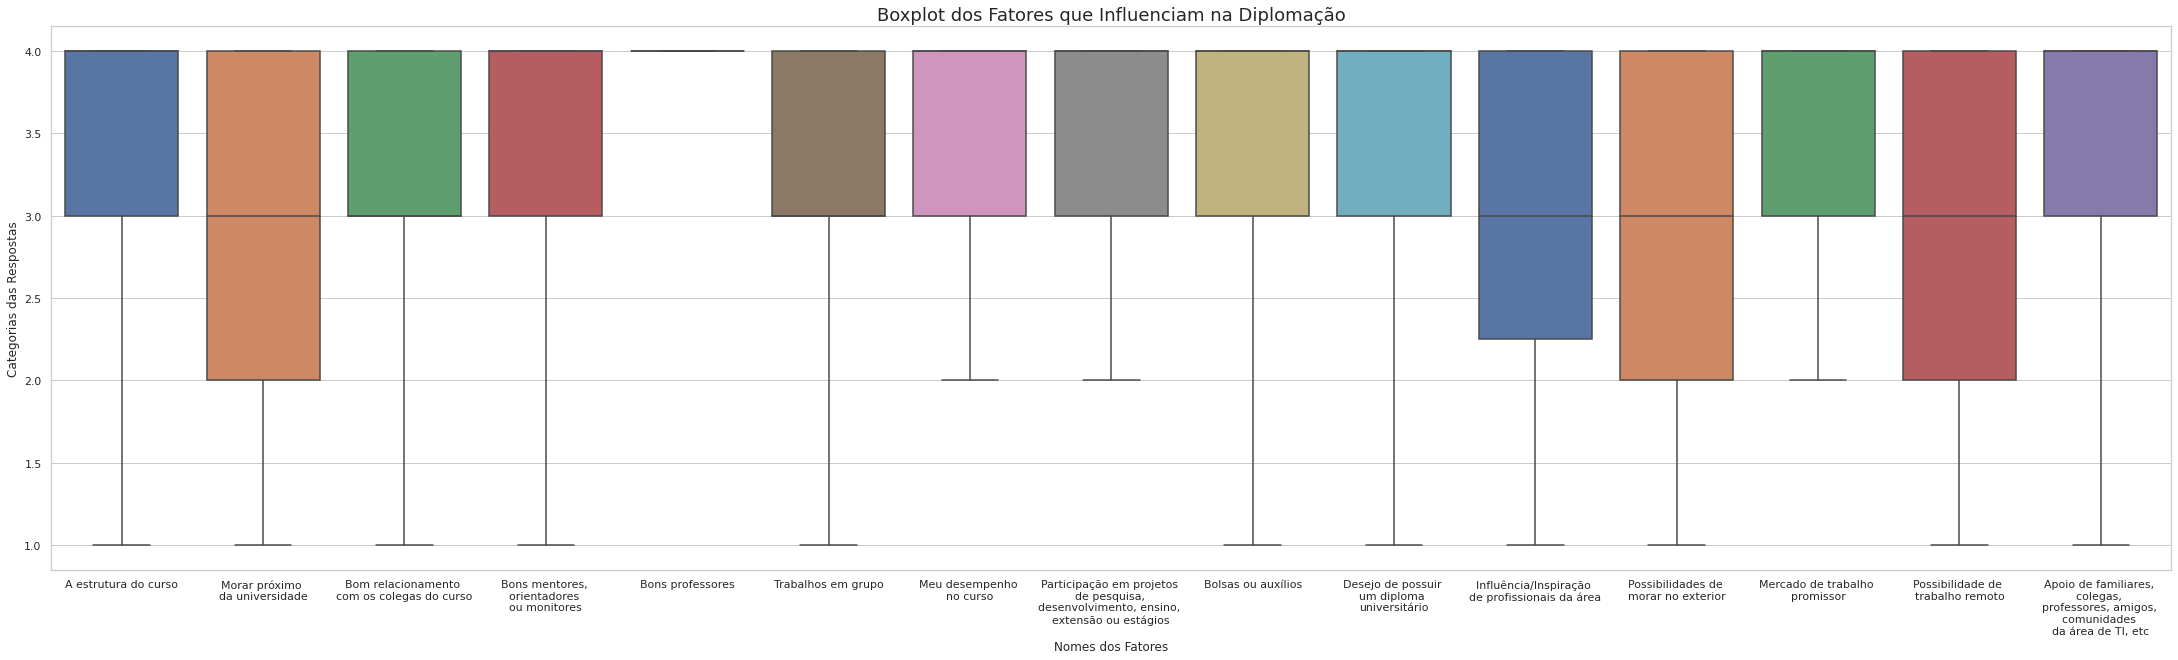

In [ ]:
boxplot_importancia = pd.DataFrame({"A estrutura do curso": df.query("IMP_INFRAESTRUTURA != 0")["IMP_INFRAESTRUTURA"],
                                    "Morar próximo \nda universidade": df.query("IMP_MORAR_PROXIMO != 0")["IMP_MORAR_PROXIMO"],
                                    "Bom relacionamento \ncom os colegas do curso": df.query("IMP_NETWORK != 0")["IMP_NETWORK"],
                                    "Bons mentores, \norientadores \nou monitores": df.query("IMP_BONS_MENTORES != 0")["IMP_BONS_MENTORES"],
                                    "Bons professores": df.query("IMP_BONS_PROFS != 0")["IMP_BONS_PROFS"],
                                    "Trabalhos em grupo": df.query("IMP_TRAB_GRUPO != 0")["IMP_TRAB_GRUPO"],
                                    "Meu desempenho \nno curso": df.query("IMP_DESEMPENHO != 0")["IMP_DESEMPENHO"],
                                    "Participação em projetos \nde pesquisa, \ndesenvolvimento, ensino, \nextensão ou estágios": df.query("IMP_PART_PROJETO != 0")["IMP_PART_PROJETO"],
                                    "Bolsas ou auxílios": df.query("IMP_AUX_FIN != 0")["IMP_AUX_FIN"],
                                    "Desejo de possuir \num diploma \nuniversitário": df.query("IMP_DIPLOMA != 0")["IMP_DIPLOMA"],
                                    "Influência/Inspiração \nde profissionais da área": df.query("IMP_INF_DE_OUTOS_PROFISSIONAIS != 0")["IMP_INF_DE_OUTOS_PROFISSIONAIS"],
                                    "Possibilidades de \nmorar no exterior": df.query("IMP_MORAR_NO_EXTERIOR != 0")["IMP_MORAR_NO_EXTERIOR"],
                                    "Mercado de trabalho \npromissor": df.query("IMP_MERC_PROMISSOR != 0")["IMP_MERC_PROMISSOR"],
                                    "Possibilidade de \ntrabalho remoto": df.query("IMP_TRAB_REMOTO != 0")["IMP_TRAB_REMOTO"],
                                    "Apoio de familiares, \ncolegas, \nprofessores, amigos, \ncomunidades \nda área de TI, etc": df.query("IMP_APOIO != 0")["IMP_APOIO"]})




boxplot_importancia.iloc[:,range(0,15)]
sns.set(style='whitegrid')
plt.figure(figsize =(38, 10))
plt.title("Boxplot dos Fatores que Influenciam na Diplomação", loc="center", fontsize=18)
plt.xlabel("Nomes dos Fatores")
plt.ylabel("Categorias das Respostas")
sns.boxplot(data=boxplot_importancia.iloc[:,range(0,15)], palette="deep", whis=3, showfliers=False)

In [ ]:
boxplot_importancia['Bons professores'].describe()

count    81.000000
mean      3.827160
std       0.412011
min       2.000000
25%       4.000000
50%       4.000000
75%       4.000000
max       4.000000
Name: Bons professores, dtype: float64

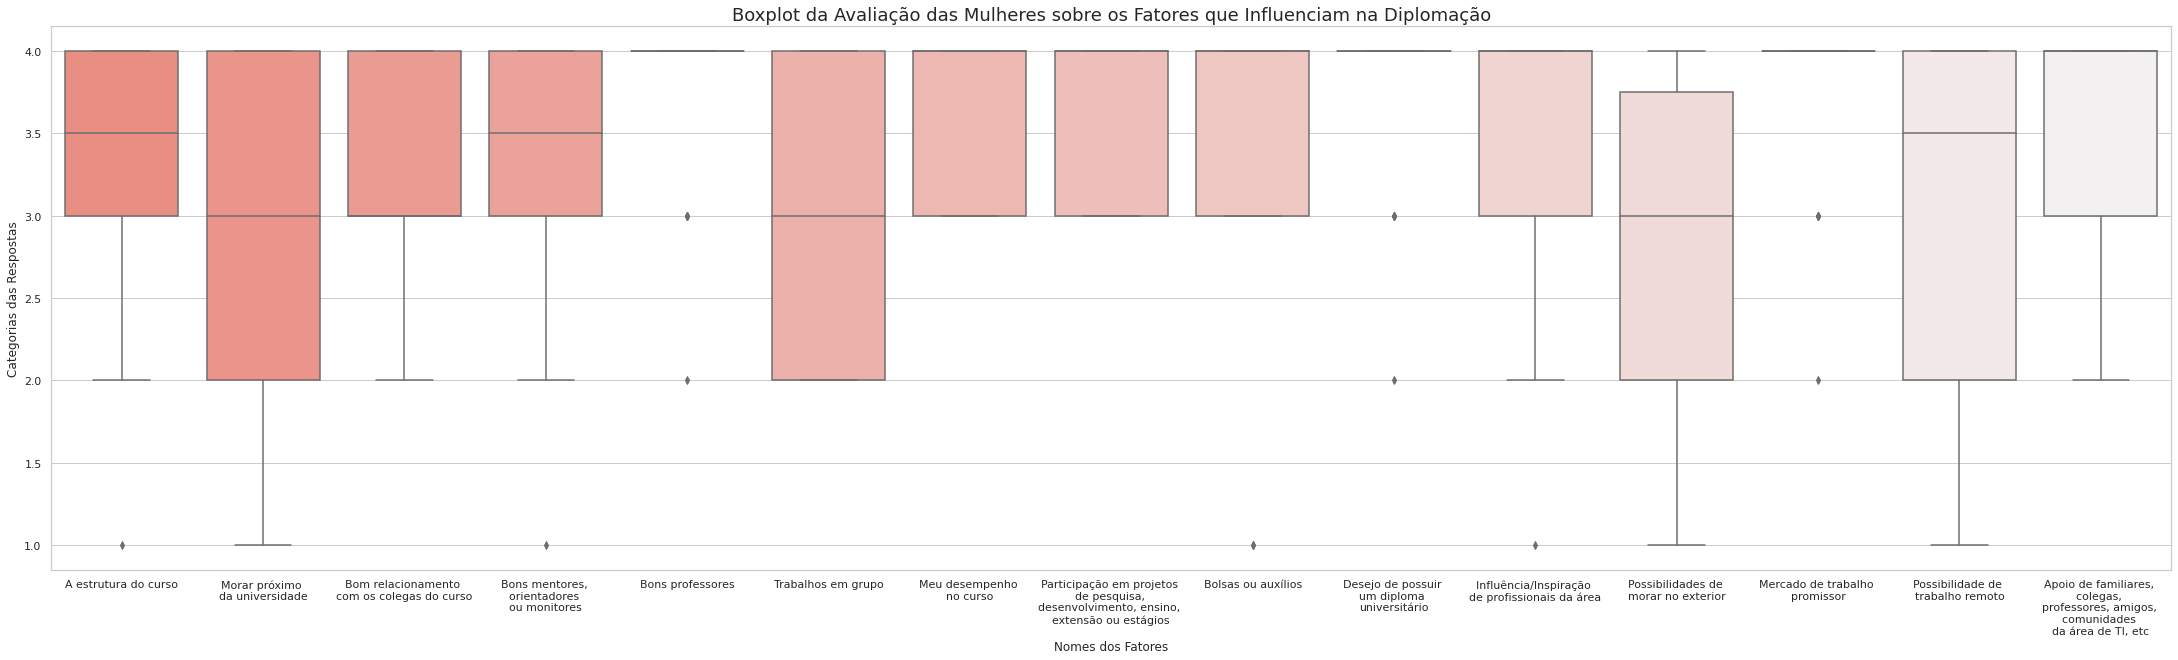

In [ ]:
boxplot_importancia_meninas = pd.DataFrame({"A estrutura do curso": df.query("IMP_INFRAESTRUTURA != 0").query("SEXO == 'Feminino'")["IMP_INFRAESTRUTURA"],
                                    "Morar próximo \nda universidade": df.query("IMP_MORAR_PROXIMO != 0").query("SEXO == 'Feminino'")["IMP_MORAR_PROXIMO"],
                                    "Bom relacionamento \ncom os colegas do curso": df.query("IMP_NETWORK != 0").query("SEXO == 'Feminino'")["IMP_NETWORK"],
                                    "Bons mentores, \norientadores \nou monitores": df.query("IMP_BONS_MENTORES != 0").query("SEXO == 'Feminino'")["IMP_BONS_MENTORES"],
                                    "Bons professores": df.query("IMP_BONS_PROFS != 0").query("SEXO == 'Feminino'")["IMP_BONS_PROFS"],
                                    "Trabalhos em grupo": df.query("IMP_TRAB_GRUPO != 0").query("SEXO == 'Feminino'")["IMP_TRAB_GRUPO"],
                                    "Meu desempenho \nno curso": df.query("IMP_DESEMPENHO != 0").query("SEXO == 'Feminino'")["IMP_DESEMPENHO"],
                                    "Participação em projetos \nde pesquisa, \ndesenvolvimento, ensino, \nextensão ou estágios": df.query("IMP_PART_PROJETO != 0").query("SEXO == 'Feminino'")["IMP_PART_PROJETO"],
                                    "Bolsas ou auxílios": df.query("IMP_AUX_FIN != 0").query("SEXO == 'Feminino'")["IMP_AUX_FIN"],
                                    "Desejo de possuir \num diploma \nuniversitário": df.query("IMP_DIPLOMA != 0").query("SEXO == 'Feminino'")["IMP_DIPLOMA"],
                                    "Influência/Inspiração \nde profissionais da área": df.query("IMP_INF_DE_OUTOS_PROFISSIONAIS != 0").query("SEXO == 'Feminino'")["IMP_INF_DE_OUTOS_PROFISSIONAIS"],
                                    "Possibilidades de \nmorar no exterior": df.query("IMP_MORAR_NO_EXTERIOR != 0").query("SEXO == 'Feminino'")["IMP_MORAR_NO_EXTERIOR"],
                                    "Mercado de trabalho \npromissor": df.query("IMP_MERC_PROMISSOR != 0").query("SEXO == 'Feminino'")["IMP_MERC_PROMISSOR"],
                                    "Possibilidade de \ntrabalho remoto": df.query("IMP_TRAB_REMOTO != 0").query("SEXO == 'Feminino'")["IMP_TRAB_REMOTO"],
                                    "Apoio de familiares, \ncolegas, \nprofessores, amigos, \ncomunidades \nda área de TI, etc": df.query("IMP_APOIO != 0").query("SEXO == 'Feminino'")["IMP_APOIO"]})




boxplot_importancia_meninas.iloc[:,range(0,15)]
sns.set(style='whitegrid')
plt.figure(figsize =(38, 10))
plt.title("Boxplot da Avaliação das Mulheres sobre os Fatores que Influenciam na Diplomação", loc="center", fontsize=18)
plt.xlabel("Nomes dos Fatores")
plt.ylabel("Categorias das Respostas")
sns.boxplot(data=boxplot_importancia_meninas.iloc[:,range(0,15)], palette="light:salmon_r")

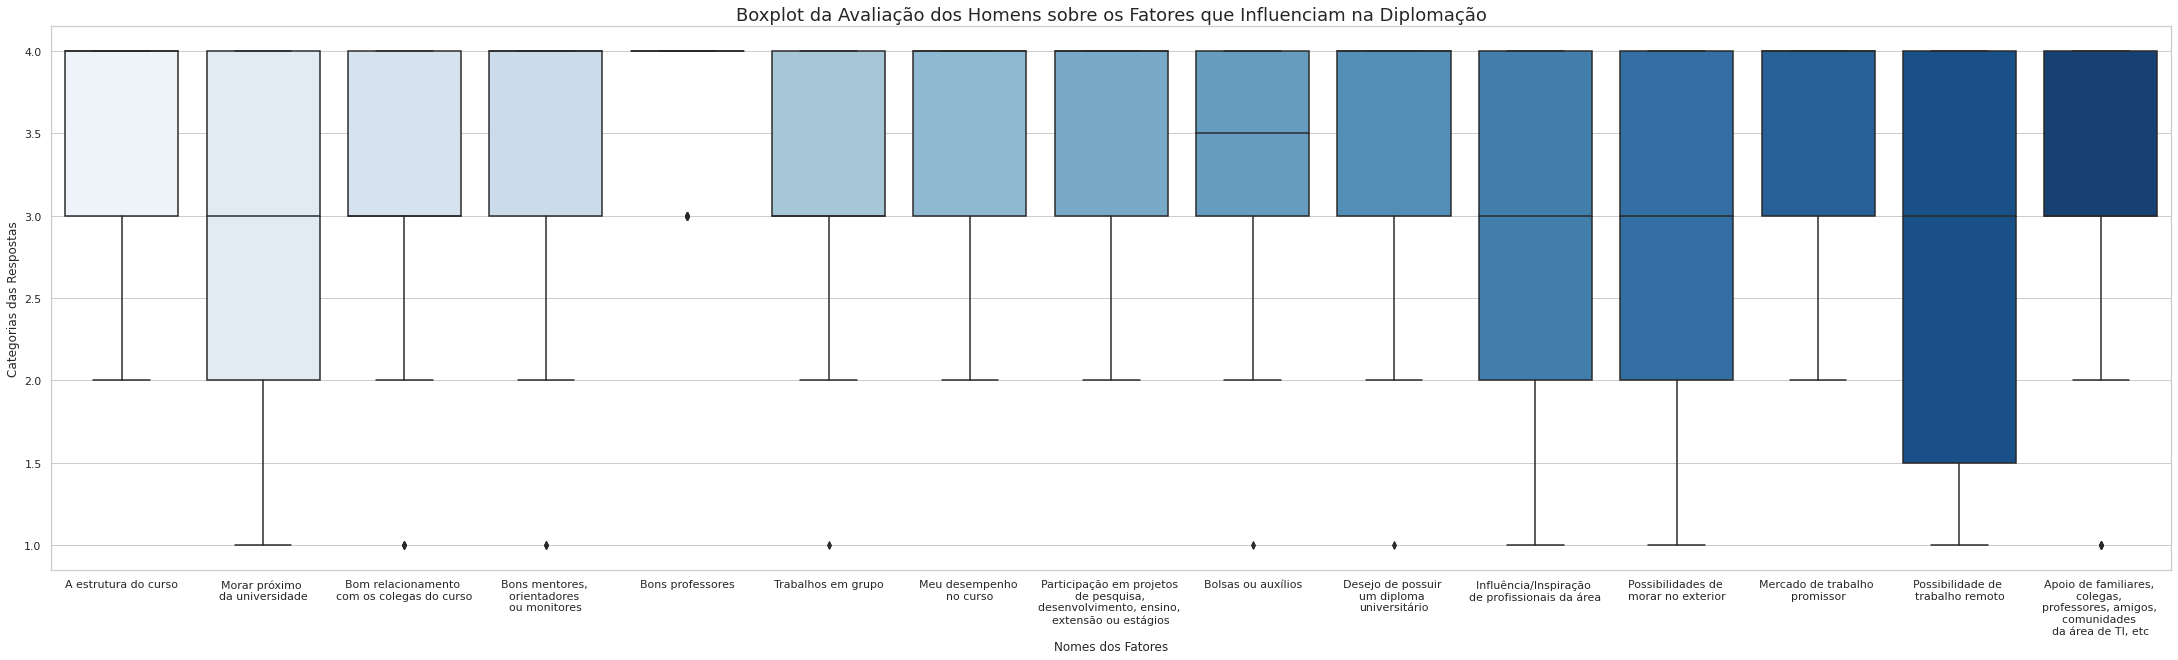

In [ ]:
boxplot_importancia_meninos = pd.DataFrame({"A estrutura do curso": df.query("IMP_INFRAESTRUTURA != 0").query("SEXO == 'Masculino'")["IMP_INFRAESTRUTURA"],
                                    "Morar próximo \nda universidade": df.query("IMP_MORAR_PROXIMO != 0").query("SEXO == 'Masculino'")["IMP_MORAR_PROXIMO"],
                                    "Bom relacionamento \ncom os colegas do curso": df.query("IMP_NETWORK != 0").query("SEXO == 'Masculino'")["IMP_NETWORK"],
                                    "Bons mentores, \norientadores \nou monitores": df.query("IMP_BONS_MENTORES != 0").query("SEXO == 'Masculino'")["IMP_BONS_MENTORES"],
                                    "Bons professores": df.query("IMP_BONS_PROFS != 0").query("SEXO == 'Masculino'")["IMP_BONS_PROFS"],
                                    "Trabalhos em grupo": df.query("IMP_TRAB_GRUPO != 0").query("SEXO == 'Masculino'")["IMP_TRAB_GRUPO"],
                                    "Meu desempenho \nno curso": df.query("IMP_DESEMPENHO != 0").query("SEXO == 'Masculino'")["IMP_DESEMPENHO"],
                                    "Participação em projetos \nde pesquisa, \ndesenvolvimento, ensino, \nextensão ou estágios": df.query("IMP_PART_PROJETO != 0").query("SEXO == 'Masculino'")["IMP_PART_PROJETO"],
                                    "Bolsas ou auxílios": df.query("IMP_AUX_FIN != 0").query("SEXO == 'Masculino'")["IMP_AUX_FIN"],
                                    "Desejo de possuir \num diploma \nuniversitário": df.query("IMP_DIPLOMA != 0").query("SEXO == 'Masculino'")["IMP_DIPLOMA"],
                                    "Influência/Inspiração \nde profissionais da área": df.query("IMP_INF_DE_OUTOS_PROFISSIONAIS != 0").query("SEXO == 'Masculino'")["IMP_INF_DE_OUTOS_PROFISSIONAIS"],
                                    "Possibilidades de \nmorar no exterior": df.query("IMP_MORAR_NO_EXTERIOR != 0").query("SEXO == 'Masculino'")["IMP_MORAR_NO_EXTERIOR"],
                                    "Mercado de trabalho \npromissor": df.query("IMP_MERC_PROMISSOR != 0").query("SEXO == 'Masculino'")["IMP_MERC_PROMISSOR"],
                                    "Possibilidade de \ntrabalho remoto": df.query("IMP_TRAB_REMOTO != 0").query("SEXO == 'Masculino'")["IMP_TRAB_REMOTO"],
                                    "Apoio de familiares, \ncolegas, \nprofessores, amigos, \ncomunidades \nda área de TI, etc": df.query("IMP_APOIO != 0").query("SEXO == 'Masculino'")["IMP_APOIO"]})




boxplot_importancia_meninos.iloc[:,range(0,15)]
sns.set(style='whitegrid')
plt.figure(figsize =(38, 10))
plt.title("Boxplot da Avaliação dos Homens sobre os Fatores que Influenciam na Diplomação", loc="center", fontsize=18)
plt.xlabel("Nomes dos Fatores")
plt.ylabel("Categorias das Respostas")
sns.boxplot(data=boxplot_importancia_meninos.iloc[:,range(0,15)], palette="Blues")

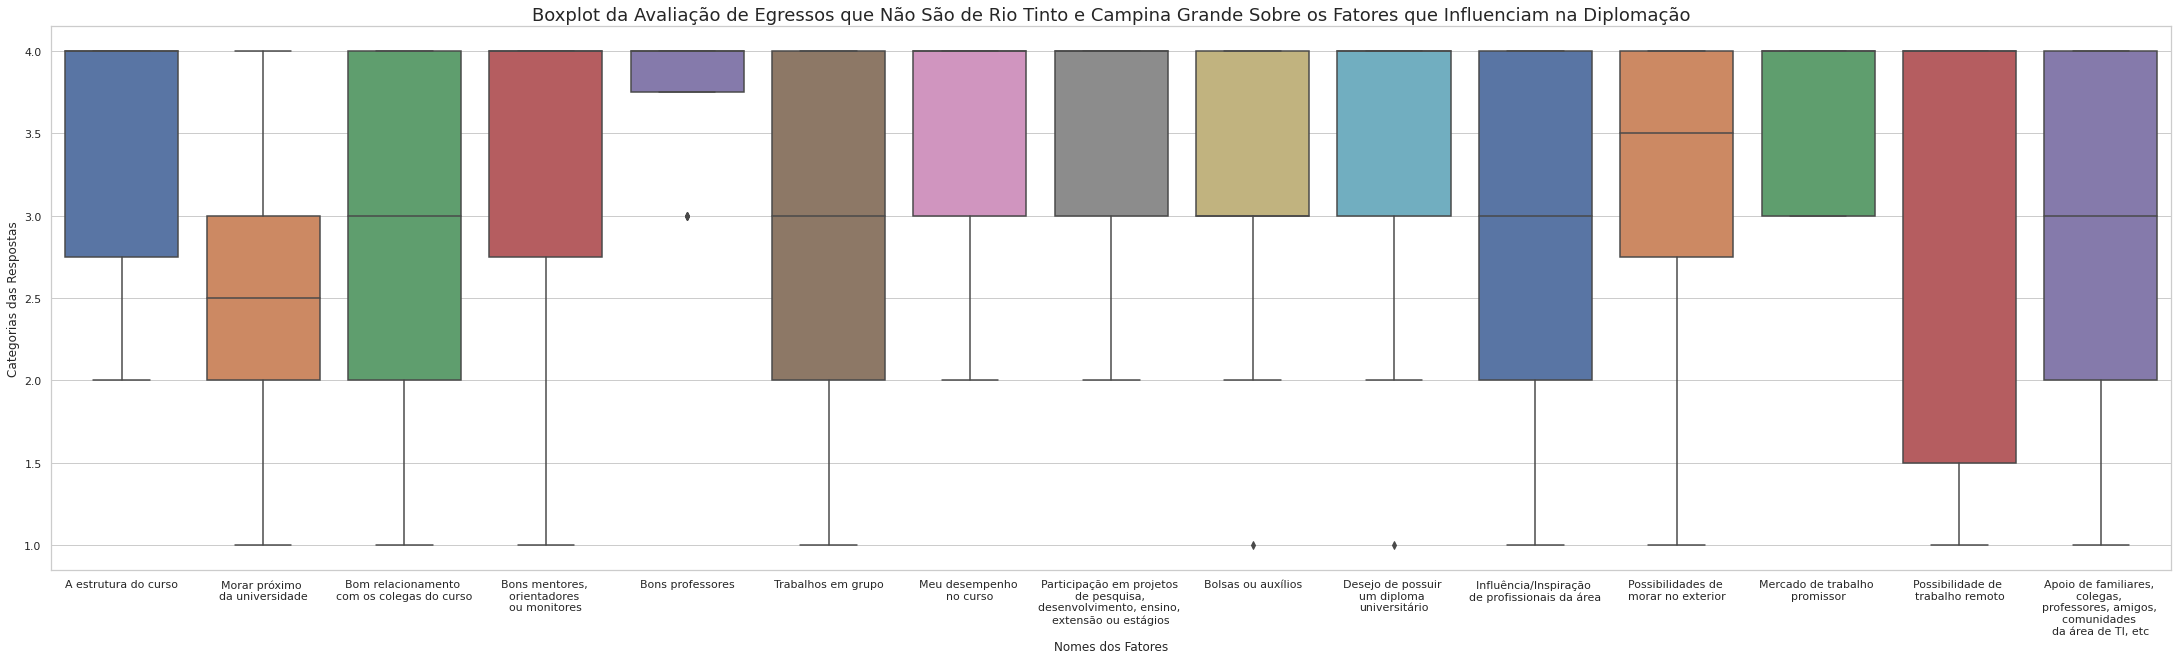

In [ ]:
boxplot_importancia_outras_cidades = pd.DataFrame({"A estrutura do curso": df.query("IMP_INFRAESTRUTURA != 0").query("CID_UNIV not in ['Rio Tinto', 'Campina Grande', 'Não Respondeu']")["IMP_INFRAESTRUTURA"],
                                    "Morar próximo \nda universidade": df.query("IMP_MORAR_PROXIMO != 0").query("CID_UNIV not in ['Rio Tinto', 'Campina Grande', 'Não Respondeu']")["IMP_MORAR_PROXIMO"],
                                    "Bom relacionamento \ncom os colegas do curso": df.query("IMP_NETWORK != 0").query("CID_UNIV not in ['Rio Tinto', 'Campina Grande', 'Não Respondeu']")["IMP_NETWORK"],
                                    "Bons mentores, \norientadores \nou monitores": df.query("IMP_BONS_MENTORES != 0").query("CID_UNIV not in ['Rio Tinto', 'Campina Grande', 'Não Respondeu']")["IMP_BONS_MENTORES"],
                                    "Bons professores": df.query("IMP_BONS_PROFS != 0").query("CID_UNIV not in ['Rio Tinto', 'Campina Grande', 'Não Respondeu']")["IMP_BONS_PROFS"],
                                    "Trabalhos em grupo": df.query("IMP_TRAB_GRUPO != 0").query("CID_UNIV not in ['Rio Tinto', 'Campina Grande', 'Não Respondeu']")["IMP_TRAB_GRUPO"],
                                    "Meu desempenho \nno curso": df.query("IMP_DESEMPENHO != 0").query("CID_UNIV not in ['Rio Tinto', 'Campina Grande', 'Não Respondeu']")["IMP_DESEMPENHO"],
                                    "Participação em projetos \nde pesquisa, \ndesenvolvimento, ensino, \nextensão ou estágios": df.query("IMP_PART_PROJETO != 0").query("CID_UNIV not in ['Rio Tinto', 'Campina Grande', 'Não Respondeu']")["IMP_PART_PROJETO"],
                                    "Bolsas ou auxílios": df.query("IMP_AUX_FIN != 0").query("CID_UNIV not in ['Rio Tinto', 'Campina Grande', 'Não Respondeu']")["IMP_AUX_FIN"],
                                    "Desejo de possuir \num diploma \nuniversitário": df.query("IMP_DIPLOMA != 0").query("CID_UNIV not in ['Rio Tinto', 'Campina Grande', 'Não Respondeu']")["IMP_DIPLOMA"],
                                    "Influência/Inspiração \nde profissionais da área": df.query("IMP_INF_DE_OUTOS_PROFISSIONAIS != 0").query("CID_UNIV not in ['Rio Tinto', 'Campina Grande', 'Não Respondeu']")["IMP_INF_DE_OUTOS_PROFISSIONAIS"],
                                    "Possibilidades de \nmorar no exterior": df.query("IMP_MORAR_NO_EXTERIOR != 0").query("CID_UNIV not in ['Rio Tinto', 'Campina Grande', 'Não Respondeu']")["IMP_MORAR_NO_EXTERIOR"],
                                    "Mercado de trabalho \npromissor": df.query("IMP_MERC_PROMISSOR != 0").query("CID_UNIV not in ['Rio Tinto', 'Campina Grande', 'Não Respondeu']")["IMP_MERC_PROMISSOR"],
                                    "Possibilidade de \ntrabalho remoto": df.query("IMP_TRAB_REMOTO != 0").query("CID_UNIV not in ['Rio Tinto', 'Campina Grande', 'Não Respondeu']")["IMP_TRAB_REMOTO"],
                                    "Apoio de familiares, \ncolegas, \nprofessores, amigos, \ncomunidades \nda área de TI, etc": df.query("IMP_APOIO != 0").query("CID_UNIV not in ['Rio Tinto', 'Campina Grande', 'Não Respondeu']")["IMP_APOIO"]})




boxplot_importancia_outras_cidades.iloc[:,range(0,15)]
sns.set(style='whitegrid')
plt.figure(figsize =(38, 10))
plt.title("Boxplot da Avaliação de Egressos que Não São de Rio Tinto e Campina Grande Sobre os Fatores que Influenciam na Diplomação", loc="center", fontsize=18)
plt.xlabel("Nomes dos Fatores")
plt.ylabel("Categorias das Respostas")
sns.boxplot(data=boxplot_importancia_outras_cidades.iloc[:,range(0,15)], palette="deep")

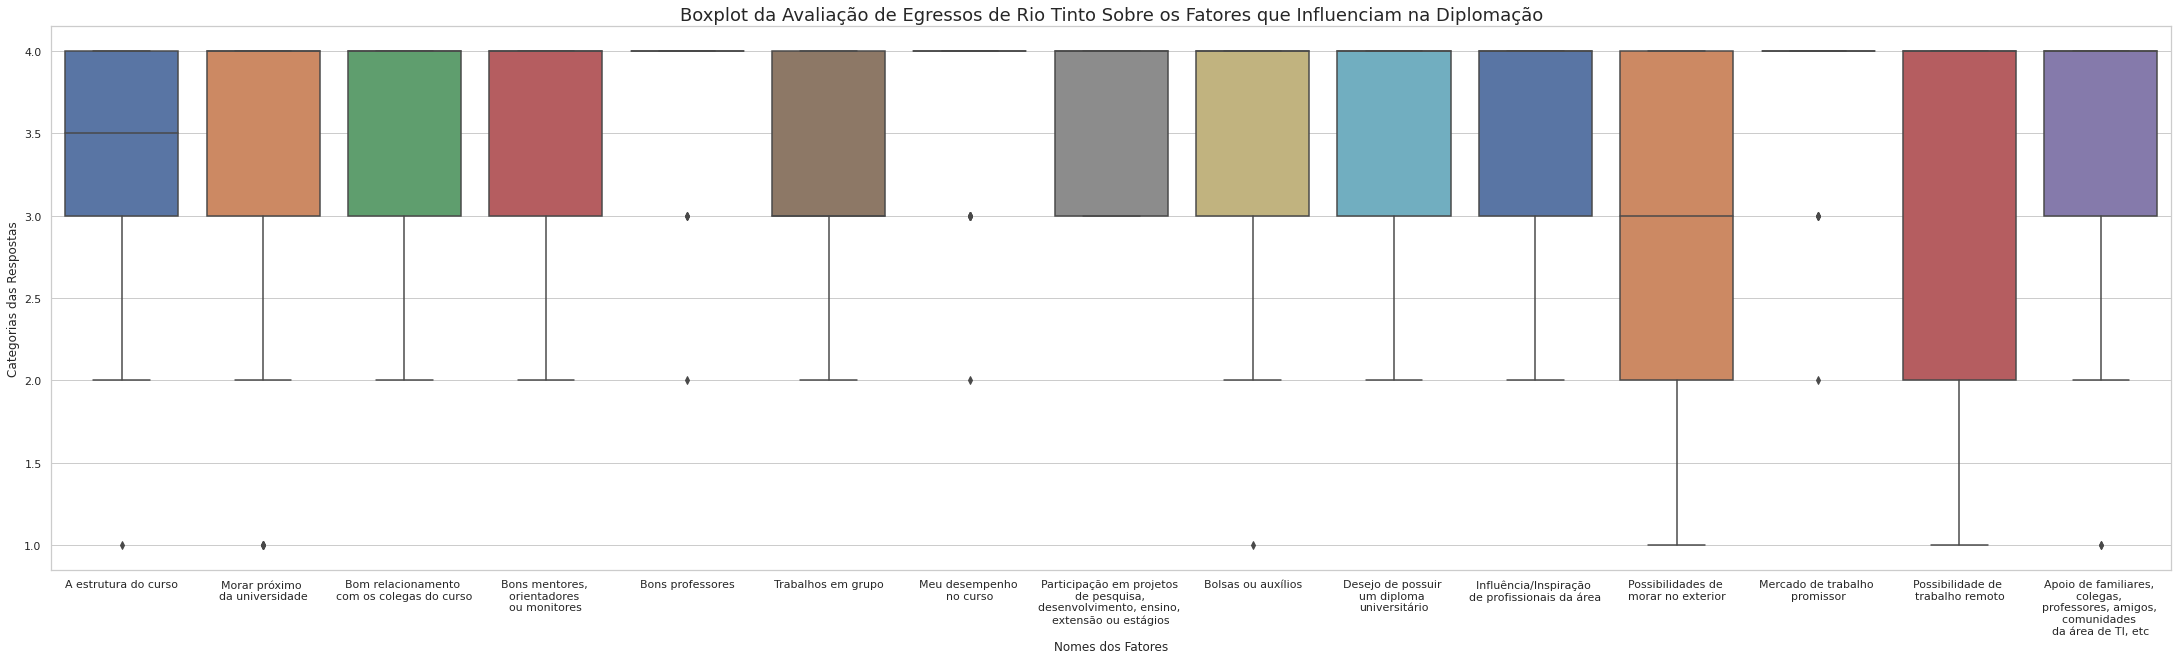

In [ ]:
boxplot_importancia_rt = pd.DataFrame({"A estrutura do curso": df.query("IMP_INFRAESTRUTURA != 0").query("CID_UNIV == 'Rio Tinto'")["IMP_INFRAESTRUTURA"],
                                    "Morar próximo \nda universidade": df.query("IMP_MORAR_PROXIMO != 0").query("CID_UNIV == 'Rio Tinto'")["IMP_MORAR_PROXIMO"],
                                    "Bom relacionamento \ncom os colegas do curso": df.query("IMP_NETWORK != 0").query("CID_UNIV == 'Rio Tinto'")["IMP_NETWORK"],
                                    "Bons mentores, \norientadores \nou monitores": df.query("IMP_BONS_MENTORES != 0").query("CID_UNIV == 'Rio Tinto'")["IMP_BONS_MENTORES"],
                                    "Bons professores": df.query("IMP_BONS_PROFS != 0").query("CID_UNIV == 'Rio Tinto'")["IMP_BONS_PROFS"],
                                    "Trabalhos em grupo": df.query("IMP_TRAB_GRUPO != 0").query("CID_UNIV == 'Rio Tinto'")["IMP_TRAB_GRUPO"],
                                    "Meu desempenho \nno curso": df.query("IMP_DESEMPENHO != 0").query("CID_UNIV == 'Rio Tinto'")["IMP_DESEMPENHO"],
                                    "Participação em projetos \nde pesquisa, \ndesenvolvimento, ensino, \nextensão ou estágios": df.query("IMP_PART_PROJETO != 0").query("CID_UNIV == 'Rio Tinto'")["IMP_PART_PROJETO"],
                                    "Bolsas ou auxílios": df.query("IMP_AUX_FIN != 0").query("CID_UNIV == 'Rio Tinto'")["IMP_AUX_FIN"],
                                    "Desejo de possuir \num diploma \nuniversitário": df.query("IMP_DIPLOMA != 0").query("CID_UNIV == 'Rio Tinto'")["IMP_DIPLOMA"],
                                    "Influência/Inspiração \nde profissionais da área": df.query("IMP_INF_DE_OUTOS_PROFISSIONAIS != 0").query("CID_UNIV == 'Rio Tinto'")["IMP_INF_DE_OUTOS_PROFISSIONAIS"],
                                    "Possibilidades de \nmorar no exterior": df.query("IMP_MORAR_NO_EXTERIOR != 0").query("CID_UNIV == 'Rio Tinto'")["IMP_MORAR_NO_EXTERIOR"],
                                    "Mercado de trabalho \npromissor": df.query("IMP_MERC_PROMISSOR != 0").query("CID_UNIV == 'Rio Tinto'")["IMP_MERC_PROMISSOR"],
                                    "Possibilidade de \ntrabalho remoto": df.query("IMP_TRAB_REMOTO != 0").query("CID_UNIV == 'Rio Tinto'")["IMP_TRAB_REMOTO"],
                                    "Apoio de familiares, \ncolegas, \nprofessores, amigos, \ncomunidades \nda área de TI, etc": df.query("IMP_APOIO != 0").query("CID_UNIV == 'Rio Tinto'")["IMP_APOIO"]})




boxplot_importancia_rt.iloc[:,range(0,15)]
sns.set(style='whitegrid')
plt.figure(figsize =(38, 10))
plt.title("Boxplot da Avaliação de Egressos de Rio Tinto Sobre os Fatores que Influenciam na Diplomação", loc="center", fontsize=18)
plt.xlabel("Nomes dos Fatores")
plt.ylabel("Categorias das Respostas")
sns.boxplot(data=boxplot_importancia_rt.iloc[:,range(0,15)], palette="deep")

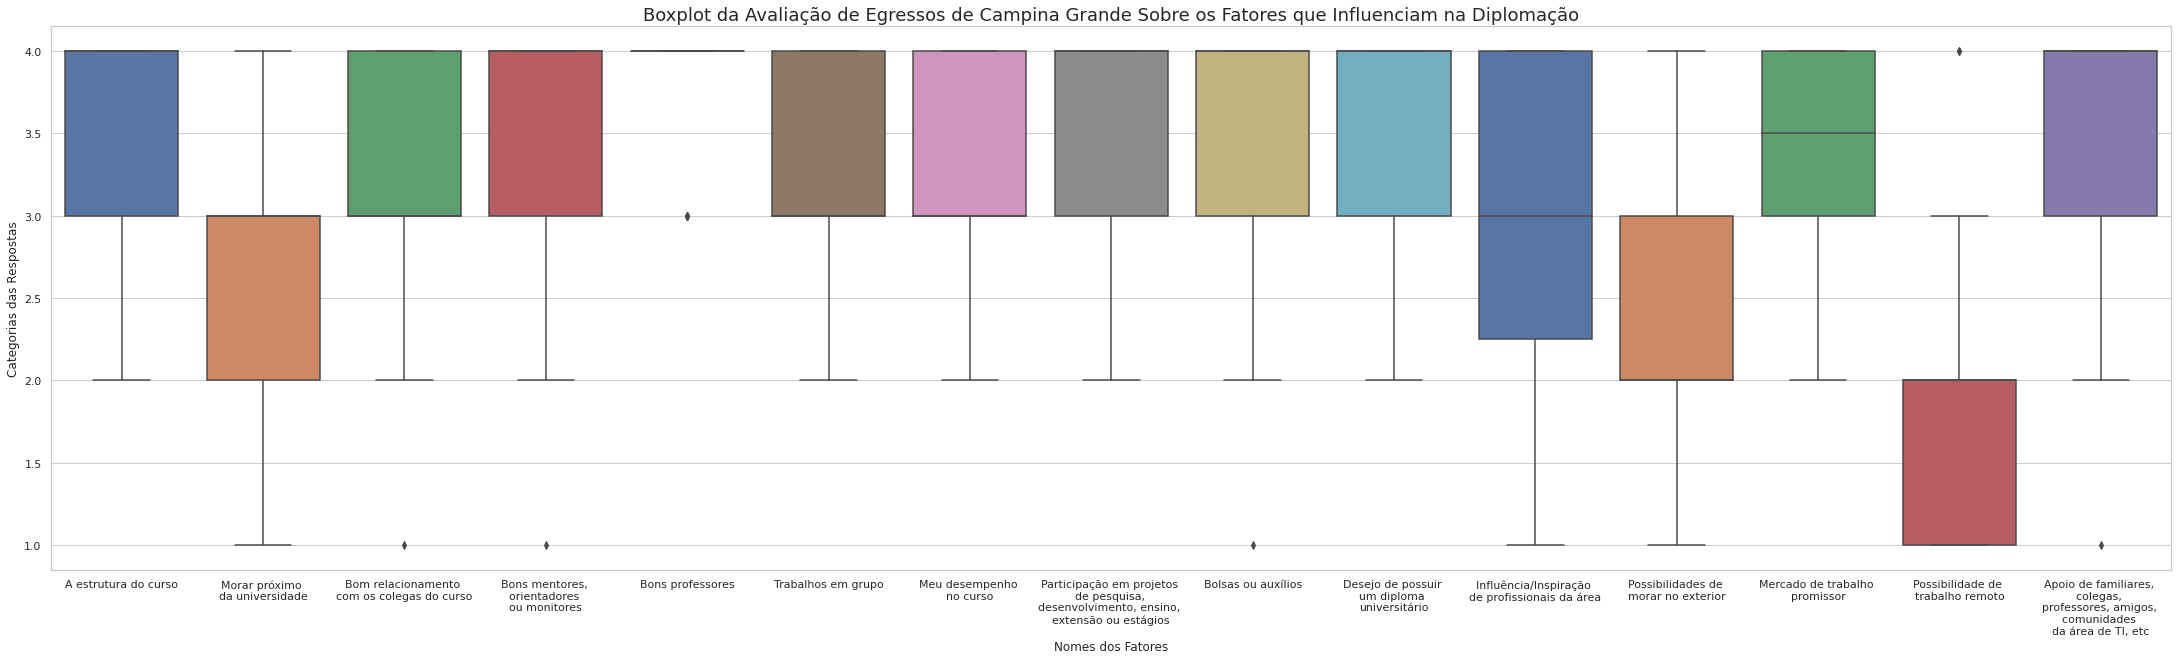

In [ ]:
boxplot_importancia_cg = pd.DataFrame({"A estrutura do curso": df.query("IMP_INFRAESTRUTURA != 0").query("CID_UNIV == 'Campina Grande'")["IMP_INFRAESTRUTURA"],
                                    "Morar próximo \nda universidade": df.query("IMP_MORAR_PROXIMO != 0").query("CID_UNIV == 'Campina Grande'")["IMP_MORAR_PROXIMO"],
                                    "Bom relacionamento \ncom os colegas do curso": df.query("IMP_NETWORK != 0").query("CID_UNIV == 'Campina Grande'")["IMP_NETWORK"],
                                    "Bons mentores, \norientadores \nou monitores": df.query("IMP_BONS_MENTORES != 0").query("CID_UNIV == 'Campina Grande'")["IMP_BONS_MENTORES"],
                                    "Bons professores": df.query("IMP_BONS_PROFS != 0").query("CID_UNIV == 'Campina Grande'")["IMP_BONS_PROFS"],
                                    "Trabalhos em grupo": df.query("IMP_TRAB_GRUPO != 0").query("CID_UNIV == 'Campina Grande'")["IMP_TRAB_GRUPO"],
                                    "Meu desempenho \nno curso": df.query("IMP_DESEMPENHO != 0").query("CID_UNIV == 'Campina Grande'")["IMP_DESEMPENHO"],
                                    "Participação em projetos \nde pesquisa, \ndesenvolvimento, ensino, \nextensão ou estágios": df.query("IMP_PART_PROJETO != 0").query("CID_UNIV == 'Campina Grande'")["IMP_PART_PROJETO"],
                                    "Bolsas ou auxílios": df.query("IMP_AUX_FIN != 0").query("CID_UNIV == 'Campina Grande'")["IMP_AUX_FIN"],
                                    "Desejo de possuir \num diploma \nuniversitário": df.query("IMP_DIPLOMA != 0").query("CID_UNIV == 'Campina Grande'")["IMP_DIPLOMA"],
                                    "Influência/Inspiração \nde profissionais da área": df.query("IMP_INF_DE_OUTOS_PROFISSIONAIS != 0").query("CID_UNIV == 'Campina Grande'")["IMP_INF_DE_OUTOS_PROFISSIONAIS"],
                                    "Possibilidades de \nmorar no exterior": df.query("IMP_MORAR_NO_EXTERIOR != 0").query("CID_UNIV == 'Campina Grande'")["IMP_MORAR_NO_EXTERIOR"],
                                    "Mercado de trabalho \npromissor": df.query("IMP_MERC_PROMISSOR != 0").query("CID_UNIV == 'Campina Grande'")["IMP_MERC_PROMISSOR"],
                                    "Possibilidade de \ntrabalho remoto": df.query("IMP_TRAB_REMOTO != 0").query("CID_UNIV == 'Campina Grande'")["IMP_TRAB_REMOTO"],
                                    "Apoio de familiares, \ncolegas, \nprofessores, amigos, \ncomunidades \nda área de TI, etc": df.query("IMP_APOIO != 0").query("CID_UNIV == 'Campina Grande'")["IMP_APOIO"]})




boxplot_importancia_cg.iloc[:,range(0,15)]
sns.set(style='whitegrid')
plt.figure(figsize =(38, 10))
plt.title("Boxplot da Avaliação de Egressos de Campina Grande Sobre os Fatores que Influenciam na Diplomação", loc="center", fontsize=18)
plt.xlabel("Nomes dos Fatores")
plt.ylabel("Categorias das Respostas")
sns.boxplot(data=boxplot_importancia_cg.iloc[:,range(0,15)], palette="deep")